# Yearly model

In [1]:
import torch
from torch import autograd, nn, optim
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import torch.nn.functional as F
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle

# Pre-process data

In [2]:
data = pd.read_csv('data.csv',sep=";")
data = data[431:]
display(data)
print(data['% FULL'].mean())

scaler1 = MinMaxScaler(feature_range=(-1, 1))
data['% FULL']=scaler1.fit_transform(data['% FULL'].values.reshape(-1, 1))
scaler2 = MinMaxScaler(feature_range=(-1, 1))
data['Brent (eur/bbl)']=scaler2.fit_transform(data['Brent (eur/bbl)'].values.reshape(-1, 1))
scaler3 = MinMaxScaler(feature_range=(-1, 1))
data['Coal (eur/t)']=scaler3.fit_transform(data['Coal (eur/t)'].values.reshape(-1, 1))
scaler4 = MinMaxScaler(feature_range=(-1, 1))
data['CO2 (eur/t)']=scaler4.fit_transform(data['CO2 (eur/t)'].values.reshape(-1, 1))
scaler5 = MinMaxScaler(feature_range=(-1, 1))
data['month']=scaler5.fit_transform(data['month'].values.reshape(-1, 1))
scaler6 = MinMaxScaler(feature_range=(-1, 1))
data['JKM (Eur/mmbtu)']=scaler6.fit_transform(data['JKM (Eur/mmbtu)'].values.reshape(-1, 1))

data_train = data.iloc[:int(data.shape[0]*0.9)]
data_test = data.iloc[int(1+data.shape[0]*0.9):]
display(data_train)
data_train = shuffle(data_train)

X_train= torch.Tensor(data_train[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)']].astype(np.float32).values)
y_train= torch.tensor(data_train['TTF (eur/Mwh)'].astype(np.float32).values)

X_test= torch.Tensor(data_test[['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)']].astype(np.float32).values)
y_test= torch.tensor(data_test['TTF (eur/Mwh)'].astype(np.float32).values)

date  month  % FULL  Brent (eur/bbl)  JKM (Eur/mmbtu)  \
431    4/01/2016      1   49.34        34.370671         6.334842   
432    5/01/2016      1   49.09        33.891681         6.351200   
433    6/01/2016      1   48.91        31.759139         6.313787   
434    7/01/2016      1   48.82        30.867020         6.196269   
435    8/01/2016      1   48.77        30.698143         6.199103   
436   11/01/2016      1   48.64        29.054241         6.239064   
437   12/01/2016      1   48.55        28.431915         6.223512   
438   13/01/2016      1   48.45        27.876391         6.198841   
439   14/01/2016      1   48.39        28.562224         6.190169   
440   19/01/2016      1   48.38        26.373223         5.029803   
441   20/01/2016      1   48.45        25.603820         4.871889   
442   21/01/2016      1   48.51        26.903974         4.727741   
443   22/01/2016      1   48.48        29.812859         4.743376   
444   25/01/2016      1   48.47        28.118374         4.720199   
445   26/01/2016      1   48.54        29.257521         4.710645   
446   27/01/2016      1   48.58        30.392067         4.641447   
447   28/01/2016      1   48.67        30.986559         4.621926   
448   29/01/2016      1   48.80        32.065719         4.665867   
449    1/02/2016      2   48.97        31.453243         4.689509   
450    2/02/2016      2   49.05        29.974350         4.791132   
451    3/02/2016      2   49.11        31.559038         4.777988   
452    4/02/2016      2   49.19        30.751383         4.800999   
453    5/02/2016      2   49.28        30.530656         4.822517   
454    8/02/2016      2   49.41        29.370255         4.805717   
455    9/02/2016      2   49.53        26.853246         4.764857   
456   10/02/2016      2   44.94        27.318629         4.765701   
457   11/02/2016      2   44.98        26.552425         4.752230   
458   12/02/2016      2   45.07        29.632261         4.778824   
459   16/02/2016      2   45.15        28.884301         4.218652   
460   17/02/2016      2   45.25        31.005662         4.223960   
...          ...    ...     ...              ...              ...   
1212  22/02/2019      2   53.69        59.183494         5.493343   
1213  25/02/2019      2   53.82        57.017080         5.419088   
1214  26/02/2019      2   54.01        57.277119         5.406236   
1215  27/02/2019      2   54.26        58.395637         5.409447   
1216  28/02/2019      2   54.52        58.073879         5.386983   
1217   1/03/2019      3   54.90        57.209425         5.380693   
1218   4/03/2019      3   55.20        57.925377         5.349740   
1219   5/03/2019      3   55.50        58.252255         5.346719   
1220   6/03/2019      3   55.76        58.372402         5.338346   
1221   7/03/2019      3   56.04        59.238742         5.360972   
1222   8/03/2019      3   56.32        58.497953         5.325681   
1223  11/03/2019      3   56.60        59.198008         5.312528   
1224  12/03/2019      3   56.91        59.073188         5.294170   
1225  13/03/2019      3   57.24        59.646799         5.258278   
1226  14/03/2019      3   57.56        59.485047         5.260131   
1227  15/03/2019      3   57.81        59.302428         5.249448   
1228  18/03/2019      3   58.03        59.580099         4.547459   
1229  19/03/2019      3   58.24        59.573531         4.405675   
1230  20/03/2019      3   58.46        60.029796         4.337920   
1231  21/03/2019      3   58.74        59.667634         4.158973   
1232  22/03/2019      3   59.06        59.250420         4.083797   
1233  25/03/2019      3   59.40        59.420034         4.066838   
1234  26/03/2019      3   59.21        60.342685         4.083807   
1235  27/03/2019      3   59.51        60.309416         4.089980   
1236  28/03/2019      3   59.79        60.445633         4.095365   
1237  29/03/2019      3   60.05        60.969956         4.100918   
1238   1/0

62.95908754623921


/home/sweerts/anaconda3/envs/trading/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


date     month    % FULL  Brent (eur/bbl)  JKM (Eur/mmbtu)  \
431    4/01/2016 -1.000000 -0.305967        -0.646412        -0.145412   
432    5/01/2016 -1.000000 -0.313297        -0.665730        -0.140441   
433    6/01/2016 -1.000000 -0.318575        -0.751741        -0.151809   
434    7/01/2016 -1.000000 -0.321214        -0.787722        -0.187518   
435    8/01/2016 -1.000000 -0.322680        -0.794534        -0.186657   
436   11/01/2016 -1.000000 -0.326492        -0.860836        -0.174514   
437   12/01/2016 -1.000000 -0.329131        -0.885936        -0.179240   
438   13/01/2016 -1.000000 -0.332063        -0.908342        -0.186736   
439   14/01/2016 -1.000000 -0.333822        -0.880680        -0.189371   
440   19/01/2016 -1.000000 -0.334115        -0.968968        -0.541956   
441   20/01/2016 -1.000000 -0.332063        -1.000000        -0.589939   
442   21/01/2016 -1.000000 -0.330303        -0.947562        -0.633740   
443   22/01/2016 -1.000000 -0.331183        -0.830239        -0.628989   
444   25/01/2016 -1.000000 -0.331476        -0.898582        -0.636031   
445   26/01/2016 -1.000000 -0.329424        -0.852637        -0.638934   
446   27/01/2016 -1.000000 -0.328251        -0.806878        -0.659960   
447   28/01/2016 -1.000000 -0.325612        -0.782901        -0.665892   
448   29/01/2016 -1.000000 -0.321800        -0.739376        -0.652540   
449    1/02/2016 -0.818182 -0.316816        -0.764079        -0.645356   
450    2/02/2016 -0.818182 -0.314470        -0.823726        -0.614478   
451    3/02/2016 -0.818182 -0.312711        -0.759812        -0.618472   
452    4/02/2016 -0.818182 -0.310365        -0.792386        -0.611479   
453    5/02/2016 -0.818182 -0.307726        -0.801289        -0.604941   
454    8/02/2016 -0.818182 -0.303914        -0.848091        -0.610046   
455    9/02/2016 -0.818182 -0.300396        -0.949608        -0.622462   
456   10/02/2016 -0.818182 -0.434980        -0.930838        -0.622205   
457   11/02/2016 -0.818182 -0.433807        -0.961740        -0.626298   
458   12/02/2016 -0.818182 -0.431168        -0.837523        -0.618218   
459   16/02/2016 -0.818182 -0.428823        -0.867690        -0.788429   
460   17/02/2016 -0.818182 -0.425891        -0.782131        -0.786817   
...          ...       ...       ...              ...              ...   
1130  24/10/2018  0.636364 -0.045594         0.664308         0.702586   
1131  25/10/2018  0.636364 -0.057323         0.693871         0.701387   
1132  26/10/2018  0.636364 -0.067585         0.713238         0.754789   
1133  29/10/2018  0.636364 -0.076675         0.710551         0.756898   
1134  30/10/2018  0.636364 -0.084298         0.666238         0.762288   
1135  31/10/2018  0.636364 -0.091629         0.658661         0.743937   
1136   1/11/2018  0.818182 -0.103650         0.544552         0.709351   
1137   2/11/2018  0.818182 -0.114793         0.547407         0.749418   
1138   5/11/2018  0.818182 -0.125935         0.554679         0.742895   
1139   6/11/2018  0.818182 -0.137370         0.513440         0.737971   
1140   7/11/2018  0.818182 -0.146753         0.511767         0.723833   
1141   8/11/2018  0.818182 -0.153497         0.475245         0.737743   
1142   9/11/2018  0.818182 -0.159947         0.464715         0.740659   
1143  12/11/2018  0.818182 -0.169916         0.488607         0.771333   
1144  13/11/2018  0.818182 -0.179006         0.306395         0.753210   
1145  14/11/2018  0.818182 -0.186630         0.325649         0.747122   
1146  15/11/2018  0.818182 -0.194253         0.339706         0.741303   
1147  16/11/2018  0.818182 -0.201290         0.325536         0.795824   
1148  19/11/2018  0.818182 -0.205982         0.319797         0.689383   
1149  20/11/2018  0.818182 -0.210673         0.185442         0.655594   
1150  21/11/2018  0.818182 -0.217710         0.216569         0.633796   
1151  23/11/2018  0.818182 -0.225334         0.058647         0.702998   
1152  26/11/2018

# Neural network

In [3]:
class Net(nn.Module):
    
    def __init__(self, input_size, hidden1_size, hidden2_size,hidden3_size, hidden4_size, hidden5_size, hidden6_size, hidden7_size,hidden8_size, hidden9_size, hidden10_size,num_classes):
        
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden1_size)
        self.drop1 = nn.Dropout(p=0.5)
        self.bn1 = nn.BatchNorm1d(hidden1_size)
        self.relu1 = nn.ReLU()
        
        self.fc2 = nn.Linear(hidden1_size, hidden2_size)
        self.drop2 = nn.Dropout(p=0.5)
        self.bn2 = nn.BatchNorm1d(hidden2_size)
        self.relu2 = nn.ReLU()
        
        self.fc3 = nn.Linear(hidden2_size, hidden3_size)
        self.drop3 = nn.Dropout(p=0.5)
        self.bn3 = nn.BatchNorm1d(hidden3_size)
        self.relu3 = nn.ReLU()
        
        self.fc4 = nn.Linear(hidden3_size, hidden4_size)  
        self.drop4 = nn.Dropout(p=0.5)
        self.bn4 = nn.BatchNorm1d(hidden4_size)
        self.relu4 = nn.ReLU()
        
        self.fc5 = nn.Linear(hidden4_size, hidden5_size)  
        self.drop5 = nn.Dropout(p=0.5)
        self.bn5 = nn.BatchNorm1d(hidden5_size)
        self.relu5 = nn.ReLU()
        
        self.fc6 = nn.Linear(hidden5_size, hidden6_size)
        self.drop6 = nn.Dropout(p=0.5)
        self.bn6 = nn.BatchNorm1d(hidden6_size)
        self.relu6 = nn.ReLU()
        
        self.fc7 = nn.Linear(hidden6_size, hidden7_size)
        self.drop7 = nn.Dropout(p=0.5)
        self.bn7 = nn.BatchNorm1d(hidden2_size)
        self.relu7 = nn.ReLU()
        
        self.fc8 = nn.Linear(hidden7_size, hidden8_size)
        self.drop8 = nn.Dropout(p=0.5)
        self.bn8 = nn.BatchNorm1d(hidden8_size)
        self.relu8 = nn.ReLU()
        
        self.fc9 = nn.Linear(hidden8_size, hidden9_size)  
        self.drop9 = nn.Dropout(p=0.5)
        self.bn9 = nn.BatchNorm1d(hidden9_size)
        self.relu9 = nn.ReLU()
        
        self.fc10 = nn.Linear(hidden9_size, hidden10_size)  
        self.drop10 = nn.Dropout(p=0.5)
        self.bn10 = nn.BatchNorm1d(hidden10_size)
        self.relu10 = nn.ReLU()
        
        self.fc11 = nn.Linear(hidden10_size, num_classes)  
    
    def forward(self, x):
        out = self.fc1(x)
#         out = self.drop1(out)
        out = self.relu1(out)
#         out= self.bn1(out)        
        
        out = self.fc2(out)
#         out = self.drop2(out)
        out = self.relu2(out)
#         out= self.bn2(out)         
        
        out = self.fc3(out)
#         out = self.drop3(out)
        out = self.relu3(out)
#         out= self.bn3(out)        
        
        out = self.fc4(out)
#         out = self.drop4(out)
        out = self.relu4(out)
#         out= self.bn4(out)        
        
        out = self.fc5(out)
#         out = self.drop5(out)
        out = self.relu5(out)
#         out= self.bn5(out)       

        out = self.fc6(out)
#         out = self.drop6(out)
        out = self.relu6(out)
#         out= self.bn6(out)        
        
        out = self.fc7(out)
#         out = self.drop7(out)
        out = self.relu7(out)
#         out= self.bn7(out)         
        
        out = self.fc8(out)
#         out = self.drop8(out)
        out = self.relu8(out)
#         out= self.bn8(out)        
        
        out = self.fc9(out)
#         out = self.drop9(out)
        out = self.relu9(out)
#         out= self.bn9(out)        
        
        out = self.fc10(out)
#         out = self.drop10(out)
        out = self.relu10(out)
#         out= self.bn10(out)       
        
        out = self.fc11(out)
        return out

# Train it!

can't load model
1 tensor(379.9955, device='cuda:1')
2 tensor(379.9955, device='cuda:1')
3 tensor(379.9955, device='cuda:1')
4 tensor(379.9954, device='cuda:1')
5 tensor(379.9954, device='cuda:1')
6 tensor(379.9952, device='cuda:1')
7 tensor(379.9952, device='cuda:1')
8 tensor(379.9951, device='cuda:1')
9 tensor(379.9951, device='cuda:1')
10 tensor(379.9949, device='cuda:1')
11 tensor(379.9949, device='cuda:1')
12 tensor(379.9948, device='cuda:1')
13 tensor(379.9947, device='cuda:1')
14 tensor(379.9946, device='cuda:1')
15 tensor(379.9945, device='cuda:1')
16 tensor(379.9944, device='cuda:1')
17 tensor(379.9943, device='cuda:1')
18 tensor(379.9942, device='cuda:1')
19 tensor(379.9941, device='cuda:1')
20 tensor(379.9940, device='cuda:1')
21 tensor(379.9939, device='cuda:1')
22 tensor(379.9938, device='cuda:1')
23 tensor(379.9937, device='cuda:1')
24 tensor(379.9936, device='cuda:1')
25 tensor(379.9935, device='cuda:1')
26 tensor(379.9934, device='cuda:1')
27 tensor(379.9933, device='cu

219 tensor(379.9624, device='cuda:1')
220 tensor(379.9622, device='cuda:1')
221 tensor(379.9620, device='cuda:1')
222 tensor(379.9618, device='cuda:1')
223 tensor(379.9617, device='cuda:1')
224 tensor(379.9615, device='cuda:1')
225 tensor(379.9613, device='cuda:1')
226 tensor(379.9611, device='cuda:1')
227 tensor(379.9609, device='cuda:1')
228 tensor(379.9607, device='cuda:1')
229 tensor(379.9605, device='cuda:1')
230 tensor(379.9603, device='cuda:1')
231 tensor(379.9601, device='cuda:1')
232 tensor(379.9600, device='cuda:1')
233 tensor(379.9598, device='cuda:1')
234 tensor(379.9595, device='cuda:1')
235 tensor(379.9594, device='cuda:1')
236 tensor(379.9592, device='cuda:1')
237 tensor(379.9590, device='cuda:1')
238 tensor(379.9588, device='cuda:1')
239 tensor(379.9586, device='cuda:1')
240 tensor(379.9584, device='cuda:1')
241 tensor(379.9583, device='cuda:1')
242 tensor(379.9580, device='cuda:1')
243 tensor(379.9579, device='cuda:1')
244 tensor(379.9577, device='cuda:1')
245 tensor(3

435 tensor(379.9186, device='cuda:1')
436 tensor(379.9184, device='cuda:1')
437 tensor(379.9182, device='cuda:1')
438 tensor(379.9180, device='cuda:1')
439 tensor(379.9178, device='cuda:1')
440 tensor(379.9175, device='cuda:1')
441 tensor(379.9173, device='cuda:1')
442 tensor(379.9171, device='cuda:1')
443 tensor(379.9169, device='cuda:1')
444 tensor(379.9167, device='cuda:1')
445 tensor(379.9164, device='cuda:1')
446 tensor(379.9162, device='cuda:1')
447 tensor(379.9160, device='cuda:1')
448 tensor(379.9158, device='cuda:1')
449 tensor(379.9156, device='cuda:1')
450 tensor(379.9154, device='cuda:1')
451 tensor(379.9152, device='cuda:1')
452 tensor(379.9149, device='cuda:1')
453 tensor(379.9147, device='cuda:1')
454 tensor(379.9145, device='cuda:1')
455 tensor(379.9143, device='cuda:1')
456 tensor(379.9140, device='cuda:1')
457 tensor(379.9138, device='cuda:1')
458 tensor(379.9136, device='cuda:1')
459 tensor(379.9134, device='cuda:1')
460 tensor(379.9132, device='cuda:1')
461 tensor(3

651 tensor(379.8704, device='cuda:1')
652 tensor(379.8701, device='cuda:1')
653 tensor(379.8699, device='cuda:1')
654 tensor(379.8697, device='cuda:1')
655 tensor(379.8694, device='cuda:1')
656 tensor(379.8692, device='cuda:1')
657 tensor(379.8690, device='cuda:1')
658 tensor(379.8687, device='cuda:1')
659 tensor(379.8685, device='cuda:1')
660 tensor(379.8683, device='cuda:1')
661 tensor(379.8680, device='cuda:1')
662 tensor(379.8678, device='cuda:1')
663 tensor(379.8676, device='cuda:1')
664 tensor(379.8674, device='cuda:1')
665 tensor(379.8671, device='cuda:1')
666 tensor(379.8669, device='cuda:1')
667 tensor(379.8667, device='cuda:1')
668 tensor(379.8664, device='cuda:1')
669 tensor(379.8662, device='cuda:1')
670 tensor(379.8660, device='cuda:1')
671 tensor(379.8658, device='cuda:1')
672 tensor(379.8655, device='cuda:1')
673 tensor(379.8653, device='cuda:1')
674 tensor(379.8650, device='cuda:1')
675 tensor(379.8648, device='cuda:1')
676 tensor(379.8646, device='cuda:1')
677 tensor(3

867 tensor(379.8193, device='cuda:1')
868 tensor(379.8191, device='cuda:1')
869 tensor(379.8188, device='cuda:1')
870 tensor(379.8186, device='cuda:1')
871 tensor(379.8184, device='cuda:1')
872 tensor(379.8181, device='cuda:1')
873 tensor(379.8179, device='cuda:1')
874 tensor(379.8176, device='cuda:1')
875 tensor(379.8174, device='cuda:1')
876 tensor(379.8171, device='cuda:1')
877 tensor(379.8169, device='cuda:1')
878 tensor(379.8167, device='cuda:1')
879 tensor(379.8164, device='cuda:1')
880 tensor(379.8162, device='cuda:1')
881 tensor(379.8159, device='cuda:1')
882 tensor(379.8157, device='cuda:1')
883 tensor(379.8155, device='cuda:1')
884 tensor(379.8152, device='cuda:1')
885 tensor(379.8150, device='cuda:1')
886 tensor(379.8147, device='cuda:1')
887 tensor(379.8145, device='cuda:1')
888 tensor(379.8143, device='cuda:1')
889 tensor(379.8140, device='cuda:1')
890 tensor(379.8138, device='cuda:1')
891 tensor(379.8135, device='cuda:1')
892 tensor(379.8132, device='cuda:1')
893 tensor(3

1081 tensor(379.7669, device='cuda:1')
1082 tensor(379.7667, device='cuda:1')
1083 tensor(379.7664, device='cuda:1')
1084 tensor(379.7661, device='cuda:1')
1085 tensor(379.7659, device='cuda:1')
1086 tensor(379.7657, device='cuda:1')
1087 tensor(379.7654, device='cuda:1')
1088 tensor(379.7651, device='cuda:1')
1089 tensor(379.7649, device='cuda:1')
1090 tensor(379.7646, device='cuda:1')
1091 tensor(379.7644, device='cuda:1')
1092 tensor(379.7641, device='cuda:1')
1093 tensor(379.7639, device='cuda:1')
1094 tensor(379.7636, device='cuda:1')
1095 tensor(379.7634, device='cuda:1')
1096 tensor(379.7632, device='cuda:1')
1097 tensor(379.7629, device='cuda:1')
1098 tensor(379.7627, device='cuda:1')
1099 tensor(379.7624, device='cuda:1')
1100 tensor(379.7621, device='cuda:1')
1101 tensor(379.7619, device='cuda:1')
1102 tensor(379.7617, device='cuda:1')
1103 tensor(379.7614, device='cuda:1')
1104 tensor(379.7612, device='cuda:1')
1105 tensor(379.7610, device='cuda:1')
1106 tensor(379.7607, dev

1292 tensor(379.7139, device='cuda:1')
1293 tensor(379.7136, device='cuda:1')
1294 tensor(379.7134, device='cuda:1')
1295 tensor(379.7131, device='cuda:1')
1296 tensor(379.7129, device='cuda:1')
1297 tensor(379.7126, device='cuda:1')
1298 tensor(379.7124, device='cuda:1')
1299 tensor(379.7121, device='cuda:1')
1300 tensor(379.7119, device='cuda:1')
1301 tensor(379.7116, device='cuda:1')
1302 tensor(379.7113, device='cuda:1')
1303 tensor(379.7111, device='cuda:1')
1304 tensor(379.7108, device='cuda:1')
1305 tensor(379.7106, device='cuda:1')
1306 tensor(379.7103, device='cuda:1')
1307 tensor(379.7101, device='cuda:1')
1308 tensor(379.7098, device='cuda:1')
1309 tensor(379.7096, device='cuda:1')
1310 tensor(379.7093, device='cuda:1')
1311 tensor(379.7090, device='cuda:1')
1312 tensor(379.7088, device='cuda:1')
1313 tensor(379.7086, device='cuda:1')
1314 tensor(379.7083, device='cuda:1')
1315 tensor(379.7080, device='cuda:1')
1316 tensor(379.7078, device='cuda:1')
1317 tensor(379.7075, dev

1503 tensor(379.6599, device='cuda:1')
1504 tensor(379.6597, device='cuda:1')
1505 tensor(379.6594, device='cuda:1')
1506 tensor(379.6592, device='cuda:1')
1507 tensor(379.6589, device='cuda:1')
1508 tensor(379.6587, device='cuda:1')
1509 tensor(379.6584, device='cuda:1')
1510 tensor(379.6581, device='cuda:1')
1511 tensor(379.6579, device='cuda:1')
1512 tensor(379.6576, device='cuda:1')
1513 tensor(379.6573, device='cuda:1')
1514 tensor(379.6571, device='cuda:1')
1515 tensor(379.6568, device='cuda:1')
1516 tensor(379.6566, device='cuda:1')
1517 tensor(379.6563, device='cuda:1')
1518 tensor(379.6561, device='cuda:1')
1519 tensor(379.6558, device='cuda:1')
1520 tensor(379.6555, device='cuda:1')
1521 tensor(379.6553, device='cuda:1')
1522 tensor(379.6550, device='cuda:1')
1523 tensor(379.6548, device='cuda:1')
1524 tensor(379.6545, device='cuda:1')
1525 tensor(379.6543, device='cuda:1')
1526 tensor(379.6540, device='cuda:1')
1527 tensor(379.6537, device='cuda:1')
1528 tensor(379.6535, dev

1714 tensor(379.6053, device='cuda:1')
1715 tensor(379.6050, device='cuda:1')
1716 tensor(379.6048, device='cuda:1')
1717 tensor(379.6045, device='cuda:1')
1718 tensor(379.6042, device='cuda:1')
1719 tensor(379.6040, device='cuda:1')
1720 tensor(379.6037, device='cuda:1')
1721 tensor(379.6034, device='cuda:1')
1722 tensor(379.6032, device='cuda:1')
1723 tensor(379.6029, device='cuda:1')
1724 tensor(379.6027, device='cuda:1')
1725 tensor(379.6024, device='cuda:1')
1726 tensor(379.6021, device='cuda:1')
1727 tensor(379.6019, device='cuda:1')
1728 tensor(379.6016, device='cuda:1')
1729 tensor(379.6013, device='cuda:1')
1730 tensor(379.6011, device='cuda:1')
1731 tensor(379.6008, device='cuda:1')
1732 tensor(379.6006, device='cuda:1')
1733 tensor(379.6003, device='cuda:1')
1734 tensor(379.6001, device='cuda:1')
1735 tensor(379.5998, device='cuda:1')
1736 tensor(379.5995, device='cuda:1')
1737 tensor(379.5993, device='cuda:1')
1738 tensor(379.5990, device='cuda:1')
1739 tensor(379.5988, dev

1925 tensor(379.5501, device='cuda:1')
1926 tensor(379.5498, device='cuda:1')
1927 tensor(379.5496, device='cuda:1')
1928 tensor(379.5493, device='cuda:1')
1929 tensor(379.5490, device='cuda:1')
1930 tensor(379.5488, device='cuda:1')
1931 tensor(379.5485, device='cuda:1')
1932 tensor(379.5483, device='cuda:1')
1933 tensor(379.5480, device='cuda:1')
1934 tensor(379.5477, device='cuda:1')
1935 tensor(379.5475, device='cuda:1')
1936 tensor(379.5472, device='cuda:1')
1937 tensor(379.5469, device='cuda:1')
1938 tensor(379.5467, device='cuda:1')
1939 tensor(379.5464, device='cuda:1')
1940 tensor(379.5461, device='cuda:1')
1941 tensor(379.5459, device='cuda:1')
1942 tensor(379.5456, device='cuda:1')
1943 tensor(379.5453, device='cuda:1')
1944 tensor(379.5451, device='cuda:1')
1945 tensor(379.5448, device='cuda:1')
1946 tensor(379.5446, device='cuda:1')
1947 tensor(379.5443, device='cuda:1')
1948 tensor(379.5440, device='cuda:1')
1949 tensor(379.5438, device='cuda:1')
1950 tensor(379.5435, dev

2136 tensor(379.4944, device='cuda:1')
2137 tensor(379.4942, device='cuda:1')
2138 tensor(379.4939, device='cuda:1')
2139 tensor(379.4937, device='cuda:1')
2140 tensor(379.4934, device='cuda:1')
2141 tensor(379.4931, device='cuda:1')
2142 tensor(379.4929, device='cuda:1')
2143 tensor(379.4926, device='cuda:1')
2144 tensor(379.4923, device='cuda:1')
2145 tensor(379.4921, device='cuda:1')
2146 tensor(379.4918, device='cuda:1')
2147 tensor(379.4915, device='cuda:1')
2148 tensor(379.4913, device='cuda:1')
2149 tensor(379.4910, device='cuda:1')
2150 tensor(379.4908, device='cuda:1')
2151 tensor(379.4905, device='cuda:1')
2152 tensor(379.4902, device='cuda:1')
2153 tensor(379.4900, device='cuda:1')
2154 tensor(379.4897, device='cuda:1')
2155 tensor(379.4894, device='cuda:1')
2156 tensor(379.4892, device='cuda:1')
2157 tensor(379.4889, device='cuda:1')
2158 tensor(379.4886, device='cuda:1')
2159 tensor(379.4883, device='cuda:1')
2160 tensor(379.4881, device='cuda:1')
2161 tensor(379.4879, dev

2347 tensor(379.4385, device='cuda:1')
2348 tensor(379.4382, device='cuda:1')
2349 tensor(379.4379, device='cuda:1')
2350 tensor(379.4377, device='cuda:1')
2351 tensor(379.4374, device='cuda:1')
2352 tensor(379.4371, device='cuda:1')
2353 tensor(379.4369, device='cuda:1')
2354 tensor(379.4366, device='cuda:1')
2355 tensor(379.4363, device='cuda:1')
2356 tensor(379.4361, device='cuda:1')
2357 tensor(379.4358, device='cuda:1')
2358 tensor(379.4355, device='cuda:1')
2359 tensor(379.4353, device='cuda:1')
2360 tensor(379.4350, device='cuda:1')
2361 tensor(379.4348, device='cuda:1')
2362 tensor(379.4345, device='cuda:1')
2363 tensor(379.4342, device='cuda:1')
2364 tensor(379.4339, device='cuda:1')
2365 tensor(379.4337, device='cuda:1')
2366 tensor(379.4334, device='cuda:1')
2367 tensor(379.4331, device='cuda:1')
2368 tensor(379.4329, device='cuda:1')
2369 tensor(379.4326, device='cuda:1')
2370 tensor(379.4324, device='cuda:1')
2371 tensor(379.4321, device='cuda:1')
2372 tensor(379.4319, dev

2558 tensor(379.3822, device='cuda:1')
2559 tensor(379.3820, device='cuda:1')
2560 tensor(379.3817, device='cuda:1')
2561 tensor(379.3814, device='cuda:1')
2562 tensor(379.3811, device='cuda:1')
2563 tensor(379.3809, device='cuda:1')
2564 tensor(379.3806, device='cuda:1')
2565 tensor(379.3803, device='cuda:1')
2566 tensor(379.3801, device='cuda:1')
2567 tensor(379.3798, device='cuda:1')
2568 tensor(379.3795, device='cuda:1')
2569 tensor(379.3793, device='cuda:1')
2570 tensor(379.3790, device='cuda:1')
2571 tensor(379.3787, device='cuda:1')
2572 tensor(379.3785, device='cuda:1')
2573 tensor(379.3782, device='cuda:1')
2574 tensor(379.3779, device='cuda:1')
2575 tensor(379.3777, device='cuda:1')
2576 tensor(379.3774, device='cuda:1')
2577 tensor(379.3771, device='cuda:1')
2578 tensor(379.3768, device='cuda:1')
2579 tensor(379.3766, device='cuda:1')
2580 tensor(379.3763, device='cuda:1')
2581 tensor(379.3761, device='cuda:1')
2582 tensor(379.3758, device='cuda:1')
2583 tensor(379.3755, dev

2769 tensor(379.3257, device='cuda:1')
2770 tensor(379.3255, device='cuda:1')
2771 tensor(379.3252, device='cuda:1')
2772 tensor(379.3249, device='cuda:1')
2773 tensor(379.3246, device='cuda:1')
2774 tensor(379.3244, device='cuda:1')
2775 tensor(379.3241, device='cuda:1')
2776 tensor(379.3239, device='cuda:1')
2777 tensor(379.3236, device='cuda:1')
2778 tensor(379.3233, device='cuda:1')
2779 tensor(379.3231, device='cuda:1')
2780 tensor(379.3228, device='cuda:1')
2781 tensor(379.3225, device='cuda:1')
2782 tensor(379.3223, device='cuda:1')
2783 tensor(379.3220, device='cuda:1')
2784 tensor(379.3217, device='cuda:1')
2785 tensor(379.3214, device='cuda:1')
2786 tensor(379.3212, device='cuda:1')
2787 tensor(379.3209, device='cuda:1')
2788 tensor(379.3206, device='cuda:1')
2789 tensor(379.3203, device='cuda:1')
2790 tensor(379.3201, device='cuda:1')
2791 tensor(379.3199, device='cuda:1')
2792 tensor(379.3196, device='cuda:1')
2793 tensor(379.3193, device='cuda:1')
2794 tensor(379.3190, dev

2980 tensor(379.2691, device='cuda:1')
2981 tensor(379.2688, device='cuda:1')
2982 tensor(379.2686, device='cuda:1')
2983 tensor(379.2683, device='cuda:1')
2984 tensor(379.2680, device='cuda:1')
2985 tensor(379.2678, device='cuda:1')
2986 tensor(379.2675, device='cuda:1')
2987 tensor(379.2672, device='cuda:1')
2988 tensor(379.2670, device='cuda:1')
2989 tensor(379.2667, device='cuda:1')
2990 tensor(379.2664, device='cuda:1')
2991 tensor(379.2661, device='cuda:1')
2992 tensor(379.2659, device='cuda:1')
2993 tensor(379.2656, device='cuda:1')
2994 tensor(379.2654, device='cuda:1')
2995 tensor(379.2651, device='cuda:1')
2996 tensor(379.2648, device='cuda:1')
2997 tensor(379.2645, device='cuda:1')
2998 tensor(379.2643, device='cuda:1')
2999 tensor(379.2640, device='cuda:1')
3000 tensor(379.2637, device='cuda:1')
3001 tensor(379.2635, device='cuda:1')
3002 tensor(379.2632, device='cuda:1')
3003 tensor(379.2629, device='cuda:1')
3004 tensor(379.2627, device='cuda:1')
3005 tensor(379.2624, dev

3191 tensor(379.2124, device='cuda:1')
3192 tensor(379.2121, device='cuda:1')
3193 tensor(379.2118, device='cuda:1')
3194 tensor(379.2116, device='cuda:1')
3195 tensor(379.2112, device='cuda:1')
3196 tensor(379.2110, device='cuda:1')
3197 tensor(379.2107, device='cuda:1')
3198 tensor(379.2105, device='cuda:1')
3199 tensor(379.2102, device='cuda:1')
3200 tensor(379.2100, device='cuda:1')
3201 tensor(379.2097, device='cuda:1')
3202 tensor(379.2094, device='cuda:1')
3203 tensor(379.2091, device='cuda:1')
3204 tensor(379.2088, device='cuda:1')
3205 tensor(379.2086, device='cuda:1')
3206 tensor(379.2083, device='cuda:1')
3207 tensor(379.2080, device='cuda:1')
3208 tensor(379.2078, device='cuda:1')
3209 tensor(379.2075, device='cuda:1')
3210 tensor(379.2072, device='cuda:1')
3211 tensor(379.2070, device='cuda:1')
3212 tensor(379.2067, device='cuda:1')
3213 tensor(379.2064, device='cuda:1')
3214 tensor(379.2062, device='cuda:1')
3215 tensor(379.2059, device='cuda:1')
3216 tensor(379.2056, dev

3402 tensor(379.1555, device='cuda:1')
3403 tensor(379.1552, device='cuda:1')
3404 tensor(379.1549, device='cuda:1')
3405 tensor(379.1547, device='cuda:1')
3406 tensor(379.1544, device='cuda:1')
3407 tensor(379.1541, device='cuda:1')
3408 tensor(379.1539, device='cuda:1')
3409 tensor(379.1536, device='cuda:1')
3410 tensor(379.1534, device='cuda:1')
3411 tensor(379.1531, device='cuda:1')
3412 tensor(379.1528, device='cuda:1')
3413 tensor(379.1525, device='cuda:1')
3414 tensor(379.1523, device='cuda:1')
3415 tensor(379.1520, device='cuda:1')
3416 tensor(379.1517, device='cuda:1')
3417 tensor(379.1515, device='cuda:1')
3418 tensor(379.1512, device='cuda:1')
3419 tensor(379.1509, device='cuda:1')
3420 tensor(379.1507, device='cuda:1')
3421 tensor(379.1504, device='cuda:1')
3422 tensor(379.1501, device='cuda:1')
3423 tensor(379.1498, device='cuda:1')
3424 tensor(379.1495, device='cuda:1')
3425 tensor(379.1493, device='cuda:1')
3426 tensor(379.1490, device='cuda:1')
3427 tensor(379.1487, dev

3613 tensor(379.0986, device='cuda:1')
3614 tensor(379.0983, device='cuda:1')
3615 tensor(379.0980, device='cuda:1')
3616 tensor(379.0977, device='cuda:1')
3617 tensor(379.0975, device='cuda:1')
3618 tensor(379.0972, device='cuda:1')
3619 tensor(379.0969, device='cuda:1')
3620 tensor(379.0967, device='cuda:1')
3621 tensor(379.0964, device='cuda:1')
3622 tensor(379.0961, device='cuda:1')
3623 tensor(379.0959, device='cuda:1')
3624 tensor(379.0956, device='cuda:1')
3625 tensor(379.0953, device='cuda:1')
3626 tensor(379.0950, device='cuda:1')
3627 tensor(379.0948, device='cuda:1')
3628 tensor(379.0945, device='cuda:1')
3629 tensor(379.0943, device='cuda:1')
3630 tensor(379.0940, device='cuda:1')
3631 tensor(379.0937, device='cuda:1')
3632 tensor(379.0934, device='cuda:1')
3633 tensor(379.0932, device='cuda:1')
3634 tensor(379.0929, device='cuda:1')
3635 tensor(379.0926, device='cuda:1')
3636 tensor(379.0923, device='cuda:1')
3637 tensor(379.0920, device='cuda:1')
3638 tensor(379.0918, dev

3824 tensor(379.0415, device='cuda:1')
3825 tensor(379.0412, device='cuda:1')
3826 tensor(379.0410, device='cuda:1')
3827 tensor(379.0407, device='cuda:1')
3828 tensor(379.0404, device='cuda:1')
3829 tensor(379.0402, device='cuda:1')
3830 tensor(379.0399, device='cuda:1')
3831 tensor(379.0396, device='cuda:1')
3832 tensor(379.0393, device='cuda:1')
3833 tensor(379.0391, device='cuda:1')
3834 tensor(379.0388, device='cuda:1')
3835 tensor(379.0385, device='cuda:1')
3836 tensor(379.0383, device='cuda:1')
3837 tensor(379.0380, device='cuda:1')
3838 tensor(379.0377, device='cuda:1')
3839 tensor(379.0375, device='cuda:1')
3840 tensor(379.0372, device='cuda:1')
3841 tensor(379.0369, device='cuda:1')
3842 tensor(379.0367, device='cuda:1')
3843 tensor(379.0364, device='cuda:1')
3844 tensor(379.0361, device='cuda:1')
3845 tensor(379.0358, device='cuda:1')
3846 tensor(379.0356, device='cuda:1')
3847 tensor(379.0353, device='cuda:1')
3848 tensor(379.0350, device='cuda:1')
3849 tensor(379.0348, dev

4035 tensor(378.9844, device='cuda:1')
4036 tensor(378.9841, device='cuda:1')
4037 tensor(378.9839, device='cuda:1')
4038 tensor(378.9836, device='cuda:1')
4039 tensor(378.9833, device='cuda:1')
4040 tensor(378.9830, device='cuda:1')
4041 tensor(378.9827, device='cuda:1')
4042 tensor(378.9825, device='cuda:1')
4043 tensor(378.9822, device='cuda:1')
4044 tensor(378.9819, device='cuda:1')
4045 tensor(378.9817, device='cuda:1')
4046 tensor(378.9814, device='cuda:1')
4047 tensor(378.9811, device='cuda:1')
4048 tensor(378.9809, device='cuda:1')
4049 tensor(378.9806, device='cuda:1')
4050 tensor(378.9803, device='cuda:1')
4051 tensor(378.9800, device='cuda:1')
4052 tensor(378.9798, device='cuda:1')
4053 tensor(378.9795, device='cuda:1')
4054 tensor(378.9792, device='cuda:1')
4055 tensor(378.9789, device='cuda:1')
4056 tensor(378.9787, device='cuda:1')
4057 tensor(378.9784, device='cuda:1')
4058 tensor(378.9781, device='cuda:1')
4059 tensor(378.9779, device='cuda:1')
4060 tensor(378.9776, dev

4246 tensor(378.9271, device='cuda:1')
4247 tensor(378.9269, device='cuda:1')
4248 tensor(378.9266, device='cuda:1')
4249 tensor(378.9264, device='cuda:1')
4250 tensor(378.9261, device='cuda:1')
4251 tensor(378.9258, device='cuda:1')
4252 tensor(378.9255, device='cuda:1')
4253 tensor(378.9253, device='cuda:1')
4254 tensor(378.9250, device='cuda:1')
4255 tensor(378.9247, device='cuda:1')
4256 tensor(378.9244, device='cuda:1')
4257 tensor(378.9242, device='cuda:1')
4258 tensor(378.9239, device='cuda:1')
4259 tensor(378.9236, device='cuda:1')
4260 tensor(378.9234, device='cuda:1')
4261 tensor(378.9231, device='cuda:1')
4262 tensor(378.9228, device='cuda:1')
4263 tensor(378.9225, device='cuda:1')
4264 tensor(378.9223, device='cuda:1')
4265 tensor(378.9220, device='cuda:1')
4266 tensor(378.9217, device='cuda:1')
4267 tensor(378.9214, device='cuda:1')
4268 tensor(378.9212, device='cuda:1')
4269 tensor(378.9209, device='cuda:1')
4270 tensor(378.9207, device='cuda:1')
4271 tensor(378.9203, dev

4457 tensor(378.8699, device='cuda:1')
4458 tensor(378.8697, device='cuda:1')
4459 tensor(378.8694, device='cuda:1')
4460 tensor(378.8691, device='cuda:1')
4461 tensor(378.8689, device='cuda:1')
4462 tensor(378.8686, device='cuda:1')
4463 tensor(378.8683, device='cuda:1')
4464 tensor(378.8680, device='cuda:1')
4465 tensor(378.8678, device='cuda:1')
4466 tensor(378.8675, device='cuda:1')
4467 tensor(378.8672, device='cuda:1')
4468 tensor(378.8669, device='cuda:1')
4469 tensor(378.8667, device='cuda:1')
4470 tensor(378.8664, device='cuda:1')
4471 tensor(378.8661, device='cuda:1')
4472 tensor(378.8659, device='cuda:1')
4473 tensor(378.8656, device='cuda:1')
4474 tensor(378.8654, device='cuda:1')
4475 tensor(378.8651, device='cuda:1')
4476 tensor(378.8648, device='cuda:1')
4477 tensor(378.8645, device='cuda:1')
4478 tensor(378.8642, device='cuda:1')
4479 tensor(378.8640, device='cuda:1')
4480 tensor(378.8637, device='cuda:1')
4481 tensor(378.8635, device='cuda:1')
4482 tensor(378.8632, dev

4668 tensor(378.8127, device='cuda:1')
4669 tensor(378.8124, device='cuda:1')
4670 tensor(378.8122, device='cuda:1')
4671 tensor(378.8119, device='cuda:1')
4672 tensor(378.8116, device='cuda:1')
4673 tensor(378.8114, device='cuda:1')
4674 tensor(378.8111, device='cuda:1')
4675 tensor(378.8109, device='cuda:1')
4676 tensor(378.8106, device='cuda:1')
4677 tensor(378.8103, device='cuda:1')
4678 tensor(378.8100, device='cuda:1')
4679 tensor(378.8098, device='cuda:1')
4680 tensor(378.8095, device='cuda:1')
4681 tensor(378.8092, device='cuda:1')
4682 tensor(378.8090, device='cuda:1')
4683 tensor(378.8087, device='cuda:1')
4684 tensor(378.8084, device='cuda:1')
4685 tensor(378.8081, device='cuda:1')
4686 tensor(378.8079, device='cuda:1')
4687 tensor(378.8076, device='cuda:1')
4688 tensor(378.8073, device='cuda:1')
4689 tensor(378.8070, device='cuda:1')
4690 tensor(378.8068, device='cuda:1')
4691 tensor(378.8065, device='cuda:1')
4692 tensor(378.8062, device='cuda:1')
4693 tensor(378.8060, dev

4879 tensor(378.7556, device='cuda:1')
4880 tensor(378.7552, device='cuda:1')
4881 tensor(378.7550, device='cuda:1')
4882 tensor(378.7547, device='cuda:1')
4883 tensor(378.7545, device='cuda:1')
4884 tensor(378.7542, device='cuda:1')
4885 tensor(378.7539, device='cuda:1')
4886 tensor(378.7537, device='cuda:1')
4887 tensor(378.7534, device='cuda:1')
4888 tensor(378.7531, device='cuda:1')
4889 tensor(378.7528, device='cuda:1')
4890 tensor(378.7526, device='cuda:1')
4891 tensor(378.7523, device='cuda:1')
4892 tensor(378.7520, device='cuda:1')
4893 tensor(378.7518, device='cuda:1')
4894 tensor(378.7515, device='cuda:1')
4895 tensor(378.7512, device='cuda:1')
4896 tensor(378.7509, device='cuda:1')
4897 tensor(378.7507, device='cuda:1')
4898 tensor(378.7504, device='cuda:1')
4899 tensor(378.7502, device='cuda:1')
4900 tensor(378.7498, device='cuda:1')
4901 tensor(378.7496, device='cuda:1')
4902 tensor(378.7493, device='cuda:1')
4903 tensor(378.7491, device='cuda:1')
4904 tensor(378.7488, dev

5090 tensor(378.6984, device='cuda:1')
5091 tensor(378.6981, device='cuda:1')
5092 tensor(378.6978, device='cuda:1')
5093 tensor(378.6975, device='cuda:1')
5094 tensor(378.6973, device='cuda:1')
5095 tensor(378.6970, device='cuda:1')
5096 tensor(378.6967, device='cuda:1')
5097 tensor(378.6964, device='cuda:1')
5098 tensor(378.6962, device='cuda:1')
5099 tensor(378.6959, device='cuda:1')
5100 tensor(378.6956, device='cuda:1')
5101 tensor(378.6954, device='cuda:1')
5102 tensor(378.6951, device='cuda:1')
5103 tensor(378.6948, device='cuda:1')
5104 tensor(378.6945, device='cuda:1')
5105 tensor(378.6943, device='cuda:1')
5106 tensor(378.6940, device='cuda:1')
5107 tensor(378.6938, device='cuda:1')
5108 tensor(378.6935, device='cuda:1')
5109 tensor(378.6932, device='cuda:1')
5110 tensor(378.6929, device='cuda:1')
5111 tensor(378.6927, device='cuda:1')
5112 tensor(378.6924, device='cuda:1')
5113 tensor(378.6921, device='cuda:1')
5114 tensor(378.6918, device='cuda:1')
5115 tensor(378.6916, dev

5301 tensor(378.6411, device='cuda:1')
5302 tensor(378.6408, device='cuda:1')
5303 tensor(378.6406, device='cuda:1')
5304 tensor(378.6403, device='cuda:1')
5305 tensor(378.6400, device='cuda:1')
5306 tensor(378.6397, device='cuda:1')
5307 tensor(378.6395, device='cuda:1')
5308 tensor(378.6392, device='cuda:1')
5309 tensor(378.6389, device='cuda:1')
5310 tensor(378.6387, device='cuda:1')
5311 tensor(378.6384, device='cuda:1')
5312 tensor(378.6381, device='cuda:1')
5313 tensor(378.6378, device='cuda:1')
5314 tensor(378.6376, device='cuda:1')
5315 tensor(378.6373, device='cuda:1')
5316 tensor(378.6370, device='cuda:1')
5317 tensor(378.6368, device='cuda:1')
5318 tensor(378.6365, device='cuda:1')
5319 tensor(378.6362, device='cuda:1')
5320 tensor(378.6360, device='cuda:1')
5321 tensor(378.6357, device='cuda:1')
5322 tensor(378.6354, device='cuda:1')
5323 tensor(378.6351, device='cuda:1')
5324 tensor(378.6349, device='cuda:1')
5325 tensor(378.6346, device='cuda:1')
5326 tensor(378.6343, dev

5512 tensor(378.5838, device='cuda:1')
5513 tensor(378.5836, device='cuda:1')
5514 tensor(378.5833, device='cuda:1')
5515 tensor(378.5830, device='cuda:1')
5516 tensor(378.5828, device='cuda:1')
5517 tensor(378.5825, device='cuda:1')
5518 tensor(378.5822, device='cuda:1')
5519 tensor(378.5819, device='cuda:1')
5520 tensor(378.5817, device='cuda:1')
5521 tensor(378.5814, device='cuda:1')
5522 tensor(378.5812, device='cuda:1')
5523 tensor(378.5808, device='cuda:1')
5524 tensor(378.5806, device='cuda:1')
5525 tensor(378.5803, device='cuda:1')
5526 tensor(378.5800, device='cuda:1')
5527 tensor(378.5798, device='cuda:1')
5528 tensor(378.5795, device='cuda:1')
5529 tensor(378.5792, device='cuda:1')
5530 tensor(378.5789, device='cuda:1')
5531 tensor(378.5787, device='cuda:1')
5532 tensor(378.5784, device='cuda:1')
5533 tensor(378.5782, device='cuda:1')
5534 tensor(378.5779, device='cuda:1')
5535 tensor(378.5776, device='cuda:1')
5536 tensor(378.5773, device='cuda:1')
5537 tensor(378.5771, dev

5723 tensor(378.5266, device='cuda:1')
5724 tensor(378.5264, device='cuda:1')
5725 tensor(378.5261, device='cuda:1')
5726 tensor(378.5258, device='cuda:1')
5727 tensor(378.5255, device='cuda:1')
5728 tensor(378.5253, device='cuda:1')
5729 tensor(378.5250, device='cuda:1')
5730 tensor(378.5247, device='cuda:1')
5731 tensor(378.5244, device='cuda:1')
5732 tensor(378.5242, device='cuda:1')
5733 tensor(378.5239, device='cuda:1')
5734 tensor(378.5237, device='cuda:1')
5735 tensor(378.5234, device='cuda:1')
5736 tensor(378.5231, device='cuda:1')
5737 tensor(378.5228, device='cuda:1')
5738 tensor(378.5226, device='cuda:1')
5739 tensor(378.5223, device='cuda:1')
5740 tensor(378.5220, device='cuda:1')
5741 tensor(378.5218, device='cuda:1')
5742 tensor(378.5215, device='cuda:1')
5743 tensor(378.5212, device='cuda:1')
5744 tensor(378.5209, device='cuda:1')
5745 tensor(378.5207, device='cuda:1')
5746 tensor(378.5204, device='cuda:1')
5747 tensor(378.5201, device='cuda:1')
5748 tensor(378.5198, dev

5934 tensor(378.4694, device='cuda:1')
5935 tensor(378.4691, device='cuda:1')
5936 tensor(378.4688, device='cuda:1')
5937 tensor(378.4686, device='cuda:1')
5938 tensor(378.4683, device='cuda:1')
5939 tensor(378.4680, device='cuda:1')
5940 tensor(378.4678, device='cuda:1')
5941 tensor(378.4675, device='cuda:1')
5942 tensor(378.4672, device='cuda:1')
5943 tensor(378.4670, device='cuda:1')
5944 tensor(378.4666, device='cuda:1')
5945 tensor(378.4664, device='cuda:1')
5946 tensor(378.4662, device='cuda:1')
5947 tensor(378.4658, device='cuda:1')
5948 tensor(378.4656, device='cuda:1')
5949 tensor(378.4653, device='cuda:1')
5950 tensor(378.4650, device='cuda:1')
5951 tensor(378.4648, device='cuda:1')
5952 tensor(378.4645, device='cuda:1')
5953 tensor(378.4642, device='cuda:1')
5954 tensor(378.4640, device='cuda:1')
5955 tensor(378.4637, device='cuda:1')
5956 tensor(378.4634, device='cuda:1')
5957 tensor(378.4632, device='cuda:1')
5958 tensor(378.4629, device='cuda:1')
5959 tensor(378.4626, dev

6145 tensor(378.4121, device='cuda:1')
6146 tensor(378.4118, device='cuda:1')
6147 tensor(378.4116, device='cuda:1')
6148 tensor(378.4113, device='cuda:1')
6149 tensor(378.4110, device='cuda:1')
6150 tensor(378.4107, device='cuda:1')
6151 tensor(378.4105, device='cuda:1')
6152 tensor(378.4102, device='cuda:1')
6153 tensor(378.4099, device='cuda:1')
6154 tensor(378.4097, device='cuda:1')
6155 tensor(378.4094, device='cuda:1')
6156 tensor(378.4091, device='cuda:1')
6157 tensor(378.4089, device='cuda:1')
6158 tensor(378.4086, device='cuda:1')
6159 tensor(378.4083, device='cuda:1')
6160 tensor(378.4080, device='cuda:1')
6161 tensor(378.4078, device='cuda:1')
6162 tensor(378.4075, device='cuda:1')
6163 tensor(378.4072, device='cuda:1')
6164 tensor(378.4070, device='cuda:1')
6165 tensor(378.4067, device='cuda:1')
6166 tensor(378.4064, device='cuda:1')
6167 tensor(378.4062, device='cuda:1')
6168 tensor(378.4059, device='cuda:1')
6169 tensor(378.4056, device='cuda:1')
6170 tensor(378.4053, dev

6356 tensor(378.3549, device='cuda:1')
6357 tensor(378.3546, device='cuda:1')
6358 tensor(378.3543, device='cuda:1')
6359 tensor(378.3540, device='cuda:1')
6360 tensor(378.3538, device='cuda:1')
6361 tensor(378.3535, device='cuda:1')
6362 tensor(378.3532, device='cuda:1')
6363 tensor(378.3529, device='cuda:1')
6364 tensor(378.3527, device='cuda:1')
6365 tensor(378.3524, device='cuda:1')
6366 tensor(378.3521, device='cuda:1')
6367 tensor(378.3519, device='cuda:1')
6368 tensor(378.3516, device='cuda:1')
6369 tensor(378.3513, device='cuda:1')
6370 tensor(378.3510, device='cuda:1')
6371 tensor(378.3508, device='cuda:1')
6372 tensor(378.3505, device='cuda:1')
6373 tensor(378.3502, device='cuda:1')
6374 tensor(378.3500, device='cuda:1')
6375 tensor(378.3497, device='cuda:1')
6376 tensor(378.3494, device='cuda:1')
6377 tensor(378.3491, device='cuda:1')
6378 tensor(378.3489, device='cuda:1')
6379 tensor(378.3486, device='cuda:1')
6380 tensor(378.3484, device='cuda:1')
6381 tensor(378.3481, dev

6567 tensor(378.2975, device='cuda:1')
6568 tensor(378.2973, device='cuda:1')
6569 tensor(378.2970, device='cuda:1')
6570 tensor(378.2967, device='cuda:1')
6571 tensor(378.2964, device='cuda:1')
6572 tensor(378.2961, device='cuda:1')
6573 tensor(378.2959, device='cuda:1')
6574 tensor(378.2956, device='cuda:1')
6575 tensor(378.2953, device='cuda:1')
6576 tensor(378.2950, device='cuda:1')
6577 tensor(378.2948, device='cuda:1')
6578 tensor(378.2945, device='cuda:1')
6579 tensor(378.2943, device='cuda:1')
6580 tensor(378.2939, device='cuda:1')
6581 tensor(378.2937, device='cuda:1')
6582 tensor(378.2934, device='cuda:1')
6583 tensor(378.2932, device='cuda:1')
6584 tensor(378.2929, device='cuda:1')
6585 tensor(378.2926, device='cuda:1')
6586 tensor(378.2923, device='cuda:1')
6587 tensor(378.2921, device='cuda:1')
6588 tensor(378.2918, device='cuda:1')
6589 tensor(378.2915, device='cuda:1')
6590 tensor(378.2913, device='cuda:1')
6591 tensor(378.2910, device='cuda:1')
6592 tensor(378.2907, dev

6778 tensor(378.2401, device='cuda:1')
6779 tensor(378.2398, device='cuda:1')
6780 tensor(378.2395, device='cuda:1')
6781 tensor(378.2393, device='cuda:1')
6782 tensor(378.2390, device='cuda:1')
6783 tensor(378.2387, device='cuda:1')
6784 tensor(378.2385, device='cuda:1')
6785 tensor(378.2382, device='cuda:1')
6786 tensor(378.2379, device='cuda:1')
6787 tensor(378.2376, device='cuda:1')
6788 tensor(378.2374, device='cuda:1')
6789 tensor(378.2371, device='cuda:1')
6790 tensor(378.2368, device='cuda:1')
6791 tensor(378.2365, device='cuda:1')
6792 tensor(378.2363, device='cuda:1')
6793 tensor(378.2360, device='cuda:1')
6794 tensor(378.2357, device='cuda:1')
6795 tensor(378.2354, device='cuda:1')
6796 tensor(378.2352, device='cuda:1')
6797 tensor(378.2349, device='cuda:1')
6798 tensor(378.2346, device='cuda:1')
6799 tensor(378.2344, device='cuda:1')
6800 tensor(378.2341, device='cuda:1')
6801 tensor(378.2338, device='cuda:1')
6802 tensor(378.2336, device='cuda:1')
6803 tensor(378.2333, dev

6989 tensor(378.1826, device='cuda:1')
6990 tensor(378.1824, device='cuda:1')
6991 tensor(378.1821, device='cuda:1')
6992 tensor(378.1819, device='cuda:1')
6993 tensor(378.1816, device='cuda:1')
6994 tensor(378.1813, device='cuda:1')
6995 tensor(378.1810, device='cuda:1')
6996 tensor(378.1808, device='cuda:1')
6997 tensor(378.1805, device='cuda:1')
6998 tensor(378.1802, device='cuda:1')
6999 tensor(378.1799, device='cuda:1')
7000 tensor(378.1797, device='cuda:1')
7001 tensor(378.1794, device='cuda:1')
7002 tensor(378.1791, device='cuda:1')
7003 tensor(378.1789, device='cuda:1')
7004 tensor(378.1786, device='cuda:1')
7005 tensor(378.1783, device='cuda:1')
7006 tensor(378.1780, device='cuda:1')
7007 tensor(378.1778, device='cuda:1')
7008 tensor(378.1775, device='cuda:1')
7009 tensor(378.1772, device='cuda:1')
7010 tensor(378.1770, device='cuda:1')
7011 tensor(378.1767, device='cuda:1')
7012 tensor(378.1764, device='cuda:1')
7013 tensor(378.1761, device='cuda:1')
7014 tensor(378.1758, dev

7200 tensor(378.1252, device='cuda:1')
7201 tensor(378.1249, device='cuda:1')
7202 tensor(378.1247, device='cuda:1')
7203 tensor(378.1244, device='cuda:1')
7204 tensor(378.1241, device='cuda:1')
7205 tensor(378.1239, device='cuda:1')
7206 tensor(378.1236, device='cuda:1')
7207 tensor(378.1233, device='cuda:1')
7208 tensor(378.1230, device='cuda:1')
7209 tensor(378.1228, device='cuda:1')
7210 tensor(378.1225, device='cuda:1')
7211 tensor(378.1223, device='cuda:1')
7212 tensor(378.1219, device='cuda:1')
7213 tensor(378.1216, device='cuda:1')
7214 tensor(378.1214, device='cuda:1')
7215 tensor(378.1211, device='cuda:1')
7216 tensor(378.1209, device='cuda:1')
7217 tensor(378.1206, device='cuda:1')
7218 tensor(378.1203, device='cuda:1')
7219 tensor(378.1201, device='cuda:1')
7220 tensor(378.1198, device='cuda:1')
7221 tensor(378.1195, device='cuda:1')
7222 tensor(378.1192, device='cuda:1')
7223 tensor(378.1190, device='cuda:1')
7224 tensor(378.1187, device='cuda:1')
7225 tensor(378.1184, dev

7411 tensor(378.0677, device='cuda:1')
7412 tensor(378.0675, device='cuda:1')
7413 tensor(378.0672, device='cuda:1')
7414 tensor(378.0669, device='cuda:1')
7415 tensor(378.0667, device='cuda:1')
7416 tensor(378.0664, device='cuda:1')
7417 tensor(378.0661, device='cuda:1')
7418 tensor(378.0659, device='cuda:1')
7419 tensor(378.0656, device='cuda:1')
7420 tensor(378.0653, device='cuda:1')
7421 tensor(378.0650, device='cuda:1')
7422 tensor(378.0647, device='cuda:1')
7423 tensor(378.0645, device='cuda:1')
7424 tensor(378.0642, device='cuda:1')
7425 tensor(378.0639, device='cuda:1')
7426 tensor(378.0637, device='cuda:1')
7427 tensor(378.0634, device='cuda:1')
7428 tensor(378.0631, device='cuda:1')
7429 tensor(378.0629, device='cuda:1')
7430 tensor(378.0626, device='cuda:1')
7431 tensor(378.0623, device='cuda:1')
7432 tensor(378.0620, device='cuda:1')
7433 tensor(378.0617, device='cuda:1')
7434 tensor(378.0615, device='cuda:1')
7435 tensor(378.0612, device='cuda:1')
7436 tensor(378.0609, dev

7622 tensor(378.0102, device='cuda:1')
7623 tensor(378.0100, device='cuda:1')
7624 tensor(378.0097, device='cuda:1')
7625 tensor(378.0094, device='cuda:1')
7626 tensor(378.0092, device='cuda:1')
7627 tensor(378.0089, device='cuda:1')
7628 tensor(378.0086, device='cuda:1')
7629 tensor(378.0084, device='cuda:1')
7630 tensor(378.0081, device='cuda:1')
7631 tensor(378.0078, device='cuda:1')
7632 tensor(378.0075, device='cuda:1')
7633 tensor(378.0073, device='cuda:1')
7634 tensor(378.0070, device='cuda:1')
7635 tensor(378.0067, device='cuda:1')
7636 tensor(378.0064, device='cuda:1')
7637 tensor(378.0062, device='cuda:1')
7638 tensor(378.0059, device='cuda:1')
7639 tensor(378.0056, device='cuda:1')
7640 tensor(378.0053, device='cuda:1')
7641 tensor(378.0051, device='cuda:1')
7642 tensor(378.0048, device='cuda:1')
7643 tensor(378.0045, device='cuda:1')
7644 tensor(378.0042, device='cuda:1')
7645 tensor(378.0040, device='cuda:1')
7646 tensor(378.0037, device='cuda:1')
7647 tensor(378.0034, dev

7833 tensor(377.9527, device='cuda:1')
7834 tensor(377.9524, device='cuda:1')
7835 tensor(377.9522, device='cuda:1')
7836 tensor(377.9519, device='cuda:1')
7837 tensor(377.9516, device='cuda:1')
7838 tensor(377.9514, device='cuda:1')
7839 tensor(377.9510, device='cuda:1')
7840 tensor(377.9508, device='cuda:1')
7841 tensor(377.9505, device='cuda:1')
7842 tensor(377.9503, device='cuda:1')
7843 tensor(377.9500, device='cuda:1')
7844 tensor(377.9497, device='cuda:1')
7845 tensor(377.9494, device='cuda:1')
7846 tensor(377.9492, device='cuda:1')
7847 tensor(377.9489, device='cuda:1')
7848 tensor(377.9486, device='cuda:1')
7849 tensor(377.9483, device='cuda:1')
7850 tensor(377.9480, device='cuda:1')
7851 tensor(377.9478, device='cuda:1')
7852 tensor(377.9475, device='cuda:1')
7853 tensor(377.9472, device='cuda:1')
7854 tensor(377.9470, device='cuda:1')
7855 tensor(377.9467, device='cuda:1')
7856 tensor(377.9464, device='cuda:1')
7857 tensor(377.9461, device='cuda:1')
7858 tensor(377.9459, dev

8044 tensor(377.8951, device='cuda:1')
8045 tensor(377.8948, device='cuda:1')
8046 tensor(377.8946, device='cuda:1')
8047 tensor(377.8943, device='cuda:1')
8048 tensor(377.8940, device='cuda:1')
8049 tensor(377.8937, device='cuda:1')
8050 tensor(377.8935, device='cuda:1')
8051 tensor(377.8932, device='cuda:1')
8052 tensor(377.8929, device='cuda:1')
8053 tensor(377.8926, device='cuda:1')
8054 tensor(377.8924, device='cuda:1')
8055 tensor(377.8921, device='cuda:1')
8056 tensor(377.8918, device='cuda:1')
8057 tensor(377.8915, device='cuda:1')
8058 tensor(377.8913, device='cuda:1')
8059 tensor(377.8910, device='cuda:1')
8060 tensor(377.8907, device='cuda:1')
8061 tensor(377.8904, device='cuda:1')
8062 tensor(377.8902, device='cuda:1')
8063 tensor(377.8899, device='cuda:1')
8064 tensor(377.8896, device='cuda:1')
8065 tensor(377.8894, device='cuda:1')
8066 tensor(377.8891, device='cuda:1')
8067 tensor(377.8888, device='cuda:1')
8068 tensor(377.8885, device='cuda:1')
8069 tensor(377.8883, dev

8255 tensor(377.8375, device='cuda:1')
8256 tensor(377.8372, device='cuda:1')
8257 tensor(377.8370, device='cuda:1')
8258 tensor(377.8367, device='cuda:1')
8259 tensor(377.8364, device='cuda:1')
8260 tensor(377.8362, device='cuda:1')
8261 tensor(377.8359, device='cuda:1')
8262 tensor(377.8356, device='cuda:1')
8263 tensor(377.8353, device='cuda:1')
8264 tensor(377.8351, device='cuda:1')
8265 tensor(377.8347, device='cuda:1')
8266 tensor(377.8345, device='cuda:1')
8267 tensor(377.8343, device='cuda:1')
8268 tensor(377.8340, device='cuda:1')
8269 tensor(377.8337, device='cuda:1')
8270 tensor(377.8334, device='cuda:1')
8271 tensor(377.8331, device='cuda:1')
8272 tensor(377.8329, device='cuda:1')
8273 tensor(377.8326, device='cuda:1')
8274 tensor(377.8323, device='cuda:1')
8275 tensor(377.8321, device='cuda:1')
8276 tensor(377.8318, device='cuda:1')
8277 tensor(377.8315, device='cuda:1')
8278 tensor(377.8312, device='cuda:1')
8279 tensor(377.8310, device='cuda:1')
8280 tensor(377.8307, dev

8466 tensor(377.7799, device='cuda:1')
8467 tensor(377.7796, device='cuda:1')
8468 tensor(377.7793, device='cuda:1')
8469 tensor(377.7790, device='cuda:1')
8470 tensor(377.7788, device='cuda:1')
8471 tensor(377.7785, device='cuda:1')
8472 tensor(377.7782, device='cuda:1')
8473 tensor(377.7780, device='cuda:1')
8474 tensor(377.7777, device='cuda:1')
8475 tensor(377.7774, device='cuda:1')
8476 tensor(377.7772, device='cuda:1')
8477 tensor(377.7768, device='cuda:1')
8478 tensor(377.7766, device='cuda:1')
8479 tensor(377.7763, device='cuda:1')
8480 tensor(377.7760, device='cuda:1')
8481 tensor(377.7758, device='cuda:1')
8482 tensor(377.7755, device='cuda:1')
8483 tensor(377.7752, device='cuda:1')
8484 tensor(377.7749, device='cuda:1')
8485 tensor(377.7747, device='cuda:1')
8486 tensor(377.7744, device='cuda:1')
8487 tensor(377.7741, device='cuda:1')
8488 tensor(377.7738, device='cuda:1')
8489 tensor(377.7736, device='cuda:1')
8490 tensor(377.7733, device='cuda:1')
8491 tensor(377.7730, dev

8677 tensor(377.7221, device='cuda:1')
8678 tensor(377.7219, device='cuda:1')
8679 tensor(377.7216, device='cuda:1')
8680 tensor(377.7213, device='cuda:1')
8681 tensor(377.7211, device='cuda:1')
8682 tensor(377.7208, device='cuda:1')
8683 tensor(377.7205, device='cuda:1')
8684 tensor(377.7202, device='cuda:1')
8685 tensor(377.7200, device='cuda:1')
8686 tensor(377.7197, device='cuda:1')
8687 tensor(377.7194, device='cuda:1')
8688 tensor(377.7191, device='cuda:1')
8689 tensor(377.7189, device='cuda:1')
8690 tensor(377.7186, device='cuda:1')
8691 tensor(377.7183, device='cuda:1')
8692 tensor(377.7180, device='cuda:1')
8693 tensor(377.7178, device='cuda:1')
8694 tensor(377.7175, device='cuda:1')
8695 tensor(377.7172, device='cuda:1')
8696 tensor(377.7169, device='cuda:1')
8697 tensor(377.7167, device='cuda:1')
8698 tensor(377.7164, device='cuda:1')
8699 tensor(377.7161, device='cuda:1')
8700 tensor(377.7158, device='cuda:1')
8701 tensor(377.7156, device='cuda:1')
8702 tensor(377.7153, dev

8888 tensor(377.6643, device='cuda:1')
8889 tensor(377.6641, device='cuda:1')
8890 tensor(377.6638, device='cuda:1')
8891 tensor(377.6635, device='cuda:1')
8892 tensor(377.6632, device='cuda:1')
8893 tensor(377.6630, device='cuda:1')
8894 tensor(377.6627, device='cuda:1')
8895 tensor(377.6624, device='cuda:1')
8896 tensor(377.6622, device='cuda:1')
8897 tensor(377.6619, device='cuda:1')
8898 tensor(377.6616, device='cuda:1')
8899 tensor(377.6614, device='cuda:1')
8900 tensor(377.6611, device='cuda:1')
8901 tensor(377.6608, device='cuda:1')
8902 tensor(377.6606, device='cuda:1')
8903 tensor(377.6602, device='cuda:1')
8904 tensor(377.6600, device='cuda:1')
8905 tensor(377.6597, device='cuda:1')
8906 tensor(377.6594, device='cuda:1')
8907 tensor(377.6592, device='cuda:1')
8908 tensor(377.6589, device='cuda:1')
8909 tensor(377.6586, device='cuda:1')
8910 tensor(377.6584, device='cuda:1')
8911 tensor(377.6581, device='cuda:1')
8912 tensor(377.6578, device='cuda:1')
8913 tensor(377.6575, dev

9099 tensor(377.6065, device='cuda:1')
9100 tensor(377.6063, device='cuda:1')
9101 tensor(377.6060, device='cuda:1')
9102 tensor(377.6057, device='cuda:1')
9103 tensor(377.6054, device='cuda:1')
9104 tensor(377.6052, device='cuda:1')
9105 tensor(377.6049, device='cuda:1')
9106 tensor(377.6046, device='cuda:1')
9107 tensor(377.6044, device='cuda:1')
9108 tensor(377.6041, device='cuda:1')
9109 tensor(377.6038, device='cuda:1')
9110 tensor(377.6035, device='cuda:1')
9111 tensor(377.6033, device='cuda:1')
9112 tensor(377.6030, device='cuda:1')
9113 tensor(377.6027, device='cuda:1')
9114 tensor(377.6024, device='cuda:1')
9115 tensor(377.6022, device='cuda:1')
9116 tensor(377.6019, device='cuda:1')
9117 tensor(377.6016, device='cuda:1')
9118 tensor(377.6013, device='cuda:1')
9119 tensor(377.6010, device='cuda:1')
9120 tensor(377.6008, device='cuda:1')
9121 tensor(377.6005, device='cuda:1')
9122 tensor(377.6003, device='cuda:1')
9123 tensor(377.6000, device='cuda:1')
9124 tensor(377.5997, dev

9310 tensor(377.5487, device='cuda:1')
9311 tensor(377.5484, device='cuda:1')
9312 tensor(377.5482, device='cuda:1')
9313 tensor(377.5479, device='cuda:1')
9314 tensor(377.5476, device='cuda:1')
9315 tensor(377.5474, device='cuda:1')
9316 tensor(377.5470, device='cuda:1')
9317 tensor(377.5468, device='cuda:1')
9318 tensor(377.5465, device='cuda:1')
9319 tensor(377.5462, device='cuda:1')
9320 tensor(377.5459, device='cuda:1')
9321 tensor(377.5457, device='cuda:1')
9322 tensor(377.5454, device='cuda:1')
9323 tensor(377.5451, device='cuda:1')
9324 tensor(377.5449, device='cuda:1')
9325 tensor(377.5446, device='cuda:1')
9326 tensor(377.5443, device='cuda:1')
9327 tensor(377.5440, device='cuda:1')
9328 tensor(377.5438, device='cuda:1')
9329 tensor(377.5435, device='cuda:1')
9330 tensor(377.5432, device='cuda:1')
9331 tensor(377.5429, device='cuda:1')
9332 tensor(377.5427, device='cuda:1')
9333 tensor(377.5424, device='cuda:1')
9334 tensor(377.5421, device='cuda:1')
9335 tensor(377.5418, dev

9521 tensor(377.4908, device='cuda:1')
9522 tensor(377.4905, device='cuda:1')
9523 tensor(377.4902, device='cuda:1')
9524 tensor(377.4900, device='cuda:1')
9525 tensor(377.4896, device='cuda:1')
9526 tensor(377.4894, device='cuda:1')
9527 tensor(377.4891, device='cuda:1')
9528 tensor(377.4888, device='cuda:1')
9529 tensor(377.4886, device='cuda:1')
9530 tensor(377.4883, device='cuda:1')
9531 tensor(377.4880, device='cuda:1')
9532 tensor(377.4877, device='cuda:1')
9533 tensor(377.4875, device='cuda:1')
9534 tensor(377.4872, device='cuda:1')
9535 tensor(377.4868, device='cuda:1')
9536 tensor(377.4866, device='cuda:1')
9537 tensor(377.4864, device='cuda:1')
9538 tensor(377.4861, device='cuda:1')
9539 tensor(377.4858, device='cuda:1')
9540 tensor(377.4855, device='cuda:1')
9541 tensor(377.4852, device='cuda:1')
9542 tensor(377.4850, device='cuda:1')
9543 tensor(377.4846, device='cuda:1')
9544 tensor(377.4844, device='cuda:1')
9545 tensor(377.4842, device='cuda:1')
9546 tensor(377.4839, dev

9732 tensor(377.4327, device='cuda:1')
9733 tensor(377.4324, device='cuda:1')
9734 tensor(377.4322, device='cuda:1')
9735 tensor(377.4319, device='cuda:1')
9736 tensor(377.4316, device='cuda:1')
9737 tensor(377.4313, device='cuda:1')
9738 tensor(377.4311, device='cuda:1')
9739 tensor(377.4308, device='cuda:1')
9740 tensor(377.4305, device='cuda:1')
9741 tensor(377.4302, device='cuda:1')
9742 tensor(377.4300, device='cuda:1')
9743 tensor(377.4297, device='cuda:1')
9744 tensor(377.4294, device='cuda:1')
9745 tensor(377.4292, device='cuda:1')
9746 tensor(377.4288, device='cuda:1')
9747 tensor(377.4286, device='cuda:1')
9748 tensor(377.4283, device='cuda:1')
9749 tensor(377.4280, device='cuda:1')
9750 tensor(377.4278, device='cuda:1')
9751 tensor(377.4275, device='cuda:1')
9752 tensor(377.4272, device='cuda:1')
9753 tensor(377.4270, device='cuda:1')
9754 tensor(377.4266, device='cuda:1')
9755 tensor(377.4264, device='cuda:1')
9756 tensor(377.4261, device='cuda:1')
9757 tensor(377.4258, dev

9943 tensor(377.3746, device='cuda:1')
9944 tensor(377.3743, device='cuda:1')
9945 tensor(377.3740, device='cuda:1')
9946 tensor(377.3738, device='cuda:1')
9947 tensor(377.3735, device='cuda:1')
9948 tensor(377.3732, device='cuda:1')
9949 tensor(377.3730, device='cuda:1')
9950 tensor(377.3727, device='cuda:1')
9951 tensor(377.3724, device='cuda:1')
9952 tensor(377.3722, device='cuda:1')
9953 tensor(377.3719, device='cuda:1')
9954 tensor(377.3716, device='cuda:1')
9955 tensor(377.3713, device='cuda:1')
9956 tensor(377.3710, device='cuda:1')
9957 tensor(377.3708, device='cuda:1')
9958 tensor(377.3705, device='cuda:1')
9959 tensor(377.3702, device='cuda:1')
9960 tensor(377.3699, device='cuda:1')
9961 tensor(377.3697, device='cuda:1')
9962 tensor(377.3694, device='cuda:1')
9963 tensor(377.3691, device='cuda:1')
9964 tensor(377.3688, device='cuda:1')
9965 tensor(377.3685, device='cuda:1')
9966 tensor(377.3683, device='cuda:1')
9967 tensor(377.3680, device='cuda:1')
9968 tensor(377.3677, dev

10150 tensor(377.3176, device='cuda:1')
10151 tensor(377.3173, device='cuda:1')
10152 tensor(377.3170, device='cuda:1')
10153 tensor(377.3167, device='cuda:1')
10154 tensor(377.3165, device='cuda:1')
10155 tensor(377.3162, device='cuda:1')
10156 tensor(377.3159, device='cuda:1')
10157 tensor(377.3156, device='cuda:1')
10158 tensor(377.3153, device='cuda:1')
10159 tensor(377.3151, device='cuda:1')
10160 tensor(377.3148, device='cuda:1')
10161 tensor(377.3145, device='cuda:1')
10162 tensor(377.3143, device='cuda:1')
10163 tensor(377.3140, device='cuda:1')
10164 tensor(377.3138, device='cuda:1')
10165 tensor(377.3134, device='cuda:1')
10166 tensor(377.3132, device='cuda:1')
10167 tensor(377.3129, device='cuda:1')
10168 tensor(377.3126, device='cuda:1')
10169 tensor(377.3123, device='cuda:1')
10170 tensor(377.3121, device='cuda:1')
10171 tensor(377.3118, device='cuda:1')
10172 tensor(377.3115, device='cuda:1')
10173 tensor(377.3112, device='cuda:1')
10174 tensor(377.3109, device='cuda:1')


10355 tensor(377.2611, device='cuda:1')
10356 tensor(377.2608, device='cuda:1')
10357 tensor(377.2605, device='cuda:1')
10358 tensor(377.2603, device='cuda:1')
10359 tensor(377.2599, device='cuda:1')
10360 tensor(377.2597, device='cuda:1')
10361 tensor(377.2594, device='cuda:1')
10362 tensor(377.2591, device='cuda:1')
10363 tensor(377.2589, device='cuda:1')
10364 tensor(377.2586, device='cuda:1')
10365 tensor(377.2583, device='cuda:1')
10366 tensor(377.2581, device='cuda:1')
10367 tensor(377.2578, device='cuda:1')
10368 tensor(377.2575, device='cuda:1')
10369 tensor(377.2572, device='cuda:1')
10370 tensor(377.2570, device='cuda:1')
10371 tensor(377.2567, device='cuda:1')
10372 tensor(377.2564, device='cuda:1')
10373 tensor(377.2561, device='cuda:1')
10374 tensor(377.2558, device='cuda:1')
10375 tensor(377.2556, device='cuda:1')
10376 tensor(377.2553, device='cuda:1')
10377 tensor(377.2550, device='cuda:1')
10378 tensor(377.2547, device='cuda:1')
10379 tensor(377.2545, device='cuda:1')


10560 tensor(377.2045, device='cuda:1')
10561 tensor(377.2042, device='cuda:1')
10562 tensor(377.2040, device='cuda:1')
10563 tensor(377.2037, device='cuda:1')
10564 tensor(377.2034, device='cuda:1')
10565 tensor(377.2031, device='cuda:1')
10566 tensor(377.2029, device='cuda:1')
10567 tensor(377.2026, device='cuda:1')
10568 tensor(377.2023, device='cuda:1')
10569 tensor(377.2020, device='cuda:1')
10570 tensor(377.2017, device='cuda:1')
10571 tensor(377.2015, device='cuda:1')
10572 tensor(377.2012, device='cuda:1')
10573 tensor(377.2009, device='cuda:1')
10574 tensor(377.2007, device='cuda:1')
10575 tensor(377.2004, device='cuda:1')
10576 tensor(377.2001, device='cuda:1')
10577 tensor(377.1998, device='cuda:1')
10578 tensor(377.1996, device='cuda:1')
10579 tensor(377.1993, device='cuda:1')
10580 tensor(377.1990, device='cuda:1')
10581 tensor(377.1987, device='cuda:1')
10582 tensor(377.1984, device='cuda:1')
10583 tensor(377.1982, device='cuda:1')
10584 tensor(377.1979, device='cuda:1')


10765 tensor(377.1479, device='cuda:1')
10766 tensor(377.1476, device='cuda:1')
10767 tensor(377.1473, device='cuda:1')
10768 tensor(377.1471, device='cuda:1')
10769 tensor(377.1468, device='cuda:1')
10770 tensor(377.1465, device='cuda:1')
10771 tensor(377.1463, device='cuda:1')
10772 tensor(377.1460, device='cuda:1')
10773 tensor(377.1457, device='cuda:1')
10774 tensor(377.1454, device='cuda:1')
10775 tensor(377.1451, device='cuda:1')
10776 tensor(377.1449, device='cuda:1')
10777 tensor(377.1446, device='cuda:1')
10778 tensor(377.1443, device='cuda:1')
10779 tensor(377.1440, device='cuda:1')
10780 tensor(377.1437, device='cuda:1')
10781 tensor(377.1435, device='cuda:1')
10782 tensor(377.1432, device='cuda:1')
10783 tensor(377.1429, device='cuda:1')
10784 tensor(377.1426, device='cuda:1')
10785 tensor(377.1424, device='cuda:1')
10786 tensor(377.1421, device='cuda:1')
10787 tensor(377.1418, device='cuda:1')
10788 tensor(377.1415, device='cuda:1')
10789 tensor(377.1413, device='cuda:1')


10970 tensor(377.0913, device='cuda:1')
10971 tensor(377.0910, device='cuda:1')
10972 tensor(377.0907, device='cuda:1')
10973 tensor(377.0904, device='cuda:1')
10974 tensor(377.0901, device='cuda:1')
10975 tensor(377.0898, device='cuda:1')
10976 tensor(377.0896, device='cuda:1')
10977 tensor(377.0893, device='cuda:1')
10978 tensor(377.0890, device='cuda:1')
10979 tensor(377.0887, device='cuda:1')
10980 tensor(377.0885, device='cuda:1')
10981 tensor(377.0882, device='cuda:1')
10982 tensor(377.0880, device='cuda:1')
10983 tensor(377.0876, device='cuda:1')
10984 tensor(377.0874, device='cuda:1')
10985 tensor(377.0871, device='cuda:1')
10986 tensor(377.0868, device='cuda:1')
10987 tensor(377.0866, device='cuda:1')
10988 tensor(377.0863, device='cuda:1')
10989 tensor(377.0860, device='cuda:1')
10990 tensor(377.0857, device='cuda:1')
10991 tensor(377.0854, device='cuda:1')
10992 tensor(377.0852, device='cuda:1')
10993 tensor(377.0849, device='cuda:1')
10994 tensor(377.0846, device='cuda:1')


11175 tensor(377.0345, device='cuda:1')
11176 tensor(377.0343, device='cuda:1')
11177 tensor(377.0340, device='cuda:1')
11178 tensor(377.0337, device='cuda:1')
11179 tensor(377.0334, device='cuda:1')
11180 tensor(377.0331, device='cuda:1')
11181 tensor(377.0329, device='cuda:1')
11182 tensor(377.0326, device='cuda:1')
11183 tensor(377.0323, device='cuda:1')
11184 tensor(377.0321, device='cuda:1')
11185 tensor(377.0318, device='cuda:1')
11186 tensor(377.0315, device='cuda:1')
11187 tensor(377.0312, device='cuda:1')
11188 tensor(377.0310, device='cuda:1')
11189 tensor(377.0307, device='cuda:1')
11190 tensor(377.0304, device='cuda:1')
11191 tensor(377.0301, device='cuda:1')
11192 tensor(377.0298, device='cuda:1')
11193 tensor(377.0296, device='cuda:1')
11194 tensor(377.0293, device='cuda:1')
11195 tensor(377.0290, device='cuda:1')
11196 tensor(377.0287, device='cuda:1')
11197 tensor(377.0284, device='cuda:1')
11198 tensor(377.0282, device='cuda:1')
11199 tensor(377.0279, device='cuda:1')


11380 tensor(376.9778, device='cuda:1')
11381 tensor(376.9775, device='cuda:1')
11382 tensor(376.9772, device='cuda:1')
11383 tensor(376.9770, device='cuda:1')
11384 tensor(376.9767, device='cuda:1')
11385 tensor(376.9764, device='cuda:1')
11386 tensor(376.9761, device='cuda:1')
11387 tensor(376.9758, device='cuda:1')
11388 tensor(376.9756, device='cuda:1')
11389 tensor(376.9753, device='cuda:1')
11390 tensor(376.9750, device='cuda:1')
11391 tensor(376.9747, device='cuda:1')
11392 tensor(376.9745, device='cuda:1')
11393 tensor(376.9742, device='cuda:1')
11394 tensor(376.9739, device='cuda:1')
11395 tensor(376.9736, device='cuda:1')
11396 tensor(376.9734, device='cuda:1')
11397 tensor(376.9731, device='cuda:1')
11398 tensor(376.9728, device='cuda:1')
11399 tensor(376.9725, device='cuda:1')
11400 tensor(376.9722, device='cuda:1')
11401 tensor(376.9720, device='cuda:1')
11402 tensor(376.9717, device='cuda:1')
11403 tensor(376.9714, device='cuda:1')
11404 tensor(376.9711, device='cuda:1')


11585 tensor(376.9210, device='cuda:1')
11586 tensor(376.9207, device='cuda:1')
11587 tensor(376.9204, device='cuda:1')
11588 tensor(376.9201, device='cuda:1')
11589 tensor(376.9199, device='cuda:1')
11590 tensor(376.9196, device='cuda:1')
11591 tensor(376.9193, device='cuda:1')
11592 tensor(376.9190, device='cuda:1')
11593 tensor(376.9187, device='cuda:1')
11594 tensor(376.9185, device='cuda:1')
11595 tensor(376.9182, device='cuda:1')
11596 tensor(376.9179, device='cuda:1')
11597 tensor(376.9176, device='cuda:1')
11598 tensor(376.9174, device='cuda:1')
11599 tensor(376.9171, device='cuda:1')
11600 tensor(376.9168, device='cuda:1')
11601 tensor(376.9165, device='cuda:1')
11602 tensor(376.9162, device='cuda:1')
11603 tensor(376.9160, device='cuda:1')
11604 tensor(376.9157, device='cuda:1')
11605 tensor(376.9154, device='cuda:1')
11606 tensor(376.9151, device='cuda:1')
11607 tensor(376.9149, device='cuda:1')
11608 tensor(376.9146, device='cuda:1')
11609 tensor(376.9143, device='cuda:1')


11790 tensor(376.8640, device='cuda:1')
11791 tensor(376.8638, device='cuda:1')
11792 tensor(376.8635, device='cuda:1')
11793 tensor(376.8632, device='cuda:1')
11794 tensor(376.8629, device='cuda:1')
11795 tensor(376.8626, device='cuda:1')
11796 tensor(376.8624, device='cuda:1')
11797 tensor(376.8621, device='cuda:1')
11798 tensor(376.8618, device='cuda:1')
11799 tensor(376.8616, device='cuda:1')
11800 tensor(376.8613, device='cuda:1')
11801 tensor(376.8610, device='cuda:1')
11802 tensor(376.8607, device='cuda:1')
11803 tensor(376.8604, device='cuda:1')
11804 tensor(376.8601, device='cuda:1')
11805 tensor(376.8599, device='cuda:1')
11806 tensor(376.8596, device='cuda:1')
11807 tensor(376.8593, device='cuda:1')
11808 tensor(376.8591, device='cuda:1')
11809 tensor(376.8588, device='cuda:1')
11810 tensor(376.8585, device='cuda:1')
11811 tensor(376.8582, device='cuda:1')
11812 tensor(376.8579, device='cuda:1')
11813 tensor(376.8577, device='cuda:1')
11814 tensor(376.8574, device='cuda:1')


11995 tensor(376.8070, device='cuda:1')
11996 tensor(376.8067, device='cuda:1')
11997 tensor(376.8065, device='cuda:1')
11998 tensor(376.8062, device='cuda:1')
11999 tensor(376.8059, device='cuda:1')
12000 tensor(376.8056, device='cuda:1')
12001 tensor(376.8053, device='cuda:1')
12002 tensor(376.8051, device='cuda:1')
12003 tensor(376.8048, device='cuda:1')
12004 tensor(376.8045, device='cuda:1')
12005 tensor(376.8042, device='cuda:1')
12006 tensor(376.8040, device='cuda:1')
12007 tensor(376.8037, device='cuda:1')
12008 tensor(376.8034, device='cuda:1')
12009 tensor(376.8031, device='cuda:1')
12010 tensor(376.8029, device='cuda:1')
12011 tensor(376.8026, device='cuda:1')
12012 tensor(376.8023, device='cuda:1')
12013 tensor(376.8020, device='cuda:1')
12014 tensor(376.8017, device='cuda:1')
12015 tensor(376.8014, device='cuda:1')
12016 tensor(376.8012, device='cuda:1')
12017 tensor(376.8009, device='cuda:1')
12018 tensor(376.8006, device='cuda:1')
12019 tensor(376.8003, device='cuda:1')


12200 tensor(376.7498, device='cuda:1')
12201 tensor(376.7496, device='cuda:1')
12202 tensor(376.7493, device='cuda:1')
12203 tensor(376.7490, device='cuda:1')
12204 tensor(376.7487, device='cuda:1')
12205 tensor(376.7484, device='cuda:1')
12206 tensor(376.7482, device='cuda:1')
12207 tensor(376.7479, device='cuda:1')
12208 tensor(376.7477, device='cuda:1')
12209 tensor(376.7473, device='cuda:1')
12210 tensor(376.7471, device='cuda:1')
12211 tensor(376.7468, device='cuda:1')
12212 tensor(376.7465, device='cuda:1')
12213 tensor(376.7462, device='cuda:1')
12214 tensor(376.7459, device='cuda:1')
12215 tensor(376.7457, device='cuda:1')
12216 tensor(376.7454, device='cuda:1')
12217 tensor(376.7451, device='cuda:1')
12218 tensor(376.7448, device='cuda:1')
12219 tensor(376.7445, device='cuda:1')
12220 tensor(376.7443, device='cuda:1')
12221 tensor(376.7440, device='cuda:1')
12222 tensor(376.7437, device='cuda:1')
12223 tensor(376.7434, device='cuda:1')
12224 tensor(376.7432, device='cuda:1')


12405 tensor(376.6926, device='cuda:1')
12406 tensor(376.6923, device='cuda:1')
12407 tensor(376.6920, device='cuda:1')
12408 tensor(376.6918, device='cuda:1')
12409 tensor(376.6915, device='cuda:1')
12410 tensor(376.6912, device='cuda:1')
12411 tensor(376.6909, device='cuda:1')
12412 tensor(376.6907, device='cuda:1')
12413 tensor(376.6904, device='cuda:1')
12414 tensor(376.6901, device='cuda:1')
12415 tensor(376.6898, device='cuda:1')
12416 tensor(376.6896, device='cuda:1')
12417 tensor(376.6893, device='cuda:1')
12418 tensor(376.6890, device='cuda:1')
12419 tensor(376.6887, device='cuda:1')
12420 tensor(376.6884, device='cuda:1')
12421 tensor(376.6881, device='cuda:1')
12422 tensor(376.6879, device='cuda:1')
12423 tensor(376.6876, device='cuda:1')
12424 tensor(376.6873, device='cuda:1')
12425 tensor(376.6870, device='cuda:1')
12426 tensor(376.6867, device='cuda:1')
12427 tensor(376.6865, device='cuda:1')
12428 tensor(376.6862, device='cuda:1')
12429 tensor(376.6859, device='cuda:1')


12610 tensor(376.6353, device='cuda:1')
12611 tensor(376.6350, device='cuda:1')
12612 tensor(376.6347, device='cuda:1')
12613 tensor(376.6345, device='cuda:1')
12614 tensor(376.6342, device='cuda:1')
12615 tensor(376.6339, device='cuda:1')
12616 tensor(376.6336, device='cuda:1')
12617 tensor(376.6334, device='cuda:1')
12618 tensor(376.6331, device='cuda:1')
12619 tensor(376.6328, device='cuda:1')
12620 tensor(376.6325, device='cuda:1')
12621 tensor(376.6322, device='cuda:1')
12622 tensor(376.6320, device='cuda:1')
12623 tensor(376.6317, device='cuda:1')
12624 tensor(376.6314, device='cuda:1')
12625 tensor(376.6311, device='cuda:1')
12626 tensor(376.6308, device='cuda:1')
12627 tensor(376.6306, device='cuda:1')
12628 tensor(376.6302, device='cuda:1')
12629 tensor(376.6300, device='cuda:1')
12630 tensor(376.6297, device='cuda:1')
12631 tensor(376.6294, device='cuda:1')
12632 tensor(376.6292, device='cuda:1')
12633 tensor(376.6289, device='cuda:1')
12634 tensor(376.6286, device='cuda:1')


12815 tensor(376.5779, device='cuda:1')
12816 tensor(376.5776, device='cuda:1')
12817 tensor(376.5774, device='cuda:1')
12818 tensor(376.5770, device='cuda:1')
12819 tensor(376.5768, device='cuda:1')
12820 tensor(376.5765, device='cuda:1')
12821 tensor(376.5762, device='cuda:1')
12822 tensor(376.5760, device='cuda:1')
12823 tensor(376.5757, device='cuda:1')
12824 tensor(376.5754, device='cuda:1')
12825 tensor(376.5751, device='cuda:1')
12826 tensor(376.5748, device='cuda:1')
12827 tensor(376.5745, device='cuda:1')
12828 tensor(376.5742, device='cuda:1')
12829 tensor(376.5740, device='cuda:1')
12830 tensor(376.5737, device='cuda:1')
12831 tensor(376.5734, device='cuda:1')
12832 tensor(376.5731, device='cuda:1')
12833 tensor(376.5728, device='cuda:1')
12834 tensor(376.5725, device='cuda:1')
12835 tensor(376.5723, device='cuda:1')
12836 tensor(376.5720, device='cuda:1')
12837 tensor(376.5717, device='cuda:1')
12838 tensor(376.5715, device='cuda:1')
12839 tensor(376.5712, device='cuda:1')


13020 tensor(376.5204, device='cuda:1')
13021 tensor(376.5201, device='cuda:1')
13022 tensor(376.5198, device='cuda:1')
13023 tensor(376.5195, device='cuda:1')
13024 tensor(376.5192, device='cuda:1')
13025 tensor(376.5190, device='cuda:1')
13026 tensor(376.5187, device='cuda:1')
13027 tensor(376.5184, device='cuda:1')
13028 tensor(376.5181, device='cuda:1')
13029 tensor(376.5179, device='cuda:1')
13030 tensor(376.5175, device='cuda:1')
13031 tensor(376.5173, device='cuda:1')
13032 tensor(376.5170, device='cuda:1')
13033 tensor(376.5168, device='cuda:1')
13034 tensor(376.5164, device='cuda:1')
13035 tensor(376.5161, device='cuda:1')
13036 tensor(376.5159, device='cuda:1')
13037 tensor(376.5156, device='cuda:1')
13038 tensor(376.5153, device='cuda:1')
13039 tensor(376.5150, device='cuda:1')
13040 tensor(376.5147, device='cuda:1')
13041 tensor(376.5145, device='cuda:1')
13042 tensor(376.5142, device='cuda:1')
13043 tensor(376.5139, device='cuda:1')
13044 tensor(376.5136, device='cuda:1')


13225 tensor(376.4627, device='cuda:1')
13226 tensor(376.4624, device='cuda:1')
13227 tensor(376.4622, device='cuda:1')
13228 tensor(376.4619, device='cuda:1')
13229 tensor(376.4616, device='cuda:1')
13230 tensor(376.4613, device='cuda:1')
13231 tensor(376.4611, device='cuda:1')
13232 tensor(376.4608, device='cuda:1')
13233 tensor(376.4605, device='cuda:1')
13234 tensor(376.4602, device='cuda:1')
13235 tensor(376.4599, device='cuda:1')
13236 tensor(376.4596, device='cuda:1')
13237 tensor(376.4594, device='cuda:1')
13238 tensor(376.4590, device='cuda:1')
13239 tensor(376.4588, device='cuda:1')
13240 tensor(376.4585, device='cuda:1')
13241 tensor(376.4582, device='cuda:1')
13242 tensor(376.4579, device='cuda:1')
13243 tensor(376.4577, device='cuda:1')
13244 tensor(376.4574, device='cuda:1')
13245 tensor(376.4571, device='cuda:1')
13246 tensor(376.4568, device='cuda:1')
13247 tensor(376.4565, device='cuda:1')
13248 tensor(376.4563, device='cuda:1')
13249 tensor(376.4560, device='cuda:1')


13430 tensor(376.4050, device='cuda:1')
13431 tensor(376.4047, device='cuda:1')
13432 tensor(376.4044, device='cuda:1')
13433 tensor(376.4041, device='cuda:1')
13434 tensor(376.4038, device='cuda:1')
13435 tensor(376.4035, device='cuda:1')
13436 tensor(376.4032, device='cuda:1')
13437 tensor(376.4030, device='cuda:1')
13438 tensor(376.4027, device='cuda:1')
13439 tensor(376.4024, device='cuda:1')
13440 tensor(376.4021, device='cuda:1')
13441 tensor(376.4019, device='cuda:1')
13442 tensor(376.4016, device='cuda:1')
13443 tensor(376.4013, device='cuda:1')
13444 tensor(376.4010, device='cuda:1')
13445 tensor(376.4007, device='cuda:1')
13446 tensor(376.4005, device='cuda:1')
13447 tensor(376.4001, device='cuda:1')
13448 tensor(376.3999, device='cuda:1')
13449 tensor(376.3996, device='cuda:1')
13450 tensor(376.3993, device='cuda:1')
13451 tensor(376.3990, device='cuda:1')
13452 tensor(376.3987, device='cuda:1')
13453 tensor(376.3984, device='cuda:1')
13454 tensor(376.3982, device='cuda:1')


13635 tensor(376.3470, device='cuda:1')
13636 tensor(376.3467, device='cuda:1')
13637 tensor(376.3465, device='cuda:1')
13638 tensor(376.3462, device='cuda:1')
13639 tensor(376.3459, device='cuda:1')
13640 tensor(376.3456, device='cuda:1')
13641 tensor(376.3453, device='cuda:1')
13642 tensor(376.3451, device='cuda:1')
13643 tensor(376.3447, device='cuda:1')
13644 tensor(376.3445, device='cuda:1')
13645 tensor(376.3442, device='cuda:1')
13646 tensor(376.3439, device='cuda:1')
13647 tensor(376.3437, device='cuda:1')
13648 tensor(376.3434, device='cuda:1')
13649 tensor(376.3431, device='cuda:1')
13650 tensor(376.3428, device='cuda:1')
13651 tensor(376.3425, device='cuda:1')
13652 tensor(376.3422, device='cuda:1')
13653 tensor(376.3419, device='cuda:1')
13654 tensor(376.3416, device='cuda:1')
13655 tensor(376.3414, device='cuda:1')
13656 tensor(376.3411, device='cuda:1')
13657 tensor(376.3408, device='cuda:1')
13658 tensor(376.3405, device='cuda:1')
13659 tensor(376.3402, device='cuda:1')


13840 tensor(376.2890, device='cuda:1')
13841 tensor(376.2887, device='cuda:1')
13842 tensor(376.2884, device='cuda:1')
13843 tensor(376.2881, device='cuda:1')
13844 tensor(376.2878, device='cuda:1')
13845 tensor(376.2876, device='cuda:1')
13846 tensor(376.2873, device='cuda:1')
13847 tensor(376.2870, device='cuda:1')
13848 tensor(376.2867, device='cuda:1')
13849 tensor(376.2865, device='cuda:1')
13850 tensor(376.2862, device='cuda:1')
13851 tensor(376.2859, device='cuda:1')
13852 tensor(376.2856, device='cuda:1')
13853 tensor(376.2853, device='cuda:1')
13854 tensor(376.2850, device='cuda:1')
13855 tensor(376.2848, device='cuda:1')
13856 tensor(376.2845, device='cuda:1')
13857 tensor(376.2842, device='cuda:1')
13858 tensor(376.2839, device='cuda:1')
13859 tensor(376.2836, device='cuda:1')
13860 tensor(376.2833, device='cuda:1')
13861 tensor(376.2831, device='cuda:1')
13862 tensor(376.2827, device='cuda:1')
13863 tensor(376.2825, device='cuda:1')
13864 tensor(376.2822, device='cuda:1')


14045 tensor(376.2309, device='cuda:1')
14046 tensor(376.2306, device='cuda:1')
14047 tensor(376.2303, device='cuda:1')
14048 tensor(376.2300, device='cuda:1')
14049 tensor(376.2297, device='cuda:1')
14050 tensor(376.2295, device='cuda:1')
14051 tensor(376.2292, device='cuda:1')
14052 tensor(376.2289, device='cuda:1')
14053 tensor(376.2286, device='cuda:1')
14054 tensor(376.2283, device='cuda:1')
14055 tensor(376.2281, device='cuda:1')
14056 tensor(376.2277, device='cuda:1')
14057 tensor(376.2274, device='cuda:1')
14058 tensor(376.2272, device='cuda:1')
14059 tensor(376.2269, device='cuda:1')
14060 tensor(376.2266, device='cuda:1')
14061 tensor(376.2263, device='cuda:1')
14062 tensor(376.2260, device='cuda:1')
14063 tensor(376.2258, device='cuda:1')
14064 tensor(376.2255, device='cuda:1')
14065 tensor(376.2252, device='cuda:1')
14066 tensor(376.2249, device='cuda:1')
14067 tensor(376.2246, device='cuda:1')
14068 tensor(376.2243, device='cuda:1')
14069 tensor(376.2241, device='cuda:1')


14250 tensor(376.1726, device='cuda:1')
14251 tensor(376.1723, device='cuda:1')
14252 tensor(376.1721, device='cuda:1')
14253 tensor(376.1718, device='cuda:1')
14254 tensor(376.1715, device='cuda:1')
14255 tensor(376.1712, device='cuda:1')
14256 tensor(376.1709, device='cuda:1')
14257 tensor(376.1706, device='cuda:1')
14258 tensor(376.1703, device='cuda:1')
14259 tensor(376.1700, device='cuda:1')
14260 tensor(376.1698, device='cuda:1')
14261 tensor(376.1695, device='cuda:1')
14262 tensor(376.1692, device='cuda:1')
14263 tensor(376.1689, device='cuda:1')
14264 tensor(376.1686, device='cuda:1')
14265 tensor(376.1684, device='cuda:1')
14266 tensor(376.1680, device='cuda:1')
14267 tensor(376.1678, device='cuda:1')
14268 tensor(376.1675, device='cuda:1')
14269 tensor(376.1672, device='cuda:1')
14270 tensor(376.1669, device='cuda:1')
14271 tensor(376.1667, device='cuda:1')
14272 tensor(376.1664, device='cuda:1')
14273 tensor(376.1661, device='cuda:1')
14274 tensor(376.1658, device='cuda:1')


14455 tensor(376.1142, device='cuda:1')
14456 tensor(376.1139, device='cuda:1')
14457 tensor(376.1136, device='cuda:1')
14458 tensor(376.1133, device='cuda:1')
14459 tensor(376.1131, device='cuda:1')
14460 tensor(376.1128, device='cuda:1')
14461 tensor(376.1125, device='cuda:1')
14462 tensor(376.1122, device='cuda:1')
14463 tensor(376.1119, device='cuda:1')
14464 tensor(376.1116, device='cuda:1')
14465 tensor(376.1114, device='cuda:1')
14466 tensor(376.1111, device='cuda:1')
14467 tensor(376.1108, device='cuda:1')
14468 tensor(376.1105, device='cuda:1')
14469 tensor(376.1102, device='cuda:1')
14470 tensor(376.1099, device='cuda:1')
14471 tensor(376.1096, device='cuda:1')
14472 tensor(376.1094, device='cuda:1')
14473 tensor(376.1091, device='cuda:1')
14474 tensor(376.1088, device='cuda:1')
14475 tensor(376.1085, device='cuda:1')
14476 tensor(376.1082, device='cuda:1')
14477 tensor(376.1079, device='cuda:1')
14478 tensor(376.1076, device='cuda:1')
14479 tensor(376.1073, device='cuda:1')


14660 tensor(376.0556, device='cuda:1')
14661 tensor(376.0553, device='cuda:1')
14662 tensor(376.0550, device='cuda:1')
14663 tensor(376.0547, device='cuda:1')
14664 tensor(376.0544, device='cuda:1')
14665 tensor(376.0542, device='cuda:1')
14666 tensor(376.0539, device='cuda:1')
14667 tensor(376.0536, device='cuda:1')
14668 tensor(376.0533, device='cuda:1')
14669 tensor(376.0530, device='cuda:1')
14670 tensor(376.0527, device='cuda:1')
14671 tensor(376.0525, device='cuda:1')
14672 tensor(376.0522, device='cuda:1')
14673 tensor(376.0519, device='cuda:1')
14674 tensor(376.0516, device='cuda:1')
14675 tensor(376.0513, device='cuda:1')
14676 tensor(376.0511, device='cuda:1')
14677 tensor(376.0507, device='cuda:1')
14678 tensor(376.0505, device='cuda:1')
14679 tensor(376.0501, device='cuda:1')
14680 tensor(376.0499, device='cuda:1')
14681 tensor(376.0496, device='cuda:1')
14682 tensor(376.0493, device='cuda:1')
14683 tensor(376.0490, device='cuda:1')
14684 tensor(376.0488, device='cuda:1')


14865 tensor(375.9969, device='cuda:1')
14866 tensor(375.9966, device='cuda:1')
14867 tensor(375.9963, device='cuda:1')
14868 tensor(375.9960, device='cuda:1')
14869 tensor(375.9957, device='cuda:1')
14870 tensor(375.9955, device='cuda:1')
14871 tensor(375.9951, device='cuda:1')
14872 tensor(375.9949, device='cuda:1')
14873 tensor(375.9946, device='cuda:1')
14874 tensor(375.9943, device='cuda:1')
14875 tensor(375.9940, device='cuda:1')
14876 tensor(375.9937, device='cuda:1')
14877 tensor(375.9934, device='cuda:1')
14878 tensor(375.9932, device='cuda:1')
14879 tensor(375.9929, device='cuda:1')
14880 tensor(375.9926, device='cuda:1')
14881 tensor(375.9923, device='cuda:1')
14882 tensor(375.9920, device='cuda:1')
14883 tensor(375.9917, device='cuda:1')
14884 tensor(375.9915, device='cuda:1')
14885 tensor(375.9911, device='cuda:1')
14886 tensor(375.9908, device='cuda:1')
14887 tensor(375.9905, device='cuda:1')
14888 tensor(375.9903, device='cuda:1')
14889 tensor(375.9900, device='cuda:1')


15070 tensor(375.9380, device='cuda:1')
15071 tensor(375.9377, device='cuda:1')
15072 tensor(375.9374, device='cuda:1')
15073 tensor(375.9372, device='cuda:1')
15074 tensor(375.9369, device='cuda:1')
15075 tensor(375.9366, device='cuda:1')
15076 tensor(375.9363, device='cuda:1')
15077 tensor(375.9360, device='cuda:1')
15078 tensor(375.9357, device='cuda:1')
15079 tensor(375.9354, device='cuda:1')
15080 tensor(375.9352, device='cuda:1')
15081 tensor(375.9349, device='cuda:1')
15082 tensor(375.9346, device='cuda:1')
15083 tensor(375.9343, device='cuda:1')
15084 tensor(375.9340, device='cuda:1')
15085 tensor(375.9337, device='cuda:1')
15086 tensor(375.9334, device='cuda:1')
15087 tensor(375.9332, device='cuda:1')
15088 tensor(375.9328, device='cuda:1')
15089 tensor(375.9326, device='cuda:1')
15090 tensor(375.9323, device='cuda:1')
15091 tensor(375.9320, device='cuda:1')
15092 tensor(375.9317, device='cuda:1')
15093 tensor(375.9314, device='cuda:1')
15094 tensor(375.9311, device='cuda:1')


15275 tensor(375.8790, device='cuda:1')
15276 tensor(375.8787, device='cuda:1')
15277 tensor(375.8784, device='cuda:1')
15278 tensor(375.8781, device='cuda:1')
15279 tensor(375.8779, device='cuda:1')
15280 tensor(375.8776, device='cuda:1')
15281 tensor(375.8773, device='cuda:1')
15282 tensor(375.8770, device='cuda:1')
15283 tensor(375.8767, device='cuda:1')
15284 tensor(375.8764, device='cuda:1')
15285 tensor(375.8761, device='cuda:1')
15286 tensor(375.8758, device='cuda:1')
15287 tensor(375.8755, device='cuda:1')
15288 tensor(375.8752, device='cuda:1')
15289 tensor(375.8750, device='cuda:1')
15290 tensor(375.8747, device='cuda:1')
15291 tensor(375.8744, device='cuda:1')
15292 tensor(375.8741, device='cuda:1')
15293 tensor(375.8738, device='cuda:1')
15294 tensor(375.8735, device='cuda:1')
15295 tensor(375.8733, device='cuda:1')
15296 tensor(375.8730, device='cuda:1')
15297 tensor(375.8727, device='cuda:1')
15298 tensor(375.8724, device='cuda:1')
15299 tensor(375.8721, device='cuda:1')


15480 tensor(375.8198, device='cuda:1')
15481 tensor(375.8195, device='cuda:1')
15482 tensor(375.8192, device='cuda:1')
15483 tensor(375.8190, device='cuda:1')
15484 tensor(375.8187, device='cuda:1')
15485 tensor(375.8184, device='cuda:1')
15486 tensor(375.8181, device='cuda:1')
15487 tensor(375.8178, device='cuda:1')
15488 tensor(375.8175, device='cuda:1')
15489 tensor(375.8172, device='cuda:1')
15490 tensor(375.8169, device='cuda:1')
15491 tensor(375.8167, device='cuda:1')
15492 tensor(375.8163, device='cuda:1')
15493 tensor(375.8161, device='cuda:1')
15494 tensor(375.8158, device='cuda:1')
15495 tensor(375.8155, device='cuda:1')
15496 tensor(375.8152, device='cuda:1')
15497 tensor(375.8149, device='cuda:1')
15498 tensor(375.8146, device='cuda:1')
15499 tensor(375.8143, device='cuda:1')
15500 tensor(375.8141, device='cuda:1')
15501 tensor(375.8138, device='cuda:1')
15502 tensor(375.8135, device='cuda:1')
15503 tensor(375.8132, device='cuda:1')
15504 tensor(375.8129, device='cuda:1')


15685 tensor(375.7605, device='cuda:1')
15686 tensor(375.7602, device='cuda:1')
15687 tensor(375.7599, device='cuda:1')
15688 tensor(375.7596, device='cuda:1')
15689 tensor(375.7593, device='cuda:1')
15690 tensor(375.7590, device='cuda:1')
15691 tensor(375.7588, device='cuda:1')
15692 tensor(375.7585, device='cuda:1')
15693 tensor(375.7582, device='cuda:1')
15694 tensor(375.7579, device='cuda:1')
15695 tensor(375.7576, device='cuda:1')
15696 tensor(375.7573, device='cuda:1')
15697 tensor(375.7570, device='cuda:1')
15698 tensor(375.7567, device='cuda:1')
15699 tensor(375.7564, device='cuda:1')
15700 tensor(375.7561, device='cuda:1')
15701 tensor(375.7559, device='cuda:1')
15702 tensor(375.7556, device='cuda:1')
15703 tensor(375.7553, device='cuda:1')
15704 tensor(375.7550, device='cuda:1')
15705 tensor(375.7547, device='cuda:1')
15706 tensor(375.7544, device='cuda:1')
15707 tensor(375.7541, device='cuda:1')
15708 tensor(375.7538, device='cuda:1')
15709 tensor(375.7535, device='cuda:1')


15890 tensor(375.7009, device='cuda:1')
15891 tensor(375.7007, device='cuda:1')
15892 tensor(375.7003, device='cuda:1')
15893 tensor(375.7001, device='cuda:1')
15894 tensor(375.6998, device='cuda:1')
15895 tensor(375.6995, device='cuda:1')
15896 tensor(375.6992, device='cuda:1')
15897 tensor(375.6989, device='cuda:1')
15898 tensor(375.6986, device='cuda:1')
15899 tensor(375.6984, device='cuda:1')
15900 tensor(375.6981, device='cuda:1')
15901 tensor(375.6978, device='cuda:1')
15902 tensor(375.6974, device='cuda:1')
15903 tensor(375.6972, device='cuda:1')
15904 tensor(375.6969, device='cuda:1')
15905 tensor(375.6966, device='cuda:1')
15906 tensor(375.6963, device='cuda:1')
15907 tensor(375.6960, device='cuda:1')
15908 tensor(375.6957, device='cuda:1')
15909 tensor(375.6954, device='cuda:1')
15910 tensor(375.6951, device='cuda:1')
15911 tensor(375.6948, device='cuda:1')
15912 tensor(375.6945, device='cuda:1')
15913 tensor(375.6942, device='cuda:1')
15914 tensor(375.6940, device='cuda:1')


16095 tensor(375.6412, device='cuda:1')
16096 tensor(375.6409, device='cuda:1')
16097 tensor(375.6406, device='cuda:1')
16098 tensor(375.6403, device='cuda:1')
16099 tensor(375.6400, device='cuda:1')
16100 tensor(375.6397, device='cuda:1')
16101 tensor(375.6394, device='cuda:1')
16102 tensor(375.6391, device='cuda:1')
16103 tensor(375.6389, device='cuda:1')
16104 tensor(375.6385, device='cuda:1')
16105 tensor(375.6383, device='cuda:1')
16106 tensor(375.6380, device='cuda:1')
16107 tensor(375.6377, device='cuda:1')
16108 tensor(375.6374, device='cuda:1')
16109 tensor(375.6371, device='cuda:1')
16110 tensor(375.6368, device='cuda:1')
16111 tensor(375.6365, device='cuda:1')
16112 tensor(375.6362, device='cuda:1')
16113 tensor(375.6360, device='cuda:1')
16114 tensor(375.6357, device='cuda:1')
16115 tensor(375.6354, device='cuda:1')
16116 tensor(375.6351, device='cuda:1')
16117 tensor(375.6348, device='cuda:1')
16118 tensor(375.6345, device='cuda:1')
16119 tensor(375.6342, device='cuda:1')


16300 tensor(375.5812, device='cuda:1')
16301 tensor(375.5809, device='cuda:1')
16302 tensor(375.5806, device='cuda:1')
16303 tensor(375.5804, device='cuda:1')
16304 tensor(375.5800, device='cuda:1')
16305 tensor(375.5798, device='cuda:1')
16306 tensor(375.5795, device='cuda:1')
16307 tensor(375.5792, device='cuda:1')
16308 tensor(375.5789, device='cuda:1')
16309 tensor(375.5786, device='cuda:1')
16310 tensor(375.5783, device='cuda:1')
16311 tensor(375.5780, device='cuda:1')
16312 tensor(375.5777, device='cuda:1')
16313 tensor(375.5774, device='cuda:1')
16314 tensor(375.5771, device='cuda:1')
16315 tensor(375.5768, device='cuda:1')
16316 tensor(375.5765, device='cuda:1')
16317 tensor(375.5763, device='cuda:1')
16318 tensor(375.5760, device='cuda:1')
16319 tensor(375.5757, device='cuda:1')
16320 tensor(375.5753, device='cuda:1')
16321 tensor(375.5751, device='cuda:1')
16322 tensor(375.5748, device='cuda:1')
16323 tensor(375.5745, device='cuda:1')
16324 tensor(375.5742, device='cuda:1')


16505 tensor(375.5211, device='cuda:1')
16506 tensor(375.5208, device='cuda:1')
16507 tensor(375.5205, device='cuda:1')
16508 tensor(375.5202, device='cuda:1')
16509 tensor(375.5199, device='cuda:1')
16510 tensor(375.5196, device='cuda:1')
16511 tensor(375.5193, device='cuda:1')
16512 tensor(375.5190, device='cuda:1')
16513 tensor(375.5188, device='cuda:1')
16514 tensor(375.5184, device='cuda:1')
16515 tensor(375.5182, device='cuda:1')
16516 tensor(375.5179, device='cuda:1')
16517 tensor(375.5176, device='cuda:1')
16518 tensor(375.5173, device='cuda:1')
16519 tensor(375.5170, device='cuda:1')
16520 tensor(375.5167, device='cuda:1')
16521 tensor(375.5164, device='cuda:1')
16522 tensor(375.5161, device='cuda:1')
16523 tensor(375.5158, device='cuda:1')
16524 tensor(375.5155, device='cuda:1')
16525 tensor(375.5152, device='cuda:1')
16526 tensor(375.5150, device='cuda:1')
16527 tensor(375.5146, device='cuda:1')
16528 tensor(375.5143, device='cuda:1')
16529 tensor(375.5140, device='cuda:1')


16710 tensor(375.4608, device='cuda:1')
16711 tensor(375.4605, device='cuda:1')
16712 tensor(375.4603, device='cuda:1')
16713 tensor(375.4600, device='cuda:1')
16714 tensor(375.4597, device='cuda:1')
16715 tensor(375.4594, device='cuda:1')
16716 tensor(375.4591, device='cuda:1')
16717 tensor(375.4588, device='cuda:1')
16718 tensor(375.4585, device='cuda:1')
16719 tensor(375.4582, device='cuda:1')
16720 tensor(375.4579, device='cuda:1')
16721 tensor(375.4576, device='cuda:1')
16722 tensor(375.4573, device='cuda:1')
16723 tensor(375.4570, device='cuda:1')
16724 tensor(375.4568, device='cuda:1')
16725 tensor(375.4565, device='cuda:1')
16726 tensor(375.4562, device='cuda:1')
16727 tensor(375.4558, device='cuda:1')
16728 tensor(375.4556, device='cuda:1')
16729 tensor(375.4553, device='cuda:1')
16730 tensor(375.4550, device='cuda:1')
16731 tensor(375.4547, device='cuda:1')
16732 tensor(375.4543, device='cuda:1')
16733 tensor(375.4541, device='cuda:1')
16734 tensor(375.4538, device='cuda:1')


16915 tensor(375.4005, device='cuda:1')
16916 tensor(375.4001, device='cuda:1')
16917 tensor(375.3998, device='cuda:1')
16918 tensor(375.3995, device='cuda:1')
16919 tensor(375.3993, device='cuda:1')
16920 tensor(375.3990, device='cuda:1')
16921 tensor(375.3987, device='cuda:1')
16922 tensor(375.3983, device='cuda:1')
16923 tensor(375.3981, device='cuda:1')
16924 tensor(375.3978, device='cuda:1')
16925 tensor(375.3975, device='cuda:1')
16926 tensor(375.3972, device='cuda:1')
16927 tensor(375.3969, device='cuda:1')
16928 tensor(375.3966, device='cuda:1')
16929 tensor(375.3963, device='cuda:1')
16930 tensor(375.3960, device='cuda:1')
16931 tensor(375.3957, device='cuda:1')
16932 tensor(375.3954, device='cuda:1')
16933 tensor(375.3951, device='cuda:1')
16934 tensor(375.3948, device='cuda:1')
16935 tensor(375.3945, device='cuda:1')
16936 tensor(375.3943, device='cuda:1')
16937 tensor(375.3940, device='cuda:1')
16938 tensor(375.3936, device='cuda:1')
16939 tensor(375.3933, device='cuda:1')


17120 tensor(375.3399, device='cuda:1')
17121 tensor(375.3396, device='cuda:1')
17122 tensor(375.3393, device='cuda:1')
17123 tensor(375.3390, device='cuda:1')
17124 tensor(375.3387, device='cuda:1')
17125 tensor(375.3383, device='cuda:1')
17126 tensor(375.3381, device='cuda:1')
17127 tensor(375.3378, device='cuda:1')
17128 tensor(375.3375, device='cuda:1')
17129 tensor(375.3372, device='cuda:1')
17130 tensor(375.3369, device='cuda:1')
17131 tensor(375.3366, device='cuda:1')
17132 tensor(375.3363, device='cuda:1')
17133 tensor(375.3360, device='cuda:1')
17134 tensor(375.3357, device='cuda:1')
17135 tensor(375.3354, device='cuda:1')
17136 tensor(375.3351, device='cuda:1')
17137 tensor(375.3348, device='cuda:1')
17138 tensor(375.3345, device='cuda:1')
17139 tensor(375.3342, device='cuda:1')
17140 tensor(375.3339, device='cuda:1')
17141 tensor(375.3336, device='cuda:1')
17142 tensor(375.3333, device='cuda:1')
17143 tensor(375.3330, device='cuda:1')
17144 tensor(375.3328, device='cuda:1')


17325 tensor(375.2790, device='cuda:1')
17326 tensor(375.2787, device='cuda:1')
17327 tensor(375.2784, device='cuda:1')
17328 tensor(375.2781, device='cuda:1')
17329 tensor(375.2779, device='cuda:1')
17330 tensor(375.2775, device='cuda:1')
17331 tensor(375.2773, device='cuda:1')
17332 tensor(375.2769, device='cuda:1')
17333 tensor(375.2767, device='cuda:1')
17334 tensor(375.2764, device='cuda:1')
17335 tensor(375.2760, device='cuda:1')
17336 tensor(375.2758, device='cuda:1')
17337 tensor(375.2755, device='cuda:1')
17338 tensor(375.2751, device='cuda:1')
17339 tensor(375.2749, device='cuda:1')
17340 tensor(375.2746, device='cuda:1')
17341 tensor(375.2743, device='cuda:1')
17342 tensor(375.2740, device='cuda:1')
17343 tensor(375.2737, device='cuda:1')
17344 tensor(375.2734, device='cuda:1')
17345 tensor(375.2731, device='cuda:1')
17346 tensor(375.2728, device='cuda:1')
17347 tensor(375.2725, device='cuda:1')
17348 tensor(375.2722, device='cuda:1')
17349 tensor(375.2719, device='cuda:1')


17530 tensor(375.2180, device='cuda:1')
17531 tensor(375.2177, device='cuda:1')
17532 tensor(375.2174, device='cuda:1')
17533 tensor(375.2171, device='cuda:1')
17534 tensor(375.2168, device='cuda:1')
17535 tensor(375.2165, device='cuda:1')
17536 tensor(375.2162, device='cuda:1')
17537 tensor(375.2159, device='cuda:1')
17538 tensor(375.2156, device='cuda:1')
17539 tensor(375.2153, device='cuda:1')
17540 tensor(375.2150, device='cuda:1')
17541 tensor(375.2147, device='cuda:1')
17542 tensor(375.2144, device='cuda:1')
17543 tensor(375.2141, device='cuda:1')
17544 tensor(375.2138, device='cuda:1')
17545 tensor(375.2135, device='cuda:1')
17546 tensor(375.2132, device='cuda:1')
17547 tensor(375.2129, device='cuda:1')
17548 tensor(375.2126, device='cuda:1')
17549 tensor(375.2123, device='cuda:1')
17550 tensor(375.2120, device='cuda:1')
17551 tensor(375.2117, device='cuda:1')
17552 tensor(375.2114, device='cuda:1')
17553 tensor(375.2111, device='cuda:1')
17554 tensor(375.2108, device='cuda:1')


17735 tensor(375.1567, device='cuda:1')
17736 tensor(375.1564, device='cuda:1')
17737 tensor(375.1561, device='cuda:1')
17738 tensor(375.1558, device='cuda:1')
17739 tensor(375.1555, device='cuda:1')
17740 tensor(375.1552, device='cuda:1')
17741 tensor(375.1549, device='cuda:1')
17742 tensor(375.1546, device='cuda:1')
17743 tensor(375.1543, device='cuda:1')
17744 tensor(375.1540, device='cuda:1')
17745 tensor(375.1537, device='cuda:1')
17746 tensor(375.1534, device='cuda:1')
17747 tensor(375.1531, device='cuda:1')
17748 tensor(375.1528, device='cuda:1')
17749 tensor(375.1525, device='cuda:1')
17750 tensor(375.1522, device='cuda:1')
17751 tensor(375.1519, device='cuda:1')
17752 tensor(375.1516, device='cuda:1')
17753 tensor(375.1513, device='cuda:1')
17754 tensor(375.1510, device='cuda:1')
17755 tensor(375.1507, device='cuda:1')
17756 tensor(375.1504, device='cuda:1')
17757 tensor(375.1501, device='cuda:1')
17758 tensor(375.1498, device='cuda:1')
17759 tensor(375.1495, device='cuda:1')


17940 tensor(375.0952, device='cuda:1')
17941 tensor(375.0948, device='cuda:1')
17942 tensor(375.0946, device='cuda:1')
17943 tensor(375.0943, device='cuda:1')
17944 tensor(375.0939, device='cuda:1')
17945 tensor(375.0937, device='cuda:1')
17946 tensor(375.0934, device='cuda:1')
17947 tensor(375.0930, device='cuda:1')
17948 tensor(375.0928, device='cuda:1')
17949 tensor(375.0924, device='cuda:1')
17950 tensor(375.0921, device='cuda:1')
17951 tensor(375.0919, device='cuda:1')
17952 tensor(375.0915, device='cuda:1')
17953 tensor(375.0912, device='cuda:1')
17954 tensor(375.0909, device='cuda:1')
17955 tensor(375.0906, device='cuda:1')
17956 tensor(375.0904, device='cuda:1')
17957 tensor(375.0900, device='cuda:1')
17958 tensor(375.0898, device='cuda:1')
17959 tensor(375.0894, device='cuda:1')
17960 tensor(375.0891, device='cuda:1')
17961 tensor(375.0889, device='cuda:1')
17962 tensor(375.0885, device='cuda:1')
17963 tensor(375.0882, device='cuda:1')
17964 tensor(375.0880, device='cuda:1')


18145 tensor(375.0334, device='cuda:1')
18146 tensor(375.0331, device='cuda:1')
18147 tensor(375.0328, device='cuda:1')
18148 tensor(375.0325, device='cuda:1')
18149 tensor(375.0322, device='cuda:1')
18150 tensor(375.0319, device='cuda:1')
18151 tensor(375.0316, device='cuda:1')
18152 tensor(375.0313, device='cuda:1')
18153 tensor(375.0310, device='cuda:1')
18154 tensor(375.0307, device='cuda:1')
18155 tensor(375.0304, device='cuda:1')
18156 tensor(375.0301, device='cuda:1')
18157 tensor(375.0298, device='cuda:1')
18158 tensor(375.0295, device='cuda:1')
18159 tensor(375.0292, device='cuda:1')
18160 tensor(375.0289, device='cuda:1')
18161 tensor(375.0286, device='cuda:1')
18162 tensor(375.0283, device='cuda:1')
18163 tensor(375.0280, device='cuda:1')
18164 tensor(375.0276, device='cuda:1')
18165 tensor(375.0274, device='cuda:1')
18166 tensor(375.0271, device='cuda:1')
18167 tensor(375.0268, device='cuda:1')
18168 tensor(375.0265, device='cuda:1')
18169 tensor(375.0262, device='cuda:1')


18350 tensor(374.9714, device='cuda:1')
18351 tensor(374.9711, device='cuda:1')
18352 tensor(374.9709, device='cuda:1')
18353 tensor(374.9706, device='cuda:1')
18354 tensor(374.9702, device='cuda:1')
18355 tensor(374.9700, device='cuda:1')
18356 tensor(374.9696, device='cuda:1')
18357 tensor(374.9693, device='cuda:1')
18358 tensor(374.9690, device='cuda:1')
18359 tensor(374.9687, device='cuda:1')
18360 tensor(374.9684, device='cuda:1')
18361 tensor(374.9681, device='cuda:1')
18362 tensor(374.9678, device='cuda:1')
18363 tensor(374.9675, device='cuda:1')
18364 tensor(374.9672, device='cuda:1')
18365 tensor(374.9669, device='cuda:1')
18366 tensor(374.9666, device='cuda:1')
18367 tensor(374.9663, device='cuda:1')
18368 tensor(374.9660, device='cuda:1')
18369 tensor(374.9657, device='cuda:1')
18370 tensor(374.9654, device='cuda:1')
18371 tensor(374.9651, device='cuda:1')
18372 tensor(374.9648, device='cuda:1')
18373 tensor(374.9645, device='cuda:1')
18374 tensor(374.9642, device='cuda:1')


18555 tensor(374.9093, device='cuda:1')
18556 tensor(374.9090, device='cuda:1')
18557 tensor(374.9087, device='cuda:1')
18558 tensor(374.9084, device='cuda:1')
18559 tensor(374.9081, device='cuda:1')
18560 tensor(374.9078, device='cuda:1')
18561 tensor(374.9075, device='cuda:1')
18562 tensor(374.9072, device='cuda:1')
18563 tensor(374.9069, device='cuda:1')
18564 tensor(374.9066, device='cuda:1')
18565 tensor(374.9063, device='cuda:1')
18566 tensor(374.9060, device='cuda:1')
18567 tensor(374.9057, device='cuda:1')
18568 tensor(374.9054, device='cuda:1')
18569 tensor(374.9051, device='cuda:1')
18570 tensor(374.9048, device='cuda:1')
18571 tensor(374.9045, device='cuda:1')
18572 tensor(374.9042, device='cuda:1')
18573 tensor(374.9038, device='cuda:1')
18574 tensor(374.9036, device='cuda:1')
18575 tensor(374.9032, device='cuda:1')
18576 tensor(374.9029, device='cuda:1')
18577 tensor(374.9026, device='cuda:1')
18578 tensor(374.9023, device='cuda:1')
18579 tensor(374.9020, device='cuda:1')


18760 tensor(374.8469, device='cuda:1')
18761 tensor(374.8466, device='cuda:1')
18762 tensor(374.8463, device='cuda:1')
18763 tensor(374.8460, device='cuda:1')
18764 tensor(374.8457, device='cuda:1')
18765 tensor(374.8454, device='cuda:1')
18766 tensor(374.8451, device='cuda:1')
18767 tensor(374.8448, device='cuda:1')
18768 tensor(374.8445, device='cuda:1')
18769 tensor(374.8442, device='cuda:1')
18770 tensor(374.8439, device='cuda:1')
18771 tensor(374.8436, device='cuda:1')
18772 tensor(374.8433, device='cuda:1')
18773 tensor(374.8430, device='cuda:1')
18774 tensor(374.8427, device='cuda:1')
18775 tensor(374.8424, device='cuda:1')
18776 tensor(374.8421, device='cuda:1')
18777 tensor(374.8418, device='cuda:1')
18778 tensor(374.8415, device='cuda:1')
18779 tensor(374.8412, device='cuda:1')
18780 tensor(374.8409, device='cuda:1')
18781 tensor(374.8406, device='cuda:1')
18782 tensor(374.8403, device='cuda:1')
18783 tensor(374.8399, device='cuda:1')
18784 tensor(374.8397, device='cuda:1')


18965 tensor(374.7844, device='cuda:1')
18966 tensor(374.7841, device='cuda:1')
18967 tensor(374.7837, device='cuda:1')
18968 tensor(374.7834, device='cuda:1')
18969 tensor(374.7831, device='cuda:1')
18970 tensor(374.7828, device='cuda:1')
18971 tensor(374.7825, device='cuda:1')
18972 tensor(374.7822, device='cuda:1')
18973 tensor(374.7819, device='cuda:1')
18974 tensor(374.7816, device='cuda:1')
18975 tensor(374.7812, device='cuda:1')
18976 tensor(374.7810, device='cuda:1')
18977 tensor(374.7807, device='cuda:1')
18978 tensor(374.7804, device='cuda:1')
18979 tensor(374.7800, device='cuda:1')
18980 tensor(374.7798, device='cuda:1')
18981 tensor(374.7794, device='cuda:1')
18982 tensor(374.7791, device='cuda:1')
18983 tensor(374.7788, device='cuda:1')
18984 tensor(374.7785, device='cuda:1')
18985 tensor(374.7782, device='cuda:1')
18986 tensor(374.7779, device='cuda:1')
18987 tensor(374.7776, device='cuda:1')
18988 tensor(374.7773, device='cuda:1')
18989 tensor(374.7770, device='cuda:1')


19170 tensor(374.7215, device='cuda:1')
19171 tensor(374.7212, device='cuda:1')
19172 tensor(374.7209, device='cuda:1')
19173 tensor(374.7206, device='cuda:1')
19174 tensor(374.7203, device='cuda:1')
19175 tensor(374.7200, device='cuda:1')
19176 tensor(374.7197, device='cuda:1')
19177 tensor(374.7194, device='cuda:1')
19178 tensor(374.7191, device='cuda:1')
19179 tensor(374.7188, device='cuda:1')
19180 tensor(374.7184, device='cuda:1')
19181 tensor(374.7181, device='cuda:1')
19182 tensor(374.7178, device='cuda:1')
19183 tensor(374.7175, device='cuda:1')
19184 tensor(374.7173, device='cuda:1')
19185 tensor(374.7169, device='cuda:1')
19186 tensor(374.7166, device='cuda:1')
19187 tensor(374.7163, device='cuda:1')
19188 tensor(374.7160, device='cuda:1')
19189 tensor(374.7157, device='cuda:1')
19190 tensor(374.7154, device='cuda:1')
19191 tensor(374.7151, device='cuda:1')
19192 tensor(374.7148, device='cuda:1')
19193 tensor(374.7144, device='cuda:1')
19194 tensor(374.7141, device='cuda:1')


19375 tensor(374.6585, device='cuda:1')
19376 tensor(374.6582, device='cuda:1')
19377 tensor(374.6579, device='cuda:1')
19378 tensor(374.6576, device='cuda:1')
19379 tensor(374.6572, device='cuda:1')
19380 tensor(374.6570, device='cuda:1')
19381 tensor(374.6566, device='cuda:1')
19382 tensor(374.6563, device='cuda:1')
19383 tensor(374.6561, device='cuda:1')
19384 tensor(374.6557, device='cuda:1')
19385 tensor(374.6554, device='cuda:1')
19386 tensor(374.6551, device='cuda:1')
19387 tensor(374.6548, device='cuda:1')
19388 tensor(374.6545, device='cuda:1')
19389 tensor(374.6542, device='cuda:1')
19390 tensor(374.6539, device='cuda:1')
19391 tensor(374.6536, device='cuda:1')
19392 tensor(374.6532, device='cuda:1')
19393 tensor(374.6530, device='cuda:1')
19394 tensor(374.6526, device='cuda:1')
19395 tensor(374.6523, device='cuda:1')
19396 tensor(374.6520, device='cuda:1')
19397 tensor(374.6517, device='cuda:1')
19398 tensor(374.6514, device='cuda:1')
19399 tensor(374.6511, device='cuda:1')


19580 tensor(374.5953, device='cuda:1')
19581 tensor(374.5950, device='cuda:1')
19582 tensor(374.5947, device='cuda:1')
19583 tensor(374.5944, device='cuda:1')
19584 tensor(374.5940, device='cuda:1')
19585 tensor(374.5937, device='cuda:1')
19586 tensor(374.5934, device='cuda:1')
19587 tensor(374.5931, device='cuda:1')
19588 tensor(374.5928, device='cuda:1')
19589 tensor(374.5925, device='cuda:1')
19590 tensor(374.5922, device='cuda:1')
19591 tensor(374.5919, device='cuda:1')
19592 tensor(374.5916, device='cuda:1')
19593 tensor(374.5912, device='cuda:1')
19594 tensor(374.5909, device='cuda:1')
19595 tensor(374.5906, device='cuda:1')
19596 tensor(374.5903, device='cuda:1')
19597 tensor(374.5900, device='cuda:1')
19598 tensor(374.5897, device='cuda:1')
19599 tensor(374.5894, device='cuda:1')
19600 tensor(374.5891, device='cuda:1')
19601 tensor(374.5888, device='cuda:1')
19602 tensor(374.5884, device='cuda:1')
19603 tensor(374.5881, device='cuda:1')
19604 tensor(374.5878, device='cuda:1')


19785 tensor(374.5318, device='cuda:1')
19786 tensor(374.5315, device='cuda:1')
19787 tensor(374.5312, device='cuda:1')
19788 tensor(374.5309, device='cuda:1')
19789 tensor(374.5306, device='cuda:1')
19790 tensor(374.5303, device='cuda:1')
19791 tensor(374.5299, device='cuda:1')
19792 tensor(374.5296, device='cuda:1')
19793 tensor(374.5293, device='cuda:1')
19794 tensor(374.5290, device='cuda:1')
19795 tensor(374.5287, device='cuda:1')
19796 tensor(374.5284, device='cuda:1')
19797 tensor(374.5281, device='cuda:1')
19798 tensor(374.5278, device='cuda:1')
19799 tensor(374.5275, device='cuda:1')
19800 tensor(374.5272, device='cuda:1')
19801 tensor(374.5268, device='cuda:1')
19802 tensor(374.5266, device='cuda:1')
19803 tensor(374.5262, device='cuda:1')
19804 tensor(374.5259, device='cuda:1')
19805 tensor(374.5256, device='cuda:1')
19806 tensor(374.5253, device='cuda:1')
19807 tensor(374.5250, device='cuda:1')
19808 tensor(374.5247, device='cuda:1')
19809 tensor(374.5244, device='cuda:1')


19990 tensor(374.4682, device='cuda:1')
19991 tensor(374.4678, device='cuda:1')
19992 tensor(374.4675, device='cuda:1')
19993 tensor(374.4672, device='cuda:1')
19994 tensor(374.4669, device='cuda:1')
19995 tensor(374.4666, device='cuda:1')
19996 tensor(374.4663, device='cuda:1')
19997 tensor(374.4660, device='cuda:1')
19998 tensor(374.4657, device='cuda:1')
19999 tensor(374.4654, device='cuda:1')
20000 tensor(374.4651, device='cuda:1')
20001 tensor(374.4648, device='cuda:1')
20002 tensor(374.4644, device='cuda:1')
20003 tensor(374.4641, device='cuda:1')
20004 tensor(374.4638, device='cuda:1')
20005 tensor(374.4635, device='cuda:1')
20006 tensor(374.4632, device='cuda:1')
20007 tensor(374.4629, device='cuda:1')
20008 tensor(374.4626, device='cuda:1')
20009 tensor(374.4622, device='cuda:1')
20010 tensor(374.4619, device='cuda:1')
20011 tensor(374.4616, device='cuda:1')
20012 tensor(374.4613, device='cuda:1')
20013 tensor(374.4610, device='cuda:1')
20014 tensor(374.4607, device='cuda:1')


20195 tensor(374.4043, device='cuda:1')
20196 tensor(374.4040, device='cuda:1')
20197 tensor(374.4037, device='cuda:1')
20198 tensor(374.4034, device='cuda:1')
20199 tensor(374.4030, device='cuda:1')
20200 tensor(374.4027, device='cuda:1')
20201 tensor(374.4024, device='cuda:1')
20202 tensor(374.4021, device='cuda:1')
20203 tensor(374.4018, device='cuda:1')
20204 tensor(374.4015, device='cuda:1')
20205 tensor(374.4012, device='cuda:1')
20206 tensor(374.4009, device='cuda:1')
20207 tensor(374.4006, device='cuda:1')
20208 tensor(374.4003, device='cuda:1')
20209 tensor(374.3999, device='cuda:1')
20210 tensor(374.3996, device='cuda:1')
20211 tensor(374.3993, device='cuda:1')
20212 tensor(374.3990, device='cuda:1')
20213 tensor(374.3987, device='cuda:1')
20214 tensor(374.3984, device='cuda:1')
20215 tensor(374.3981, device='cuda:1')
20216 tensor(374.3978, device='cuda:1')
20217 tensor(374.3974, device='cuda:1')
20218 tensor(374.3971, device='cuda:1')
20219 tensor(374.3969, device='cuda:1')


20400 tensor(374.3402, device='cuda:1')
20401 tensor(374.3399, device='cuda:1')
20402 tensor(374.3396, device='cuda:1')
20403 tensor(374.3393, device='cuda:1')
20404 tensor(374.3390, device='cuda:1')
20405 tensor(374.3387, device='cuda:1')
20406 tensor(374.3383, device='cuda:1')
20407 tensor(374.3381, device='cuda:1')
20408 tensor(374.3377, device='cuda:1')
20409 tensor(374.3374, device='cuda:1')
20410 tensor(374.3371, device='cuda:1')
20411 tensor(374.3368, device='cuda:1')
20412 tensor(374.3365, device='cuda:1')
20413 tensor(374.3362, device='cuda:1')
20414 tensor(374.3358, device='cuda:1')
20415 tensor(374.3355, device='cuda:1')
20416 tensor(374.3352, device='cuda:1')
20417 tensor(374.3349, device='cuda:1')
20418 tensor(374.3346, device='cuda:1')
20419 tensor(374.3343, device='cuda:1')
20420 tensor(374.3340, device='cuda:1')
20421 tensor(374.3337, device='cuda:1')
20422 tensor(374.3333, device='cuda:1')
20423 tensor(374.3331, device='cuda:1')
20424 tensor(374.3328, device='cuda:1')


20605 tensor(374.2759, device='cuda:1')
20606 tensor(374.2756, device='cuda:1')
20607 tensor(374.2753, device='cuda:1')
20608 tensor(374.2750, device='cuda:1')
20609 tensor(374.2747, device='cuda:1')
20610 tensor(374.2744, device='cuda:1')
20611 tensor(374.2740, device='cuda:1')
20612 tensor(374.2737, device='cuda:1')
20613 tensor(374.2734, device='cuda:1')
20614 tensor(374.2731, device='cuda:1')
20615 tensor(374.2728, device='cuda:1')
20616 tensor(374.2725, device='cuda:1')
20617 tensor(374.2722, device='cuda:1')
20618 tensor(374.2719, device='cuda:1')
20619 tensor(374.2715, device='cuda:1')
20620 tensor(374.2712, device='cuda:1')
20621 tensor(374.2709, device='cuda:1')
20622 tensor(374.2706, device='cuda:1')
20623 tensor(374.2703, device='cuda:1')
20624 tensor(374.2700, device='cuda:1')
20625 tensor(374.2697, device='cuda:1')
20626 tensor(374.2693, device='cuda:1')
20627 tensor(374.2690, device='cuda:1')
20628 tensor(374.2687, device='cuda:1')
20629 tensor(374.2684, device='cuda:1')


20810 tensor(374.2113, device='cuda:1')
20811 tensor(374.2111, device='cuda:1')
20812 tensor(374.2107, device='cuda:1')
20813 tensor(374.2104, device='cuda:1')
20814 tensor(374.2101, device='cuda:1')
20815 tensor(374.2098, device='cuda:1')
20816 tensor(374.2095, device='cuda:1')
20817 tensor(374.2092, device='cuda:1')
20818 tensor(374.2088, device='cuda:1')
20819 tensor(374.2085, device='cuda:1')
20820 tensor(374.2082, device='cuda:1')
20821 tensor(374.2079, device='cuda:1')
20822 tensor(374.2076, device='cuda:1')
20823 tensor(374.2072, device='cuda:1')
20824 tensor(374.2069, device='cuda:1')
20825 tensor(374.2066, device='cuda:1')
20826 tensor(374.2063, device='cuda:1')
20827 tensor(374.2060, device='cuda:1')
20828 tensor(374.2057, device='cuda:1')
20829 tensor(374.2054, device='cuda:1')
20830 tensor(374.2050, device='cuda:1')
20831 tensor(374.2047, device='cuda:1')
20832 tensor(374.2044, device='cuda:1')
20833 tensor(374.2041, device='cuda:1')
20834 tensor(374.2038, device='cuda:1')


21015 tensor(374.1465, device='cuda:1')
21016 tensor(374.1462, device='cuda:1')
21017 tensor(374.1458, device='cuda:1')
21018 tensor(374.1455, device='cuda:1')
21019 tensor(374.1452, device='cuda:1')
21020 tensor(374.1449, device='cuda:1')
21021 tensor(374.1446, device='cuda:1')
21022 tensor(374.1443, device='cuda:1')
21023 tensor(374.1440, device='cuda:1')
21024 tensor(374.1436, device='cuda:1')
21025 tensor(374.1433, device='cuda:1')
21026 tensor(374.1430, device='cuda:1')
21027 tensor(374.1427, device='cuda:1')
21028 tensor(374.1423, device='cuda:1')
21029 tensor(374.1421, device='cuda:1')
21030 tensor(374.1417, device='cuda:1')
21031 tensor(374.1414, device='cuda:1')
21032 tensor(374.1411, device='cuda:1')
21033 tensor(374.1408, device='cuda:1')
21034 tensor(374.1404, device='cuda:1')
21035 tensor(374.1401, device='cuda:1')
21036 tensor(374.1398, device='cuda:1')
21037 tensor(374.1395, device='cuda:1')
21038 tensor(374.1392, device='cuda:1')
21039 tensor(374.1389, device='cuda:1')


21220 tensor(374.0813, device='cuda:1')
21221 tensor(374.0810, device='cuda:1')
21222 tensor(374.0807, device='cuda:1')
21223 tensor(374.0804, device='cuda:1')
21224 tensor(374.0800, device='cuda:1')
21225 tensor(374.0797, device='cuda:1')
21226 tensor(374.0794, device='cuda:1')
21227 tensor(374.0791, device='cuda:1')
21228 tensor(374.0788, device='cuda:1')
21229 tensor(374.0784, device='cuda:1')
21230 tensor(374.0782, device='cuda:1')
21231 tensor(374.0778, device='cuda:1')
21232 tensor(374.0775, device='cuda:1')
21233 tensor(374.0772, device='cuda:1')
21234 tensor(374.0769, device='cuda:1')
21235 tensor(374.0766, device='cuda:1')
21236 tensor(374.0762, device='cuda:1')
21237 tensor(374.0759, device='cuda:1')
21238 tensor(374.0756, device='cuda:1')
21239 tensor(374.0753, device='cuda:1')
21240 tensor(374.0750, device='cuda:1')
21241 tensor(374.0746, device='cuda:1')
21242 tensor(374.0743, device='cuda:1')
21243 tensor(374.0740, device='cuda:1')
21244 tensor(374.0737, device='cuda:1')


21425 tensor(374.0159, device='cuda:1')
21426 tensor(374.0156, device='cuda:1')
21427 tensor(374.0152, device='cuda:1')
21428 tensor(374.0150, device='cuda:1')
21429 tensor(374.0146, device='cuda:1')
21430 tensor(374.0143, device='cuda:1')
21431 tensor(374.0139, device='cuda:1')
21432 tensor(374.0136, device='cuda:1')
21433 tensor(374.0133, device='cuda:1')
21434 tensor(374.0130, device='cuda:1')
21435 tensor(374.0127, device='cuda:1')
21436 tensor(374.0124, device='cuda:1')
21437 tensor(374.0121, device='cuda:1')
21438 tensor(374.0117, device='cuda:1')
21439 tensor(374.0114, device='cuda:1')
21440 tensor(374.0111, device='cuda:1')
21441 tensor(374.0107, device='cuda:1')
21442 tensor(374.0104, device='cuda:1')
21443 tensor(374.0101, device='cuda:1')
21444 tensor(374.0098, device='cuda:1')
21445 tensor(374.0095, device='cuda:1')
21446 tensor(374.0091, device='cuda:1')
21447 tensor(374.0089, device='cuda:1')
21448 tensor(374.0085, device='cuda:1')
21449 tensor(374.0082, device='cuda:1')


21630 tensor(373.9502, device='cuda:1')
21631 tensor(373.9498, device='cuda:1')
21632 tensor(373.9495, device='cuda:1')
21633 tensor(373.9492, device='cuda:1')
21634 tensor(373.9489, device='cuda:1')
21635 tensor(373.9486, device='cuda:1')
21636 tensor(373.9482, device='cuda:1')
21637 tensor(373.9479, device='cuda:1')
21638 tensor(373.9476, device='cuda:1')
21639 tensor(373.9473, device='cuda:1')
21640 tensor(373.9470, device='cuda:1')
21641 tensor(373.9466, device='cuda:1')
21642 tensor(373.9463, device='cuda:1')
21643 tensor(373.9460, device='cuda:1')
21644 tensor(373.9456, device='cuda:1')
21645 tensor(373.9453, device='cuda:1')
21646 tensor(373.9450, device='cuda:1')
21647 tensor(373.9447, device='cuda:1')
21648 tensor(373.9444, device='cuda:1')
21649 tensor(373.9441, device='cuda:1')
21650 tensor(373.9438, device='cuda:1')
21651 tensor(373.9434, device='cuda:1')
21652 tensor(373.9431, device='cuda:1')
21653 tensor(373.9428, device='cuda:1')
21654 tensor(373.9425, device='cuda:1')


21835 tensor(373.8842, device='cuda:1')
21836 tensor(373.8839, device='cuda:1')
21837 tensor(373.8835, device='cuda:1')
21838 tensor(373.8832, device='cuda:1')
21839 tensor(373.8829, device='cuda:1')
21840 tensor(373.8825, device='cuda:1')
21841 tensor(373.8822, device='cuda:1')
21842 tensor(373.8819, device='cuda:1')
21843 tensor(373.8816, device='cuda:1')
21844 tensor(373.8813, device='cuda:1')
21845 tensor(373.8809, device='cuda:1')
21846 tensor(373.8806, device='cuda:1')
21847 tensor(373.8803, device='cuda:1')
21848 tensor(373.8800, device='cuda:1')
21849 tensor(373.8797, device='cuda:1')
21850 tensor(373.8793, device='cuda:1')
21851 tensor(373.8790, device='cuda:1')
21852 tensor(373.8787, device='cuda:1')
21853 tensor(373.8784, device='cuda:1')
21854 tensor(373.8781, device='cuda:1')
21855 tensor(373.8777, device='cuda:1')
21856 tensor(373.8774, device='cuda:1')
21857 tensor(373.8771, device='cuda:1')
21858 tensor(373.8768, device='cuda:1')
21859 tensor(373.8764, device='cuda:1')


22040 tensor(373.8179, device='cuda:1')
22041 tensor(373.8176, device='cuda:1')
22042 tensor(373.8173, device='cuda:1')
22043 tensor(373.8169, device='cuda:1')
22044 tensor(373.8166, device='cuda:1')
22045 tensor(373.8163, device='cuda:1')
22046 tensor(373.8159, device='cuda:1')
22047 tensor(373.8156, device='cuda:1')
22048 tensor(373.8153, device='cuda:1')
22049 tensor(373.8150, device='cuda:1')
22050 tensor(373.8147, device='cuda:1')
22051 tensor(373.8143, device='cuda:1')
22052 tensor(373.8140, device='cuda:1')
22053 tensor(373.8137, device='cuda:1')
22054 tensor(373.8134, device='cuda:1')
22055 tensor(373.8130, device='cuda:1')
22056 tensor(373.8127, device='cuda:1')
22057 tensor(373.8124, device='cuda:1')
22058 tensor(373.8121, device='cuda:1')
22059 tensor(373.8118, device='cuda:1')
22060 tensor(373.8114, device='cuda:1')
22061 tensor(373.8111, device='cuda:1')
22062 tensor(373.8108, device='cuda:1')
22063 tensor(373.8105, device='cuda:1')
22064 tensor(373.8102, device='cuda:1')


22245 tensor(373.7514, device='cuda:1')
22246 tensor(373.7511, device='cuda:1')
22247 tensor(373.7507, device='cuda:1')
22248 tensor(373.7504, device='cuda:1')
22249 tensor(373.7501, device='cuda:1')
22250 tensor(373.7498, device='cuda:1')
22251 tensor(373.7494, device='cuda:1')
22252 tensor(373.7491, device='cuda:1')
22253 tensor(373.7488, device='cuda:1')
22254 tensor(373.7484, device='cuda:1')
22255 tensor(373.7481, device='cuda:1')
22256 tensor(373.7478, device='cuda:1')
22257 tensor(373.7475, device='cuda:1')
22258 tensor(373.7472, device='cuda:1')
22259 tensor(373.7468, device='cuda:1')
22260 tensor(373.7465, device='cuda:1')
22261 tensor(373.7462, device='cuda:1')
22262 tensor(373.7458, device='cuda:1')
22263 tensor(373.7455, device='cuda:1')
22264 tensor(373.7452, device='cuda:1')
22265 tensor(373.7449, device='cuda:1')
22266 tensor(373.7445, device='cuda:1')
22267 tensor(373.7442, device='cuda:1')
22268 tensor(373.7439, device='cuda:1')
22269 tensor(373.7436, device='cuda:1')


22450 tensor(373.6845, device='cuda:1')
22451 tensor(373.6842, device='cuda:1')
22452 tensor(373.6839, device='cuda:1')
22453 tensor(373.6836, device='cuda:1')
22454 tensor(373.6833, device='cuda:1')
22455 tensor(373.6829, device='cuda:1')
22456 tensor(373.6826, device='cuda:1')
22457 tensor(373.6823, device='cuda:1')
22458 tensor(373.6819, device='cuda:1')
22459 tensor(373.6816, device='cuda:1')
22460 tensor(373.6813, device='cuda:1')
22461 tensor(373.6810, device='cuda:1')
22462 tensor(373.6806, device='cuda:1')
22463 tensor(373.6803, device='cuda:1')
22464 tensor(373.6800, device='cuda:1')
22465 tensor(373.6796, device='cuda:1')
22466 tensor(373.6793, device='cuda:1')
22467 tensor(373.6790, device='cuda:1')
22468 tensor(373.6786, device='cuda:1')
22469 tensor(373.6783, device='cuda:1')
22470 tensor(373.6780, device='cuda:1')
22471 tensor(373.6777, device='cuda:1')
22472 tensor(373.6773, device='cuda:1')
22473 tensor(373.6770, device='cuda:1')
22474 tensor(373.6767, device='cuda:1')


22655 tensor(373.6175, device='cuda:1')
22656 tensor(373.6171, device='cuda:1')
22657 tensor(373.6168, device='cuda:1')
22658 tensor(373.6165, device='cuda:1')
22659 tensor(373.6161, device='cuda:1')
22660 tensor(373.6158, device='cuda:1')
22661 tensor(373.6154, device='cuda:1')
22662 tensor(373.6151, device='cuda:1')
22663 tensor(373.6148, device='cuda:1')
22664 tensor(373.6145, device='cuda:1')
22665 tensor(373.6141, device='cuda:1')
22666 tensor(373.6138, device='cuda:1')
22667 tensor(373.6135, device='cuda:1')
22668 tensor(373.6132, device='cuda:1')
22669 tensor(373.6129, device='cuda:1')
22670 tensor(373.6125, device='cuda:1')
22671 tensor(373.6122, device='cuda:1')
22672 tensor(373.6118, device='cuda:1')
22673 tensor(373.6115, device='cuda:1')
22674 tensor(373.6111, device='cuda:1')
22675 tensor(373.6109, device='cuda:1')
22676 tensor(373.6105, device='cuda:1')
22677 tensor(373.6102, device='cuda:1')
22678 tensor(373.6099, device='cuda:1')
22679 tensor(373.6096, device='cuda:1')


22860 tensor(373.5500, device='cuda:1')
22861 tensor(373.5497, device='cuda:1')
22862 tensor(373.5493, device='cuda:1')
22863 tensor(373.5490, device='cuda:1')
22864 tensor(373.5487, device='cuda:1')
22865 tensor(373.5484, device='cuda:1')
22866 tensor(373.5480, device='cuda:1')
22867 tensor(373.5477, device='cuda:1')
22868 tensor(373.5474, device='cuda:1')
22869 tensor(373.5471, device='cuda:1')
22870 tensor(373.5467, device='cuda:1')
22871 tensor(373.5464, device='cuda:1')
22872 tensor(373.5461, device='cuda:1')
22873 tensor(373.5457, device='cuda:1')
22874 tensor(373.5454, device='cuda:1')
22875 tensor(373.5451, device='cuda:1')
22876 tensor(373.5447, device='cuda:1')
22877 tensor(373.5444, device='cuda:1')
22878 tensor(373.5441, device='cuda:1')
22879 tensor(373.5438, device='cuda:1')
22880 tensor(373.5434, device='cuda:1')
22881 tensor(373.5431, device='cuda:1')
22882 tensor(373.5427, device='cuda:1')
22883 tensor(373.5424, device='cuda:1')
22884 tensor(373.5421, device='cuda:1')


23065 tensor(373.4822, device='cuda:1')
23066 tensor(373.4819, device='cuda:1')
23067 tensor(373.4816, device='cuda:1')
23068 tensor(373.4812, device='cuda:1')
23069 tensor(373.4809, device='cuda:1')
23070 tensor(373.4806, device='cuda:1')
23071 tensor(373.4803, device='cuda:1')
23072 tensor(373.4799, device='cuda:1')
23073 tensor(373.4796, device='cuda:1')
23074 tensor(373.4792, device='cuda:1')
23075 tensor(373.4789, device='cuda:1')
23076 tensor(373.4786, device='cuda:1')
23077 tensor(373.4783, device='cuda:1')
23078 tensor(373.4779, device='cuda:1')
23079 tensor(373.4776, device='cuda:1')
23080 tensor(373.4773, device='cuda:1')
23081 tensor(373.4770, device='cuda:1')
23082 tensor(373.4766, device='cuda:1')
23083 tensor(373.4763, device='cuda:1')
23084 tensor(373.4760, device='cuda:1')
23085 tensor(373.4756, device='cuda:1')
23086 tensor(373.4753, device='cuda:1')
23087 tensor(373.4749, device='cuda:1')
23088 tensor(373.4746, device='cuda:1')
23089 tensor(373.4743, device='cuda:1')


23270 tensor(373.4141, device='cuda:1')
23271 tensor(373.4138, device='cuda:1')
23272 tensor(373.4135, device='cuda:1')
23273 tensor(373.4132, device='cuda:1')
23274 tensor(373.4128, device='cuda:1')
23275 tensor(373.4125, device='cuda:1')
23276 tensor(373.4122, device='cuda:1')
23277 tensor(373.4118, device='cuda:1')
23278 tensor(373.4115, device='cuda:1')
23279 tensor(373.4112, device='cuda:1')
23280 tensor(373.4108, device='cuda:1')
23281 tensor(373.4105, device='cuda:1')
23282 tensor(373.4102, device='cuda:1')
23283 tensor(373.4099, device='cuda:1')
23284 tensor(373.4095, device='cuda:1')
23285 tensor(373.4092, device='cuda:1')
23286 tensor(373.4088, device='cuda:1')
23287 tensor(373.4085, device='cuda:1')
23288 tensor(373.4082, device='cuda:1')
23289 tensor(373.4078, device='cuda:1')
23290 tensor(373.4075, device='cuda:1')
23291 tensor(373.4072, device='cuda:1')
23292 tensor(373.4069, device='cuda:1')
23293 tensor(373.4065, device='cuda:1')
23294 tensor(373.4062, device='cuda:1')


23475 tensor(373.3458, device='cuda:1')
23476 tensor(373.3454, device='cuda:1')
23477 tensor(373.3451, device='cuda:1')
23478 tensor(373.3447, device='cuda:1')
23479 tensor(373.3445, device='cuda:1')
23480 tensor(373.3441, device='cuda:1')
23481 tensor(373.3438, device='cuda:1')
23482 tensor(373.3435, device='cuda:1')
23483 tensor(373.3431, device='cuda:1')
23484 tensor(373.3428, device='cuda:1')
23485 tensor(373.3424, device='cuda:1')
23486 tensor(373.3421, device='cuda:1')
23487 tensor(373.3417, device='cuda:1')
23488 tensor(373.3414, device='cuda:1')
23489 tensor(373.3411, device='cuda:1')
23490 tensor(373.3408, device='cuda:1')
23491 tensor(373.3404, device='cuda:1')
23492 tensor(373.3401, device='cuda:1')
23493 tensor(373.3398, device='cuda:1')
23494 tensor(373.3394, device='cuda:1')
23495 tensor(373.3391, device='cuda:1')
23496 tensor(373.3387, device='cuda:1')
23497 tensor(373.3384, device='cuda:1')
23498 tensor(373.3381, device='cuda:1')
23499 tensor(373.3377, device='cuda:1')


23680 tensor(373.2771, device='cuda:1')
23681 tensor(373.2768, device='cuda:1')
23682 tensor(373.2764, device='cuda:1')
23683 tensor(373.2760, device='cuda:1')
23684 tensor(373.2757, device='cuda:1')
23685 tensor(373.2754, device='cuda:1')
23686 tensor(373.2751, device='cuda:1')
23687 tensor(373.2747, device='cuda:1')
23688 tensor(373.2744, device='cuda:1')
23689 tensor(373.2741, device='cuda:1')
23690 tensor(373.2737, device='cuda:1')
23691 tensor(373.2734, device='cuda:1')
23692 tensor(373.2730, device='cuda:1')
23693 tensor(373.2727, device='cuda:1')
23694 tensor(373.2724, device='cuda:1')
23695 tensor(373.2720, device='cuda:1')
23696 tensor(373.2717, device='cuda:1')
23697 tensor(373.2714, device='cuda:1')
23698 tensor(373.2710, device='cuda:1')
23699 tensor(373.2707, device='cuda:1')
23700 tensor(373.2704, device='cuda:1')
23701 tensor(373.2701, device='cuda:1')
23702 tensor(373.2697, device='cuda:1')
23703 tensor(373.2693, device='cuda:1')
23704 tensor(373.2690, device='cuda:1')


23885 tensor(373.2081, device='cuda:1')
23886 tensor(373.2077, device='cuda:1')
23887 tensor(373.2074, device='cuda:1')
23888 tensor(373.2071, device='cuda:1')
23889 tensor(373.2067, device='cuda:1')
23890 tensor(373.2064, device='cuda:1')
23891 tensor(373.2060, device='cuda:1')
23892 tensor(373.2057, device='cuda:1')
23893 tensor(373.2054, device='cuda:1')
23894 tensor(373.2050, device='cuda:1')
23895 tensor(373.2047, device='cuda:1')
23896 tensor(373.2043, device='cuda:1')
23897 tensor(373.2040, device='cuda:1')
23898 tensor(373.2037, device='cuda:1')
23899 tensor(373.2034, device='cuda:1')
23900 tensor(373.2030, device='cuda:1')
23901 tensor(373.2026, device='cuda:1')
23902 tensor(373.2023, device='cuda:1')
23903 tensor(373.2020, device='cuda:1')
23904 tensor(373.2017, device='cuda:1')
23905 tensor(373.2013, device='cuda:1')
23906 tensor(373.2010, device='cuda:1')
23907 tensor(373.2006, device='cuda:1')
23908 tensor(373.2003, device='cuda:1')
23909 tensor(373.2000, device='cuda:1')


24090 tensor(373.1387, device='cuda:1')
24091 tensor(373.1384, device='cuda:1')
24092 tensor(373.1380, device='cuda:1')
24093 tensor(373.1377, device='cuda:1')
24094 tensor(373.1374, device='cuda:1')
24095 tensor(373.1370, device='cuda:1')
24096 tensor(373.1367, device='cuda:1')
24097 tensor(373.1363, device='cuda:1')
24098 tensor(373.1360, device='cuda:1')
24099 tensor(373.1356, device='cuda:1')
24100 tensor(373.1353, device='cuda:1')
24101 tensor(373.1350, device='cuda:1')
24102 tensor(373.1346, device='cuda:1')
24103 tensor(373.1343, device='cuda:1')
24104 tensor(373.1340, device='cuda:1')
24105 tensor(373.1336, device='cuda:1')
24106 tensor(373.1333, device='cuda:1')
24107 tensor(373.1329, device='cuda:1')
24108 tensor(373.1326, device='cuda:1')
24109 tensor(373.1323, device='cuda:1')
24110 tensor(373.1319, device='cuda:1')
24111 tensor(373.1316, device='cuda:1')
24112 tensor(373.1312, device='cuda:1')
24113 tensor(373.1309, device='cuda:1')
24114 tensor(373.1306, device='cuda:1')


24295 tensor(373.0690, device='cuda:1')
24296 tensor(373.0687, device='cuda:1')
24297 tensor(373.0684, device='cuda:1')
24298 tensor(373.0680, device='cuda:1')
24299 tensor(373.0677, device='cuda:1')
24300 tensor(373.0673, device='cuda:1')
24301 tensor(373.0670, device='cuda:1')
24302 tensor(373.0667, device='cuda:1')
24303 tensor(373.0663, device='cuda:1')
24304 tensor(373.0660, device='cuda:1')
24305 tensor(373.0656, device='cuda:1')
24306 tensor(373.0653, device='cuda:1')
24307 tensor(373.0649, device='cuda:1')
24308 tensor(373.0646, device='cuda:1')
24309 tensor(373.0643, device='cuda:1')
24310 tensor(373.0639, device='cuda:1')
24311 tensor(373.0636, device='cuda:1')
24312 tensor(373.0632, device='cuda:1')
24313 tensor(373.0629, device='cuda:1')
24314 tensor(373.0626, device='cuda:1')
24315 tensor(373.0622, device='cuda:1')
24316 tensor(373.0619, device='cuda:1')
24317 tensor(373.0616, device='cuda:1')
24318 tensor(373.0612, device='cuda:1')
24319 tensor(373.0609, device='cuda:1')


24500 tensor(372.9991, device='cuda:1')
24501 tensor(372.9988, device='cuda:1')
24502 tensor(372.9984, device='cuda:1')
24503 tensor(372.9981, device='cuda:1')
24504 tensor(372.9977, device='cuda:1')
24505 tensor(372.9974, device='cuda:1')
24506 tensor(372.9971, device='cuda:1')
24507 tensor(372.9967, device='cuda:1')
24508 tensor(372.9964, device='cuda:1')
24509 tensor(372.9960, device='cuda:1')
24510 tensor(372.9957, device='cuda:1')
24511 tensor(372.9953, device='cuda:1')
24512 tensor(372.9950, device='cuda:1')
24513 tensor(372.9947, device='cuda:1')
24514 tensor(372.9944, device='cuda:1')
24515 tensor(372.9940, device='cuda:1')
24516 tensor(372.9937, device='cuda:1')
24517 tensor(372.9933, device='cuda:1')
24518 tensor(372.9930, device='cuda:1')
24519 tensor(372.9926, device='cuda:1')
24520 tensor(372.9923, device='cuda:1')
24521 tensor(372.9919, device='cuda:1')
24522 tensor(372.9916, device='cuda:1')
24523 tensor(372.9912, device='cuda:1')
24524 tensor(372.9909, device='cuda:1')


24705 tensor(372.9289, device='cuda:1')
24706 tensor(372.9286, device='cuda:1')
24707 tensor(372.9283, device='cuda:1')
24708 tensor(372.9279, device='cuda:1')
24709 tensor(372.9276, device='cuda:1')
24710 tensor(372.9272, device='cuda:1')
24711 tensor(372.9268, device='cuda:1')
24712 tensor(372.9265, device='cuda:1')
24713 tensor(372.9262, device='cuda:1')
24714 tensor(372.9258, device='cuda:1')
24715 tensor(372.9255, device='cuda:1')
24716 tensor(372.9251, device='cuda:1')
24717 tensor(372.9248, device='cuda:1')
24718 tensor(372.9245, device='cuda:1')
24719 tensor(372.9241, device='cuda:1')
24720 tensor(372.9238, device='cuda:1')
24721 tensor(372.9234, device='cuda:1')
24722 tensor(372.9231, device='cuda:1')
24723 tensor(372.9228, device='cuda:1')
24724 tensor(372.9224, device='cuda:1')
24725 tensor(372.9221, device='cuda:1')
24726 tensor(372.9217, device='cuda:1')
24727 tensor(372.9214, device='cuda:1')
24728 tensor(372.9210, device='cuda:1')
24729 tensor(372.9207, device='cuda:1')


24910 tensor(372.8584, device='cuda:1')
24911 tensor(372.8580, device='cuda:1')
24912 tensor(372.8577, device='cuda:1')
24913 tensor(372.8573, device='cuda:1')
24914 tensor(372.8570, device='cuda:1')
24915 tensor(372.8567, device='cuda:1')
24916 tensor(372.8563, device='cuda:1')
24917 tensor(372.8560, device='cuda:1')
24918 tensor(372.8557, device='cuda:1')
24919 tensor(372.8553, device='cuda:1')
24920 tensor(372.8549, device='cuda:1')
24921 tensor(372.8546, device='cuda:1')
24922 tensor(372.8542, device='cuda:1')
24923 tensor(372.8539, device='cuda:1')
24924 tensor(372.8535, device='cuda:1')
24925 tensor(372.8532, device='cuda:1')
24926 tensor(372.8528, device='cuda:1')
24927 tensor(372.8525, device='cuda:1')
24928 tensor(372.8521, device='cuda:1')
24929 tensor(372.8518, device='cuda:1')
24930 tensor(372.8515, device='cuda:1')
24931 tensor(372.8511, device='cuda:1')
24932 tensor(372.8508, device='cuda:1')
24933 tensor(372.8505, device='cuda:1')
24934 tensor(372.8501, device='cuda:1')


25115 tensor(372.7875, device='cuda:1')
25116 tensor(372.7872, device='cuda:1')
25117 tensor(372.7868, device='cuda:1')
25118 tensor(372.7865, device='cuda:1')
25119 tensor(372.7861, device='cuda:1')
25120 tensor(372.7858, device='cuda:1')
25121 tensor(372.7854, device='cuda:1')
25122 tensor(372.7851, device='cuda:1')
25123 tensor(372.7848, device='cuda:1')
25124 tensor(372.7844, device='cuda:1')
25125 tensor(372.7841, device='cuda:1')
25126 tensor(372.7837, device='cuda:1')
25127 tensor(372.7834, device='cuda:1')
25128 tensor(372.7830, device='cuda:1')
25129 tensor(372.7827, device='cuda:1')
25130 tensor(372.7823, device='cuda:1')
25131 tensor(372.7820, device='cuda:1')
25132 tensor(372.7816, device='cuda:1')
25133 tensor(372.7813, device='cuda:1')
25134 tensor(372.7809, device='cuda:1')
25135 tensor(372.7806, device='cuda:1')
25136 tensor(372.7802, device='cuda:1')
25137 tensor(372.7799, device='cuda:1')
25138 tensor(372.7796, device='cuda:1')
25139 tensor(372.7792, device='cuda:1')


25320 tensor(372.7163, device='cuda:1')
25321 tensor(372.7160, device='cuda:1')
25322 tensor(372.7156, device='cuda:1')
25323 tensor(372.7153, device='cuda:1')
25324 tensor(372.7150, device='cuda:1')
25325 tensor(372.7146, device='cuda:1')
25326 tensor(372.7143, device='cuda:1')
25327 tensor(372.7139, device='cuda:1')
25328 tensor(372.7135, device='cuda:1')
25329 tensor(372.7132, device='cuda:1')
25330 tensor(372.7129, device='cuda:1')
25331 tensor(372.7125, device='cuda:1')
25332 tensor(372.7122, device='cuda:1')
25333 tensor(372.7118, device='cuda:1')
25334 tensor(372.7115, device='cuda:1')
25335 tensor(372.7111, device='cuda:1')
25336 tensor(372.7108, device='cuda:1')
25337 tensor(372.7104, device='cuda:1')
25338 tensor(372.7101, device='cuda:1')
25339 tensor(372.7097, device='cuda:1')
25340 tensor(372.7094, device='cuda:1')
25341 tensor(372.7090, device='cuda:1')
25342 tensor(372.7087, device='cuda:1')
25343 tensor(372.7083, device='cuda:1')
25344 tensor(372.7080, device='cuda:1')


25525 tensor(372.6449, device='cuda:1')
25526 tensor(372.6445, device='cuda:1')
25527 tensor(372.6442, device='cuda:1')
25528 tensor(372.6438, device='cuda:1')
25529 tensor(372.6435, device='cuda:1')
25530 tensor(372.6431, device='cuda:1')
25531 tensor(372.6428, device='cuda:1')
25532 tensor(372.6424, device='cuda:1')
25533 tensor(372.6421, device='cuda:1')
25534 tensor(372.6417, device='cuda:1')
25535 tensor(372.6414, device='cuda:1')
25536 tensor(372.6410, device='cuda:1')
25537 tensor(372.6407, device='cuda:1')
25538 tensor(372.6404, device='cuda:1')
25539 tensor(372.6400, device='cuda:1')
25540 tensor(372.6396, device='cuda:1')
25541 tensor(372.6393, device='cuda:1')
25542 tensor(372.6389, device='cuda:1')
25543 tensor(372.6386, device='cuda:1')
25544 tensor(372.6383, device='cuda:1')
25545 tensor(372.6379, device='cuda:1')
25546 tensor(372.6376, device='cuda:1')
25547 tensor(372.6372, device='cuda:1')
25548 tensor(372.6368, device='cuda:1')
25549 tensor(372.6365, device='cuda:1')


25730 tensor(372.5731, device='cuda:1')
25731 tensor(372.5728, device='cuda:1')
25732 tensor(372.5724, device='cuda:1')
25733 tensor(372.5721, device='cuda:1')
25734 tensor(372.5717, device='cuda:1')
25735 tensor(372.5714, device='cuda:1')
25736 tensor(372.5710, device='cuda:1')
25737 tensor(372.5706, device='cuda:1')
25738 tensor(372.5703, device='cuda:1')
25739 tensor(372.5699, device='cuda:1')
25740 tensor(372.5696, device='cuda:1')
25741 tensor(372.5692, device='cuda:1')
25742 tensor(372.5689, device='cuda:1')
25743 tensor(372.5686, device='cuda:1')
25744 tensor(372.5682, device='cuda:1')
25745 tensor(372.5678, device='cuda:1')
25746 tensor(372.5675, device='cuda:1')
25747 tensor(372.5671, device='cuda:1')
25748 tensor(372.5668, device='cuda:1')
25749 tensor(372.5664, device='cuda:1')
25750 tensor(372.5661, device='cuda:1')
25751 tensor(372.5657, device='cuda:1')
25752 tensor(372.5654, device='cuda:1')
25753 tensor(372.5650, device='cuda:1')
25754 tensor(372.5647, device='cuda:1')


25935 tensor(372.5010, device='cuda:1')
25936 tensor(372.5006, device='cuda:1')
25937 tensor(372.5003, device='cuda:1')
25938 tensor(372.4999, device='cuda:1')
25939 tensor(372.4996, device='cuda:1')
25940 tensor(372.4992, device='cuda:1')
25941 tensor(372.4989, device='cuda:1')
25942 tensor(372.4985, device='cuda:1')
25943 tensor(372.4982, device='cuda:1')
25944 tensor(372.4978, device='cuda:1')
25945 tensor(372.4975, device='cuda:1')
25946 tensor(372.4971, device='cuda:1')
25947 tensor(372.4967, device='cuda:1')
25948 tensor(372.4964, device='cuda:1')
25949 tensor(372.4960, device='cuda:1')
25950 tensor(372.4957, device='cuda:1')
25951 tensor(372.4954, device='cuda:1')
25952 tensor(372.4950, device='cuda:1')
25953 tensor(372.4947, device='cuda:1')
25954 tensor(372.4943, device='cuda:1')
25955 tensor(372.4939, device='cuda:1')
25956 tensor(372.4936, device='cuda:1')
25957 tensor(372.4933, device='cuda:1')
25958 tensor(372.4929, device='cuda:1')
25959 tensor(372.4925, device='cuda:1')


26140 tensor(372.4285, device='cuda:1')
26141 tensor(372.4281, device='cuda:1')
26142 tensor(372.4278, device='cuda:1')
26143 tensor(372.4275, device='cuda:1')
26144 tensor(372.4271, device='cuda:1')
26145 tensor(372.4268, device='cuda:1')
26146 tensor(372.4264, device='cuda:1')
26147 tensor(372.4260, device='cuda:1')
26148 tensor(372.4257, device='cuda:1')
26149 tensor(372.4253, device='cuda:1')
26150 tensor(372.4250, device='cuda:1')
26151 tensor(372.4246, device='cuda:1')
26152 tensor(372.4243, device='cuda:1')
26153 tensor(372.4239, device='cuda:1')
26154 tensor(372.4236, device='cuda:1')
26155 tensor(372.4232, device='cuda:1')
26156 tensor(372.4228, device='cuda:1')
26157 tensor(372.4225, device='cuda:1')
26158 tensor(372.4221, device='cuda:1')
26159 tensor(372.4218, device='cuda:1')
26160 tensor(372.4214, device='cuda:1')
26161 tensor(372.4211, device='cuda:1')
26162 tensor(372.4207, device='cuda:1')
26163 tensor(372.4203, device='cuda:1')
26164 tensor(372.4200, device='cuda:1')


26345 tensor(372.3557, device='cuda:1')
26346 tensor(372.3553, device='cuda:1')
26347 tensor(372.3549, device='cuda:1')
26348 tensor(372.3546, device='cuda:1')
26349 tensor(372.3542, device='cuda:1')
26350 tensor(372.3539, device='cuda:1')
26351 tensor(372.3535, device='cuda:1')
26352 tensor(372.3532, device='cuda:1')
26353 tensor(372.3528, device='cuda:1')
26354 tensor(372.3524, device='cuda:1')
26355 tensor(372.3521, device='cuda:1')
26356 tensor(372.3517, device='cuda:1')
26357 tensor(372.3514, device='cuda:1')
26358 tensor(372.3510, device='cuda:1')
26359 tensor(372.3507, device='cuda:1')
26360 tensor(372.3503, device='cuda:1')
26361 tensor(372.3499, device='cuda:1')
26362 tensor(372.3496, device='cuda:1')
26363 tensor(372.3492, device='cuda:1')
26364 tensor(372.3489, device='cuda:1')
26365 tensor(372.3485, device='cuda:1')
26366 tensor(372.3482, device='cuda:1')
26367 tensor(372.3478, device='cuda:1')
26368 tensor(372.3475, device='cuda:1')
26369 tensor(372.3471, device='cuda:1')


26550 tensor(372.2824, device='cuda:1')
26551 tensor(372.2820, device='cuda:1')
26552 tensor(372.2817, device='cuda:1')
26553 tensor(372.2813, device='cuda:1')
26554 tensor(372.2810, device='cuda:1')
26555 tensor(372.2806, device='cuda:1')
26556 tensor(372.2803, device='cuda:1')
26557 tensor(372.2799, device='cuda:1')
26558 tensor(372.2795, device='cuda:1')
26559 tensor(372.2792, device='cuda:1')
26560 tensor(372.2788, device='cuda:1')
26561 tensor(372.2784, device='cuda:1')
26562 tensor(372.2781, device='cuda:1')
26563 tensor(372.2777, device='cuda:1')
26564 tensor(372.2774, device='cuda:1')
26565 tensor(372.2771, device='cuda:1')
26566 tensor(372.2766, device='cuda:1')
26567 tensor(372.2763, device='cuda:1')
26568 tensor(372.2759, device='cuda:1')
26569 tensor(372.2756, device='cuda:1')
26570 tensor(372.2752, device='cuda:1')
26571 tensor(372.2749, device='cuda:1')
26572 tensor(372.2745, device='cuda:1')
26573 tensor(372.2742, device='cuda:1')
26574 tensor(372.2738, device='cuda:1')


26755 tensor(372.2087, device='cuda:1')
26756 tensor(372.2084, device='cuda:1')
26757 tensor(372.2080, device='cuda:1')
26758 tensor(372.2077, device='cuda:1')
26759 tensor(372.2073, device='cuda:1')
26760 tensor(372.2070, device='cuda:1')
26761 tensor(372.2066, device='cuda:1')
26762 tensor(372.2062, device='cuda:1')
26763 tensor(372.2059, device='cuda:1')
26764 tensor(372.2055, device='cuda:1')
26765 tensor(372.2051, device='cuda:1')
26766 tensor(372.2048, device='cuda:1')
26767 tensor(372.2044, device='cuda:1')
26768 tensor(372.2041, device='cuda:1')
26769 tensor(372.2037, device='cuda:1')
26770 tensor(372.2033, device='cuda:1')
26771 tensor(372.2030, device='cuda:1')
26772 tensor(372.2026, device='cuda:1')
26773 tensor(372.2023, device='cuda:1')
26774 tensor(372.2019, device='cuda:1')
26775 tensor(372.2016, device='cuda:1')
26776 tensor(372.2012, device='cuda:1')
26777 tensor(372.2008, device='cuda:1')
26778 tensor(372.2005, device='cuda:1')
26779 tensor(372.2001, device='cuda:1')


26960 tensor(372.1347, device='cuda:1')
26961 tensor(372.1344, device='cuda:1')
26962 tensor(372.1340, device='cuda:1')
26963 tensor(372.1336, device='cuda:1')
26964 tensor(372.1332, device='cuda:1')
26965 tensor(372.1329, device='cuda:1')
26966 tensor(372.1325, device='cuda:1')
26967 tensor(372.1322, device='cuda:1')
26968 tensor(372.1318, device='cuda:1')
26969 tensor(372.1314, device='cuda:1')
26970 tensor(372.1311, device='cuda:1')
26971 tensor(372.1307, device='cuda:1')
26972 tensor(372.1303, device='cuda:1')
26973 tensor(372.1300, device='cuda:1')
26974 tensor(372.1296, device='cuda:1')
26975 tensor(372.1293, device='cuda:1')
26976 tensor(372.1289, device='cuda:1')
26977 tensor(372.1285, device='cuda:1')
26978 tensor(372.1282, device='cuda:1')
26979 tensor(372.1278, device='cuda:1')
26980 tensor(372.1275, device='cuda:1')
26981 tensor(372.1271, device='cuda:1')
26982 tensor(372.1268, device='cuda:1')
26983 tensor(372.1264, device='cuda:1')
26984 tensor(372.1260, device='cuda:1')


27165 tensor(372.0603, device='cuda:1')
27166 tensor(372.0599, device='cuda:1')
27167 tensor(372.0596, device='cuda:1')
27168 tensor(372.0592, device='cuda:1')
27169 tensor(372.0588, device='cuda:1')
27170 tensor(372.0584, device='cuda:1')
27171 tensor(372.0581, device='cuda:1')
27172 tensor(372.0577, device='cuda:1')
27173 tensor(372.0574, device='cuda:1')
27174 tensor(372.0570, device='cuda:1')
27175 tensor(372.0567, device='cuda:1')
27176 tensor(372.0563, device='cuda:1')
27177 tensor(372.0559, device='cuda:1')
27178 tensor(372.0555, device='cuda:1')
27179 tensor(372.0552, device='cuda:1')
27180 tensor(372.0548, device='cuda:1')
27181 tensor(372.0545, device='cuda:1')
27182 tensor(372.0541, device='cuda:1')
27183 tensor(372.0537, device='cuda:1')
27184 tensor(372.0533, device='cuda:1')
27185 tensor(372.0530, device='cuda:1')
27186 tensor(372.0526, device='cuda:1')
27187 tensor(372.0523, device='cuda:1')
27188 tensor(372.0519, device='cuda:1')
27189 tensor(372.0515, device='cuda:1')


27370 tensor(371.9855, device='cuda:1')
27371 tensor(371.9851, device='cuda:1')
27372 tensor(371.9847, device='cuda:1')
27373 tensor(371.9844, device='cuda:1')
27374 tensor(371.9840, device='cuda:1')
27375 tensor(371.9837, device='cuda:1')
27376 tensor(371.9833, device='cuda:1')
27377 tensor(371.9829, device='cuda:1')
27378 tensor(371.9826, device='cuda:1')
27379 tensor(371.9822, device='cuda:1')
27380 tensor(371.9818, device='cuda:1')
27381 tensor(371.9815, device='cuda:1')
27382 tensor(371.9811, device='cuda:1')
27383 tensor(371.9807, device='cuda:1')
27384 tensor(371.9804, device='cuda:1')
27385 tensor(371.9800, device='cuda:1')
27386 tensor(371.9796, device='cuda:1')
27387 tensor(371.9793, device='cuda:1')
27388 tensor(371.9789, device='cuda:1')
27389 tensor(371.9785, device='cuda:1')
27390 tensor(371.9781, device='cuda:1')
27391 tensor(371.9778, device='cuda:1')
27392 tensor(371.9774, device='cuda:1')
27393 tensor(371.9771, device='cuda:1')
27394 tensor(371.9767, device='cuda:1')


27575 tensor(371.9103, device='cuda:1')
27576 tensor(371.9099, device='cuda:1')
27577 tensor(371.9095, device='cuda:1')
27578 tensor(371.9092, device='cuda:1')
27579 tensor(371.9088, device='cuda:1')
27580 tensor(371.9084, device='cuda:1')
27581 tensor(371.9081, device='cuda:1')
27582 tensor(371.9077, device='cuda:1')
27583 tensor(371.9073, device='cuda:1')
27584 tensor(371.9070, device='cuda:1')
27585 tensor(371.9066, device='cuda:1')
27586 tensor(371.9062, device='cuda:1')
27587 tensor(371.9059, device='cuda:1')
27588 tensor(371.9055, device='cuda:1')
27589 tensor(371.9051, device='cuda:1')
27590 tensor(371.9048, device='cuda:1')
27591 tensor(371.9044, device='cuda:1')
27592 tensor(371.9040, device='cuda:1')
27593 tensor(371.9037, device='cuda:1')
27594 tensor(371.9033, device='cuda:1')
27595 tensor(371.9030, device='cuda:1')
27596 tensor(371.9026, device='cuda:1')
27597 tensor(371.9022, device='cuda:1')
27598 tensor(371.9018, device='cuda:1')
27599 tensor(371.9015, device='cuda:1')


27780 tensor(371.8347, device='cuda:1')
27781 tensor(371.8344, device='cuda:1')
27782 tensor(371.8340, device='cuda:1')
27783 tensor(371.8336, device='cuda:1')
27784 tensor(371.8333, device='cuda:1')
27785 tensor(371.8329, device='cuda:1')
27786 tensor(371.8325, device='cuda:1')
27787 tensor(371.8321, device='cuda:1')
27788 tensor(371.8318, device='cuda:1')
27789 tensor(371.8314, device='cuda:1')
27790 tensor(371.8310, device='cuda:1')
27791 tensor(371.8307, device='cuda:1')
27792 tensor(371.8303, device='cuda:1')
27793 tensor(371.8299, device='cuda:1')
27794 tensor(371.8296, device='cuda:1')
27795 tensor(371.8292, device='cuda:1')
27796 tensor(371.8288, device='cuda:1')
27797 tensor(371.8284, device='cuda:1')
27798 tensor(371.8281, device='cuda:1')
27799 tensor(371.8277, device='cuda:1')
27800 tensor(371.8273, device='cuda:1')
27801 tensor(371.8269, device='cuda:1')
27802 tensor(371.8266, device='cuda:1')
27803 tensor(371.8262, device='cuda:1')
27804 tensor(371.8258, device='cuda:1')


27985 tensor(371.7587, device='cuda:1')
27986 tensor(371.7584, device='cuda:1')
27987 tensor(371.7580, device='cuda:1')
27988 tensor(371.7576, device='cuda:1')
27989 tensor(371.7573, device='cuda:1')
27990 tensor(371.7569, device='cuda:1')
27991 tensor(371.7565, device='cuda:1')
27992 tensor(371.7561, device='cuda:1')
27993 tensor(371.7558, device='cuda:1')
27994 tensor(371.7554, device='cuda:1')
27995 tensor(371.7550, device='cuda:1')
27996 tensor(371.7546, device='cuda:1')
27997 tensor(371.7543, device='cuda:1')
27998 tensor(371.7539, device='cuda:1')
27999 tensor(371.7535, device='cuda:1')
28000 tensor(371.7532, device='cuda:1')
28001 tensor(371.7528, device='cuda:1')
28002 tensor(371.7524, device='cuda:1')
28003 tensor(371.7520, device='cuda:1')
28004 tensor(371.7517, device='cuda:1')
28005 tensor(371.7513, device='cuda:1')
28006 tensor(371.7509, device='cuda:1')
28007 tensor(371.7505, device='cuda:1')
28008 tensor(371.7502, device='cuda:1')
28009 tensor(371.7498, device='cuda:1')


28190 tensor(371.6823, device='cuda:1')
28191 tensor(371.6820, device='cuda:1')
28192 tensor(371.6816, device='cuda:1')
28193 tensor(371.6812, device='cuda:1')
28194 tensor(371.6809, device='cuda:1')
28195 tensor(371.6805, device='cuda:1')
28196 tensor(371.6801, device='cuda:1')
28197 tensor(371.6797, device='cuda:1')
28198 tensor(371.6794, device='cuda:1')
28199 tensor(371.6790, device='cuda:1')
28200 tensor(371.6786, device='cuda:1')
28201 tensor(371.6783, device='cuda:1')
28202 tensor(371.6779, device='cuda:1')
28203 tensor(371.6775, device='cuda:1')
28204 tensor(371.6771, device='cuda:1')
28205 tensor(371.6768, device='cuda:1')
28206 tensor(371.6764, device='cuda:1')
28207 tensor(371.6760, device='cuda:1')
28208 tensor(371.6756, device='cuda:1')
28209 tensor(371.6753, device='cuda:1')
28210 tensor(371.6749, device='cuda:1')
28211 tensor(371.6745, device='cuda:1')
28212 tensor(371.6741, device='cuda:1')
28213 tensor(371.6738, device='cuda:1')
28214 tensor(371.6734, device='cuda:1')


28395 tensor(371.6055, device='cuda:1')
28396 tensor(371.6052, device='cuda:1')
28397 tensor(371.6048, device='cuda:1')
28398 tensor(371.6044, device='cuda:1')
28399 tensor(371.6040, device='cuda:1')
28400 tensor(371.6037, device='cuda:1')
28401 tensor(371.6033, device='cuda:1')
28402 tensor(371.6029, device='cuda:1')
28403 tensor(371.6025, device='cuda:1')
28404 tensor(371.6022, device='cuda:1')
28405 tensor(371.6018, device='cuda:1')
28406 tensor(371.6014, device='cuda:1')
28407 tensor(371.6010, device='cuda:1')
28408 tensor(371.6007, device='cuda:1')
28409 tensor(371.6003, device='cuda:1')
28410 tensor(371.5999, device='cuda:1')
28411 tensor(371.5995, device='cuda:1')
28412 tensor(371.5992, device='cuda:1')
28413 tensor(371.5988, device='cuda:1')
28414 tensor(371.5984, device='cuda:1')
28415 tensor(371.5980, device='cuda:1')
28416 tensor(371.5977, device='cuda:1')
28417 tensor(371.5973, device='cuda:1')
28418 tensor(371.5969, device='cuda:1')
28419 tensor(371.5965, device='cuda:1')


28600 tensor(371.5283, device='cuda:1')
28601 tensor(371.5280, device='cuda:1')
28602 tensor(371.5276, device='cuda:1')
28603 tensor(371.5272, device='cuda:1')
28604 tensor(371.5268, device='cuda:1')
28605 tensor(371.5264, device='cuda:1')
28606 tensor(371.5260, device='cuda:1')
28607 tensor(371.5257, device='cuda:1')
28608 tensor(371.5253, device='cuda:1')
28609 tensor(371.5249, device='cuda:1')
28610 tensor(371.5245, device='cuda:1')
28611 tensor(371.5241, device='cuda:1')
28612 tensor(371.5238, device='cuda:1')
28613 tensor(371.5234, device='cuda:1')
28614 tensor(371.5230, device='cuda:1')
28615 tensor(371.5226, device='cuda:1')
28616 tensor(371.5222, device='cuda:1')
28617 tensor(371.5219, device='cuda:1')
28618 tensor(371.5215, device='cuda:1')
28619 tensor(371.5211, device='cuda:1')
28620 tensor(371.5208, device='cuda:1')
28621 tensor(371.5204, device='cuda:1')
28622 tensor(371.5200, device='cuda:1')
28623 tensor(371.5196, device='cuda:1')
28624 tensor(371.5193, device='cuda:1')


28805 tensor(371.4506, device='cuda:1')
28806 tensor(371.4502, device='cuda:1')
28807 tensor(371.4499, device='cuda:1')
28808 tensor(371.4495, device='cuda:1')
28809 tensor(371.4491, device='cuda:1')
28810 tensor(371.4487, device='cuda:1')
28811 tensor(371.4484, device='cuda:1')
28812 tensor(371.4479, device='cuda:1')
28813 tensor(371.4476, device='cuda:1')
28814 tensor(371.4472, device='cuda:1')
28815 tensor(371.4468, device='cuda:1')
28816 tensor(371.4464, device='cuda:1')
28817 tensor(371.4460, device='cuda:1')
28818 tensor(371.4457, device='cuda:1')
28819 tensor(371.4453, device='cuda:1')
28820 tensor(371.4449, device='cuda:1')
28821 tensor(371.4445, device='cuda:1')
28822 tensor(371.4442, device='cuda:1')
28823 tensor(371.4438, device='cuda:1')
28824 tensor(371.4434, device='cuda:1')
28825 tensor(371.4430, device='cuda:1')
28826 tensor(371.4426, device='cuda:1')
28827 tensor(371.4423, device='cuda:1')
28828 tensor(371.4419, device='cuda:1')
28829 tensor(371.4415, device='cuda:1')


29010 tensor(371.3725, device='cuda:1')
29011 tensor(371.3721, device='cuda:1')
29012 tensor(371.3717, device='cuda:1')
29013 tensor(371.3713, device='cuda:1')
29014 tensor(371.3709, device='cuda:1')
29015 tensor(371.3706, device='cuda:1')
29016 tensor(371.3702, device='cuda:1')
29017 tensor(371.3698, device='cuda:1')
29018 tensor(371.3694, device='cuda:1')
29019 tensor(371.3690, device='cuda:1')
29020 tensor(371.3687, device='cuda:1')
29021 tensor(371.3683, device='cuda:1')
29022 tensor(371.3679, device='cuda:1')
29023 tensor(371.3675, device='cuda:1')
29024 tensor(371.3671, device='cuda:1')
29025 tensor(371.3668, device='cuda:1')
29026 tensor(371.3663, device='cuda:1')
29027 tensor(371.3660, device='cuda:1')
29028 tensor(371.3656, device='cuda:1')
29029 tensor(371.3652, device='cuda:1')
29030 tensor(371.3648, device='cuda:1')
29031 tensor(371.3644, device='cuda:1')
29032 tensor(371.3641, device='cuda:1')
29033 tensor(371.3637, device='cuda:1')
29034 tensor(371.3633, device='cuda:1')


29215 tensor(371.2939, device='cuda:1')
29216 tensor(371.2935, device='cuda:1')
29217 tensor(371.2931, device='cuda:1')
29218 tensor(371.2927, device='cuda:1')
29219 tensor(371.2923, device='cuda:1')
29220 tensor(371.2920, device='cuda:1')
29221 tensor(371.2916, device='cuda:1')
29222 tensor(371.2912, device='cuda:1')
29223 tensor(371.2908, device='cuda:1')
29224 tensor(371.2904, device='cuda:1')
29225 tensor(371.2900, device='cuda:1')
29226 tensor(371.2896, device='cuda:1')
29227 tensor(371.2892, device='cuda:1')
29228 tensor(371.2889, device='cuda:1')
29229 tensor(371.2885, device='cuda:1')
29230 tensor(371.2881, device='cuda:1')
29231 tensor(371.2878, device='cuda:1')
29232 tensor(371.2873, device='cuda:1')
29233 tensor(371.2869, device='cuda:1')
29234 tensor(371.2866, device='cuda:1')
29235 tensor(371.2862, device='cuda:1')
29236 tensor(371.2858, device='cuda:1')
29237 tensor(371.2854, device='cuda:1')
29238 tensor(371.2850, device='cuda:1')
29239 tensor(371.2846, device='cuda:1')


29420 tensor(371.2148, device='cuda:1')
29421 tensor(371.2144, device='cuda:1')
29422 tensor(371.2140, device='cuda:1')
29423 tensor(371.2137, device='cuda:1')
29424 tensor(371.2133, device='cuda:1')
29425 tensor(371.2129, device='cuda:1')
29426 tensor(371.2125, device='cuda:1')
29427 tensor(371.2121, device='cuda:1')
29428 tensor(371.2117, device='cuda:1')
29429 tensor(371.2113, device='cuda:1')
29430 tensor(371.2109, device='cuda:1')
29431 tensor(371.2105, device='cuda:1')
29432 tensor(371.2102, device='cuda:1')
29433 tensor(371.2098, device='cuda:1')
29434 tensor(371.2094, device='cuda:1')
29435 tensor(371.2090, device='cuda:1')
29436 tensor(371.2086, device='cuda:1')
29437 tensor(371.2083, device='cuda:1')
29438 tensor(371.2079, device='cuda:1')
29439 tensor(371.2075, device='cuda:1')
29440 tensor(371.2071, device='cuda:1')
29441 tensor(371.2067, device='cuda:1')
29442 tensor(371.2063, device='cuda:1')
29443 tensor(371.2059, device='cuda:1')
29444 tensor(371.2055, device='cuda:1')


29625 tensor(371.1353, device='cuda:1')
29626 tensor(371.1349, device='cuda:1')
29627 tensor(371.1345, device='cuda:1')
29628 tensor(371.1341, device='cuda:1')
29629 tensor(371.1337, device='cuda:1')
29630 tensor(371.1333, device='cuda:1')
29631 tensor(371.1330, device='cuda:1')
29632 tensor(371.1326, device='cuda:1')
29633 tensor(371.1322, device='cuda:1')
29634 tensor(371.1317, device='cuda:1')
29635 tensor(371.1314, device='cuda:1')
29636 tensor(371.1310, device='cuda:1')
29637 tensor(371.1306, device='cuda:1')
29638 tensor(371.1302, device='cuda:1')
29639 tensor(371.1298, device='cuda:1')
29640 tensor(371.1294, device='cuda:1')
29641 tensor(371.1290, device='cuda:1')
29642 tensor(371.1287, device='cuda:1')
29643 tensor(371.1283, device='cuda:1')
29644 tensor(371.1279, device='cuda:1')
29645 tensor(371.1275, device='cuda:1')
29646 tensor(371.1271, device='cuda:1')
29647 tensor(371.1267, device='cuda:1')
29648 tensor(371.1263, device='cuda:1')
29649 tensor(371.1260, device='cuda:1')


29830 tensor(371.0553, device='cuda:1')
29831 tensor(371.0548, device='cuda:1')
29832 tensor(371.0545, device='cuda:1')
29833 tensor(371.0541, device='cuda:1')
29834 tensor(371.0537, device='cuda:1')
29835 tensor(371.0533, device='cuda:1')
29836 tensor(371.0529, device='cuda:1')
29837 tensor(371.0525, device='cuda:1')
29838 tensor(371.0521, device='cuda:1')
29839 tensor(371.0518, device='cuda:1')
29840 tensor(371.0513, device='cuda:1')
29841 tensor(371.0509, device='cuda:1')
29842 tensor(371.0505, device='cuda:1')
29843 tensor(371.0501, device='cuda:1')
29844 tensor(371.0498, device='cuda:1')
29845 tensor(371.0494, device='cuda:1')
29846 tensor(371.0490, device='cuda:1')
29847 tensor(371.0486, device='cuda:1')
29848 tensor(371.0482, device='cuda:1')
29849 tensor(371.0478, device='cuda:1')
29850 tensor(371.0474, device='cuda:1')
29851 tensor(371.0470, device='cuda:1')
29852 tensor(371.0466, device='cuda:1')
29853 tensor(371.0462, device='cuda:1')
29854 tensor(371.0459, device='cuda:1')


30035 tensor(370.9747, device='cuda:1')
30036 tensor(370.9743, device='cuda:1')
30037 tensor(370.9739, device='cuda:1')
30038 tensor(370.9735, device='cuda:1')
30039 tensor(370.9731, device='cuda:1')
30040 tensor(370.9727, device='cuda:1')
30041 tensor(370.9723, device='cuda:1')
30042 tensor(370.9720, device='cuda:1')
30043 tensor(370.9716, device='cuda:1')
30044 tensor(370.9712, device='cuda:1')
30045 tensor(370.9708, device='cuda:1')
30046 tensor(370.9704, device='cuda:1')
30047 tensor(370.9700, device='cuda:1')
30048 tensor(370.9696, device='cuda:1')
30049 tensor(370.9692, device='cuda:1')
30050 tensor(370.9688, device='cuda:1')
30051 tensor(370.9684, device='cuda:1')
30052 tensor(370.9680, device='cuda:1')
30053 tensor(370.9676, device='cuda:1')
30054 tensor(370.9672, device='cuda:1')
30055 tensor(370.9668, device='cuda:1')
30056 tensor(370.9664, device='cuda:1')
30057 tensor(370.9660, device='cuda:1')
30058 tensor(370.9656, device='cuda:1')
30059 tensor(370.9652, device='cuda:1')


30240 tensor(370.8936, device='cuda:1')
30241 tensor(370.8932, device='cuda:1')
30242 tensor(370.8928, device='cuda:1')
30243 tensor(370.8924, device='cuda:1')
30244 tensor(370.8921, device='cuda:1')
30245 tensor(370.8916, device='cuda:1')
30246 tensor(370.8912, device='cuda:1')
30247 tensor(370.8908, device='cuda:1')
30248 tensor(370.8904, device='cuda:1')
30249 tensor(370.8900, device='cuda:1')
30250 tensor(370.8896, device='cuda:1')
30251 tensor(370.8892, device='cuda:1')
30252 tensor(370.8889, device='cuda:1')
30253 tensor(370.8884, device='cuda:1')
30254 tensor(370.8880, device='cuda:1')
30255 tensor(370.8876, device='cuda:1')
30256 tensor(370.8872, device='cuda:1')
30257 tensor(370.8868, device='cuda:1')
30258 tensor(370.8865, device='cuda:1')
30259 tensor(370.8860, device='cuda:1')
30260 tensor(370.8857, device='cuda:1')
30261 tensor(370.8853, device='cuda:1')
30262 tensor(370.8849, device='cuda:1')
30263 tensor(370.8845, device='cuda:1')
30264 tensor(370.8841, device='cuda:1')


30445 tensor(370.8119, device='cuda:1')
30446 tensor(370.8115, device='cuda:1')
30447 tensor(370.8111, device='cuda:1')
30448 tensor(370.8107, device='cuda:1')
30449 tensor(370.8103, device='cuda:1')
30450 tensor(370.8099, device='cuda:1')
30451 tensor(370.8095, device='cuda:1')
30452 tensor(370.8091, device='cuda:1')
30453 tensor(370.8087, device='cuda:1')
30454 tensor(370.8083, device='cuda:1')
30455 tensor(370.8079, device='cuda:1')
30456 tensor(370.8075, device='cuda:1')
30457 tensor(370.8071, device='cuda:1')
30458 tensor(370.8067, device='cuda:1')
30459 tensor(370.8063, device='cuda:1')
30460 tensor(370.8059, device='cuda:1')
30461 tensor(370.8055, device='cuda:1')
30462 tensor(370.8051, device='cuda:1')
30463 tensor(370.8047, device='cuda:1')
30464 tensor(370.8043, device='cuda:1')
30465 tensor(370.8039, device='cuda:1')
30466 tensor(370.8035, device='cuda:1')
30467 tensor(370.8031, device='cuda:1')
30468 tensor(370.8027, device='cuda:1')
30469 tensor(370.8023, device='cuda:1')


30650 tensor(370.7297, device='cuda:1')
30651 tensor(370.7293, device='cuda:1')
30652 tensor(370.7289, device='cuda:1')
30653 tensor(370.7285, device='cuda:1')
30654 tensor(370.7281, device='cuda:1')
30655 tensor(370.7277, device='cuda:1')
30656 tensor(370.7273, device='cuda:1')
30657 tensor(370.7269, device='cuda:1')
30658 tensor(370.7265, device='cuda:1')
30659 tensor(370.7261, device='cuda:1')
30660 tensor(370.7257, device='cuda:1')
30661 tensor(370.7253, device='cuda:1')
30662 tensor(370.7249, device='cuda:1')
30663 tensor(370.7245, device='cuda:1')
30664 tensor(370.7241, device='cuda:1')
30665 tensor(370.7237, device='cuda:1')
30666 tensor(370.7233, device='cuda:1')
30667 tensor(370.7229, device='cuda:1')
30668 tensor(370.7225, device='cuda:1')
30669 tensor(370.7221, device='cuda:1')
30670 tensor(370.7217, device='cuda:1')
30671 tensor(370.7213, device='cuda:1')
30672 tensor(370.7209, device='cuda:1')
30673 tensor(370.7205, device='cuda:1')
30674 tensor(370.7201, device='cuda:1')


30855 tensor(370.6470, device='cuda:1')
30856 tensor(370.6466, device='cuda:1')
30857 tensor(370.6462, device='cuda:1')
30858 tensor(370.6458, device='cuda:1')
30859 tensor(370.6454, device='cuda:1')
30860 tensor(370.6450, device='cuda:1')
30861 tensor(370.6446, device='cuda:1')
30862 tensor(370.6441, device='cuda:1')
30863 tensor(370.6438, device='cuda:1')
30864 tensor(370.6433, device='cuda:1')
30865 tensor(370.6429, device='cuda:1')
30866 tensor(370.6425, device='cuda:1')
30867 tensor(370.6422, device='cuda:1')
30868 tensor(370.6417, device='cuda:1')
30869 tensor(370.6413, device='cuda:1')
30870 tensor(370.6409, device='cuda:1')
30871 tensor(370.6405, device='cuda:1')
30872 tensor(370.6401, device='cuda:1')
30873 tensor(370.6397, device='cuda:1')
30874 tensor(370.6393, device='cuda:1')
30875 tensor(370.6389, device='cuda:1')
30876 tensor(370.6385, device='cuda:1')
30877 tensor(370.6381, device='cuda:1')
30878 tensor(370.6377, device='cuda:1')
30879 tensor(370.6373, device='cuda:1')


31060 tensor(370.5638, device='cuda:1')
31061 tensor(370.5633, device='cuda:1')
31062 tensor(370.5630, device='cuda:1')
31063 tensor(370.5626, device='cuda:1')
31064 tensor(370.5621, device='cuda:1')
31065 tensor(370.5617, device='cuda:1')
31066 tensor(370.5613, device='cuda:1')
31067 tensor(370.5609, device='cuda:1')
31068 tensor(370.5605, device='cuda:1')
31069 tensor(370.5601, device='cuda:1')
31070 tensor(370.5597, device='cuda:1')
31071 tensor(370.5593, device='cuda:1')
31072 tensor(370.5589, device='cuda:1')
31073 tensor(370.5584, device='cuda:1')
31074 tensor(370.5580, device='cuda:1')
31075 tensor(370.5576, device='cuda:1')
31076 tensor(370.5572, device='cuda:1')
31077 tensor(370.5568, device='cuda:1')
31078 tensor(370.5564, device='cuda:1')
31079 tensor(370.5560, device='cuda:1')
31080 tensor(370.5556, device='cuda:1')
31081 tensor(370.5552, device='cuda:1')
31082 tensor(370.5548, device='cuda:1')
31083 tensor(370.5544, device='cuda:1')
31084 tensor(370.5540, device='cuda:1')


31265 tensor(370.4800, device='cuda:1')
31266 tensor(370.4796, device='cuda:1')
31267 tensor(370.4792, device='cuda:1')
31268 tensor(370.4788, device='cuda:1')
31269 tensor(370.4783, device='cuda:1')
31270 tensor(370.4779, device='cuda:1')
31271 tensor(370.4775, device='cuda:1')
31272 tensor(370.4771, device='cuda:1')
31273 tensor(370.4767, device='cuda:1')
31274 tensor(370.4763, device='cuda:1')
31275 tensor(370.4759, device='cuda:1')
31276 tensor(370.4755, device='cuda:1')
31277 tensor(370.4751, device='cuda:1')
31278 tensor(370.4747, device='cuda:1')
31279 tensor(370.4743, device='cuda:1')
31280 tensor(370.4739, device='cuda:1')
31281 tensor(370.4734, device='cuda:1')
31282 tensor(370.4731, device='cuda:1')
31283 tensor(370.4726, device='cuda:1')
31284 tensor(370.4722, device='cuda:1')
31285 tensor(370.4718, device='cuda:1')
31286 tensor(370.4714, device='cuda:1')
31287 tensor(370.4710, device='cuda:1')
31288 tensor(370.4706, device='cuda:1')
31289 tensor(370.4702, device='cuda:1')


31470 tensor(370.3958, device='cuda:1')
31471 tensor(370.3954, device='cuda:1')
31472 tensor(370.3949, device='cuda:1')
31473 tensor(370.3945, device='cuda:1')
31474 tensor(370.3941, device='cuda:1')
31475 tensor(370.3937, device='cuda:1')
31476 tensor(370.3933, device='cuda:1')
31477 tensor(370.3929, device='cuda:1')
31478 tensor(370.3925, device='cuda:1')
31479 tensor(370.3921, device='cuda:1')
31480 tensor(370.3916, device='cuda:1')
31481 tensor(370.3912, device='cuda:1')
31482 tensor(370.3908, device='cuda:1')
31483 tensor(370.3904, device='cuda:1')
31484 tensor(370.3900, device='cuda:1')
31485 tensor(370.3896, device='cuda:1')
31486 tensor(370.3892, device='cuda:1')
31487 tensor(370.3887, device='cuda:1')
31488 tensor(370.3883, device='cuda:1')
31489 tensor(370.3879, device='cuda:1')
31490 tensor(370.3875, device='cuda:1')
31491 tensor(370.3871, device='cuda:1')
31492 tensor(370.3867, device='cuda:1')
31493 tensor(370.3863, device='cuda:1')
31494 tensor(370.3859, device='cuda:1')


31675 tensor(370.3110, device='cuda:1')
31676 tensor(370.3106, device='cuda:1')
31677 tensor(370.3102, device='cuda:1')
31678 tensor(370.3098, device='cuda:1')
31679 tensor(370.3093, device='cuda:1')
31680 tensor(370.3089, device='cuda:1')
31681 tensor(370.3085, device='cuda:1')
31682 tensor(370.3081, device='cuda:1')
31683 tensor(370.3077, device='cuda:1')
31684 tensor(370.3073, device='cuda:1')
31685 tensor(370.3069, device='cuda:1')
31686 tensor(370.3064, device='cuda:1')
31687 tensor(370.3060, device='cuda:1')
31688 tensor(370.3056, device='cuda:1')
31689 tensor(370.3052, device='cuda:1')
31690 tensor(370.3048, device='cuda:1')
31691 tensor(370.3044, device='cuda:1')
31692 tensor(370.3040, device='cuda:1')
31693 tensor(370.3036, device='cuda:1')
31694 tensor(370.3031, device='cuda:1')
31695 tensor(370.3027, device='cuda:1')
31696 tensor(370.3023, device='cuda:1')
31697 tensor(370.3019, device='cuda:1')
31698 tensor(370.3015, device='cuda:1')
31699 tensor(370.3010, device='cuda:1')


31880 tensor(370.2257, device='cuda:1')
31881 tensor(370.2253, device='cuda:1')
31882 tensor(370.2249, device='cuda:1')
31883 tensor(370.2245, device='cuda:1')
31884 tensor(370.2241, device='cuda:1')
31885 tensor(370.2237, device='cuda:1')
31886 tensor(370.2232, device='cuda:1')
31887 tensor(370.2228, device='cuda:1')
31888 tensor(370.2224, device='cuda:1')
31889 tensor(370.2220, device='cuda:1')
31890 tensor(370.2216, device='cuda:1')
31891 tensor(370.2212, device='cuda:1')
31892 tensor(370.2208, device='cuda:1')
31893 tensor(370.2203, device='cuda:1')
31894 tensor(370.2199, device='cuda:1')
31895 tensor(370.2195, device='cuda:1')
31896 tensor(370.2191, device='cuda:1')
31897 tensor(370.2187, device='cuda:1')
31898 tensor(370.2182, device='cuda:1')
31899 tensor(370.2179, device='cuda:1')
31900 tensor(370.2174, device='cuda:1')
31901 tensor(370.2170, device='cuda:1')
31902 tensor(370.2166, device='cuda:1')
31903 tensor(370.2162, device='cuda:1')
31904 tensor(370.2157, device='cuda:1')


32085 tensor(370.1400, device='cuda:1')
32086 tensor(370.1395, device='cuda:1')
32087 tensor(370.1391, device='cuda:1')
32088 tensor(370.1387, device='cuda:1')
32089 tensor(370.1382, device='cuda:1')
32090 tensor(370.1378, device='cuda:1')
32091 tensor(370.1374, device='cuda:1')
32092 tensor(370.1370, device='cuda:1')
32093 tensor(370.1366, device='cuda:1')
32094 tensor(370.1362, device='cuda:1')
32095 tensor(370.1357, device='cuda:1')
32096 tensor(370.1353, device='cuda:1')
32097 tensor(370.1349, device='cuda:1')
32098 tensor(370.1345, device='cuda:1')
32099 tensor(370.1341, device='cuda:1')
32100 tensor(370.1336, device='cuda:1')
32101 tensor(370.1332, device='cuda:1')
32102 tensor(370.1328, device='cuda:1')
32103 tensor(370.1324, device='cuda:1')
32104 tensor(370.1320, device='cuda:1')
32105 tensor(370.1315, device='cuda:1')
32106 tensor(370.1311, device='cuda:1')
32107 tensor(370.1307, device='cuda:1')
32108 tensor(370.1303, device='cuda:1')
32109 tensor(370.1299, device='cuda:1')


32290 tensor(370.0536, device='cuda:1')
32291 tensor(370.0532, device='cuda:1')
32292 tensor(370.0527, device='cuda:1')
32293 tensor(370.0523, device='cuda:1')
32294 tensor(370.0519, device='cuda:1')
32295 tensor(370.0514, device='cuda:1')
32296 tensor(370.0511, device='cuda:1')
32297 tensor(370.0506, device='cuda:1')
32298 tensor(370.0502, device='cuda:1')
32299 tensor(370.0497, device='cuda:1')
32300 tensor(370.0493, device='cuda:1')
32301 tensor(370.0489, device='cuda:1')
32302 tensor(370.0485, device='cuda:1')
32303 tensor(370.0481, device='cuda:1')
32304 tensor(370.0476, device='cuda:1')
32305 tensor(370.0472, device='cuda:1')
32306 tensor(370.0468, device='cuda:1')
32307 tensor(370.0464, device='cuda:1')
32308 tensor(370.0460, device='cuda:1')
32309 tensor(370.0455, device='cuda:1')
32310 tensor(370.0451, device='cuda:1')
32311 tensor(370.0447, device='cuda:1')
32312 tensor(370.0443, device='cuda:1')
32313 tensor(370.0438, device='cuda:1')
32314 tensor(370.0434, device='cuda:1')


32495 tensor(369.9666, device='cuda:1')
32496 tensor(369.9662, device='cuda:1')
32497 tensor(369.9658, device='cuda:1')
32498 tensor(369.9654, device='cuda:1')
32499 tensor(369.9649, device='cuda:1')
32500 tensor(369.9645, device='cuda:1')
32501 tensor(369.9641, device='cuda:1')
32502 tensor(369.9636, device='cuda:1')
32503 tensor(369.9632, device='cuda:1')
32504 tensor(369.9628, device='cuda:1')
32505 tensor(369.9624, device='cuda:1')
32506 tensor(369.9619, device='cuda:1')
32507 tensor(369.9615, device='cuda:1')
32508 tensor(369.9611, device='cuda:1')
32509 tensor(369.9607, device='cuda:1')
32510 tensor(369.9602, device='cuda:1')
32511 tensor(369.9598, device='cuda:1')
32512 tensor(369.9594, device='cuda:1')
32513 tensor(369.9590, device='cuda:1')
32514 tensor(369.9585, device='cuda:1')
32515 tensor(369.9581, device='cuda:1')
32516 tensor(369.9577, device='cuda:1')
32517 tensor(369.9572, device='cuda:1')
32518 tensor(369.9568, device='cuda:1')
32519 tensor(369.9564, device='cuda:1')


32700 tensor(369.8791, device='cuda:1')
32701 tensor(369.8787, device='cuda:1')
32702 tensor(369.8783, device='cuda:1')
32703 tensor(369.8778, device='cuda:1')
32704 tensor(369.8774, device='cuda:1')
32705 tensor(369.8770, device='cuda:1')
32706 tensor(369.8766, device='cuda:1')
32707 tensor(369.8761, device='cuda:1')
32708 tensor(369.8757, device='cuda:1')
32709 tensor(369.8753, device='cuda:1')
32710 tensor(369.8748, device='cuda:1')
32711 tensor(369.8744, device='cuda:1')
32712 tensor(369.8740, device='cuda:1')
32713 tensor(369.8736, device='cuda:1')
32714 tensor(369.8731, device='cuda:1')
32715 tensor(369.8727, device='cuda:1')
32716 tensor(369.8723, device='cuda:1')
32717 tensor(369.8718, device='cuda:1')
32718 tensor(369.8714, device='cuda:1')
32719 tensor(369.8710, device='cuda:1')
32720 tensor(369.8705, device='cuda:1')
32721 tensor(369.8701, device='cuda:1')
32722 tensor(369.8697, device='cuda:1')
32723 tensor(369.8693, device='cuda:1')
32724 tensor(369.8689, device='cuda:1')


32905 tensor(369.7911, device='cuda:1')
32906 tensor(369.7906, device='cuda:1')
32907 tensor(369.7902, device='cuda:1')
32908 tensor(369.7898, device='cuda:1')
32909 tensor(369.7893, device='cuda:1')
32910 tensor(369.7889, device='cuda:1')
32911 tensor(369.7885, device='cuda:1')
32912 tensor(369.7881, device='cuda:1')
32913 tensor(369.7876, device='cuda:1')
32914 tensor(369.7872, device='cuda:1')
32915 tensor(369.7868, device='cuda:1')
32916 tensor(369.7863, device='cuda:1')
32917 tensor(369.7859, device='cuda:1')
32918 tensor(369.7855, device='cuda:1')
32919 tensor(369.7850, device='cuda:1')
32920 tensor(369.7846, device='cuda:1')
32921 tensor(369.7842, device='cuda:1')
32922 tensor(369.7837, device='cuda:1')
32923 tensor(369.7833, device='cuda:1')
32924 tensor(369.7829, device='cuda:1')
32925 tensor(369.7825, device='cuda:1')
32926 tensor(369.7820, device='cuda:1')
32927 tensor(369.7816, device='cuda:1')
32928 tensor(369.7811, device='cuda:1')
32929 tensor(369.7807, device='cuda:1')


33110 tensor(369.7025, device='cuda:1')
33111 tensor(369.7020, device='cuda:1')
33112 tensor(369.7016, device='cuda:1')
33113 tensor(369.7011, device='cuda:1')
33114 tensor(369.7007, device='cuda:1')
33115 tensor(369.7003, device='cuda:1')
33116 tensor(369.6999, device='cuda:1')
33117 tensor(369.6994, device='cuda:1')
33118 tensor(369.6990, device='cuda:1')
33119 tensor(369.6985, device='cuda:1')
33120 tensor(369.6981, device='cuda:1')
33121 tensor(369.6977, device='cuda:1')
33122 tensor(369.6972, device='cuda:1')
33123 tensor(369.6968, device='cuda:1')
33124 tensor(369.6964, device='cuda:1')
33125 tensor(369.6960, device='cuda:1')
33126 tensor(369.6955, device='cuda:1')
33127 tensor(369.6951, device='cuda:1')
33128 tensor(369.6946, device='cuda:1')
33129 tensor(369.6942, device='cuda:1')
33130 tensor(369.6938, device='cuda:1')
33131 tensor(369.6934, device='cuda:1')
33132 tensor(369.6929, device='cuda:1')
33133 tensor(369.6924, device='cuda:1')
33134 tensor(369.6920, device='cuda:1')


33315 tensor(369.6133, device='cuda:1')
33316 tensor(369.6129, device='cuda:1')
33317 tensor(369.6124, device='cuda:1')
33318 tensor(369.6120, device='cuda:1')
33319 tensor(369.6115, device='cuda:1')
33320 tensor(369.6111, device='cuda:1')
33321 tensor(369.6107, device='cuda:1')
33322 tensor(369.6102, device='cuda:1')
33323 tensor(369.6098, device='cuda:1')
33324 tensor(369.6093, device='cuda:1')
33325 tensor(369.6089, device='cuda:1')
33326 tensor(369.6084, device='cuda:1')
33327 tensor(369.6080, device='cuda:1')
33328 tensor(369.6076, device='cuda:1')
33329 tensor(369.6071, device='cuda:1')
33330 tensor(369.6067, device='cuda:1')
33331 tensor(369.6063, device='cuda:1')
33332 tensor(369.6058, device='cuda:1')
33333 tensor(369.6054, device='cuda:1')
33334 tensor(369.6049, device='cuda:1')
33335 tensor(369.6045, device='cuda:1')
33336 tensor(369.6041, device='cuda:1')
33337 tensor(369.6036, device='cuda:1')
33338 tensor(369.6032, device='cuda:1')
33339 tensor(369.6028, device='cuda:1')


33520 tensor(369.5235, device='cuda:1')
33521 tensor(369.5230, device='cuda:1')
33522 tensor(369.5226, device='cuda:1')
33523 tensor(369.5221, device='cuda:1')
33524 tensor(369.5217, device='cuda:1')
33525 tensor(369.5213, device='cuda:1')
33526 tensor(369.5208, device='cuda:1')
33527 tensor(369.5204, device='cuda:1')
33528 tensor(369.5199, device='cuda:1')
33529 tensor(369.5195, device='cuda:1')
33530 tensor(369.5190, device='cuda:1')
33531 tensor(369.5186, device='cuda:1')
33532 tensor(369.5182, device='cuda:1')
33533 tensor(369.5178, device='cuda:1')
33534 tensor(369.5173, device='cuda:1')
33535 tensor(369.5168, device='cuda:1')
33536 tensor(369.5164, device='cuda:1')
33537 tensor(369.5160, device='cuda:1')
33538 tensor(369.5155, device='cuda:1')
33539 tensor(369.5151, device='cuda:1')
33540 tensor(369.5146, device='cuda:1')
33541 tensor(369.5142, device='cuda:1')
33542 tensor(369.5138, device='cuda:1')
33543 tensor(369.5133, device='cuda:1')
33544 tensor(369.5129, device='cuda:1')


33725 tensor(369.4330, device='cuda:1')
33726 tensor(369.4326, device='cuda:1')
33727 tensor(369.4322, device='cuda:1')
33728 tensor(369.4317, device='cuda:1')
33729 tensor(369.4313, device='cuda:1')
33730 tensor(369.4308, device='cuda:1')
33731 tensor(369.4304, device='cuda:1')
33732 tensor(369.4300, device='cuda:1')
33733 tensor(369.4295, device='cuda:1')
33734 tensor(369.4290, device='cuda:1')
33735 tensor(369.4286, device='cuda:1')
33736 tensor(369.4282, device='cuda:1')
33737 tensor(369.4277, device='cuda:1')
33738 tensor(369.4272, device='cuda:1')
33739 tensor(369.4268, device='cuda:1')
33740 tensor(369.4264, device='cuda:1')
33741 tensor(369.4260, device='cuda:1')
33742 tensor(369.4255, device='cuda:1')
33743 tensor(369.4250, device='cuda:1')
33744 tensor(369.4246, device='cuda:1')
33745 tensor(369.4242, device='cuda:1')
33746 tensor(369.4238, device='cuda:1')
33747 tensor(369.4233, device='cuda:1')
33748 tensor(369.4229, device='cuda:1')
33749 tensor(369.4224, device='cuda:1')


33930 tensor(369.3420, device='cuda:1')
33931 tensor(369.3416, device='cuda:1')
33932 tensor(369.3411, device='cuda:1')
33933 tensor(369.3406, device='cuda:1')
33934 tensor(369.3402, device='cuda:1')
33935 tensor(369.3398, device='cuda:1')
33936 tensor(369.3393, device='cuda:1')
33937 tensor(369.3389, device='cuda:1')
33938 tensor(369.3384, device='cuda:1')
33939 tensor(369.3380, device='cuda:1')
33940 tensor(369.3375, device='cuda:1')
33941 tensor(369.3371, device='cuda:1')
33942 tensor(369.3366, device='cuda:1')
33943 tensor(369.3362, device='cuda:1')
33944 tensor(369.3358, device='cuda:1')
33945 tensor(369.3353, device='cuda:1')
33946 tensor(369.3348, device='cuda:1')
33947 tensor(369.3344, device='cuda:1')
33948 tensor(369.3340, device='cuda:1')
33949 tensor(369.3335, device='cuda:1')
33950 tensor(369.3330, device='cuda:1')
33951 tensor(369.3326, device='cuda:1')
33952 tensor(369.3322, device='cuda:1')
33953 tensor(369.3317, device='cuda:1')
33954 tensor(369.3313, device='cuda:1')


34135 tensor(369.2502, device='cuda:1')
34136 tensor(369.2498, device='cuda:1')
34137 tensor(369.2493, device='cuda:1')
34138 tensor(369.2488, device='cuda:1')
34139 tensor(369.2484, device='cuda:1')
34140 tensor(369.2480, device='cuda:1')
34141 tensor(369.2475, device='cuda:1')
34142 tensor(369.2471, device='cuda:1')
34143 tensor(369.2466, device='cuda:1')
34144 tensor(369.2462, device='cuda:1')
34145 tensor(369.2457, device='cuda:1')
34146 tensor(369.2452, device='cuda:1')
34147 tensor(369.2448, device='cuda:1')
34148 tensor(369.2444, device='cuda:1')
34149 tensor(369.2439, device='cuda:1')
34150 tensor(369.2434, device='cuda:1')
34151 tensor(369.2430, device='cuda:1')
34152 tensor(369.2425, device='cuda:1')
34153 tensor(369.2421, device='cuda:1')
34154 tensor(369.2417, device='cuda:1')
34155 tensor(369.2412, device='cuda:1')
34156 tensor(369.2408, device='cuda:1')
34157 tensor(369.2403, device='cuda:1')
34158 tensor(369.2399, device='cuda:1')
34159 tensor(369.2394, device='cuda:1')


34340 tensor(369.1577, device='cuda:1')
34341 tensor(369.1573, device='cuda:1')
34342 tensor(369.1568, device='cuda:1')
34343 tensor(369.1564, device='cuda:1')
34344 tensor(369.1559, device='cuda:1')
34345 tensor(369.1555, device='cuda:1')
34346 tensor(369.1550, device='cuda:1')
34347 tensor(369.1546, device='cuda:1')
34348 tensor(369.1541, device='cuda:1')
34349 tensor(369.1537, device='cuda:1')
34350 tensor(369.1532, device='cuda:1')
34351 tensor(369.1527, device='cuda:1')
34352 tensor(369.1523, device='cuda:1')
34353 tensor(369.1519, device='cuda:1')
34354 tensor(369.1514, device='cuda:1')
34355 tensor(369.1509, device='cuda:1')
34356 tensor(369.1505, device='cuda:1')
34357 tensor(369.1500, device='cuda:1')
34358 tensor(369.1496, device='cuda:1')
34359 tensor(369.1491, device='cuda:1')
34360 tensor(369.1487, device='cuda:1')
34361 tensor(369.1482, device='cuda:1')
34362 tensor(369.1478, device='cuda:1')
34363 tensor(369.1473, device='cuda:1')
34364 tensor(369.1469, device='cuda:1')


34545 tensor(369.0646, device='cuda:1')
34546 tensor(369.0642, device='cuda:1')
34547 tensor(369.0637, device='cuda:1')
34548 tensor(369.0633, device='cuda:1')
34549 tensor(369.0628, device='cuda:1')
34550 tensor(369.0623, device='cuda:1')
34551 tensor(369.0619, device='cuda:1')
34552 tensor(369.0614, device='cuda:1')
34553 tensor(369.0610, device='cuda:1')
34554 tensor(369.0605, device='cuda:1')
34555 tensor(369.0601, device='cuda:1')
34556 tensor(369.0596, device='cuda:1')
34557 tensor(369.0591, device='cuda:1')
34558 tensor(369.0587, device='cuda:1')
34559 tensor(369.0583, device='cuda:1')
34560 tensor(369.0578, device='cuda:1')
34561 tensor(369.0573, device='cuda:1')
34562 tensor(369.0569, device='cuda:1')
34563 tensor(369.0565, device='cuda:1')
34564 tensor(369.0560, device='cuda:1')
34565 tensor(369.0555, device='cuda:1')
34566 tensor(369.0551, device='cuda:1')
34567 tensor(369.0546, device='cuda:1')
34568 tensor(369.0542, device='cuda:1')
34569 tensor(369.0537, device='cuda:1')


34750 tensor(368.9709, device='cuda:1')
34751 tensor(368.9704, device='cuda:1')
34752 tensor(368.9700, device='cuda:1')
34753 tensor(368.9695, device='cuda:1')
34754 tensor(368.9690, device='cuda:1')
34755 tensor(368.9686, device='cuda:1')
34756 tensor(368.9681, device='cuda:1')
34757 tensor(368.9677, device='cuda:1')
34758 tensor(368.9672, device='cuda:1')
34759 tensor(368.9667, device='cuda:1')
34760 tensor(368.9663, device='cuda:1')
34761 tensor(368.9658, device='cuda:1')
34762 tensor(368.9654, device='cuda:1')
34763 tensor(368.9649, device='cuda:1')
34764 tensor(368.9644, device='cuda:1')
34765 tensor(368.9640, device='cuda:1')
34766 tensor(368.9635, device='cuda:1')
34767 tensor(368.9631, device='cuda:1')
34768 tensor(368.9626, device='cuda:1')
34769 tensor(368.9621, device='cuda:1')
34770 tensor(368.9617, device='cuda:1')
34771 tensor(368.9612, device='cuda:1')
34772 tensor(368.9608, device='cuda:1')
34773 tensor(368.9603, device='cuda:1')
34774 tensor(368.9598, device='cuda:1')


34955 tensor(368.8764, device='cuda:1')
34956 tensor(368.8760, device='cuda:1')
34957 tensor(368.8755, device='cuda:1')
34958 tensor(368.8751, device='cuda:1')
34959 tensor(368.8746, device='cuda:1')
34960 tensor(368.8741, device='cuda:1')
34961 tensor(368.8737, device='cuda:1')
34962 tensor(368.8732, device='cuda:1')
34963 tensor(368.8727, device='cuda:1')
34964 tensor(368.8723, device='cuda:1')
34965 tensor(368.8718, device='cuda:1')
34966 tensor(368.8714, device='cuda:1')
34967 tensor(368.8709, device='cuda:1')
34968 tensor(368.8704, device='cuda:1')
34969 tensor(368.8700, device='cuda:1')
34970 tensor(368.8695, device='cuda:1')
34971 tensor(368.8690, device='cuda:1')
34972 tensor(368.8686, device='cuda:1')
34973 tensor(368.8681, device='cuda:1')
34974 tensor(368.8677, device='cuda:1')
34975 tensor(368.8672, device='cuda:1')
34976 tensor(368.8668, device='cuda:1')
34977 tensor(368.8663, device='cuda:1')
34978 tensor(368.8658, device='cuda:1')
34979 tensor(368.8654, device='cuda:1')


35160 tensor(368.7814, device='cuda:1')
35161 tensor(368.7809, device='cuda:1')
35162 tensor(368.7805, device='cuda:1')
35163 tensor(368.7800, device='cuda:1')
35164 tensor(368.7795, device='cuda:1')
35165 tensor(368.7790, device='cuda:1')
35166 tensor(368.7786, device='cuda:1')
35167 tensor(368.7781, device='cuda:1')
35168 tensor(368.7776, device='cuda:1')
35169 tensor(368.7772, device='cuda:1')
35170 tensor(368.7767, device='cuda:1')
35171 tensor(368.7762, device='cuda:1')
35172 tensor(368.7758, device='cuda:1')
35173 tensor(368.7753, device='cuda:1')
35174 tensor(368.7748, device='cuda:1')
35175 tensor(368.7744, device='cuda:1')
35176 tensor(368.7739, device='cuda:1')
35177 tensor(368.7735, device='cuda:1')
35178 tensor(368.7730, device='cuda:1')
35179 tensor(368.7725, device='cuda:1')
35180 tensor(368.7720, device='cuda:1')
35181 tensor(368.7716, device='cuda:1')
35182 tensor(368.7711, device='cuda:1')
35183 tensor(368.7706, device='cuda:1')
35184 tensor(368.7702, device='cuda:1')


35365 tensor(368.6856, device='cuda:1')
35366 tensor(368.6851, device='cuda:1')
35367 tensor(368.6847, device='cuda:1')
35368 tensor(368.6842, device='cuda:1')
35369 tensor(368.6837, device='cuda:1')
35370 tensor(368.6832, device='cuda:1')
35371 tensor(368.6828, device='cuda:1')
35372 tensor(368.6823, device='cuda:1')
35373 tensor(368.6818, device='cuda:1')
35374 tensor(368.6814, device='cuda:1')
35375 tensor(368.6809, device='cuda:1')
35376 tensor(368.6804, device='cuda:1')
35377 tensor(368.6800, device='cuda:1')
35378 tensor(368.6795, device='cuda:1')
35379 tensor(368.6790, device='cuda:1')
35380 tensor(368.6785, device='cuda:1')
35381 tensor(368.6781, device='cuda:1')
35382 tensor(368.6776, device='cuda:1')
35383 tensor(368.6772, device='cuda:1')
35384 tensor(368.6767, device='cuda:1')
35385 tensor(368.6762, device='cuda:1')
35386 tensor(368.6757, device='cuda:1')
35387 tensor(368.6753, device='cuda:1')
35388 tensor(368.6748, device='cuda:1')
35389 tensor(368.6743, device='cuda:1')


35570 tensor(368.5891, device='cuda:1')
35571 tensor(368.5886, device='cuda:1')
35572 tensor(368.5882, device='cuda:1')
35573 tensor(368.5877, device='cuda:1')
35574 tensor(368.5872, device='cuda:1')
35575 tensor(368.5868, device='cuda:1')
35576 tensor(368.5863, device='cuda:1')
35577 tensor(368.5858, device='cuda:1')
35578 tensor(368.5853, device='cuda:1')
35579 tensor(368.5848, device='cuda:1')
35580 tensor(368.5844, device='cuda:1')
35581 tensor(368.5839, device='cuda:1')
35582 tensor(368.5835, device='cuda:1')
35583 tensor(368.5830, device='cuda:1')
35584 tensor(368.5825, device='cuda:1')
35585 tensor(368.5820, device='cuda:1')
35586 tensor(368.5815, device='cuda:1')
35587 tensor(368.5811, device='cuda:1')
35588 tensor(368.5806, device='cuda:1')
35589 tensor(368.5801, device='cuda:1')
35590 tensor(368.5797, device='cuda:1')
35591 tensor(368.5792, device='cuda:1')
35592 tensor(368.5788, device='cuda:1')
35593 tensor(368.5782, device='cuda:1')
35594 tensor(368.5778, device='cuda:1')


35775 tensor(368.4920, device='cuda:1')
35776 tensor(368.4915, device='cuda:1')
35777 tensor(368.4910, device='cuda:1')
35778 tensor(368.4905, device='cuda:1')
35779 tensor(368.4901, device='cuda:1')
35780 tensor(368.4896, device='cuda:1')
35781 tensor(368.4891, device='cuda:1')
35782 tensor(368.4887, device='cuda:1')
35783 tensor(368.4882, device='cuda:1')
35784 tensor(368.4877, device='cuda:1')
35785 tensor(368.4872, device='cuda:1')
35786 tensor(368.4868, device='cuda:1')
35787 tensor(368.4863, device='cuda:1')
35788 tensor(368.4858, device='cuda:1')
35789 tensor(368.4854, device='cuda:1')
35790 tensor(368.4849, device='cuda:1')
35791 tensor(368.4844, device='cuda:1')
35792 tensor(368.4839, device='cuda:1')
35793 tensor(368.4834, device='cuda:1')
35794 tensor(368.4830, device='cuda:1')
35795 tensor(368.4825, device='cuda:1')
35796 tensor(368.4820, device='cuda:1')
35797 tensor(368.4815, device='cuda:1')
35798 tensor(368.4811, device='cuda:1')
35799 tensor(368.4806, device='cuda:1')


35980 tensor(368.3942, device='cuda:1')
35981 tensor(368.3937, device='cuda:1')
35982 tensor(368.3932, device='cuda:1')
35983 tensor(368.3928, device='cuda:1')
35984 tensor(368.3923, device='cuda:1')
35985 tensor(368.3918, device='cuda:1')
35986 tensor(368.3913, device='cuda:1')
35987 tensor(368.3908, device='cuda:1')
35988 tensor(368.3904, device='cuda:1')
35989 tensor(368.3899, device='cuda:1')
35990 tensor(368.3894, device='cuda:1')
35991 tensor(368.3889, device='cuda:1')
35992 tensor(368.3884, device='cuda:1')
35993 tensor(368.3880, device='cuda:1')
35994 tensor(368.3875, device='cuda:1')
35995 tensor(368.3870, device='cuda:1')
35996 tensor(368.3865, device='cuda:1')
35997 tensor(368.3860, device='cuda:1')
35998 tensor(368.3856, device='cuda:1')
35999 tensor(368.3851, device='cuda:1')
36000 tensor(368.3846, device='cuda:1')
36001 tensor(368.3841, device='cuda:1')
36002 tensor(368.3837, device='cuda:1')
36003 tensor(368.3832, device='cuda:1')
36004 tensor(368.3827, device='cuda:1')


36185 tensor(368.2957, device='cuda:1')
36186 tensor(368.2952, device='cuda:1')
36187 tensor(368.2947, device='cuda:1')
36188 tensor(368.2942, device='cuda:1')
36189 tensor(368.2937, device='cuda:1')
36190 tensor(368.2932, device='cuda:1')
36191 tensor(368.2927, device='cuda:1')
36192 tensor(368.2922, device='cuda:1')
36193 tensor(368.2918, device='cuda:1')
36194 tensor(368.2913, device='cuda:1')
36195 tensor(368.2908, device='cuda:1')
36196 tensor(368.2903, device='cuda:1')
36197 tensor(368.2898, device='cuda:1')
36198 tensor(368.2894, device='cuda:1')
36199 tensor(368.2889, device='cuda:1')
36200 tensor(368.2884, device='cuda:1')
36201 tensor(368.2879, device='cuda:1')
36202 tensor(368.2874, device='cuda:1')
36203 tensor(368.2870, device='cuda:1')
36204 tensor(368.2864, device='cuda:1')
36205 tensor(368.2860, device='cuda:1')
36206 tensor(368.2855, device='cuda:1')
36207 tensor(368.2850, device='cuda:1')
36208 tensor(368.2845, device='cuda:1')
36209 tensor(368.2841, device='cuda:1')


36390 tensor(368.1964, device='cuda:1')
36391 tensor(368.1959, device='cuda:1')
36392 tensor(368.1954, device='cuda:1')
36393 tensor(368.1949, device='cuda:1')
36394 tensor(368.1945, device='cuda:1')
36395 tensor(368.1939, device='cuda:1')
36396 tensor(368.1935, device='cuda:1')
36397 tensor(368.1930, device='cuda:1')
36398 tensor(368.1925, device='cuda:1')
36399 tensor(368.1920, device='cuda:1')
36400 tensor(368.1915, device='cuda:1')
36401 tensor(368.1910, device='cuda:1')
36402 tensor(368.1906, device='cuda:1')
36403 tensor(368.1900, device='cuda:1')
36404 tensor(368.1895, device='cuda:1')
36405 tensor(368.1891, device='cuda:1')
36406 tensor(368.1886, device='cuda:1')
36407 tensor(368.1881, device='cuda:1')
36408 tensor(368.1876, device='cuda:1')
36409 tensor(368.1871, device='cuda:1')
36410 tensor(368.1866, device='cuda:1')
36411 tensor(368.1862, device='cuda:1')
36412 tensor(368.1856, device='cuda:1')
36413 tensor(368.1852, device='cuda:1')
36414 tensor(368.1847, device='cuda:1')


36595 tensor(368.0964, device='cuda:1')
36596 tensor(368.0959, device='cuda:1')
36597 tensor(368.0954, device='cuda:1')
36598 tensor(368.0949, device='cuda:1')
36599 tensor(368.0944, device='cuda:1')
36600 tensor(368.0939, device='cuda:1')
36601 tensor(368.0935, device='cuda:1')
36602 tensor(368.0929, device='cuda:1')
36603 tensor(368.0924, device='cuda:1')
36604 tensor(368.0920, device='cuda:1')
36605 tensor(368.0915, device='cuda:1')
36606 tensor(368.0910, device='cuda:1')
36607 tensor(368.0905, device='cuda:1')
36608 tensor(368.0900, device='cuda:1')
36609 tensor(368.0895, device='cuda:1')
36610 tensor(368.0890, device='cuda:1')
36611 tensor(368.0885, device='cuda:1')
36612 tensor(368.0881, device='cuda:1')
36613 tensor(368.0876, device='cuda:1')
36614 tensor(368.0871, device='cuda:1')
36615 tensor(368.0866, device='cuda:1')
36616 tensor(368.0861, device='cuda:1')
36617 tensor(368.0856, device='cuda:1')
36618 tensor(368.0851, device='cuda:1')
36619 tensor(368.0846, device='cuda:1')


36800 tensor(367.9956, device='cuda:1')
36801 tensor(367.9951, device='cuda:1')
36802 tensor(367.9947, device='cuda:1')
36803 tensor(367.9942, device='cuda:1')
36804 tensor(367.9937, device='cuda:1')
36805 tensor(367.9932, device='cuda:1')
36806 tensor(367.9927, device='cuda:1')
36807 tensor(367.9922, device='cuda:1')
36808 tensor(367.9917, device='cuda:1')
36809 tensor(367.9912, device='cuda:1')
36810 tensor(367.9907, device='cuda:1')
36811 tensor(367.9902, device='cuda:1')
36812 tensor(367.9897, device='cuda:1')
36813 tensor(367.9892, device='cuda:1')
36814 tensor(367.9887, device='cuda:1')
36815 tensor(367.9883, device='cuda:1')
36816 tensor(367.9878, device='cuda:1')
36817 tensor(367.9872, device='cuda:1')
36818 tensor(367.9868, device='cuda:1')
36819 tensor(367.9863, device='cuda:1')
36820 tensor(367.9858, device='cuda:1')
36821 tensor(367.9853, device='cuda:1')
36822 tensor(367.9848, device='cuda:1')
36823 tensor(367.9843, device='cuda:1')
36824 tensor(367.9838, device='cuda:1')


37005 tensor(367.8942, device='cuda:1')
37006 tensor(367.8937, device='cuda:1')
37007 tensor(367.8932, device='cuda:1')
37008 tensor(367.8927, device='cuda:1')
37009 tensor(367.8922, device='cuda:1')
37010 tensor(367.8917, device='cuda:1')
37011 tensor(367.8912, device='cuda:1')
37012 tensor(367.8907, device='cuda:1')
37013 tensor(367.8902, device='cuda:1')
37014 tensor(367.8897, device='cuda:1')
37015 tensor(367.8892, device='cuda:1')
37016 tensor(367.8887, device='cuda:1')
37017 tensor(367.8882, device='cuda:1')
37018 tensor(367.8877, device='cuda:1')
37019 tensor(367.8872, device='cuda:1')
37020 tensor(367.8867, device='cuda:1')
37021 tensor(367.8862, device='cuda:1')
37022 tensor(367.8857, device='cuda:1')
37023 tensor(367.8852, device='cuda:1')
37024 tensor(367.8847, device='cuda:1')
37025 tensor(367.8842, device='cuda:1')
37026 tensor(367.8837, device='cuda:1')
37027 tensor(367.8832, device='cuda:1')
37028 tensor(367.8828, device='cuda:1')
37029 tensor(367.8822, device='cuda:1')


37210 tensor(367.7919, device='cuda:1')
37211 tensor(367.7914, device='cuda:1')
37212 tensor(367.7909, device='cuda:1')
37213 tensor(367.7904, device='cuda:1')
37214 tensor(367.7899, device='cuda:1')
37215 tensor(367.7894, device='cuda:1')
37216 tensor(367.7889, device='cuda:1')
37217 tensor(367.7884, device='cuda:1')
37218 tensor(367.7879, device='cuda:1')
37219 tensor(367.7874, device='cuda:1')
37220 tensor(367.7869, device='cuda:1')
37221 tensor(367.7864, device='cuda:1')
37222 tensor(367.7859, device='cuda:1')
37223 tensor(367.7854, device='cuda:1')
37224 tensor(367.7849, device='cuda:1')
37225 tensor(367.7844, device='cuda:1')
37226 tensor(367.7838, device='cuda:1')
37227 tensor(367.7834, device='cuda:1')
37228 tensor(367.7829, device='cuda:1')
37229 tensor(367.7823, device='cuda:1')
37230 tensor(367.7819, device='cuda:1')
37231 tensor(367.7814, device='cuda:1')
37232 tensor(367.7809, device='cuda:1')
37233 tensor(367.7804, device='cuda:1')
37234 tensor(367.7798, device='cuda:1')


37415 tensor(367.6889, device='cuda:1')
37416 tensor(367.6883, device='cuda:1')
37417 tensor(367.6878, device='cuda:1')
37418 tensor(367.6873, device='cuda:1')
37419 tensor(367.6868, device='cuda:1')
37420 tensor(367.6863, device='cuda:1')
37421 tensor(367.6858, device='cuda:1')
37422 tensor(367.6853, device='cuda:1')
37423 tensor(367.6848, device='cuda:1')
37424 tensor(367.6843, device='cuda:1')
37425 tensor(367.6838, device='cuda:1')
37426 tensor(367.6833, device='cuda:1')
37427 tensor(367.6828, device='cuda:1')
37428 tensor(367.6823, device='cuda:1')
37429 tensor(367.6818, device='cuda:1')
37430 tensor(367.6813, device='cuda:1')
37431 tensor(367.6808, device='cuda:1')
37432 tensor(367.6803, device='cuda:1')
37433 tensor(367.6797, device='cuda:1')
37434 tensor(367.6793, device='cuda:1')
37435 tensor(367.6787, device='cuda:1')
37436 tensor(367.6783, device='cuda:1')
37437 tensor(367.6777, device='cuda:1')
37438 tensor(367.6772, device='cuda:1')
37439 tensor(367.6767, device='cuda:1')


37620 tensor(367.5851, device='cuda:1')
37621 tensor(367.5845, device='cuda:1')
37622 tensor(367.5840, device='cuda:1')
37623 tensor(367.5835, device='cuda:1')
37624 tensor(367.5830, device='cuda:1')
37625 tensor(367.5825, device='cuda:1')
37626 tensor(367.5820, device='cuda:1')
37627 tensor(367.5815, device='cuda:1')
37628 tensor(367.5810, device='cuda:1')
37629 tensor(367.5804, device='cuda:1')
37630 tensor(367.5799, device='cuda:1')
37631 tensor(367.5794, device='cuda:1')
37632 tensor(367.5789, device='cuda:1')
37633 tensor(367.5784, device='cuda:1')
37634 tensor(367.5779, device='cuda:1')
37635 tensor(367.5774, device='cuda:1')
37636 tensor(367.5769, device='cuda:1')
37637 tensor(367.5764, device='cuda:1')
37638 tensor(367.5759, device='cuda:1')
37639 tensor(367.5754, device='cuda:1')
37640 tensor(367.5749, device='cuda:1')
37641 tensor(367.5744, device='cuda:1')
37642 tensor(367.5738, device='cuda:1')
37643 tensor(367.5733, device='cuda:1')
37644 tensor(367.5728, device='cuda:1')


37825 tensor(367.4804, device='cuda:1')
37826 tensor(367.4799, device='cuda:1')
37827 tensor(367.4794, device='cuda:1')
37828 tensor(367.4789, device='cuda:1')
37829 tensor(367.4784, device='cuda:1')
37830 tensor(367.4779, device='cuda:1')
37831 tensor(367.4774, device='cuda:1')
37832 tensor(367.4768, device='cuda:1')
37833 tensor(367.4763, device='cuda:1')
37834 tensor(367.4758, device='cuda:1')
37835 tensor(367.4753, device='cuda:1')
37836 tensor(367.4748, device='cuda:1')
37837 tensor(367.4743, device='cuda:1')
37838 tensor(367.4738, device='cuda:1')
37839 tensor(367.4732, device='cuda:1')
37840 tensor(367.4727, device='cuda:1')
37841 tensor(367.4722, device='cuda:1')
37842 tensor(367.4717, device='cuda:1')
37843 tensor(367.4712, device='cuda:1')
37844 tensor(367.4707, device='cuda:1')
37845 tensor(367.4702, device='cuda:1')
37846 tensor(367.4697, device='cuda:1')
37847 tensor(367.4691, device='cuda:1')
37848 tensor(367.4686, device='cuda:1')
37849 tensor(367.4681, device='cuda:1')


38030 tensor(367.3751, device='cuda:1')
38031 tensor(367.3745, device='cuda:1')
38032 tensor(367.3740, device='cuda:1')
38033 tensor(367.3735, device='cuda:1')
38034 tensor(367.3730, device='cuda:1')
38035 tensor(367.3724, device='cuda:1')
38036 tensor(367.3719, device='cuda:1')
38037 tensor(367.3714, device='cuda:1')
38038 tensor(367.3709, device='cuda:1')
38039 tensor(367.3704, device='cuda:1')
38040 tensor(367.3699, device='cuda:1')
38041 tensor(367.3694, device='cuda:1')
38042 tensor(367.3688, device='cuda:1')
38043 tensor(367.3683, device='cuda:1')
38044 tensor(367.3678, device='cuda:1')
38045 tensor(367.3673, device='cuda:1')
38046 tensor(367.3668, device='cuda:1')
38047 tensor(367.3663, device='cuda:1')
38048 tensor(367.3658, device='cuda:1')
38049 tensor(367.3652, device='cuda:1')
38050 tensor(367.3647, device='cuda:1')
38051 tensor(367.3642, device='cuda:1')
38052 tensor(367.3637, device='cuda:1')
38053 tensor(367.3632, device='cuda:1')
38054 tensor(367.3626, device='cuda:1')


38235 tensor(367.2689, device='cuda:1')
38236 tensor(367.2684, device='cuda:1')
38237 tensor(367.2679, device='cuda:1')
38238 tensor(367.2674, device='cuda:1')
38239 tensor(367.2668, device='cuda:1')
38240 tensor(367.2663, device='cuda:1')
38241 tensor(367.2658, device='cuda:1')
38242 tensor(367.2653, device='cuda:1')
38243 tensor(367.2648, device='cuda:1')
38244 tensor(367.2642, device='cuda:1')
38245 tensor(367.2637, device='cuda:1')
38246 tensor(367.2632, device='cuda:1')
38247 tensor(367.2627, device='cuda:1')
38248 tensor(367.2621, device='cuda:1')
38249 tensor(367.2616, device='cuda:1')
38250 tensor(367.2611, device='cuda:1')
38251 tensor(367.2606, device='cuda:1')
38252 tensor(367.2601, device='cuda:1')
38253 tensor(367.2596, device='cuda:1')
38254 tensor(367.2590, device='cuda:1')
38255 tensor(367.2585, device='cuda:1')
38256 tensor(367.2580, device='cuda:1')
38257 tensor(367.2575, device='cuda:1')
38258 tensor(367.2570, device='cuda:1')
38259 tensor(367.2564, device='cuda:1')


38440 tensor(367.1619, device='cuda:1')
38441 tensor(367.1615, device='cuda:1')
38442 tensor(367.1609, device='cuda:1')
38443 tensor(367.1604, device='cuda:1')
38444 tensor(367.1599, device='cuda:1')
38445 tensor(367.1593, device='cuda:1')
38446 tensor(367.1588, device='cuda:1')
38447 tensor(367.1583, device='cuda:1')
38448 tensor(367.1578, device='cuda:1')
38449 tensor(367.1572, device='cuda:1')
38450 tensor(367.1567, device='cuda:1')
38451 tensor(367.1562, device='cuda:1')
38452 tensor(367.1557, device='cuda:1')
38453 tensor(367.1552, device='cuda:1')
38454 tensor(367.1546, device='cuda:1')
38455 tensor(367.1541, device='cuda:1')
38456 tensor(367.1536, device='cuda:1')
38457 tensor(367.1531, device='cuda:1')
38458 tensor(367.1525, device='cuda:1')
38459 tensor(367.1520, device='cuda:1')
38460 tensor(367.1515, device='cuda:1')
38461 tensor(367.1509, device='cuda:1')
38462 tensor(367.1505, device='cuda:1')
38463 tensor(367.1499, device='cuda:1')
38464 tensor(367.1494, device='cuda:1')


38645 tensor(367.0542, device='cuda:1')
38646 tensor(367.0537, device='cuda:1')
38647 tensor(367.0531, device='cuda:1')
38648 tensor(367.0526, device='cuda:1')
38649 tensor(367.0521, device='cuda:1')
38650 tensor(367.0515, device='cuda:1')
38651 tensor(367.0511, device='cuda:1')
38652 tensor(367.0505, device='cuda:1')
38653 tensor(367.0500, device='cuda:1')
38654 tensor(367.0495, device='cuda:1')
38655 tensor(367.0489, device='cuda:1')
38656 tensor(367.0484, device='cuda:1')
38657 tensor(367.0479, device='cuda:1')
38658 tensor(367.0473, device='cuda:1')
38659 tensor(367.0468, device='cuda:1')
38660 tensor(367.0463, device='cuda:1')
38661 tensor(367.0458, device='cuda:1')
38662 tensor(367.0452, device='cuda:1')
38663 tensor(367.0447, device='cuda:1')
38664 tensor(367.0442, device='cuda:1')
38665 tensor(367.0436, device='cuda:1')
38666 tensor(367.0431, device='cuda:1')
38667 tensor(367.0426, device='cuda:1')
38668 tensor(367.0421, device='cuda:1')
38669 tensor(367.0415, device='cuda:1')


38850 tensor(366.9456, device='cuda:1')
38851 tensor(366.9451, device='cuda:1')
38852 tensor(366.9445, device='cuda:1')
38853 tensor(366.9440, device='cuda:1')
38854 tensor(366.9435, device='cuda:1')
38855 tensor(366.9430, device='cuda:1')
38856 tensor(366.9424, device='cuda:1')
38857 tensor(366.9419, device='cuda:1')
38858 tensor(366.9413, device='cuda:1')
38859 tensor(366.9408, device='cuda:1')
38860 tensor(366.9403, device='cuda:1')
38861 tensor(366.9397, device='cuda:1')
38862 tensor(366.9392, device='cuda:1')
38863 tensor(366.9387, device='cuda:1')
38864 tensor(366.9381, device='cuda:1')
38865 tensor(366.9377, device='cuda:1')
38866 tensor(366.9371, device='cuda:1')
38867 tensor(366.9366, device='cuda:1')
38868 tensor(366.9361, device='cuda:1')
38869 tensor(366.9355, device='cuda:1')
38870 tensor(366.9350, device='cuda:1')
38871 tensor(366.9344, device='cuda:1')
38872 tensor(366.9339, device='cuda:1')
38873 tensor(366.9334, device='cuda:1')
38874 tensor(366.9329, device='cuda:1')


39055 tensor(366.8362, device='cuda:1')
39056 tensor(366.8357, device='cuda:1')
39057 tensor(366.8351, device='cuda:1')
39058 tensor(366.8346, device='cuda:1')
39059 tensor(366.8340, device='cuda:1')
39060 tensor(366.8335, device='cuda:1')
39061 tensor(366.8330, device='cuda:1')
39062 tensor(366.8325, device='cuda:1')
39063 tensor(366.8319, device='cuda:1')
39064 tensor(366.8314, device='cuda:1')
39065 tensor(366.8308, device='cuda:1')
39066 tensor(366.8303, device='cuda:1')
39067 tensor(366.8298, device='cuda:1')
39068 tensor(366.8292, device='cuda:1')
39069 tensor(366.8287, device='cuda:1')
39070 tensor(366.8282, device='cuda:1')
39071 tensor(366.8276, device='cuda:1')
39072 tensor(366.8271, device='cuda:1')
39073 tensor(366.8265, device='cuda:1')
39074 tensor(366.8260, device='cuda:1')
39075 tensor(366.8255, device='cuda:1')
39076 tensor(366.8250, device='cuda:1')
39077 tensor(366.8244, device='cuda:1')
39078 tensor(366.8239, device='cuda:1')
39079 tensor(366.8234, device='cuda:1')


39260 tensor(366.7260, device='cuda:1')
39261 tensor(366.7254, device='cuda:1')
39262 tensor(366.7249, device='cuda:1')
39263 tensor(366.7243, device='cuda:1')
39264 tensor(366.7238, device='cuda:1')
39265 tensor(366.7233, device='cuda:1')
39266 tensor(366.7227, device='cuda:1')
39267 tensor(366.7222, device='cuda:1')
39268 tensor(366.7216, device='cuda:1')
39269 tensor(366.7211, device='cuda:1')
39270 tensor(366.7206, device='cuda:1')
39271 tensor(366.7201, device='cuda:1')
39272 tensor(366.7195, device='cuda:1')
39273 tensor(366.7189, device='cuda:1')
39274 tensor(366.7184, device='cuda:1')
39275 tensor(366.7179, device='cuda:1')
39276 tensor(366.7173, device='cuda:1')
39277 tensor(366.7168, device='cuda:1')
39278 tensor(366.7162, device='cuda:1')
39279 tensor(366.7157, device='cuda:1')
39280 tensor(366.7151, device='cuda:1')
39281 tensor(366.7146, device='cuda:1')
39282 tensor(366.7141, device='cuda:1')
39283 tensor(366.7135, device='cuda:1')
39284 tensor(366.7130, device='cuda:1')


39465 tensor(366.6149, device='cuda:1')
39466 tensor(366.6143, device='cuda:1')
39467 tensor(366.6138, device='cuda:1')
39468 tensor(366.6133, device='cuda:1')
39469 tensor(366.6127, device='cuda:1')
39470 tensor(366.6122, device='cuda:1')
39471 tensor(366.6116, device='cuda:1')
39472 tensor(366.6111, device='cuda:1')
39473 tensor(366.6105, device='cuda:1')
39474 tensor(366.6100, device='cuda:1')
39475 tensor(366.6094, device='cuda:1')
39476 tensor(366.6089, device='cuda:1')
39477 tensor(366.6084, device='cuda:1')
39478 tensor(366.6078, device='cuda:1')
39479 tensor(366.6073, device='cuda:1')
39480 tensor(366.6067, device='cuda:1')
39481 tensor(366.6062, device='cuda:1')
39482 tensor(366.6057, device='cuda:1')
39483 tensor(366.6051, device='cuda:1')
39484 tensor(366.6045, device='cuda:1')
39485 tensor(366.6040, device='cuda:1')
39486 tensor(366.6035, device='cuda:1')
39487 tensor(366.6029, device='cuda:1')
39488 tensor(366.6024, device='cuda:1')
39489 tensor(366.6018, device='cuda:1')


39670 tensor(366.5029, device='cuda:1')
39671 tensor(366.5024, device='cuda:1')
39672 tensor(366.5019, device='cuda:1')
39673 tensor(366.5013, device='cuda:1')
39674 tensor(366.5008, device='cuda:1')
39675 tensor(366.5002, device='cuda:1')
39676 tensor(366.4997, device='cuda:1')
39677 tensor(366.4991, device='cuda:1')
39678 tensor(366.4986, device='cuda:1')
39679 tensor(366.4980, device='cuda:1')
39680 tensor(366.4975, device='cuda:1')
39681 tensor(366.4969, device='cuda:1')
39682 tensor(366.4964, device='cuda:1')
39683 tensor(366.4958, device='cuda:1')
39684 tensor(366.4953, device='cuda:1')
39685 tensor(366.4948, device='cuda:1')
39686 tensor(366.4942, device='cuda:1')
39687 tensor(366.4936, device='cuda:1')
39688 tensor(366.4931, device='cuda:1')
39689 tensor(366.4926, device='cuda:1')
39690 tensor(366.4920, device='cuda:1')
39691 tensor(366.4915, device='cuda:1')
39692 tensor(366.4909, device='cuda:1')
39693 tensor(366.4904, device='cuda:1')
39694 tensor(366.4898, device='cuda:1')


39875 tensor(366.3902, device='cuda:1')
39876 tensor(366.3896, device='cuda:1')
39877 tensor(366.3891, device='cuda:1')
39878 tensor(366.3885, device='cuda:1')
39879 tensor(366.3880, device='cuda:1')
39880 tensor(366.3874, device='cuda:1')
39881 tensor(366.3869, device='cuda:1')
39882 tensor(366.3863, device='cuda:1')
39883 tensor(366.3857, device='cuda:1')
39884 tensor(366.3852, device='cuda:1')
39885 tensor(366.3846, device='cuda:1')
39886 tensor(366.3841, device='cuda:1')
39887 tensor(366.3835, device='cuda:1')
39888 tensor(366.3830, device='cuda:1')
39889 tensor(366.3824, device='cuda:1')
39890 tensor(366.3819, device='cuda:1')
39891 tensor(366.3813, device='cuda:1')
39892 tensor(366.3808, device='cuda:1')
39893 tensor(366.3802, device='cuda:1')
39894 tensor(366.3797, device='cuda:1')
39895 tensor(366.3791, device='cuda:1')
39896 tensor(366.3786, device='cuda:1')
39897 tensor(366.3781, device='cuda:1')
39898 tensor(366.3775, device='cuda:1')
39899 tensor(366.3769, device='cuda:1')


40080 tensor(366.2765, device='cuda:1')
40081 tensor(366.2759, device='cuda:1')
40082 tensor(366.2754, device='cuda:1')
40083 tensor(366.2748, device='cuda:1')
40084 tensor(366.2743, device='cuda:1')
40085 tensor(366.2737, device='cuda:1')
40086 tensor(366.2732, device='cuda:1')
40087 tensor(366.2726, device='cuda:1')
40088 tensor(366.2721, device='cuda:1')
40089 tensor(366.2715, device='cuda:1')
40090 tensor(366.2709, device='cuda:1')
40091 tensor(366.2704, device='cuda:1')
40092 tensor(366.2698, device='cuda:1')
40093 tensor(366.2693, device='cuda:1')
40094 tensor(366.2687, device='cuda:1')
40095 tensor(366.2681, device='cuda:1')
40096 tensor(366.2676, device='cuda:1')
40097 tensor(366.2670, device='cuda:1')
40098 tensor(366.2665, device='cuda:1')
40099 tensor(366.2659, device='cuda:1')
40100 tensor(366.2654, device='cuda:1')
40101 tensor(366.2648, device='cuda:1')
40102 tensor(366.2642, device='cuda:1')
40103 tensor(366.2637, device='cuda:1')
40104 tensor(366.2631, device='cuda:1')


40285 tensor(366.1619, device='cuda:1')
40286 tensor(366.1614, device='cuda:1')
40287 tensor(366.1608, device='cuda:1')
40288 tensor(366.1602, device='cuda:1')
40289 tensor(366.1596, device='cuda:1')
40290 tensor(366.1591, device='cuda:1')
40291 tensor(366.1585, device='cuda:1')
40292 tensor(366.1579, device='cuda:1')
40293 tensor(366.1574, device='cuda:1')
40294 tensor(366.1569, device='cuda:1')
40295 tensor(366.1563, device='cuda:1')
40296 tensor(366.1557, device='cuda:1')
40297 tensor(366.1552, device='cuda:1')
40298 tensor(366.1546, device='cuda:1')
40299 tensor(366.1540, device='cuda:1')
40300 tensor(366.1535, device='cuda:1')
40301 tensor(366.1529, device='cuda:1')
40302 tensor(366.1523, device='cuda:1')
40303 tensor(366.1518, device='cuda:1')
40304 tensor(366.1512, device='cuda:1')
40305 tensor(366.1507, device='cuda:1')
40306 tensor(366.1501, device='cuda:1')
40307 tensor(366.1495, device='cuda:1')
40308 tensor(366.1490, device='cuda:1')
40309 tensor(366.1484, device='cuda:1')


40490 tensor(366.0464, device='cuda:1')
40491 tensor(366.0458, device='cuda:1')
40492 tensor(366.0452, device='cuda:1')
40493 tensor(366.0447, device='cuda:1')
40494 tensor(366.0441, device='cuda:1')
40495 tensor(366.0435, device='cuda:1')
40496 tensor(366.0430, device='cuda:1')
40497 tensor(366.0424, device='cuda:1')
40498 tensor(366.0418, device='cuda:1')
40499 tensor(366.0413, device='cuda:1')
40500 tensor(366.0407, device='cuda:1')
40501 tensor(366.0401, device='cuda:1')
40502 tensor(366.0396, device='cuda:1')
40503 tensor(366.0390, device='cuda:1')
40504 tensor(366.0384, device='cuda:1')
40505 tensor(366.0378, device='cuda:1')
40506 tensor(366.0373, device='cuda:1')
40507 tensor(366.0367, device='cuda:1')
40508 tensor(366.0362, device='cuda:1')
40509 tensor(366.0356, device='cuda:1')
40510 tensor(366.0350, device='cuda:1')
40511 tensor(366.0345, device='cuda:1')
40512 tensor(366.0339, device='cuda:1')
40513 tensor(366.0333, device='cuda:1')
40514 tensor(366.0327, device='cuda:1')


40695 tensor(365.9299, device='cuda:1')
40696 tensor(365.9294, device='cuda:1')
40697 tensor(365.9288, device='cuda:1')
40698 tensor(365.9282, device='cuda:1')
40699 tensor(365.9276, device='cuda:1')
40700 tensor(365.9271, device='cuda:1')
40701 tensor(365.9265, device='cuda:1')
40702 tensor(365.9259, device='cuda:1')
40703 tensor(365.9254, device='cuda:1')
40704 tensor(365.9248, device='cuda:1')
40705 tensor(365.9242, device='cuda:1')
40706 tensor(365.9236, device='cuda:1')
40707 tensor(365.9231, device='cuda:1')
40708 tensor(365.9225, device='cuda:1')
40709 tensor(365.9219, device='cuda:1')
40710 tensor(365.9214, device='cuda:1')
40711 tensor(365.9208, device='cuda:1')
40712 tensor(365.9202, device='cuda:1')
40713 tensor(365.9196, device='cuda:1')
40714 tensor(365.9191, device='cuda:1')
40715 tensor(365.9185, device='cuda:1')
40716 tensor(365.9180, device='cuda:1')
40717 tensor(365.9174, device='cuda:1')
40718 tensor(365.9168, device='cuda:1')
40719 tensor(365.9162, device='cuda:1')


40900 tensor(365.8126, device='cuda:1')
40901 tensor(365.8120, device='cuda:1')
40902 tensor(365.8115, device='cuda:1')
40903 tensor(365.8109, device='cuda:1')
40904 tensor(365.8103, device='cuda:1')
40905 tensor(365.8097, device='cuda:1')
40906 tensor(365.8092, device='cuda:1')
40907 tensor(365.8086, device='cuda:1')
40908 tensor(365.8080, device='cuda:1')
40909 tensor(365.8074, device='cuda:1')
40910 tensor(365.8069, device='cuda:1')
40911 tensor(365.8063, device='cuda:1')
40912 tensor(365.8057, device='cuda:1')
40913 tensor(365.8051, device='cuda:1')
40914 tensor(365.8046, device='cuda:1')
40915 tensor(365.8040, device='cuda:1')
40916 tensor(365.8034, device='cuda:1')
40917 tensor(365.8029, device='cuda:1')
40918 tensor(365.8022, device='cuda:1')
40919 tensor(365.8017, device='cuda:1')
40920 tensor(365.8011, device='cuda:1')
40921 tensor(365.8005, device='cuda:1')
40922 tensor(365.8000, device='cuda:1')
40923 tensor(365.7994, device='cuda:1')
40924 tensor(365.7988, device='cuda:1')


41105 tensor(365.6944, device='cuda:1')
41106 tensor(365.6938, device='cuda:1')
41107 tensor(365.6932, device='cuda:1')
41108 tensor(365.6926, device='cuda:1')
41109 tensor(365.6920, device='cuda:1')
41110 tensor(365.6915, device='cuda:1')
41111 tensor(365.6909, device='cuda:1')
41112 tensor(365.6903, device='cuda:1')
41113 tensor(365.6897, device='cuda:1')
41114 tensor(365.6892, device='cuda:1')
41115 tensor(365.6886, device='cuda:1')
41116 tensor(365.6880, device='cuda:1')
41117 tensor(365.6874, device='cuda:1')
41118 tensor(365.6869, device='cuda:1')
41119 tensor(365.6863, device='cuda:1')
41120 tensor(365.6857, device='cuda:1')
41121 tensor(365.6852, device='cuda:1')
41122 tensor(365.6845, device='cuda:1')
41123 tensor(365.6839, device='cuda:1')
41124 tensor(365.6834, device='cuda:1')
41125 tensor(365.6828, device='cuda:1')
41126 tensor(365.6822, device='cuda:1')
41127 tensor(365.6816, device='cuda:1')
41128 tensor(365.6811, device='cuda:1')
41129 tensor(365.6805, device='cuda:1')


41310 tensor(365.5753, device='cuda:1')
41311 tensor(365.5746, device='cuda:1')
41312 tensor(365.5740, device='cuda:1')
41313 tensor(365.5735, device='cuda:1')
41314 tensor(365.5729, device='cuda:1')
41315 tensor(365.5723, device='cuda:1')
41316 tensor(365.5717, device='cuda:1')
41317 tensor(365.5712, device='cuda:1')
41318 tensor(365.5706, device='cuda:1')
41319 tensor(365.5700, device='cuda:1')
41320 tensor(365.5694, device='cuda:1')
41321 tensor(365.5688, device='cuda:1')
41322 tensor(365.5682, device='cuda:1')
41323 tensor(365.5676, device='cuda:1')
41324 tensor(365.5670, device='cuda:1')
41325 tensor(365.5665, device='cuda:1')
41326 tensor(365.5659, device='cuda:1')
41327 tensor(365.5653, device='cuda:1')
41328 tensor(365.5647, device='cuda:1')
41329 tensor(365.5641, device='cuda:1')
41330 tensor(365.5635, device='cuda:1')
41331 tensor(365.5630, device='cuda:1')
41332 tensor(365.5624, device='cuda:1')
41333 tensor(365.5618, device='cuda:1')
41334 tensor(365.5612, device='cuda:1')


41515 tensor(365.4551, device='cuda:1')
41516 tensor(365.4545, device='cuda:1')
41517 tensor(365.4539, device='cuda:1')
41518 tensor(365.4534, device='cuda:1')
41519 tensor(365.4528, device='cuda:1')
41520 tensor(365.4521, device='cuda:1')
41521 tensor(365.4516, device='cuda:1')
41522 tensor(365.4510, device='cuda:1')
41523 tensor(365.4504, device='cuda:1')
41524 tensor(365.4498, device='cuda:1')
41525 tensor(365.4492, device='cuda:1')
41526 tensor(365.4486, device='cuda:1')
41527 tensor(365.4481, device='cuda:1')
41528 tensor(365.4474, device='cuda:1')
41529 tensor(365.4469, device='cuda:1')
41530 tensor(365.4463, device='cuda:1')
41531 tensor(365.4457, device='cuda:1')
41532 tensor(365.4451, device='cuda:1')
41533 tensor(365.4445, device='cuda:1')
41534 tensor(365.4439, device='cuda:1')
41535 tensor(365.4433, device='cuda:1')
41536 tensor(365.4427, device='cuda:1')
41537 tensor(365.4421, device='cuda:1')
41538 tensor(365.4416, device='cuda:1')
41539 tensor(365.4410, device='cuda:1')


41720 tensor(365.3339, device='cuda:1')
41721 tensor(365.3333, device='cuda:1')
41722 tensor(365.3327, device='cuda:1')
41723 tensor(365.3322, device='cuda:1')
41724 tensor(365.3315, device='cuda:1')
41725 tensor(365.3309, device='cuda:1')
41726 tensor(365.3304, device='cuda:1')
41727 tensor(365.3298, device='cuda:1')
41728 tensor(365.3292, device='cuda:1')
41729 tensor(365.3286, device='cuda:1')
41730 tensor(365.3280, device='cuda:1')
41731 tensor(365.3274, device='cuda:1')
41732 tensor(365.3268, device='cuda:1')
41733 tensor(365.3262, device='cuda:1')
41734 tensor(365.3256, device='cuda:1')
41735 tensor(365.3250, device='cuda:1')
41736 tensor(365.3244, device='cuda:1')
41737 tensor(365.3238, device='cuda:1')
41738 tensor(365.3232, device='cuda:1')
41739 tensor(365.3226, device='cuda:1')
41740 tensor(365.3221, device='cuda:1')
41741 tensor(365.3214, device='cuda:1')
41742 tensor(365.3208, device='cuda:1')
41743 tensor(365.3203, device='cuda:1')
41744 tensor(365.3197, device='cuda:1')


41925 tensor(365.2118, device='cuda:1')
41926 tensor(365.2112, device='cuda:1')
41927 tensor(365.2105, device='cuda:1')
41928 tensor(365.2100, device='cuda:1')
41929 tensor(365.2094, device='cuda:1')
41930 tensor(365.2088, device='cuda:1')
41931 tensor(365.2082, device='cuda:1')
41932 tensor(365.2076, device='cuda:1')
41933 tensor(365.2070, device='cuda:1')
41934 tensor(365.2064, device='cuda:1')
41935 tensor(365.2058, device='cuda:1')
41936 tensor(365.2052, device='cuda:1')
41937 tensor(365.2046, device='cuda:1')
41938 tensor(365.2040, device='cuda:1')
41939 tensor(365.2034, device='cuda:1')
41940 tensor(365.2028, device='cuda:1')
41941 tensor(365.2022, device='cuda:1')
41942 tensor(365.2016, device='cuda:1')
41943 tensor(365.2010, device='cuda:1')
41944 tensor(365.2004, device='cuda:1')
41945 tensor(365.1998, device='cuda:1')
41946 tensor(365.1992, device='cuda:1')
41947 tensor(365.1986, device='cuda:1')
41948 tensor(365.1980, device='cuda:1')
41949 tensor(365.1974, device='cuda:1')


42130 tensor(365.0886, device='cuda:1')
42131 tensor(365.0880, device='cuda:1')
42132 tensor(365.0874, device='cuda:1')
42133 tensor(365.0868, device='cuda:1')
42134 tensor(365.0862, device='cuda:1')
42135 tensor(365.0856, device='cuda:1')
42136 tensor(365.0850, device='cuda:1')
42137 tensor(365.0844, device='cuda:1')
42138 tensor(365.0838, device='cuda:1')
42139 tensor(365.0832, device='cuda:1')
42140 tensor(365.0826, device='cuda:1')
42141 tensor(365.0820, device='cuda:1')
42142 tensor(365.0814, device='cuda:1')
42143 tensor(365.0807, device='cuda:1')
42144 tensor(365.0802, device='cuda:1')
42145 tensor(365.0796, device='cuda:1')
42146 tensor(365.0789, device='cuda:1')
42147 tensor(365.0783, device='cuda:1')
42148 tensor(365.0777, device='cuda:1')
42149 tensor(365.0771, device='cuda:1')
42150 tensor(365.0765, device='cuda:1')
42151 tensor(365.0759, device='cuda:1')
42152 tensor(365.0753, device='cuda:1')
42153 tensor(365.0747, device='cuda:1')
42154 tensor(365.0741, device='cuda:1')


42335 tensor(364.9644, device='cuda:1')
42336 tensor(364.9638, device='cuda:1')
42337 tensor(364.9633, device='cuda:1')
42338 tensor(364.9626, device='cuda:1')
42339 tensor(364.9620, device='cuda:1')
42340 tensor(364.9614, device='cuda:1')
42341 tensor(364.9608, device='cuda:1')
42342 tensor(364.9602, device='cuda:1')
42343 tensor(364.9596, device='cuda:1')
42344 tensor(364.9590, device='cuda:1')
42345 tensor(364.9583, device='cuda:1')
42346 tensor(364.9578, device='cuda:1')
42347 tensor(364.9572, device='cuda:1')
42348 tensor(364.9565, device='cuda:1')
42349 tensor(364.9559, device='cuda:1')
42350 tensor(364.9553, device='cuda:1')
42351 tensor(364.9547, device='cuda:1')
42352 tensor(364.9541, device='cuda:1')
42353 tensor(364.9535, device='cuda:1')
42354 tensor(364.9529, device='cuda:1')
42355 tensor(364.9523, device='cuda:1')
42356 tensor(364.9517, device='cuda:1')
42357 tensor(364.9511, device='cuda:1')
42358 tensor(364.9505, device='cuda:1')
42359 tensor(364.9499, device='cuda:1')


42540 tensor(364.8393, device='cuda:1')
42541 tensor(364.8387, device='cuda:1')
42542 tensor(364.8381, device='cuda:1')
42543 tensor(364.8375, device='cuda:1')
42544 tensor(364.8368, device='cuda:1')
42545 tensor(364.8362, device='cuda:1')
42546 tensor(364.8356, device='cuda:1')
42547 tensor(364.8350, device='cuda:1')
42548 tensor(364.8344, device='cuda:1')
42549 tensor(364.8337, device='cuda:1')
42550 tensor(364.8331, device='cuda:1')
42551 tensor(364.8325, device='cuda:1')
42552 tensor(364.8319, device='cuda:1')
42553 tensor(364.8313, device='cuda:1')
42554 tensor(364.8307, device='cuda:1')
42555 tensor(364.8301, device='cuda:1')
42556 tensor(364.8295, device='cuda:1')
42557 tensor(364.8289, device='cuda:1')
42558 tensor(364.8282, device='cuda:1')
42559 tensor(364.8276, device='cuda:1')
42560 tensor(364.8270, device='cuda:1')
42561 tensor(364.8264, device='cuda:1')
42562 tensor(364.8258, device='cuda:1')
42563 tensor(364.8252, device='cuda:1')
42564 tensor(364.8246, device='cuda:1')


42745 tensor(364.7130, device='cuda:1')
42746 tensor(364.7124, device='cuda:1')
42747 tensor(364.7118, device='cuda:1')
42748 tensor(364.7111, device='cuda:1')
42749 tensor(364.7105, device='cuda:1')
42750 tensor(364.7099, device='cuda:1')
42751 tensor(364.7093, device='cuda:1')
42752 tensor(364.7087, device='cuda:1')
42753 tensor(364.7080, device='cuda:1')
42754 tensor(364.7074, device='cuda:1')
42755 tensor(364.7068, device='cuda:1')
42756 tensor(364.7062, device='cuda:1')
42757 tensor(364.7056, device='cuda:1')
42758 tensor(364.7050, device='cuda:1')
42759 tensor(364.7043, device='cuda:1')
42760 tensor(364.7037, device='cuda:1')
42761 tensor(364.7031, device='cuda:1')
42762 tensor(364.7025, device='cuda:1')
42763 tensor(364.7019, device='cuda:1')
42764 tensor(364.7012, device='cuda:1')
42765 tensor(364.7007, device='cuda:1')
42766 tensor(364.7000, device='cuda:1')
42767 tensor(364.6994, device='cuda:1')
42768 tensor(364.6988, device='cuda:1')
42769 tensor(364.6981, device='cuda:1')


42950 tensor(364.5857, device='cuda:1')
42951 tensor(364.5851, device='cuda:1')
42952 tensor(364.5844, device='cuda:1')
42953 tensor(364.5838, device='cuda:1')
42954 tensor(364.5832, device='cuda:1')
42955 tensor(364.5826, device='cuda:1')
42956 tensor(364.5819, device='cuda:1')
42957 tensor(364.5813, device='cuda:1')
42958 tensor(364.5807, device='cuda:1')
42959 tensor(364.5800, device='cuda:1')
42960 tensor(364.5794, device='cuda:1')
42961 tensor(364.5788, device='cuda:1')
42962 tensor(364.5782, device='cuda:1')
42963 tensor(364.5775, device='cuda:1')
42964 tensor(364.5769, device='cuda:1')
42965 tensor(364.5763, device='cuda:1')
42966 tensor(364.5757, device='cuda:1')
42967 tensor(364.5750, device='cuda:1')
42968 tensor(364.5744, device='cuda:1')
42969 tensor(364.5738, device='cuda:1')
42970 tensor(364.5732, device='cuda:1')
42971 tensor(364.5726, device='cuda:1')
42972 tensor(364.5720, device='cuda:1')
42973 tensor(364.5713, device='cuda:1')
42974 tensor(364.5707, device='cuda:1')


43155 tensor(364.4573, device='cuda:1')
43156 tensor(364.4567, device='cuda:1')
43157 tensor(364.4560, device='cuda:1')
43158 tensor(364.4554, device='cuda:1')
43159 tensor(364.4548, device='cuda:1')
43160 tensor(364.4541, device='cuda:1')
43161 tensor(364.4535, device='cuda:1')
43162 tensor(364.4529, device='cuda:1')
43163 tensor(364.4522, device='cuda:1')
43164 tensor(364.4516, device='cuda:1')
43165 tensor(364.4510, device='cuda:1')
43166 tensor(364.4503, device='cuda:1')
43167 tensor(364.4497, device='cuda:1')
43168 tensor(364.4491, device='cuda:1')
43169 tensor(364.4485, device='cuda:1')
43170 tensor(364.4478, device='cuda:1')
43171 tensor(364.4472, device='cuda:1')
43172 tensor(364.4466, device='cuda:1')
43173 tensor(364.4460, device='cuda:1')
43174 tensor(364.4453, device='cuda:1')
43175 tensor(364.4447, device='cuda:1')
43176 tensor(364.4441, device='cuda:1')
43177 tensor(364.4434, device='cuda:1')
43178 tensor(364.4428, device='cuda:1')
43179 tensor(364.4421, device='cuda:1')


43360 tensor(364.3278, device='cuda:1')
43361 tensor(364.3271, device='cuda:1')
43362 tensor(364.3265, device='cuda:1')
43363 tensor(364.3258, device='cuda:1')
43364 tensor(364.3253, device='cuda:1')
43365 tensor(364.3246, device='cuda:1')
43366 tensor(364.3239, device='cuda:1')
43367 tensor(364.3233, device='cuda:1')
43368 tensor(364.3227, device='cuda:1')
43369 tensor(364.3221, device='cuda:1')
43370 tensor(364.3214, device='cuda:1')
43371 tensor(364.3208, device='cuda:1')
43372 tensor(364.3201, device='cuda:1')
43373 tensor(364.3195, device='cuda:1')
43374 tensor(364.3189, device='cuda:1')
43375 tensor(364.3182, device='cuda:1')
43376 tensor(364.3176, device='cuda:1')
43377 tensor(364.3170, device='cuda:1')
43378 tensor(364.3163, device='cuda:1')
43379 tensor(364.3157, device='cuda:1')
43380 tensor(364.3151, device='cuda:1')
43381 tensor(364.3144, device='cuda:1')
43382 tensor(364.3138, device='cuda:1')
43383 tensor(364.3131, device='cuda:1')
43384 tensor(364.3126, device='cuda:1')


43565 tensor(364.1972, device='cuda:1')
43566 tensor(364.1966, device='cuda:1')
43567 tensor(364.1959, device='cuda:1')
43568 tensor(364.1953, device='cuda:1')
43569 tensor(364.1946, device='cuda:1')
43570 tensor(364.1940, device='cuda:1')
43571 tensor(364.1933, device='cuda:1')
43572 tensor(364.1927, device='cuda:1')
43573 tensor(364.1921, device='cuda:1')
43574 tensor(364.1915, device='cuda:1')
43575 tensor(364.1908, device='cuda:1')
43576 tensor(364.1902, device='cuda:1')
43577 tensor(364.1895, device='cuda:1')
43578 tensor(364.1889, device='cuda:1')
43579 tensor(364.1882, device='cuda:1')
43580 tensor(364.1876, device='cuda:1')
43581 tensor(364.1870, device='cuda:1')
43582 tensor(364.1863, device='cuda:1')
43583 tensor(364.1857, device='cuda:1')
43584 tensor(364.1850, device='cuda:1')
43585 tensor(364.1844, device='cuda:1')
43586 tensor(364.1838, device='cuda:1')
43587 tensor(364.1831, device='cuda:1')
43588 tensor(364.1825, device='cuda:1')
43589 tensor(364.1819, device='cuda:1')


43770 tensor(364.0656, device='cuda:1')
43771 tensor(364.0648, device='cuda:1')
43772 tensor(364.0643, device='cuda:1')
43773 tensor(364.0636, device='cuda:1')
43774 tensor(364.0630, device='cuda:1')
43775 tensor(364.0623, device='cuda:1')
43776 tensor(364.0617, device='cuda:1')
43777 tensor(364.0610, device='cuda:1')
43778 tensor(364.0604, device='cuda:1')
43779 tensor(364.0597, device='cuda:1')
43780 tensor(364.0591, device='cuda:1')
43781 tensor(364.0584, device='cuda:1')
43782 tensor(364.0578, device='cuda:1')
43783 tensor(364.0572, device='cuda:1')
43784 tensor(364.0565, device='cuda:1')
43785 tensor(364.0558, device='cuda:1')
43786 tensor(364.0552, device='cuda:1')
43787 tensor(364.0546, device='cuda:1')
43788 tensor(364.0539, device='cuda:1')
43789 tensor(364.0533, device='cuda:1')
43790 tensor(364.0526, device='cuda:1')
43791 tensor(364.0520, device='cuda:1')
43792 tensor(364.0514, device='cuda:1')
43793 tensor(364.0507, device='cuda:1')
43794 tensor(364.0500, device='cuda:1')


43975 tensor(363.9328, device='cuda:1')
43976 tensor(363.9322, device='cuda:1')
43977 tensor(363.9315, device='cuda:1')
43978 tensor(363.9308, device='cuda:1')
43979 tensor(363.9302, device='cuda:1')
43980 tensor(363.9295, device='cuda:1')
43981 tensor(363.9289, device='cuda:1')
43982 tensor(363.9283, device='cuda:1')
43983 tensor(363.9276, device='cuda:1')
43984 tensor(363.9269, device='cuda:1')
43985 tensor(363.9263, device='cuda:1')
43986 tensor(363.9256, device='cuda:1')
43987 tensor(363.9250, device='cuda:1')
43988 tensor(363.9243, device='cuda:1')
43989 tensor(363.9236, device='cuda:1')
43990 tensor(363.9230, device='cuda:1')
43991 tensor(363.9224, device='cuda:1')
43992 tensor(363.9217, device='cuda:1')
43993 tensor(363.9211, device='cuda:1')
43994 tensor(363.9204, device='cuda:1')
43995 tensor(363.9197, device='cuda:1')
43996 tensor(363.9191, device='cuda:1')
43997 tensor(363.9185, device='cuda:1')
43998 tensor(363.9178, device='cuda:1')
43999 tensor(363.9171, device='cuda:1')


44180 tensor(363.7989, device='cuda:1')
44181 tensor(363.7982, device='cuda:1')
44182 tensor(363.7975, device='cuda:1')
44183 tensor(363.7969, device='cuda:1')
44184 tensor(363.7963, device='cuda:1')
44185 tensor(363.7956, device='cuda:1')
44186 tensor(363.7950, device='cuda:1')
44187 tensor(363.7943, device='cuda:1')
44188 tensor(363.7936, device='cuda:1')
44189 tensor(363.7929, device='cuda:1')
44190 tensor(363.7923, device='cuda:1')
44191 tensor(363.7917, device='cuda:1')
44192 tensor(363.7910, device='cuda:1')
44193 tensor(363.7904, device='cuda:1')
44194 tensor(363.7897, device='cuda:1')
44195 tensor(363.7890, device='cuda:1')
44196 tensor(363.7883, device='cuda:1')
44197 tensor(363.7877, device='cuda:1')
44198 tensor(363.7871, device='cuda:1')
44199 tensor(363.7864, device='cuda:1')
44200 tensor(363.7858, device='cuda:1')
44201 tensor(363.7851, device='cuda:1')
44202 tensor(363.7844, device='cuda:1')
44203 tensor(363.7838, device='cuda:1')
44204 tensor(363.7831, device='cuda:1')


44385 tensor(363.6638, device='cuda:1')
44386 tensor(363.6631, device='cuda:1')
44387 tensor(363.6624, device='cuda:1')
44388 tensor(363.6618, device='cuda:1')
44389 tensor(363.6611, device='cuda:1')
44390 tensor(363.6604, device='cuda:1')
44391 tensor(363.6598, device='cuda:1')
44392 tensor(363.6591, device='cuda:1')
44393 tensor(363.6584, device='cuda:1')
44394 tensor(363.6577, device='cuda:1')
44395 tensor(363.6571, device='cuda:1')
44396 tensor(363.6564, device='cuda:1')
44397 tensor(363.6558, device='cuda:1')
44398 tensor(363.6551, device='cuda:1')
44399 tensor(363.6545, device='cuda:1')
44400 tensor(363.6538, device='cuda:1')
44401 tensor(363.6532, device='cuda:1')
44402 tensor(363.6525, device='cuda:1')
44403 tensor(363.6518, device='cuda:1')
44404 tensor(363.6511, device='cuda:1')
44405 tensor(363.6505, device='cuda:1')
44406 tensor(363.6498, device='cuda:1')
44407 tensor(363.6491, device='cuda:1')
44408 tensor(363.6485, device='cuda:1')
44409 tensor(363.6478, device='cuda:1')


44590 tensor(363.5274, device='cuda:1')
44591 tensor(363.5268, device='cuda:1')
44592 tensor(363.5261, device='cuda:1')
44593 tensor(363.5254, device='cuda:1')
44594 tensor(363.5247, device='cuda:1')
44595 tensor(363.5241, device='cuda:1')
44596 tensor(363.5234, device='cuda:1')
44597 tensor(363.5227, device='cuda:1')
44598 tensor(363.5221, device='cuda:1')
44599 tensor(363.5214, device='cuda:1')
44600 tensor(363.5208, device='cuda:1')
44601 tensor(363.5201, device='cuda:1')
44602 tensor(363.5194, device='cuda:1')
44603 tensor(363.5187, device='cuda:1')
44604 tensor(363.5180, device='cuda:1')
44605 tensor(363.5174, device='cuda:1')
44606 tensor(363.5167, device='cuda:1')
44607 tensor(363.5160, device='cuda:1')
44608 tensor(363.5154, device='cuda:1')
44609 tensor(363.5147, device='cuda:1')
44610 tensor(363.5140, device='cuda:1')
44611 tensor(363.5134, device='cuda:1')
44612 tensor(363.5127, device='cuda:1')
44613 tensor(363.5121, device='cuda:1')
44614 tensor(363.5114, device='cuda:1')


44795 tensor(363.3899, device='cuda:1')
44796 tensor(363.3892, device='cuda:1')
44797 tensor(363.3885, device='cuda:1')
44798 tensor(363.3878, device='cuda:1')
44799 tensor(363.3871, device='cuda:1')
44800 tensor(363.3865, device='cuda:1')
44801 tensor(363.3858, device='cuda:1')
44802 tensor(363.3852, device='cuda:1')
44803 tensor(363.3845, device='cuda:1')
44804 tensor(363.3838, device='cuda:1')
44805 tensor(363.3831, device='cuda:1')
44806 tensor(363.3824, device='cuda:1')
44807 tensor(363.3817, device='cuda:1')
44808 tensor(363.3811, device='cuda:1')
44809 tensor(363.3805, device='cuda:1')
44810 tensor(363.3798, device='cuda:1')
44811 tensor(363.3791, device='cuda:1')
44812 tensor(363.3784, device='cuda:1')
44813 tensor(363.3777, device='cuda:1')
44814 tensor(363.3770, device='cuda:1')
44815 tensor(363.3764, device='cuda:1')
44816 tensor(363.3757, device='cuda:1')
44817 tensor(363.3751, device='cuda:1')
44818 tensor(363.3744, device='cuda:1')
44819 tensor(363.3737, device='cuda:1')


45000 tensor(363.2511, device='cuda:1')
45001 tensor(363.2504, device='cuda:1')
45002 tensor(363.2497, device='cuda:1')
45003 tensor(363.2490, device='cuda:1')
45004 tensor(363.2483, device='cuda:1')
45005 tensor(363.2477, device='cuda:1')
45006 tensor(363.2470, device='cuda:1')
45007 tensor(363.2463, device='cuda:1')
45008 tensor(363.2456, device='cuda:1')
45009 tensor(363.2449, device='cuda:1')
45010 tensor(363.2442, device='cuda:1')
45011 tensor(363.2435, device='cuda:1')
45012 tensor(363.2429, device='cuda:1')
45013 tensor(363.2422, device='cuda:1')
45014 tensor(363.2415, device='cuda:1')
45015 tensor(363.2408, device='cuda:1')
45016 tensor(363.2402, device='cuda:1')
45017 tensor(363.2395, device='cuda:1')
45018 tensor(363.2388, device='cuda:1')
45019 tensor(363.2381, device='cuda:1')
45020 tensor(363.2375, device='cuda:1')
45021 tensor(363.2368, device='cuda:1')
45022 tensor(363.2361, device='cuda:1')
45023 tensor(363.2354, device='cuda:1')
45024 tensor(363.2347, device='cuda:1')


45205 tensor(363.1110, device='cuda:1')
45206 tensor(363.1104, device='cuda:1')
45207 tensor(363.1096, device='cuda:1')
45208 tensor(363.1089, device='cuda:1')
45209 tensor(363.1083, device='cuda:1')
45210 tensor(363.1076, device='cuda:1')
45211 tensor(363.1069, device='cuda:1')
45212 tensor(363.1062, device='cuda:1')
45213 tensor(363.1056, device='cuda:1')
45214 tensor(363.1049, device='cuda:1')
45215 tensor(363.1042, device='cuda:1')
45216 tensor(363.1035, device='cuda:1')
45217 tensor(363.1028, device='cuda:1')
45218 tensor(363.1021, device='cuda:1')
45219 tensor(363.1014, device='cuda:1')
45220 tensor(363.1007, device='cuda:1')
45221 tensor(363.1000, device='cuda:1')
45222 tensor(363.0994, device='cuda:1')
45223 tensor(363.0987, device='cuda:1')
45224 tensor(363.0980, device='cuda:1')
45225 tensor(363.0973, device='cuda:1')
45226 tensor(363.0966, device='cuda:1')
45227 tensor(363.0959, device='cuda:1')
45228 tensor(363.0952, device='cuda:1')
45229 tensor(363.0946, device='cuda:1')


45410 tensor(362.9698, device='cuda:1')
45411 tensor(362.9691, device='cuda:1')
45412 tensor(362.9684, device='cuda:1')
45413 tensor(362.9677, device='cuda:1')
45414 tensor(362.9670, device='cuda:1')
45415 tensor(362.9663, device='cuda:1')
45416 tensor(362.9656, device='cuda:1')
45417 tensor(362.9649, device='cuda:1')
45418 tensor(362.9643, device='cuda:1')
45419 tensor(362.9636, device='cuda:1')
45420 tensor(362.9629, device='cuda:1')
45421 tensor(362.9622, device='cuda:1')
45422 tensor(362.9615, device='cuda:1')
45423 tensor(362.9608, device='cuda:1')
45424 tensor(362.9601, device='cuda:1')
45425 tensor(362.9594, device='cuda:1')
45426 tensor(362.9587, device='cuda:1')
45427 tensor(362.9580, device='cuda:1')
45428 tensor(362.9573, device='cuda:1')
45429 tensor(362.9566, device='cuda:1')
45430 tensor(362.9559, device='cuda:1')
45431 tensor(362.9553, device='cuda:1')
45432 tensor(362.9546, device='cuda:1')
45433 tensor(362.9539, device='cuda:1')
45434 tensor(362.9532, device='cuda:1')


45615 tensor(362.8273, device='cuda:1')
45616 tensor(362.8266, device='cuda:1')
45617 tensor(362.8259, device='cuda:1')
45618 tensor(362.8252, device='cuda:1')
45619 tensor(362.8245, device='cuda:1')
45620 tensor(362.8238, device='cuda:1')
45621 tensor(362.8231, device='cuda:1')
45622 tensor(362.8224, device='cuda:1')
45623 tensor(362.8217, device='cuda:1')
45624 tensor(362.8210, device='cuda:1')
45625 tensor(362.8203, device='cuda:1')
45626 tensor(362.8196, device='cuda:1')
45627 tensor(362.8189, device='cuda:1')
45628 tensor(362.8182, device='cuda:1')
45629 tensor(362.8175, device='cuda:1')
45630 tensor(362.8168, device='cuda:1')
45631 tensor(362.8161, device='cuda:1')
45632 tensor(362.8154, device='cuda:1')
45633 tensor(362.8147, device='cuda:1')
45634 tensor(362.8141, device='cuda:1')
45635 tensor(362.8134, device='cuda:1')
45636 tensor(362.8127, device='cuda:1')
45637 tensor(362.8119, device='cuda:1')
45638 tensor(362.8112, device='cuda:1')
45639 tensor(362.8105, device='cuda:1')


45820 tensor(362.6836, device='cuda:1')
45821 tensor(362.6829, device='cuda:1')
45822 tensor(362.6822, device='cuda:1')
45823 tensor(362.6814, device='cuda:1')
45824 tensor(362.6808, device='cuda:1')
45825 tensor(362.6801, device='cuda:1')
45826 tensor(362.6793, device='cuda:1')
45827 tensor(362.6786, device='cuda:1')
45828 tensor(362.6779, device='cuda:1')
45829 tensor(362.6772, device='cuda:1')
45830 tensor(362.6765, device='cuda:1')
45831 tensor(362.6758, device='cuda:1')
45832 tensor(362.6751, device='cuda:1')
45833 tensor(362.6744, device='cuda:1')
45834 tensor(362.6737, device='cuda:1')
45835 tensor(362.6730, device='cuda:1')
45836 tensor(362.6723, device='cuda:1')
45837 tensor(362.6716, device='cuda:1')
45838 tensor(362.6709, device='cuda:1')
45839 tensor(362.6702, device='cuda:1')
45840 tensor(362.6695, device='cuda:1')
45841 tensor(362.6688, device='cuda:1')
45842 tensor(362.6680, device='cuda:1')
45843 tensor(362.6673, device='cuda:1')
45844 tensor(362.6667, device='cuda:1')


46025 tensor(362.5386, device='cuda:1')
46026 tensor(362.5378, device='cuda:1')
46027 tensor(362.5371, device='cuda:1')
46028 tensor(362.5364, device='cuda:1')
46029 tensor(362.5357, device='cuda:1')
46030 tensor(362.5350, device='cuda:1')
46031 tensor(362.5343, device='cuda:1')
46032 tensor(362.5336, device='cuda:1')
46033 tensor(362.5329, device='cuda:1')
46034 tensor(362.5322, device='cuda:1')
46035 tensor(362.5315, device='cuda:1')
46036 tensor(362.5307, device='cuda:1')
46037 tensor(362.5300, device='cuda:1')
46038 tensor(362.5294, device='cuda:1')
46039 tensor(362.5286, device='cuda:1')
46040 tensor(362.5279, device='cuda:1')
46041 tensor(362.5272, device='cuda:1')
46042 tensor(362.5265, device='cuda:1')
46043 tensor(362.5258, device='cuda:1')
46044 tensor(362.5251, device='cuda:1')
46045 tensor(362.5244, device='cuda:1')
46046 tensor(362.5237, device='cuda:1')
46047 tensor(362.5229, device='cuda:1')
46048 tensor(362.5222, device='cuda:1')
46049 tensor(362.5215, device='cuda:1')


46230 tensor(362.3924, device='cuda:1')
46231 tensor(362.3916, device='cuda:1')
46232 tensor(362.3909, device='cuda:1')
46233 tensor(362.3902, device='cuda:1')
46234 tensor(362.3895, device='cuda:1')
46235 tensor(362.3887, device='cuda:1')
46236 tensor(362.3881, device='cuda:1')
46237 tensor(362.3873, device='cuda:1')
46238 tensor(362.3866, device='cuda:1')
46239 tensor(362.3859, device='cuda:1')
46240 tensor(362.3852, device='cuda:1')
46241 tensor(362.3845, device='cuda:1')
46242 tensor(362.3838, device='cuda:1')
46243 tensor(362.3830, device='cuda:1')
46244 tensor(362.3823, device='cuda:1')
46245 tensor(362.3816, device='cuda:1')
46246 tensor(362.3809, device='cuda:1')
46247 tensor(362.3802, device='cuda:1')
46248 tensor(362.3795, device='cuda:1')
46249 tensor(362.3787, device='cuda:1')
46250 tensor(362.3780, device='cuda:1')
46251 tensor(362.3773, device='cuda:1')
46252 tensor(362.3766, device='cuda:1')
46253 tensor(362.3759, device='cuda:1')
46254 tensor(362.3752, device='cuda:1')


46435 tensor(362.2448, device='cuda:1')
46436 tensor(362.2441, device='cuda:1')
46437 tensor(362.2433, device='cuda:1')
46438 tensor(362.2426, device='cuda:1')
46439 tensor(362.2419, device='cuda:1')
46440 tensor(362.2412, device='cuda:1')
46441 tensor(362.2405, device='cuda:1')
46442 tensor(362.2397, device='cuda:1')
46443 tensor(362.2390, device='cuda:1')
46444 tensor(362.2383, device='cuda:1')
46445 tensor(362.2376, device='cuda:1')
46446 tensor(362.2368, device='cuda:1')
46447 tensor(362.2361, device='cuda:1')
46448 tensor(362.2354, device='cuda:1')
46449 tensor(362.2347, device='cuda:1')
46450 tensor(362.2339, device='cuda:1')
46451 tensor(362.2332, device='cuda:1')
46452 tensor(362.2325, device='cuda:1')
46453 tensor(362.2318, device='cuda:1')
46454 tensor(362.2310, device='cuda:1')
46455 tensor(362.2303, device='cuda:1')
46456 tensor(362.2296, device='cuda:1')
46457 tensor(362.2289, device='cuda:1')
46458 tensor(362.2281, device='cuda:1')
46459 tensor(362.2274, device='cuda:1')


46640 tensor(362.0959, device='cuda:1')
46641 tensor(362.0952, device='cuda:1')
46642 tensor(362.0945, device='cuda:1')
46643 tensor(362.0937, device='cuda:1')
46644 tensor(362.0930, device='cuda:1')
46645 tensor(362.0923, device='cuda:1')
46646 tensor(362.0915, device='cuda:1')
46647 tensor(362.0908, device='cuda:1')
46648 tensor(362.0901, device='cuda:1')
46649 tensor(362.0894, device='cuda:1')
46650 tensor(362.0886, device='cuda:1')
46651 tensor(362.0879, device='cuda:1')
46652 tensor(362.0872, device='cuda:1')
46653 tensor(362.0864, device='cuda:1')
46654 tensor(362.0857, device='cuda:1')
46655 tensor(362.0850, device='cuda:1')
46656 tensor(362.0842, device='cuda:1')
46657 tensor(362.0835, device='cuda:1')
46658 tensor(362.0828, device='cuda:1')
46659 tensor(362.0821, device='cuda:1')
46660 tensor(362.0813, device='cuda:1')
46661 tensor(362.0806, device='cuda:1')
46662 tensor(362.0798, device='cuda:1')
46663 tensor(362.0791, device='cuda:1')
46664 tensor(362.0784, device='cuda:1')


46845 tensor(361.9457, device='cuda:1')
46846 tensor(361.9450, device='cuda:1')
46847 tensor(361.9442, device='cuda:1')
46848 tensor(361.9435, device='cuda:1')
46849 tensor(361.9427, device='cuda:1')
46850 tensor(361.9420, device='cuda:1')
46851 tensor(361.9413, device='cuda:1')
46852 tensor(361.9406, device='cuda:1')
46853 tensor(361.9398, device='cuda:1')
46854 tensor(361.9391, device='cuda:1')
46855 tensor(361.9384, device='cuda:1')
46856 tensor(361.9376, device='cuda:1')
46857 tensor(361.9369, device='cuda:1')
46858 tensor(361.9361, device='cuda:1')
46859 tensor(361.9354, device='cuda:1')
46860 tensor(361.9347, device='cuda:1')
46861 tensor(361.9339, device='cuda:1')
46862 tensor(361.9332, device='cuda:1')
46863 tensor(361.9325, device='cuda:1')
46864 tensor(361.9317, device='cuda:1')
46865 tensor(361.9309, device='cuda:1')
46866 tensor(361.9302, device='cuda:1')
46867 tensor(361.9295, device='cuda:1')
46868 tensor(361.9288, device='cuda:1')
46869 tensor(361.9280, device='cuda:1')


47050 tensor(361.7942, device='cuda:1')
47051 tensor(361.7934, device='cuda:1')
47052 tensor(361.7927, device='cuda:1')
47053 tensor(361.7920, device='cuda:1')
47054 tensor(361.7912, device='cuda:1')
47055 tensor(361.7905, device='cuda:1')
47056 tensor(361.7897, device='cuda:1')
47057 tensor(361.7890, device='cuda:1')
47058 tensor(361.7882, device='cuda:1')
47059 tensor(361.7875, device='cuda:1')
47060 tensor(361.7867, device='cuda:1')
47061 tensor(361.7860, device='cuda:1')
47062 tensor(361.7852, device='cuda:1')
47063 tensor(361.7845, device='cuda:1')
47064 tensor(361.7838, device='cuda:1')
47065 tensor(361.7830, device='cuda:1')
47066 tensor(361.7823, device='cuda:1')
47067 tensor(361.7815, device='cuda:1')
47068 tensor(361.7808, device='cuda:1')
47069 tensor(361.7801, device='cuda:1')
47070 tensor(361.7793, device='cuda:1')
47071 tensor(361.7786, device='cuda:1')
47072 tensor(361.7778, device='cuda:1')
47073 tensor(361.7771, device='cuda:1')
47074 tensor(361.7763, device='cuda:1')


47255 tensor(361.6413, device='cuda:1')
47256 tensor(361.6406, device='cuda:1')
47257 tensor(361.6398, device='cuda:1')
47258 tensor(361.6391, device='cuda:1')
47259 tensor(361.6383, device='cuda:1')
47260 tensor(361.6376, device='cuda:1')
47261 tensor(361.6368, device='cuda:1')
47262 tensor(361.6361, device='cuda:1')
47263 tensor(361.6353, device='cuda:1')
47264 tensor(361.6346, device='cuda:1')
47265 tensor(361.6338, device='cuda:1')
47266 tensor(361.6331, device='cuda:1')
47267 tensor(361.6323, device='cuda:1')
47268 tensor(361.6316, device='cuda:1')
47269 tensor(361.6308, device='cuda:1')
47270 tensor(361.6301, device='cuda:1')
47271 tensor(361.6293, device='cuda:1')
47272 tensor(361.6286, device='cuda:1')
47273 tensor(361.6278, device='cuda:1')
47274 tensor(361.6271, device='cuda:1')
47275 tensor(361.6263, device='cuda:1')
47276 tensor(361.6256, device='cuda:1')
47277 tensor(361.6248, device='cuda:1')
47278 tensor(361.6241, device='cuda:1')
47279 tensor(361.6233, device='cuda:1')


47460 tensor(361.4872, device='cuda:1')
47461 tensor(361.4864, device='cuda:1')
47462 tensor(361.4856, device='cuda:1')
47463 tensor(361.4849, device='cuda:1')
47464 tensor(361.4841, device='cuda:1')
47465 tensor(361.4833, device='cuda:1')
47466 tensor(361.4826, device='cuda:1')
47467 tensor(361.4818, device='cuda:1')
47468 tensor(361.4811, device='cuda:1')
47469 tensor(361.4803, device='cuda:1')
47470 tensor(361.4796, device='cuda:1')
47471 tensor(361.4788, device='cuda:1')
47472 tensor(361.4780, device='cuda:1')
47473 tensor(361.4773, device='cuda:1')
47474 tensor(361.4765, device='cuda:1')
47475 tensor(361.4758, device='cuda:1')
47476 tensor(361.4750, device='cuda:1')
47477 tensor(361.4743, device='cuda:1')
47478 tensor(361.4735, device='cuda:1')
47479 tensor(361.4728, device='cuda:1')
47480 tensor(361.4720, device='cuda:1')
47481 tensor(361.4712, device='cuda:1')
47482 tensor(361.4705, device='cuda:1')
47483 tensor(361.4697, device='cuda:1')
47484 tensor(361.4690, device='cuda:1')


47665 tensor(361.3315, device='cuda:1')
47666 tensor(361.3308, device='cuda:1')
47667 tensor(361.3300, device='cuda:1')
47668 tensor(361.3293, device='cuda:1')
47669 tensor(361.3285, device='cuda:1')
47670 tensor(361.3277, device='cuda:1')
47671 tensor(361.3270, device='cuda:1')
47672 tensor(361.3262, device='cuda:1')
47673 tensor(361.3254, device='cuda:1')
47674 tensor(361.3247, device='cuda:1')
47675 tensor(361.3239, device='cuda:1')
47676 tensor(361.3232, device='cuda:1')
47677 tensor(361.3224, device='cuda:1')
47678 tensor(361.3216, device='cuda:1')
47679 tensor(361.3208, device='cuda:1')
47680 tensor(361.3201, device='cuda:1')
47681 tensor(361.3193, device='cuda:1')
47682 tensor(361.3185, device='cuda:1')
47683 tensor(361.3178, device='cuda:1')
47684 tensor(361.3170, device='cuda:1')
47685 tensor(361.3163, device='cuda:1')
47686 tensor(361.3155, device='cuda:1')
47687 tensor(361.3147, device='cuda:1')
47688 tensor(361.3140, device='cuda:1')
47689 tensor(361.3132, device='cuda:1')


47870 tensor(361.1745, device='cuda:1')
47871 tensor(361.1738, device='cuda:1')
47872 tensor(361.1730, device='cuda:1')
47873 tensor(361.1721, device='cuda:1')
47874 tensor(361.1714, device='cuda:1')
47875 tensor(361.1707, device='cuda:1')
47876 tensor(361.1699, device='cuda:1')
47877 tensor(361.1691, device='cuda:1')
47878 tensor(361.1684, device='cuda:1')
47879 tensor(361.1676, device='cuda:1')
47880 tensor(361.1668, device='cuda:1')
47881 tensor(361.1660, device='cuda:1')
47882 tensor(361.1653, device='cuda:1')
47883 tensor(361.1645, device='cuda:1')
47884 tensor(361.1637, device='cuda:1')
47885 tensor(361.1630, device='cuda:1')
47886 tensor(361.1622, device='cuda:1')
47887 tensor(361.1614, device='cuda:1')
47888 tensor(361.1606, device='cuda:1')
47889 tensor(361.1599, device='cuda:1')
47890 tensor(361.1591, device='cuda:1')
47891 tensor(361.1583, device='cuda:1')
47892 tensor(361.1576, device='cuda:1')
47893 tensor(361.1568, device='cuda:1')
47894 tensor(361.1561, device='cuda:1')


48075 tensor(361.0161, device='cuda:1')
48076 tensor(361.0154, device='cuda:1')
48077 tensor(361.0145, device='cuda:1')
48078 tensor(361.0138, device='cuda:1')
48079 tensor(361.0130, device='cuda:1')
48080 tensor(361.0122, device='cuda:1')
48081 tensor(361.0114, device='cuda:1')
48082 tensor(361.0107, device='cuda:1')
48083 tensor(361.0099, device='cuda:1')
48084 tensor(361.0091, device='cuda:1')
48085 tensor(361.0083, device='cuda:1')
48086 tensor(361.0076, device='cuda:1')
48087 tensor(361.0068, device='cuda:1')
48088 tensor(361.0060, device='cuda:1')
48089 tensor(361.0052, device='cuda:1')
48090 tensor(361.0045, device='cuda:1')
48091 tensor(361.0037, device='cuda:1')
48092 tensor(361.0029, device='cuda:1')
48093 tensor(361.0021, device='cuda:1')
48094 tensor(361.0014, device='cuda:1')
48095 tensor(361.0006, device='cuda:1')
48096 tensor(360.9998, device='cuda:1')
48097 tensor(360.9990, device='cuda:1')
48098 tensor(360.9982, device='cuda:1')
48099 tensor(360.9975, device='cuda:1')


48280 tensor(360.8563, device='cuda:1')
48281 tensor(360.8556, device='cuda:1')
48282 tensor(360.8548, device='cuda:1')
48283 tensor(360.8540, device='cuda:1')
48284 tensor(360.8532, device='cuda:1')
48285 tensor(360.8524, device='cuda:1')
48286 tensor(360.8517, device='cuda:1')
48287 tensor(360.8509, device='cuda:1')
48288 tensor(360.8501, device='cuda:1')
48289 tensor(360.8493, device='cuda:1')
48290 tensor(360.8485, device='cuda:1')
48291 tensor(360.8477, device='cuda:1')
48292 tensor(360.8470, device='cuda:1')
48293 tensor(360.8462, device='cuda:1')
48294 tensor(360.8454, device='cuda:1')
48295 tensor(360.8446, device='cuda:1')
48296 tensor(360.8438, device='cuda:1')
48297 tensor(360.8430, device='cuda:1')
48298 tensor(360.8423, device='cuda:1')
48299 tensor(360.8414, device='cuda:1')
48300 tensor(360.8407, device='cuda:1')
48301 tensor(360.8399, device='cuda:1')
48302 tensor(360.8391, device='cuda:1')
48303 tensor(360.8383, device='cuda:1')
48304 tensor(360.8376, device='cuda:1')


48485 tensor(360.6951, device='cuda:1')
48486 tensor(360.6943, device='cuda:1')
48487 tensor(360.6935, device='cuda:1')
48488 tensor(360.6927, device='cuda:1')
48489 tensor(360.6920, device='cuda:1')
48490 tensor(360.6912, device='cuda:1')
48491 tensor(360.6904, device='cuda:1')
48492 tensor(360.6896, device='cuda:1')
48493 tensor(360.6888, device='cuda:1')
48494 tensor(360.6880, device='cuda:1')
48495 tensor(360.6872, device='cuda:1')
48496 tensor(360.6864, device='cuda:1')
48497 tensor(360.6856, device='cuda:1')
48498 tensor(360.6848, device='cuda:1')
48499 tensor(360.6841, device='cuda:1')
48500 tensor(360.6833, device='cuda:1')
48501 tensor(360.6825, device='cuda:1')
48502 tensor(360.6817, device='cuda:1')
48503 tensor(360.6809, device='cuda:1')
48504 tensor(360.6801, device='cuda:1')
48505 tensor(360.6793, device='cuda:1')
48506 tensor(360.6785, device='cuda:1')
48507 tensor(360.6777, device='cuda:1')
48508 tensor(360.6769, device='cuda:1')
48509 tensor(360.6761, device='cuda:1')


48690 tensor(360.5324, device='cuda:1')
48691 tensor(360.5316, device='cuda:1')
48692 tensor(360.5309, device='cuda:1')
48693 tensor(360.5300, device='cuda:1')
48694 tensor(360.5292, device='cuda:1')
48695 tensor(360.5284, device='cuda:1')
48696 tensor(360.5276, device='cuda:1')
48697 tensor(360.5268, device='cuda:1')
48698 tensor(360.5260, device='cuda:1')
48699 tensor(360.5252, device='cuda:1')
48700 tensor(360.5244, device='cuda:1')
48701 tensor(360.5236, device='cuda:1')
48702 tensor(360.5228, device='cuda:1')
48703 tensor(360.5220, device='cuda:1')
48704 tensor(360.5212, device='cuda:1')
48705 tensor(360.5204, device='cuda:1')
48706 tensor(360.5197, device='cuda:1')
48707 tensor(360.5189, device='cuda:1')
48708 tensor(360.5181, device='cuda:1')
48709 tensor(360.5173, device='cuda:1')
48710 tensor(360.5164, device='cuda:1')
48711 tensor(360.5157, device='cuda:1')
48712 tensor(360.5149, device='cuda:1')
48713 tensor(360.5141, device='cuda:1')
48714 tensor(360.5133, device='cuda:1')


48895 tensor(360.3682, device='cuda:1')
48896 tensor(360.3674, device='cuda:1')
48897 tensor(360.3666, device='cuda:1')
48898 tensor(360.3658, device='cuda:1')
48899 tensor(360.3650, device='cuda:1')
48900 tensor(360.3642, device='cuda:1')
48901 tensor(360.3634, device='cuda:1')
48902 tensor(360.3626, device='cuda:1')
48903 tensor(360.3618, device='cuda:1')
48904 tensor(360.3610, device='cuda:1')
48905 tensor(360.3602, device='cuda:1')
48906 tensor(360.3594, device='cuda:1')
48907 tensor(360.3586, device='cuda:1')
48908 tensor(360.3578, device='cuda:1')
48909 tensor(360.3570, device='cuda:1')
48910 tensor(360.3562, device='cuda:1')
48911 tensor(360.3553, device='cuda:1')
48912 tensor(360.3546, device='cuda:1')
48913 tensor(360.3537, device='cuda:1')
48914 tensor(360.3529, device='cuda:1')
48915 tensor(360.3521, device='cuda:1')
48916 tensor(360.3513, device='cuda:1')
48917 tensor(360.3505, device='cuda:1')
48918 tensor(360.3497, device='cuda:1')
48919 tensor(360.3489, device='cuda:1')


49100 tensor(360.2026, device='cuda:1')
49101 tensor(360.2018, device='cuda:1')
49102 tensor(360.2009, device='cuda:1')
49103 tensor(360.2001, device='cuda:1')
49104 tensor(360.1993, device='cuda:1')
49105 tensor(360.1985, device='cuda:1')
49106 tensor(360.1977, device='cuda:1')
49107 tensor(360.1969, device='cuda:1')
49108 tensor(360.1960, device='cuda:1')
49109 tensor(360.1953, device='cuda:1')
49110 tensor(360.1944, device='cuda:1')
49111 tensor(360.1936, device='cuda:1')
49112 tensor(360.1928, device='cuda:1')
49113 tensor(360.1920, device='cuda:1')
49114 tensor(360.1912, device='cuda:1')
49115 tensor(360.1904, device='cuda:1')
49116 tensor(360.1896, device='cuda:1')
49117 tensor(360.1888, device='cuda:1')
49118 tensor(360.1879, device='cuda:1')
49119 tensor(360.1871, device='cuda:1')
49120 tensor(360.1863, device='cuda:1')
49121 tensor(360.1855, device='cuda:1')
49122 tensor(360.1847, device='cuda:1')
49123 tensor(360.1839, device='cuda:1')
49124 tensor(360.1831, device='cuda:1')


49305 tensor(360.0353, device='cuda:1')
49306 tensor(360.0345, device='cuda:1')
49307 tensor(360.0337, device='cuda:1')
49308 tensor(360.0329, device='cuda:1')
49309 tensor(360.0321, device='cuda:1')
49310 tensor(360.0312, device='cuda:1')
49311 tensor(360.0304, device='cuda:1')
49312 tensor(360.0296, device='cuda:1')
49313 tensor(360.0288, device='cuda:1')
49314 tensor(360.0280, device='cuda:1')
49315 tensor(360.0272, device='cuda:1')
49316 tensor(360.0263, device='cuda:1')
49317 tensor(360.0255, device='cuda:1')
49318 tensor(360.0247, device='cuda:1')
49319 tensor(360.0239, device='cuda:1')
49320 tensor(360.0230, device='cuda:1')
49321 tensor(360.0222, device='cuda:1')
49322 tensor(360.0214, device='cuda:1')
49323 tensor(360.0206, device='cuda:1')
49324 tensor(360.0198, device='cuda:1')
49325 tensor(360.0190, device='cuda:1')
49326 tensor(360.0181, device='cuda:1')
49327 tensor(360.0173, device='cuda:1')
49328 tensor(360.0165, device='cuda:1')
49329 tensor(360.0157, device='cuda:1')


49510 tensor(359.8665, device='cuda:1')
49511 tensor(359.8657, device='cuda:1')
49512 tensor(359.8649, device='cuda:1')
49513 tensor(359.8640, device='cuda:1')
49514 tensor(359.8632, device='cuda:1')
49515 tensor(359.8624, device='cuda:1')
49516 tensor(359.8615, device='cuda:1')
49517 tensor(359.8607, device='cuda:1')
49518 tensor(359.8599, device='cuda:1')
49519 tensor(359.8591, device='cuda:1')
49520 tensor(359.8583, device='cuda:1')
49521 tensor(359.8574, device='cuda:1')
49522 tensor(359.8566, device='cuda:1')
49523 tensor(359.8557, device='cuda:1')
49524 tensor(359.8549, device='cuda:1')
49525 tensor(359.8541, device='cuda:1')
49526 tensor(359.8533, device='cuda:1')
49527 tensor(359.8524, device='cuda:1')
49528 tensor(359.8516, device='cuda:1')
49529 tensor(359.8508, device='cuda:1')
49530 tensor(359.8500, device='cuda:1')
49531 tensor(359.8492, device='cuda:1')
49532 tensor(359.8483, device='cuda:1')
49533 tensor(359.8475, device='cuda:1')
49534 tensor(359.8466, device='cuda:1')


49715 tensor(359.6961, device='cuda:1')
49716 tensor(359.6953, device='cuda:1')
49717 tensor(359.6945, device='cuda:1')
49718 tensor(359.6936, device='cuda:1')
49719 tensor(359.6928, device='cuda:1')
49720 tensor(359.6920, device='cuda:1')
49721 tensor(359.6911, device='cuda:1')
49722 tensor(359.6903, device='cuda:1')
49723 tensor(359.6895, device='cuda:1')
49724 tensor(359.6886, device='cuda:1')
49725 tensor(359.6878, device='cuda:1')
49726 tensor(359.6870, device='cuda:1')
49727 tensor(359.6862, device='cuda:1')
49728 tensor(359.6853, device='cuda:1')
49729 tensor(359.6844, device='cuda:1')
49730 tensor(359.6836, device='cuda:1')
49731 tensor(359.6828, device='cuda:1')
49732 tensor(359.6819, device='cuda:1')
49733 tensor(359.6811, device='cuda:1')
49734 tensor(359.6803, device='cuda:1')
49735 tensor(359.6794, device='cuda:1')
49736 tensor(359.6786, device='cuda:1')
49737 tensor(359.6778, device='cuda:1')
49738 tensor(359.6769, device='cuda:1')
49739 tensor(359.6761, device='cuda:1')


49920 tensor(359.5241, device='cuda:1')
49921 tensor(359.5233, device='cuda:1')
49922 tensor(359.5225, device='cuda:1')
49923 tensor(359.5216, device='cuda:1')
49924 tensor(359.5208, device='cuda:1')
49925 tensor(359.5199, device='cuda:1')
49926 tensor(359.5191, device='cuda:1')
49927 tensor(359.5182, device='cuda:1')
49928 tensor(359.5174, device='cuda:1')
49929 tensor(359.5165, device='cuda:1')
49930 tensor(359.5157, device='cuda:1')
49931 tensor(359.5149, device='cuda:1')
49932 tensor(359.5140, device='cuda:1')
49933 tensor(359.5132, device='cuda:1')
49934 tensor(359.5123, device='cuda:1')
49935 tensor(359.5115, device='cuda:1')
49936 tensor(359.5106, device='cuda:1')
49937 tensor(359.5098, device='cuda:1')
49938 tensor(359.5090, device='cuda:1')
49939 tensor(359.5081, device='cuda:1')
49940 tensor(359.5073, device='cuda:1')
49941 tensor(359.5064, device='cuda:1')
49942 tensor(359.5056, device='cuda:1')
49943 tensor(359.5047, device='cuda:1')
49944 tensor(359.5039, device='cuda:1')


50125 tensor(359.3505, device='cuda:1')
50126 tensor(359.3496, device='cuda:1')
50127 tensor(359.3488, device='cuda:1')
50128 tensor(359.3479, device='cuda:1')
50129 tensor(359.3471, device='cuda:1')
50130 tensor(359.3462, device='cuda:1')
50131 tensor(359.3454, device='cuda:1')
50132 tensor(359.3445, device='cuda:1')
50133 tensor(359.3437, device='cuda:1')
50134 tensor(359.3428, device='cuda:1')
50135 tensor(359.3420, device='cuda:1')
50136 tensor(359.3411, device='cuda:1')
50137 tensor(359.3402, device='cuda:1')
50138 tensor(359.3394, device='cuda:1')
50139 tensor(359.3385, device='cuda:1')
50140 tensor(359.3377, device='cuda:1')
50141 tensor(359.3368, device='cuda:1')
50142 tensor(359.3360, device='cuda:1')
50143 tensor(359.3351, device='cuda:1')
50144 tensor(359.3343, device='cuda:1')
50145 tensor(359.3335, device='cuda:1')
50146 tensor(359.3326, device='cuda:1')
50147 tensor(359.3317, device='cuda:1')
50148 tensor(359.3309, device='cuda:1')
50149 tensor(359.3300, device='cuda:1')


50330 tensor(359.1751, device='cuda:1')
50331 tensor(359.1743, device='cuda:1')
50332 tensor(359.1735, device='cuda:1')
50333 tensor(359.1726, device='cuda:1')
50334 tensor(359.1717, device='cuda:1')
50335 tensor(359.1709, device='cuda:1')
50336 tensor(359.1700, device='cuda:1')
50337 tensor(359.1692, device='cuda:1')
50338 tensor(359.1683, device='cuda:1')
50339 tensor(359.1674, device='cuda:1')
50340 tensor(359.1666, device='cuda:1')
50341 tensor(359.1657, device='cuda:1')
50342 tensor(359.1649, device='cuda:1')
50343 tensor(359.1640, device='cuda:1')
50344 tensor(359.1631, device='cuda:1')
50345 tensor(359.1623, device='cuda:1')
50346 tensor(359.1614, device='cuda:1')
50347 tensor(359.1606, device='cuda:1')
50348 tensor(359.1597, device='cuda:1')
50349 tensor(359.1588, device='cuda:1')
50350 tensor(359.1580, device='cuda:1')
50351 tensor(359.1571, device='cuda:1')
50352 tensor(359.1562, device='cuda:1')
50353 tensor(359.1554, device='cuda:1')
50354 tensor(359.1545, device='cuda:1')


50535 tensor(358.9982, device='cuda:1')
50536 tensor(358.9973, device='cuda:1')
50537 tensor(358.9965, device='cuda:1')
50538 tensor(358.9956, device='cuda:1')
50539 tensor(358.9948, device='cuda:1')
50540 tensor(358.9939, device='cuda:1')
50541 tensor(358.9930, device='cuda:1')
50542 tensor(358.9922, device='cuda:1')
50543 tensor(358.9913, device='cuda:1')
50544 tensor(358.9904, device='cuda:1')
50545 tensor(358.9896, device='cuda:1')
50546 tensor(358.9887, device='cuda:1')
50547 tensor(358.9878, device='cuda:1')
50548 tensor(358.9870, device='cuda:1')
50549 tensor(358.9861, device='cuda:1')
50550 tensor(358.9852, device='cuda:1')
50551 tensor(358.9843, device='cuda:1')
50552 tensor(358.9835, device='cuda:1')
50553 tensor(358.9826, device='cuda:1')
50554 tensor(358.9818, device='cuda:1')
50555 tensor(358.9809, device='cuda:1')
50556 tensor(358.9800, device='cuda:1')
50557 tensor(358.9792, device='cuda:1')
50558 tensor(358.9782, device='cuda:1')
50559 tensor(358.9774, device='cuda:1')


50740 tensor(358.8196, device='cuda:1')
50741 tensor(358.8187, device='cuda:1')
50742 tensor(358.8178, device='cuda:1')
50743 tensor(358.8169, device='cuda:1')
50744 tensor(358.8161, device='cuda:1')
50745 tensor(358.8152, device='cuda:1')
50746 tensor(358.8143, device='cuda:1')
50747 tensor(358.8134, device='cuda:1')
50748 tensor(358.8126, device='cuda:1')
50749 tensor(358.8117, device='cuda:1')
50750 tensor(358.8108, device='cuda:1')
50751 tensor(358.8099, device='cuda:1')
50752 tensor(358.8091, device='cuda:1')
50753 tensor(358.8082, device='cuda:1')
50754 tensor(358.8073, device='cuda:1')
50755 tensor(358.8064, device='cuda:1')
50756 tensor(358.8055, device='cuda:1')
50757 tensor(358.8047, device='cuda:1')
50758 tensor(358.8038, device='cuda:1')
50759 tensor(358.8029, device='cuda:1')
50760 tensor(358.8021, device='cuda:1')
50761 tensor(358.8012, device='cuda:1')
50762 tensor(358.8003, device='cuda:1')
50763 tensor(358.7994, device='cuda:1')
50764 tensor(358.7986, device='cuda:1')


50945 tensor(358.6393, device='cuda:1')
50946 tensor(358.6383, device='cuda:1')
50947 tensor(358.6375, device='cuda:1')
50948 tensor(358.6366, device='cuda:1')
50949 tensor(358.6357, device='cuda:1')
50950 tensor(358.6348, device='cuda:1')
50951 tensor(358.6339, device='cuda:1')
50952 tensor(358.6331, device='cuda:1')
50953 tensor(358.6322, device='cuda:1')
50954 tensor(358.6313, device='cuda:1')
50955 tensor(358.6304, device='cuda:1')
50956 tensor(358.6295, device='cuda:1')
50957 tensor(358.6286, device='cuda:1')
50958 tensor(358.6277, device='cuda:1')
50959 tensor(358.6269, device='cuda:1')
50960 tensor(358.6260, device='cuda:1')
50961 tensor(358.6251, device='cuda:1')
50962 tensor(358.6242, device='cuda:1')
50963 tensor(358.6233, device='cuda:1')
50964 tensor(358.6224, device='cuda:1')
50965 tensor(358.6215, device='cuda:1')
50966 tensor(358.6207, device='cuda:1')
50967 tensor(358.6198, device='cuda:1')
50968 tensor(358.6189, device='cuda:1')
50969 tensor(358.6180, device='cuda:1')


51150 tensor(358.4572, device='cuda:1')
51151 tensor(358.4563, device='cuda:1')
51152 tensor(358.4554, device='cuda:1')
51153 tensor(358.4545, device='cuda:1')
51154 tensor(358.4536, device='cuda:1')
51155 tensor(358.4527, device='cuda:1')
51156 tensor(358.4518, device='cuda:1')
51157 tensor(358.4509, device='cuda:1')
51158 tensor(358.4501, device='cuda:1')
51159 tensor(358.4492, device='cuda:1')
51160 tensor(358.4482, device='cuda:1')
51161 tensor(358.4474, device='cuda:1')
51162 tensor(358.4465, device='cuda:1')
51163 tensor(358.4456, device='cuda:1')
51164 tensor(358.4447, device='cuda:1')
51165 tensor(358.4438, device='cuda:1')
51166 tensor(358.4429, device='cuda:1')
51167 tensor(358.4420, device='cuda:1')
51168 tensor(358.4411, device='cuda:1')
51169 tensor(358.4402, device='cuda:1')
51170 tensor(358.4393, device='cuda:1')
51171 tensor(358.4384, device='cuda:1')
51172 tensor(358.4376, device='cuda:1')
51173 tensor(358.4366, device='cuda:1')
51174 tensor(358.4357, device='cuda:1')


51355 tensor(358.2734, device='cuda:1')
51356 tensor(358.2725, device='cuda:1')
51357 tensor(358.2715, device='cuda:1')
51358 tensor(358.2706, device='cuda:1')
51359 tensor(358.2697, device='cuda:1')
51360 tensor(358.2688, device='cuda:1')
51361 tensor(358.2680, device='cuda:1')
51362 tensor(358.2671, device='cuda:1')
51363 tensor(358.2661, device='cuda:1')
51364 tensor(358.2653, device='cuda:1')
51365 tensor(358.2643, device='cuda:1')
51366 tensor(358.2635, device='cuda:1')
51367 tensor(358.2625, device='cuda:1')
51368 tensor(358.2617, device='cuda:1')
51369 tensor(358.2607, device='cuda:1')
51370 tensor(358.2598, device='cuda:1')
51371 tensor(358.2589, device='cuda:1')
51372 tensor(358.2581, device='cuda:1')
51373 tensor(358.2571, device='cuda:1')
51374 tensor(358.2562, device='cuda:1')
51375 tensor(358.2553, device='cuda:1')
51376 tensor(358.2544, device='cuda:1')
51377 tensor(358.2535, device='cuda:1')
51378 tensor(358.2526, device='cuda:1')
51379 tensor(358.2517, device='cuda:1')


51560 tensor(358.0878, device='cuda:1')
51561 tensor(358.0869, device='cuda:1')
51562 tensor(358.0860, device='cuda:1')
51563 tensor(358.0851, device='cuda:1')
51564 tensor(358.0841, device='cuda:1')
51565 tensor(358.0833, device='cuda:1')
51566 tensor(358.0823, device='cuda:1')
51567 tensor(358.0814, device='cuda:1')
51568 tensor(358.0805, device='cuda:1')
51569 tensor(358.0796, device='cuda:1')
51570 tensor(358.0787, device='cuda:1')
51571 tensor(358.0778, device='cuda:1')
51572 tensor(358.0769, device='cuda:1')
51573 tensor(358.0760, device='cuda:1')
51574 tensor(358.0751, device='cuda:1')
51575 tensor(358.0742, device='cuda:1')
51576 tensor(358.0732, device='cuda:1')
51577 tensor(358.0723, device='cuda:1')
51578 tensor(358.0714, device='cuda:1')
51579 tensor(358.0705, device='cuda:1')
51580 tensor(358.0696, device='cuda:1')
51581 tensor(358.0687, device='cuda:1')
51582 tensor(358.0678, device='cuda:1')
51583 tensor(358.0669, device='cuda:1')
51584 tensor(358.0659, device='cuda:1')


51765 tensor(357.9005, device='cuda:1')
51766 tensor(357.8995, device='cuda:1')
51767 tensor(357.8986, device='cuda:1')
51768 tensor(357.8977, device='cuda:1')
51769 tensor(357.8968, device='cuda:1')
51770 tensor(357.8958, device='cuda:1')
51771 tensor(357.8949, device='cuda:1')
51772 tensor(357.8940, device='cuda:1')
51773 tensor(357.8931, device='cuda:1')
51774 tensor(357.8922, device='cuda:1')
51775 tensor(357.8913, device='cuda:1')
51776 tensor(357.8904, device='cuda:1')
51777 tensor(357.8894, device='cuda:1')
51778 tensor(357.8885, device='cuda:1')
51779 tensor(357.8876, device='cuda:1')
51780 tensor(357.8867, device='cuda:1')
51781 tensor(357.8857, device='cuda:1')
51782 tensor(357.8848, device='cuda:1')
51783 tensor(357.8839, device='cuda:1')
51784 tensor(357.8830, device='cuda:1')
51785 tensor(357.8821, device='cuda:1')
51786 tensor(357.8811, device='cuda:1')
51787 tensor(357.8802, device='cuda:1')
51788 tensor(357.8793, device='cuda:1')
51789 tensor(357.8784, device='cuda:1')


51970 tensor(357.7113, device='cuda:1')
51971 tensor(357.7104, device='cuda:1')
51972 tensor(357.7095, device='cuda:1')
51973 tensor(357.7085, device='cuda:1')
51974 tensor(357.7076, device='cuda:1')
51975 tensor(357.7067, device='cuda:1')
51976 tensor(357.7058, device='cuda:1')
51977 tensor(357.7048, device='cuda:1')
51978 tensor(357.7039, device='cuda:1')
51979 tensor(357.7029, device='cuda:1')
51980 tensor(357.7020, device='cuda:1')
51981 tensor(357.7011, device='cuda:1')
51982 tensor(357.7002, device='cuda:1')
51983 tensor(357.6993, device='cuda:1')
51984 tensor(357.6984, device='cuda:1')
51985 tensor(357.6974, device='cuda:1')
51986 tensor(357.6965, device='cuda:1')
51987 tensor(357.6956, device='cuda:1')
51988 tensor(357.6946, device='cuda:1')
51989 tensor(357.6937, device='cuda:1')
51990 tensor(357.6928, device='cuda:1')
51991 tensor(357.6918, device='cuda:1')
51992 tensor(357.6909, device='cuda:1')
51993 tensor(357.6900, device='cuda:1')
51994 tensor(357.6891, device='cuda:1')


52175 tensor(357.5204, device='cuda:1')
52176 tensor(357.5195, device='cuda:1')
52177 tensor(357.5186, device='cuda:1')
52178 tensor(357.5176, device='cuda:1')
52179 tensor(357.5167, device='cuda:1')
52180 tensor(357.5157, device='cuda:1')
52181 tensor(357.5148, device='cuda:1')
52182 tensor(357.5139, device='cuda:1')
52183 tensor(357.5129, device='cuda:1')
52184 tensor(357.5120, device='cuda:1')
52185 tensor(357.5110, device='cuda:1')
52186 tensor(357.5101, device='cuda:1')
52187 tensor(357.5092, device='cuda:1')
52188 tensor(357.5082, device='cuda:1')
52189 tensor(357.5073, device='cuda:1')
52190 tensor(357.5064, device='cuda:1')
52191 tensor(357.5054, device='cuda:1')
52192 tensor(357.5045, device='cuda:1')
52193 tensor(357.5036, device='cuda:1')
52194 tensor(357.5026, device='cuda:1')
52195 tensor(357.5017, device='cuda:1')
52196 tensor(357.5007, device='cuda:1')
52197 tensor(357.4998, device='cuda:1')
52198 tensor(357.4989, device='cuda:1')
52199 tensor(357.4980, device='cuda:1')


52380 tensor(357.3277, device='cuda:1')
52381 tensor(357.3268, device='cuda:1')
52382 tensor(357.3258, device='cuda:1')
52383 tensor(357.3249, device='cuda:1')
52384 tensor(357.3239, device='cuda:1')
52385 tensor(357.3230, device='cuda:1')
52386 tensor(357.3221, device='cuda:1')
52387 tensor(357.3210, device='cuda:1')
52388 tensor(357.3201, device='cuda:1')
52389 tensor(357.3192, device='cuda:1')
52390 tensor(357.3182, device='cuda:1')
52391 tensor(357.3173, device='cuda:1')
52392 tensor(357.3163, device='cuda:1')
52393 tensor(357.3154, device='cuda:1')
52394 tensor(357.3145, device='cuda:1')
52395 tensor(357.3135, device='cuda:1')
52396 tensor(357.3126, device='cuda:1')
52397 tensor(357.3116, device='cuda:1')
52398 tensor(357.3107, device='cuda:1')
52399 tensor(357.3098, device='cuda:1')
52400 tensor(357.3088, device='cuda:1')
52401 tensor(357.3079, device='cuda:1')
52402 tensor(357.3069, device='cuda:1')
52403 tensor(357.3060, device='cuda:1')
52404 tensor(357.3050, device='cuda:1')


52585 tensor(357.1331, device='cuda:1')
52586 tensor(357.1322, device='cuda:1')
52587 tensor(357.1313, device='cuda:1')
52588 tensor(357.1302, device='cuda:1')
52589 tensor(357.1293, device='cuda:1')
52590 tensor(357.1284, device='cuda:1')
52591 tensor(357.1274, device='cuda:1')
52592 tensor(357.1264, device='cuda:1')
52593 tensor(357.1255, device='cuda:1')
52594 tensor(357.1245, device='cuda:1')
52595 tensor(357.1236, device='cuda:1')
52596 tensor(357.1226, device='cuda:1')
52597 tensor(357.1217, device='cuda:1')
52598 tensor(357.1207, device='cuda:1')
52599 tensor(357.1198, device='cuda:1')
52600 tensor(357.1188, device='cuda:1')
52601 tensor(357.1179, device='cuda:1')
52602 tensor(357.1169, device='cuda:1')
52603 tensor(357.1160, device='cuda:1')
52604 tensor(357.1150, device='cuda:1')
52605 tensor(357.1140, device='cuda:1')
52606 tensor(357.1131, device='cuda:1')
52607 tensor(357.1121, device='cuda:1')
52608 tensor(357.1112, device='cuda:1')
52609 tensor(357.1102, device='cuda:1')


52790 tensor(356.9367, device='cuda:1')
52791 tensor(356.9357, device='cuda:1')
52792 tensor(356.9348, device='cuda:1')
52793 tensor(356.9338, device='cuda:1')
52794 tensor(356.9329, device='cuda:1')
52795 tensor(356.9319, device='cuda:1')
52796 tensor(356.9309, device='cuda:1')
52797 tensor(356.9300, device='cuda:1')
52798 tensor(356.9290, device='cuda:1')
52799 tensor(356.9280, device='cuda:1')
52800 tensor(356.9271, device='cuda:1')
52801 tensor(356.9261, device='cuda:1')
52802 tensor(356.9251, device='cuda:1')
52803 tensor(356.9242, device='cuda:1')
52804 tensor(356.9232, device='cuda:1')
52805 tensor(356.9223, device='cuda:1')
52806 tensor(356.9213, device='cuda:1')
52807 tensor(356.9203, device='cuda:1')
52808 tensor(356.9193, device='cuda:1')
52809 tensor(356.9184, device='cuda:1')
52810 tensor(356.9174, device='cuda:1')
52811 tensor(356.9165, device='cuda:1')
52812 tensor(356.9155, device='cuda:1')
52813 tensor(356.9146, device='cuda:1')
52814 tensor(356.9135, device='cuda:1')


52995 tensor(356.7383, device='cuda:1')
52996 tensor(356.7373, device='cuda:1')
52997 tensor(356.7364, device='cuda:1')
52998 tensor(356.7354, device='cuda:1')
52999 tensor(356.7345, device='cuda:1')
53000 tensor(356.7335, device='cuda:1')
53001 tensor(356.7325, device='cuda:1')
53002 tensor(356.7315, device='cuda:1')
53003 tensor(356.7306, device='cuda:1')
53004 tensor(356.7296, device='cuda:1')
53005 tensor(356.7286, device='cuda:1')
53006 tensor(356.7277, device='cuda:1')
53007 tensor(356.7267, device='cuda:1')
53008 tensor(356.7257, device='cuda:1')
53009 tensor(356.7247, device='cuda:1')
53010 tensor(356.7238, device='cuda:1')
53011 tensor(356.7228, device='cuda:1')
53012 tensor(356.7218, device='cuda:1')
53013 tensor(356.7208, device='cuda:1')
53014 tensor(356.7198, device='cuda:1')
53015 tensor(356.7189, device='cuda:1')
53016 tensor(356.7179, device='cuda:1')
53017 tensor(356.7170, device='cuda:1')
53018 tensor(356.7160, device='cuda:1')
53019 tensor(356.7150, device='cuda:1')


53200 tensor(356.5379, device='cuda:1')
53201 tensor(356.5369, device='cuda:1')
53202 tensor(356.5360, device='cuda:1')
53203 tensor(356.5350, device='cuda:1')
53204 tensor(356.5340, device='cuda:1')
53205 tensor(356.5330, device='cuda:1')
53206 tensor(356.5320, device='cuda:1')
53207 tensor(356.5311, device='cuda:1')
53208 tensor(356.5301, device='cuda:1')
53209 tensor(356.5291, device='cuda:1')
53210 tensor(356.5281, device='cuda:1')
53211 tensor(356.5271, device='cuda:1')
53212 tensor(356.5261, device='cuda:1')
53213 tensor(356.5251, device='cuda:1')
53214 tensor(356.5242, device='cuda:1')
53215 tensor(356.5232, device='cuda:1')
53216 tensor(356.5222, device='cuda:1')
53217 tensor(356.5212, device='cuda:1')
53218 tensor(356.5202, device='cuda:1')
53219 tensor(356.5193, device='cuda:1')
53220 tensor(356.5183, device='cuda:1')
53221 tensor(356.5173, device='cuda:1')
53222 tensor(356.5163, device='cuda:1')
53223 tensor(356.5154, device='cuda:1')
53224 tensor(356.5143, device='cuda:1')


53405 tensor(356.3354, device='cuda:1')
53406 tensor(356.3345, device='cuda:1')
53407 tensor(356.3335, device='cuda:1')
53408 tensor(356.3325, device='cuda:1')
53409 tensor(356.3315, device='cuda:1')
53410 tensor(356.3305, device='cuda:1')
53411 tensor(356.3295, device='cuda:1')
53412 tensor(356.3285, device='cuda:1')
53413 tensor(356.3275, device='cuda:1')
53414 tensor(356.3266, device='cuda:1')
53415 tensor(356.3255, device='cuda:1')
53416 tensor(356.3245, device='cuda:1')
53417 tensor(356.3236, device='cuda:1')
53418 tensor(356.3226, device='cuda:1')
53419 tensor(356.3215, device='cuda:1')
53420 tensor(356.3206, device='cuda:1')
53421 tensor(356.3196, device='cuda:1')
53422 tensor(356.3186, device='cuda:1')
53423 tensor(356.3176, device='cuda:1')
53424 tensor(356.3166, device='cuda:1')
53425 tensor(356.3156, device='cuda:1')
53426 tensor(356.3146, device='cuda:1')
53427 tensor(356.3136, device='cuda:1')
53428 tensor(356.3127, device='cuda:1')
53429 tensor(356.3116, device='cuda:1')


53610 tensor(356.1310, device='cuda:1')
53611 tensor(356.1300, device='cuda:1')
53612 tensor(356.1290, device='cuda:1')
53613 tensor(356.1280, device='cuda:1')
53614 tensor(356.1270, device='cuda:1')
53615 tensor(356.1260, device='cuda:1')
53616 tensor(356.1250, device='cuda:1')
53617 tensor(356.1240, device='cuda:1')
53618 tensor(356.1230, device='cuda:1')
53619 tensor(356.1220, device='cuda:1')
53620 tensor(356.1210, device='cuda:1')
53621 tensor(356.1200, device='cuda:1')
53622 tensor(356.1190, device='cuda:1')
53623 tensor(356.1180, device='cuda:1')
53624 tensor(356.1170, device='cuda:1')
53625 tensor(356.1160, device='cuda:1')
53626 tensor(356.1150, device='cuda:1')
53627 tensor(356.1140, device='cuda:1')
53628 tensor(356.1129, device='cuda:1')
53629 tensor(356.1120, device='cuda:1')
53630 tensor(356.1109, device='cuda:1')
53631 tensor(356.1100, device='cuda:1')
53632 tensor(356.1089, device='cuda:1')
53633 tensor(356.1079, device='cuda:1')
53634 tensor(356.1069, device='cuda:1')


53815 tensor(355.9246, device='cuda:1')
53816 tensor(355.9235, device='cuda:1')
53817 tensor(355.9225, device='cuda:1')
53818 tensor(355.9215, device='cuda:1')
53819 tensor(355.9205, device='cuda:1')
53820 tensor(355.9195, device='cuda:1')
53821 tensor(355.9185, device='cuda:1')
53822 tensor(355.9174, device='cuda:1')
53823 tensor(355.9164, device='cuda:1')
53824 tensor(355.9154, device='cuda:1')
53825 tensor(355.9144, device='cuda:1')
53826 tensor(355.9134, device='cuda:1')
53827 tensor(355.9124, device='cuda:1')
53828 tensor(355.9114, device='cuda:1')
53829 tensor(355.9104, device='cuda:1')
53830 tensor(355.9094, device='cuda:1')
53831 tensor(355.9084, device='cuda:1')
53832 tensor(355.9073, device='cuda:1')
53833 tensor(355.9063, device='cuda:1')
53834 tensor(355.9053, device='cuda:1')
53835 tensor(355.9043, device='cuda:1')
53836 tensor(355.9033, device='cuda:1')
53837 tensor(355.9023, device='cuda:1')
53838 tensor(355.9012, device='cuda:1')
53839 tensor(355.9002, device='cuda:1')


54020 tensor(355.7161, device='cuda:1')
54021 tensor(355.7151, device='cuda:1')
54022 tensor(355.7140, device='cuda:1')
54023 tensor(355.7130, device='cuda:1')
54024 tensor(355.7120, device='cuda:1')
54025 tensor(355.7109, device='cuda:1')
54026 tensor(355.7099, device='cuda:1')
54027 tensor(355.7089, device='cuda:1')
54028 tensor(355.7079, device='cuda:1')
54029 tensor(355.7068, device='cuda:1')
54030 tensor(355.7058, device='cuda:1')
54031 tensor(355.7048, device='cuda:1')
54032 tensor(355.7038, device='cuda:1')
54033 tensor(355.7028, device='cuda:1')
54034 tensor(355.7018, device='cuda:1')
54035 tensor(355.7007, device='cuda:1')
54036 tensor(355.6997, device='cuda:1')
54037 tensor(355.6987, device='cuda:1')
54038 tensor(355.6977, device='cuda:1')
54039 tensor(355.6966, device='cuda:1')
54040 tensor(355.6956, device='cuda:1')
54041 tensor(355.6946, device='cuda:1')
54042 tensor(355.6935, device='cuda:1')
54043 tensor(355.6926, device='cuda:1')
54044 tensor(355.6915, device='cuda:1')


54225 tensor(355.5055, device='cuda:1')
54226 tensor(355.5044, device='cuda:1')
54227 tensor(355.5034, device='cuda:1')
54228 tensor(355.5023, device='cuda:1')
54229 tensor(355.5013, device='cuda:1')
54230 tensor(355.5003, device='cuda:1')
54231 tensor(355.4992, device='cuda:1')
54232 tensor(355.4982, device='cuda:1')
54233 tensor(355.4972, device='cuda:1')
54234 tensor(355.4962, device='cuda:1')
54235 tensor(355.4951, device='cuda:1')
54236 tensor(355.4941, device='cuda:1')
54237 tensor(355.4930, device='cuda:1')
54238 tensor(355.4920, device='cuda:1')
54239 tensor(355.4910, device='cuda:1')
54240 tensor(355.4899, device='cuda:1')
54241 tensor(355.4889, device='cuda:1')
54242 tensor(355.4879, device='cuda:1')
54243 tensor(355.4868, device='cuda:1')
54244 tensor(355.4858, device='cuda:1')
54245 tensor(355.4848, device='cuda:1')
54246 tensor(355.4837, device='cuda:1')
54247 tensor(355.4827, device='cuda:1')
54248 tensor(355.4817, device='cuda:1')
54249 tensor(355.4806, device='cuda:1')


54430 tensor(355.2926, device='cuda:1')
54431 tensor(355.2916, device='cuda:1')
54432 tensor(355.2905, device='cuda:1')
54433 tensor(355.2895, device='cuda:1')
54434 tensor(355.2885, device='cuda:1')
54435 tensor(355.2874, device='cuda:1')
54436 tensor(355.2864, device='cuda:1')
54437 tensor(355.2853, device='cuda:1')
54438 tensor(355.2843, device='cuda:1')
54439 tensor(355.2833, device='cuda:1')
54440 tensor(355.2822, device='cuda:1')
54441 tensor(355.2812, device='cuda:1')
54442 tensor(355.2801, device='cuda:1')
54443 tensor(355.2791, device='cuda:1')
54444 tensor(355.2780, device='cuda:1')
54445 tensor(355.2770, device='cuda:1')
54446 tensor(355.2759, device='cuda:1')
54447 tensor(355.2749, device='cuda:1')
54448 tensor(355.2738, device='cuda:1')
54449 tensor(355.2728, device='cuda:1')
54450 tensor(355.2718, device='cuda:1')
54451 tensor(355.2707, device='cuda:1')
54452 tensor(355.2697, device='cuda:1')
54453 tensor(355.2686, device='cuda:1')
54454 tensor(355.2676, device='cuda:1')


54635 tensor(355.0777, device='cuda:1')
54636 tensor(355.0766, device='cuda:1')
54637 tensor(355.0756, device='cuda:1')
54638 tensor(355.0745, device='cuda:1')
54639 tensor(355.0735, device='cuda:1')
54640 tensor(355.0724, device='cuda:1')
54641 tensor(355.0714, device='cuda:1')
54642 tensor(355.0703, device='cuda:1')
54643 tensor(355.0692, device='cuda:1')
54644 tensor(355.0682, device='cuda:1')
54645 tensor(355.0671, device='cuda:1')
54646 tensor(355.0661, device='cuda:1')
54647 tensor(355.0650, device='cuda:1')
54648 tensor(355.0640, device='cuda:1')
54649 tensor(355.0629, device='cuda:1')
54650 tensor(355.0619, device='cuda:1')
54651 tensor(355.0608, device='cuda:1')
54652 tensor(355.0598, device='cuda:1')
54653 tensor(355.0587, device='cuda:1')
54654 tensor(355.0576, device='cuda:1')
54655 tensor(355.0566, device='cuda:1')
54656 tensor(355.0555, device='cuda:1')
54657 tensor(355.0545, device='cuda:1')
54658 tensor(355.0534, device='cuda:1')
54659 tensor(355.0524, device='cuda:1')


54840 tensor(354.8606, device='cuda:1')
54841 tensor(354.8595, device='cuda:1')
54842 tensor(354.8584, device='cuda:1')
54843 tensor(354.8574, device='cuda:1')
54844 tensor(354.8563, device='cuda:1')
54845 tensor(354.8553, device='cuda:1')
54846 tensor(354.8542, device='cuda:1')
54847 tensor(354.8531, device='cuda:1')
54848 tensor(354.8521, device='cuda:1')
54849 tensor(354.8510, device='cuda:1')
54850 tensor(354.8499, device='cuda:1')
54851 tensor(354.8488, device='cuda:1')
54852 tensor(354.8478, device='cuda:1')
54853 tensor(354.8467, device='cuda:1')
54854 tensor(354.8457, device='cuda:1')
54855 tensor(354.8446, device='cuda:1')
54856 tensor(354.8435, device='cuda:1')
54857 tensor(354.8424, device='cuda:1')
54858 tensor(354.8414, device='cuda:1')
54859 tensor(354.8404, device='cuda:1')
54860 tensor(354.8393, device='cuda:1')
54861 tensor(354.8382, device='cuda:1')
54862 tensor(354.8372, device='cuda:1')
54863 tensor(354.8361, device='cuda:1')
54864 tensor(354.8350, device='cuda:1')


55045 tensor(354.6413, device='cuda:1')
55046 tensor(354.6402, device='cuda:1')
55047 tensor(354.6392, device='cuda:1')
55048 tensor(354.6381, device='cuda:1')
55049 tensor(354.6370, device='cuda:1')
55050 tensor(354.6359, device='cuda:1')
55051 tensor(354.6348, device='cuda:1')
55052 tensor(354.6337, device='cuda:1')
55053 tensor(354.6327, device='cuda:1')
55054 tensor(354.6316, device='cuda:1')
55055 tensor(354.6305, device='cuda:1')
55056 tensor(354.6295, device='cuda:1')
55057 tensor(354.6284, device='cuda:1')
55058 tensor(354.6273, device='cuda:1')
55059 tensor(354.6263, device='cuda:1')
55060 tensor(354.6252, device='cuda:1')
55061 tensor(354.6241, device='cuda:1')
55062 tensor(354.6230, device='cuda:1')
55063 tensor(354.6219, device='cuda:1')
55064 tensor(354.6208, device='cuda:1')
55065 tensor(354.6198, device='cuda:1')
55066 tensor(354.6187, device='cuda:1')
55067 tensor(354.6176, device='cuda:1')
55068 tensor(354.6165, device='cuda:1')
55069 tensor(354.6155, device='cuda:1')


55250 tensor(354.4198, device='cuda:1')
55251 tensor(354.4187, device='cuda:1')
55252 tensor(354.4177, device='cuda:1')
55253 tensor(354.4165, device='cuda:1')
55254 tensor(354.4155, device='cuda:1')
55255 tensor(354.4144, device='cuda:1')
55256 tensor(354.4133, device='cuda:1')
55257 tensor(354.4122, device='cuda:1')
55258 tensor(354.4111, device='cuda:1')
55259 tensor(354.4100, device='cuda:1')
55260 tensor(354.4089, device='cuda:1')
55261 tensor(354.4079, device='cuda:1')
55262 tensor(354.4068, device='cuda:1')
55263 tensor(354.4057, device='cuda:1')
55264 tensor(354.4046, device='cuda:1')
55265 tensor(354.4035, device='cuda:1')
55266 tensor(354.4024, device='cuda:1')
55267 tensor(354.4013, device='cuda:1')
55268 tensor(354.4002, device='cuda:1')
55269 tensor(354.3992, device='cuda:1')
55270 tensor(354.3981, device='cuda:1')
55271 tensor(354.3970, device='cuda:1')
55272 tensor(354.3959, device='cuda:1')
55273 tensor(354.3948, device='cuda:1')
55274 tensor(354.3937, device='cuda:1')


55455 tensor(354.1961, device='cuda:1')
55456 tensor(354.1950, device='cuda:1')
55457 tensor(354.1939, device='cuda:1')
55458 tensor(354.1928, device='cuda:1')
55459 tensor(354.1917, device='cuda:1')
55460 tensor(354.1906, device='cuda:1')
55461 tensor(354.1895, device='cuda:1')
55462 tensor(354.1884, device='cuda:1')
55463 tensor(354.1873, device='cuda:1')
55464 tensor(354.1862, device='cuda:1')
55465 tensor(354.1851, device='cuda:1')
55466 tensor(354.1840, device='cuda:1')
55467 tensor(354.1829, device='cuda:1')
55468 tensor(354.1818, device='cuda:1')
55469 tensor(354.1807, device='cuda:1')
55470 tensor(354.1796, device='cuda:1')
55471 tensor(354.1785, device='cuda:1')
55472 tensor(354.1774, device='cuda:1')
55473 tensor(354.1763, device='cuda:1')
55474 tensor(354.1752, device='cuda:1')
55475 tensor(354.1741, device='cuda:1')
55476 tensor(354.1730, device='cuda:1')
55477 tensor(354.1719, device='cuda:1')
55478 tensor(354.1708, device='cuda:1')
55479 tensor(354.1697, device='cuda:1')


55660 tensor(353.9700, device='cuda:1')
55661 tensor(353.9689, device='cuda:1')
55662 tensor(353.9678, device='cuda:1')
55663 tensor(353.9667, device='cuda:1')
55664 tensor(353.9656, device='cuda:1')
55665 tensor(353.9644, device='cuda:1')
55666 tensor(353.9633, device='cuda:1')
55667 tensor(353.9622, device='cuda:1')
55668 tensor(353.9611, device='cuda:1')
55669 tensor(353.9600, device='cuda:1')
55670 tensor(353.9589, device='cuda:1')
55671 tensor(353.9578, device='cuda:1')
55672 tensor(353.9567, device='cuda:1')
55673 tensor(353.9556, device='cuda:1')
55674 tensor(353.9545, device='cuda:1')
55675 tensor(353.9533, device='cuda:1')
55676 tensor(353.9522, device='cuda:1')
55677 tensor(353.9511, device='cuda:1')
55678 tensor(353.9500, device='cuda:1')
55679 tensor(353.9489, device='cuda:1')
55680 tensor(353.9478, device='cuda:1')
55681 tensor(353.9467, device='cuda:1')
55682 tensor(353.9456, device='cuda:1')
55683 tensor(353.9445, device='cuda:1')
55684 tensor(353.9434, device='cuda:1')


55865 tensor(353.7415, device='cuda:1')
55866 tensor(353.7404, device='cuda:1')
55867 tensor(353.7392, device='cuda:1')
55868 tensor(353.7381, device='cuda:1')
55869 tensor(353.7370, device='cuda:1')
55870 tensor(353.7359, device='cuda:1')
55871 tensor(353.7348, device='cuda:1')
55872 tensor(353.7336, device='cuda:1')
55873 tensor(353.7325, device='cuda:1')
55874 tensor(353.7314, device='cuda:1')
55875 tensor(353.7303, device='cuda:1')
55876 tensor(353.7292, device='cuda:1')
55877 tensor(353.7280, device='cuda:1')
55878 tensor(353.7269, device='cuda:1')
55879 tensor(353.7258, device='cuda:1')
55880 tensor(353.7247, device='cuda:1')
55881 tensor(353.7235, device='cuda:1')
55882 tensor(353.7224, device='cuda:1')
55883 tensor(353.7213, device='cuda:1')
55884 tensor(353.7202, device='cuda:1')
55885 tensor(353.7191, device='cuda:1')
55886 tensor(353.7179, device='cuda:1')
55887 tensor(353.7168, device='cuda:1')
55888 tensor(353.7157, device='cuda:1')
55889 tensor(353.7146, device='cuda:1')


56070 tensor(353.5106, device='cuda:1')
56071 tensor(353.5094, device='cuda:1')
56072 tensor(353.5083, device='cuda:1')
56073 tensor(353.5072, device='cuda:1')
56074 tensor(353.5060, device='cuda:1')
56075 tensor(353.5049, device='cuda:1')
56076 tensor(353.5038, device='cuda:1')
56077 tensor(353.5027, device='cuda:1')
56078 tensor(353.5015, device='cuda:1')
56079 tensor(353.5004, device='cuda:1')
56080 tensor(353.4993, device='cuda:1')
56081 tensor(353.4981, device='cuda:1')
56082 tensor(353.4970, device='cuda:1')
56083 tensor(353.4958, device='cuda:1')
56084 tensor(353.4947, device='cuda:1')
56085 tensor(353.4936, device='cuda:1')
56086 tensor(353.4924, device='cuda:1')
56087 tensor(353.4913, device='cuda:1')
56088 tensor(353.4902, device='cuda:1')
56089 tensor(353.4890, device='cuda:1')
56090 tensor(353.4879, device='cuda:1')
56091 tensor(353.4868, device='cuda:1')
56092 tensor(353.4856, device='cuda:1')
56093 tensor(353.4845, device='cuda:1')
56094 tensor(353.4834, device='cuda:1')


56275 tensor(353.2772, device='cuda:1')
56276 tensor(353.2760, device='cuda:1')
56277 tensor(353.2749, device='cuda:1')
56278 tensor(353.2737, device='cuda:1')
56279 tensor(353.2726, device='cuda:1')
56280 tensor(353.2714, device='cuda:1')
56281 tensor(353.2703, device='cuda:1')
56282 tensor(353.2691, device='cuda:1')
56283 tensor(353.2680, device='cuda:1')
56284 tensor(353.2669, device='cuda:1')
56285 tensor(353.2657, device='cuda:1')
56286 tensor(353.2646, device='cuda:1')
56287 tensor(353.2635, device='cuda:1')
56288 tensor(353.2623, device='cuda:1')
56289 tensor(353.2611, device='cuda:1')
56290 tensor(353.2600, device='cuda:1')
56291 tensor(353.2589, device='cuda:1')
56292 tensor(353.2577, device='cuda:1')
56293 tensor(353.2566, device='cuda:1')
56294 tensor(353.2554, device='cuda:1')
56295 tensor(353.2543, device='cuda:1')
56296 tensor(353.2531, device='cuda:1')
56297 tensor(353.2520, device='cuda:1')
56298 tensor(353.2509, device='cuda:1')
56299 tensor(353.2497, device='cuda:1')


56480 tensor(353.0413, device='cuda:1')
56481 tensor(353.0402, device='cuda:1')
56482 tensor(353.0390, device='cuda:1')
56483 tensor(353.0378, device='cuda:1')
56484 tensor(353.0367, device='cuda:1')
56485 tensor(353.0356, device='cuda:1')
56486 tensor(353.0344, device='cuda:1')
56487 tensor(353.0332, device='cuda:1')
56488 tensor(353.0320, device='cuda:1')
56489 tensor(353.0309, device='cuda:1')
56490 tensor(353.0297, device='cuda:1')
56491 tensor(353.0286, device='cuda:1')
56492 tensor(353.0274, device='cuda:1')
56493 tensor(353.0262, device='cuda:1')
56494 tensor(353.0251, device='cuda:1')
56495 tensor(353.0240, device='cuda:1')
56496 tensor(353.0228, device='cuda:1')
56497 tensor(353.0217, device='cuda:1')
56498 tensor(353.0205, device='cuda:1')
56499 tensor(353.0193, device='cuda:1')
56500 tensor(353.0182, device='cuda:1')
56501 tensor(353.0170, device='cuda:1')
56502 tensor(353.0158, device='cuda:1')
56503 tensor(353.0147, device='cuda:1')
56504 tensor(353.0135, device='cuda:1')


56685 tensor(352.8029, device='cuda:1')
56686 tensor(352.8018, device='cuda:1')
56687 tensor(352.8005, device='cuda:1')
56688 tensor(352.7993, device='cuda:1')
56689 tensor(352.7982, device='cuda:1')
56690 tensor(352.7971, device='cuda:1')
56691 tensor(352.7959, device='cuda:1')
56692 tensor(352.7947, device='cuda:1')
56693 tensor(352.7935, device='cuda:1')
56694 tensor(352.7923, device='cuda:1')
56695 tensor(352.7912, device='cuda:1')
56696 tensor(352.7900, device='cuda:1')
56697 tensor(352.7888, device='cuda:1')
56698 tensor(352.7877, device='cuda:1')
56699 tensor(352.7865, device='cuda:1')
56700 tensor(352.7853, device='cuda:1')
56701 tensor(352.7842, device='cuda:1')
56702 tensor(352.7830, device='cuda:1')
56703 tensor(352.7818, device='cuda:1')
56704 tensor(352.7806, device='cuda:1')
56705 tensor(352.7795, device='cuda:1')
56706 tensor(352.7784, device='cuda:1')
56707 tensor(352.7772, device='cuda:1')
56708 tensor(352.7760, device='cuda:1')
56709 tensor(352.7748, device='cuda:1')


56890 tensor(352.5618, device='cuda:1')
56891 tensor(352.5607, device='cuda:1')
56892 tensor(352.5594, device='cuda:1')
56893 tensor(352.5583, device='cuda:1')
56894 tensor(352.5571, device='cuda:1')
56895 tensor(352.5559, device='cuda:1')
56896 tensor(352.5547, device='cuda:1')
56897 tensor(352.5536, device='cuda:1')
56898 tensor(352.5523, device='cuda:1')
56899 tensor(352.5512, device='cuda:1')
56900 tensor(352.5500, device='cuda:1')
56901 tensor(352.5488, device='cuda:1')
56902 tensor(352.5476, device='cuda:1')
56903 tensor(352.5465, device='cuda:1')
56904 tensor(352.5453, device='cuda:1')
56905 tensor(352.5441, device='cuda:1')
56906 tensor(352.5429, device='cuda:1')
56907 tensor(352.5417, device='cuda:1')
56908 tensor(352.5406, device='cuda:1')
56909 tensor(352.5393, device='cuda:1')
56910 tensor(352.5382, device='cuda:1')
56911 tensor(352.5370, device='cuda:1')
56912 tensor(352.5358, device='cuda:1')
56913 tensor(352.5346, device='cuda:1')
56914 tensor(352.5334, device='cuda:1')


57095 tensor(352.3181, device='cuda:1')
57096 tensor(352.3169, device='cuda:1')
57097 tensor(352.3157, device='cuda:1')
57098 tensor(352.3145, device='cuda:1')
57099 tensor(352.3133, device='cuda:1')
57100 tensor(352.3121, device='cuda:1')
57101 tensor(352.3109, device='cuda:1')
57102 tensor(352.3097, device='cuda:1')
57103 tensor(352.3085, device='cuda:1')
57104 tensor(352.3074, device='cuda:1')
57105 tensor(352.3061, device='cuda:1')
57106 tensor(352.3050, device='cuda:1')
57107 tensor(352.3038, device='cuda:1')
57108 tensor(352.3026, device='cuda:1')
57109 tensor(352.3014, device='cuda:1')
57110 tensor(352.3001, device='cuda:1')
57111 tensor(352.2990, device='cuda:1')
57112 tensor(352.2978, device='cuda:1')
57113 tensor(352.2966, device='cuda:1')
57114 tensor(352.2954, device='cuda:1')
57115 tensor(352.2942, device='cuda:1')
57116 tensor(352.2930, device='cuda:1')
57117 tensor(352.2918, device='cuda:1')
57118 tensor(352.2906, device='cuda:1')
57119 tensor(352.2894, device='cuda:1')


57300 tensor(352.0717, device='cuda:1')
57301 tensor(352.0706, device='cuda:1')
57302 tensor(352.0693, device='cuda:1')
57303 tensor(352.0681, device='cuda:1')
57304 tensor(352.0669, device='cuda:1')
57305 tensor(352.0657, device='cuda:1')
57306 tensor(352.0645, device='cuda:1')
57307 tensor(352.0633, device='cuda:1')
57308 tensor(352.0621, device='cuda:1')
57309 tensor(352.0609, device='cuda:1')
57310 tensor(352.0597, device='cuda:1')
57311 tensor(352.0585, device='cuda:1')
57312 tensor(352.0573, device='cuda:1')
57313 tensor(352.0561, device='cuda:1')
57314 tensor(352.0549, device='cuda:1')
57315 tensor(352.0536, device='cuda:1')
57316 tensor(352.0525, device='cuda:1')
57317 tensor(352.0512, device='cuda:1')
57318 tensor(352.0500, device='cuda:1')
57319 tensor(352.0488, device='cuda:1')
57320 tensor(352.0476, device='cuda:1')
57321 tensor(352.0464, device='cuda:1')
57322 tensor(352.0452, device='cuda:1')
57323 tensor(352.0440, device='cuda:1')
57324 tensor(352.0428, device='cuda:1')


57505 tensor(351.8228, device='cuda:1')
57506 tensor(351.8215, device='cuda:1')
57507 tensor(351.8203, device='cuda:1')
57508 tensor(351.8191, device='cuda:1')
57509 tensor(351.8179, device='cuda:1')
57510 tensor(351.8167, device='cuda:1')
57511 tensor(351.8154, device='cuda:1')
57512 tensor(351.8142, device='cuda:1')
57513 tensor(351.8130, device='cuda:1')
57514 tensor(351.8118, device='cuda:1')
57515 tensor(351.8106, device='cuda:1')
57516 tensor(351.8093, device='cuda:1')
57517 tensor(351.8081, device='cuda:1')
57518 tensor(351.8069, device='cuda:1')
57519 tensor(351.8057, device='cuda:1')
57520 tensor(351.8044, device='cuda:1')
57521 tensor(351.8033, device='cuda:1')
57522 tensor(351.8020, device='cuda:1')
57523 tensor(351.8008, device='cuda:1')
57524 tensor(351.7996, device='cuda:1')
57525 tensor(351.7983, device='cuda:1')
57526 tensor(351.7971, device='cuda:1')
57527 tensor(351.7959, device='cuda:1')
57528 tensor(351.7946, device='cuda:1')
57529 tensor(351.7935, device='cuda:1')


57710 tensor(351.5710, device='cuda:1')
57711 tensor(351.5698, device='cuda:1')
57712 tensor(351.5686, device='cuda:1')
57713 tensor(351.5674, device='cuda:1')
57714 tensor(351.5661, device='cuda:1')
57715 tensor(351.5649, device='cuda:1')
57716 tensor(351.5636, device='cuda:1')
57717 tensor(351.5624, device='cuda:1')
57718 tensor(351.5612, device='cuda:1')
57719 tensor(351.5599, device='cuda:1')
57720 tensor(351.5587, device='cuda:1')
57721 tensor(351.5574, device='cuda:1')
57722 tensor(351.5562, device='cuda:1')
57723 tensor(351.5550, device='cuda:1')
57724 tensor(351.5537, device='cuda:1')
57725 tensor(351.5525, device='cuda:1')
57726 tensor(351.5513, device='cuda:1')
57727 tensor(351.5500, device='cuda:1')
57728 tensor(351.5488, device='cuda:1')
57729 tensor(351.5476, device='cuda:1')
57730 tensor(351.5464, device='cuda:1')
57731 tensor(351.5451, device='cuda:1')
57732 tensor(351.5439, device='cuda:1')
57733 tensor(351.5426, device='cuda:1')
57734 tensor(351.5414, device='cuda:1')


57915 tensor(351.3166, device='cuda:1')
57916 tensor(351.3153, device='cuda:1')
57917 tensor(351.3141, device='cuda:1')
57918 tensor(351.3128, device='cuda:1')
57919 tensor(351.3115, device='cuda:1')
57920 tensor(351.3103, device='cuda:1')
57921 tensor(351.3091, device='cuda:1')
57922 tensor(351.3078, device='cuda:1')
57923 tensor(351.3066, device='cuda:1')
57924 tensor(351.3053, device='cuda:1')
57925 tensor(351.3041, device='cuda:1')
57926 tensor(351.3028, device='cuda:1')
57927 tensor(351.3016, device='cuda:1')
57928 tensor(351.3004, device='cuda:1')
57929 tensor(351.2991, device='cuda:1')
57930 tensor(351.2979, device='cuda:1')
57931 tensor(351.2966, device='cuda:1')
57932 tensor(351.2953, device='cuda:1')
57933 tensor(351.2941, device='cuda:1')
57934 tensor(351.2928, device='cuda:1')
57935 tensor(351.2916, device='cuda:1')
57936 tensor(351.2903, device='cuda:1')
57937 tensor(351.2891, device='cuda:1')
57938 tensor(351.2878, device='cuda:1')
57939 tensor(351.2866, device='cuda:1')


58120 tensor(351.0592, device='cuda:1')
58121 tensor(351.0579, device='cuda:1')
58122 tensor(351.0566, device='cuda:1')
58123 tensor(351.0554, device='cuda:1')
58124 tensor(351.0541, device='cuda:1')
58125 tensor(351.0529, device='cuda:1')
58126 tensor(351.0516, device='cuda:1')
58127 tensor(351.0504, device='cuda:1')
58128 tensor(351.0491, device='cuda:1')
58129 tensor(351.0478, device='cuda:1')
58130 tensor(351.0466, device='cuda:1')
58131 tensor(351.0453, device='cuda:1')
58132 tensor(351.0440, device='cuda:1')
58133 tensor(351.0428, device='cuda:1')
58134 tensor(351.0415, device='cuda:1')
58135 tensor(351.0402, device='cuda:1')
58136 tensor(351.0390, device='cuda:1')
58137 tensor(351.0377, device='cuda:1')
58138 tensor(351.0365, device='cuda:1')
58139 tensor(351.0352, device='cuda:1')
58140 tensor(351.0339, device='cuda:1')
58141 tensor(351.0327, device='cuda:1')
58142 tensor(351.0314, device='cuda:1')
58143 tensor(351.0301, device='cuda:1')
58144 tensor(351.0289, device='cuda:1')


58325 tensor(350.7989, device='cuda:1')
58326 tensor(350.7976, device='cuda:1')
58327 tensor(350.7964, device='cuda:1')
58328 tensor(350.7951, device='cuda:1')
58329 tensor(350.7938, device='cuda:1')
58330 tensor(350.7925, device='cuda:1')
58331 tensor(350.7912, device='cuda:1')
58332 tensor(350.7899, device='cuda:1')
58333 tensor(350.7887, device='cuda:1')
58334 tensor(350.7874, device='cuda:1')
58335 tensor(350.7861, device='cuda:1')
58336 tensor(350.7849, device='cuda:1')
58337 tensor(350.7836, device='cuda:1')
58338 tensor(350.7823, device='cuda:1')
58339 tensor(350.7810, device='cuda:1')
58340 tensor(350.7797, device='cuda:1')
58341 tensor(350.7784, device='cuda:1')
58342 tensor(350.7772, device='cuda:1')
58343 tensor(350.7759, device='cuda:1')
58344 tensor(350.7747, device='cuda:1')
58345 tensor(350.7734, device='cuda:1')
58346 tensor(350.7721, device='cuda:1')
58347 tensor(350.7708, device='cuda:1')
58348 tensor(350.7695, device='cuda:1')
58349 tensor(350.7682, device='cuda:1')


58530 tensor(350.5357, device='cuda:1')
58531 tensor(350.5344, device='cuda:1')
58532 tensor(350.5331, device='cuda:1')
58533 tensor(350.5318, device='cuda:1')
58534 tensor(350.5305, device='cuda:1')
58535 tensor(350.5292, device='cuda:1')
58536 tensor(350.5279, device='cuda:1')
58537 tensor(350.5266, device='cuda:1')
58538 tensor(350.5253, device='cuda:1')
58539 tensor(350.5241, device='cuda:1')
58540 tensor(350.5228, device='cuda:1')
58541 tensor(350.5215, device='cuda:1')
58542 tensor(350.5202, device='cuda:1')
58543 tensor(350.5189, device='cuda:1')
58544 tensor(350.5176, device='cuda:1')
58545 tensor(350.5163, device='cuda:1')
58546 tensor(350.5150, device='cuda:1')
58547 tensor(350.5137, device='cuda:1')
58548 tensor(350.5124, device='cuda:1')
58549 tensor(350.5111, device='cuda:1')
58550 tensor(350.5099, device='cuda:1')
58551 tensor(350.5085, device='cuda:1')
58552 tensor(350.5073, device='cuda:1')
58553 tensor(350.5060, device='cuda:1')
58554 tensor(350.5047, device='cuda:1')


58735 tensor(350.2696, device='cuda:1')
58736 tensor(350.2683, device='cuda:1')
58737 tensor(350.2669, device='cuda:1')
58738 tensor(350.2657, device='cuda:1')
58739 tensor(350.2644, device='cuda:1')
58740 tensor(350.2630, device='cuda:1')
58741 tensor(350.2618, device='cuda:1')
58742 tensor(350.2604, device='cuda:1')
58743 tensor(350.2591, device='cuda:1')
58744 tensor(350.2578, device='cuda:1')
58745 tensor(350.2565, device='cuda:1')
58746 tensor(350.2552, device='cuda:1')
58747 tensor(350.2539, device='cuda:1')
58748 tensor(350.2526, device='cuda:1')
58749 tensor(350.2513, device='cuda:1')
58750 tensor(350.2499, device='cuda:1')
58751 tensor(350.2487, device='cuda:1')
58752 tensor(350.2474, device='cuda:1')
58753 tensor(350.2460, device='cuda:1')
58754 tensor(350.2448, device='cuda:1')
58755 tensor(350.2434, device='cuda:1')
58756 tensor(350.2422, device='cuda:1')
58757 tensor(350.2408, device='cuda:1')
58758 tensor(350.2395, device='cuda:1')
58759 tensor(350.2382, device='cuda:1')


58940 tensor(350.0005, device='cuda:1')
58941 tensor(349.9992, device='cuda:1')
58942 tensor(349.9979, device='cuda:1')
58943 tensor(349.9965, device='cuda:1')
58944 tensor(349.9952, device='cuda:1')
58945 tensor(349.9939, device='cuda:1')
58946 tensor(349.9926, device='cuda:1')
58947 tensor(349.9912, device='cuda:1')
58948 tensor(349.9900, device='cuda:1')
58949 tensor(349.9886, device='cuda:1')
58950 tensor(349.9873, device='cuda:1')
58951 tensor(349.9860, device='cuda:1')
58952 tensor(349.9846, device='cuda:1')
58953 tensor(349.9833, device='cuda:1')
58954 tensor(349.9820, device='cuda:1')
58955 tensor(349.9807, device='cuda:1')
58956 tensor(349.9794, device='cuda:1')
58957 tensor(349.9781, device='cuda:1')
58958 tensor(349.9767, device='cuda:1')
58959 tensor(349.9754, device='cuda:1')
58960 tensor(349.9741, device='cuda:1')
58961 tensor(349.9727, device='cuda:1')
58962 tensor(349.9714, device='cuda:1')
58963 tensor(349.9701, device='cuda:1')
58964 tensor(349.9688, device='cuda:1')


59145 tensor(349.7284, device='cuda:1')
59146 tensor(349.7271, device='cuda:1')
59147 tensor(349.7257, device='cuda:1')
59148 tensor(349.7244, device='cuda:1')
59149 tensor(349.7231, device='cuda:1')
59150 tensor(349.7217, device='cuda:1')
59151 tensor(349.7204, device='cuda:1')
59152 tensor(349.7191, device='cuda:1')
59153 tensor(349.7177, device='cuda:1')
59154 tensor(349.7164, device='cuda:1')
59155 tensor(349.7150, device='cuda:1')
59156 tensor(349.7137, device='cuda:1')
59157 tensor(349.7124, device='cuda:1')
59158 tensor(349.7110, device='cuda:1')
59159 tensor(349.7097, device='cuda:1')
59160 tensor(349.7083, device='cuda:1')
59161 tensor(349.7070, device='cuda:1')
59162 tensor(349.7057, device='cuda:1')
59163 tensor(349.7043, device='cuda:1')
59164 tensor(349.7030, device='cuda:1')
59165 tensor(349.7017, device='cuda:1')
59166 tensor(349.7003, device='cuda:1')
59167 tensor(349.6990, device='cuda:1')
59168 tensor(349.6977, device='cuda:1')
59169 tensor(349.6963, device='cuda:1')


59350 tensor(349.4531, device='cuda:1')
59351 tensor(349.4518, device='cuda:1')
59352 tensor(349.4504, device='cuda:1')
59353 tensor(349.4491, device='cuda:1')
59354 tensor(349.4477, device='cuda:1')
59355 tensor(349.4464, device='cuda:1')
59356 tensor(349.4450, device='cuda:1')
59357 tensor(349.4436, device='cuda:1')
59358 tensor(349.4423, device='cuda:1')
59359 tensor(349.4409, device='cuda:1')
59360 tensor(349.4396, device='cuda:1')
59361 tensor(349.4382, device='cuda:1')
59362 tensor(349.4369, device='cuda:1')
59363 tensor(349.4355, device='cuda:1')
59364 tensor(349.4342, device='cuda:1')
59365 tensor(349.4328, device='cuda:1')
59366 tensor(349.4315, device='cuda:1')
59367 tensor(349.4301, device='cuda:1')
59368 tensor(349.4287, device='cuda:1')
59369 tensor(349.4274, device='cuda:1')
59370 tensor(349.4261, device='cuda:1')
59371 tensor(349.4247, device='cuda:1')
59372 tensor(349.4234, device='cuda:1')
59373 tensor(349.4220, device='cuda:1')
59374 tensor(349.4207, device='cuda:1')


59555 tensor(349.1746, device='cuda:1')
59556 tensor(349.1732, device='cuda:1')
59557 tensor(349.1719, device='cuda:1')
59558 tensor(349.1705, device='cuda:1')
59559 tensor(349.1691, device='cuda:1')
59560 tensor(349.1678, device='cuda:1')
59561 tensor(349.1664, device='cuda:1')
59562 tensor(349.1650, device='cuda:1')
59563 tensor(349.1637, device='cuda:1')
59564 tensor(349.1623, device='cuda:1')
59565 tensor(349.1609, device='cuda:1')
59566 tensor(349.1595, device='cuda:1')
59567 tensor(349.1582, device='cuda:1')
59568 tensor(349.1569, device='cuda:1')
59569 tensor(349.1555, device='cuda:1')
59570 tensor(349.1541, device='cuda:1')
59571 tensor(349.1527, device='cuda:1')
59572 tensor(349.1514, device='cuda:1')
59573 tensor(349.1500, device='cuda:1')
59574 tensor(349.1486, device='cuda:1')
59575 tensor(349.1473, device='cuda:1')
59576 tensor(349.1459, device='cuda:1')
59577 tensor(349.1446, device='cuda:1')
59578 tensor(349.1432, device='cuda:1')
59579 tensor(349.1418, device='cuda:1')


59760 tensor(348.8929, device='cuda:1')
59761 tensor(348.8916, device='cuda:1')
59762 tensor(348.8902, device='cuda:1')
59763 tensor(348.8888, device='cuda:1')
59764 tensor(348.8874, device='cuda:1')
59765 tensor(348.8860, device='cuda:1')
59766 tensor(348.8846, device='cuda:1')
59767 tensor(348.8833, device='cuda:1')
59768 tensor(348.8819, device='cuda:1')
59769 tensor(348.8805, device='cuda:1')
59770 tensor(348.8792, device='cuda:1')
59771 tensor(348.8777, device='cuda:1')
59772 tensor(348.8763, device='cuda:1')
59773 tensor(348.8749, device='cuda:1')
59774 tensor(348.8736, device='cuda:1')
59775 tensor(348.8722, device='cuda:1')
59776 tensor(348.8708, device='cuda:1')
59777 tensor(348.8694, device='cuda:1')
59778 tensor(348.8680, device='cuda:1')
59779 tensor(348.8667, device='cuda:1')
59780 tensor(348.8653, device='cuda:1')
59781 tensor(348.8639, device='cuda:1')
59782 tensor(348.8625, device='cuda:1')
59783 tensor(348.8611, device='cuda:1')
59784 tensor(348.8597, device='cuda:1')


59965 tensor(348.6079, device='cuda:1')
59966 tensor(348.6065, device='cuda:1')
59967 tensor(348.6051, device='cuda:1')
59968 tensor(348.6037, device='cuda:1')
59969 tensor(348.6023, device='cuda:1')
59970 tensor(348.6009, device='cuda:1')
59971 tensor(348.5995, device='cuda:1')
59972 tensor(348.5982, device='cuda:1')
59973 tensor(348.5967, device='cuda:1')
59974 tensor(348.5954, device='cuda:1')
59975 tensor(348.5939, device='cuda:1')
59976 tensor(348.5925, device='cuda:1')
59977 tensor(348.5911, device='cuda:1')
59978 tensor(348.5898, device='cuda:1')
59979 tensor(348.5884, device='cuda:1')
59980 tensor(348.5869, device='cuda:1')
59981 tensor(348.5855, device='cuda:1')
59982 tensor(348.5841, device='cuda:1')
59983 tensor(348.5828, device='cuda:1')
59984 tensor(348.5814, device='cuda:1')
59985 tensor(348.5800, device='cuda:1')
59986 tensor(348.5785, device='cuda:1')
59987 tensor(348.5771, device='cuda:1')
59988 tensor(348.5757, device='cuda:1')
59989 tensor(348.5743, device='cuda:1')


60170 tensor(348.3196, device='cuda:1')
60171 tensor(348.3182, device='cuda:1')
60172 tensor(348.3167, device='cuda:1')
60173 tensor(348.3153, device='cuda:1')
60174 tensor(348.3139, device='cuda:1')
60175 tensor(348.3125, device='cuda:1')
60176 tensor(348.3111, device='cuda:1')
60177 tensor(348.3097, device='cuda:1')
60178 tensor(348.3083, device='cuda:1')
60179 tensor(348.3069, device='cuda:1')
60180 tensor(348.3055, device='cuda:1')
60181 tensor(348.3040, device='cuda:1')
60182 tensor(348.3026, device='cuda:1')
60183 tensor(348.3012, device='cuda:1')
60184 tensor(348.2998, device='cuda:1')
60185 tensor(348.2984, device='cuda:1')
60186 tensor(348.2969, device='cuda:1')
60187 tensor(348.2956, device='cuda:1')
60188 tensor(348.2941, device='cuda:1')
60189 tensor(348.2927, device='cuda:1')
60190 tensor(348.2913, device='cuda:1')
60191 tensor(348.2899, device='cuda:1')
60192 tensor(348.2885, device='cuda:1')
60193 tensor(348.2870, device='cuda:1')
60194 tensor(348.2856, device='cuda:1')


60375 tensor(348.0279, device='cuda:1')
60376 tensor(348.0265, device='cuda:1')
60377 tensor(348.0250, device='cuda:1')
60378 tensor(348.0236, device='cuda:1')
60379 tensor(348.0222, device='cuda:1')
60380 tensor(348.0207, device='cuda:1')
60381 tensor(348.0193, device='cuda:1')
60382 tensor(348.0179, device='cuda:1')
60383 tensor(348.0164, device='cuda:1')
60384 tensor(348.0150, device='cuda:1')
60385 tensor(348.0136, device='cuda:1')
60386 tensor(348.0121, device='cuda:1')
60387 tensor(348.0107, device='cuda:1')
60388 tensor(348.0093, device='cuda:1')
60389 tensor(348.0078, device='cuda:1')
60390 tensor(348.0064, device='cuda:1')
60391 tensor(348.0050, device='cuda:1')
60392 tensor(348.0035, device='cuda:1')
60393 tensor(348.0021, device='cuda:1')
60394 tensor(348.0007, device='cuda:1')
60395 tensor(347.9992, device='cuda:1')
60396 tensor(347.9978, device='cuda:1')
60397 tensor(347.9964, device='cuda:1')
60398 tensor(347.9949, device='cuda:1')
60399 tensor(347.9935, device='cuda:1')


60580 tensor(347.7327, device='cuda:1')
60581 tensor(347.7313, device='cuda:1')
60582 tensor(347.7298, device='cuda:1')
60583 tensor(347.7284, device='cuda:1')
60584 tensor(347.7270, device='cuda:1')
60585 tensor(347.7255, device='cuda:1')
60586 tensor(347.7241, device='cuda:1')
60587 tensor(347.7226, device='cuda:1')
60588 tensor(347.7212, device='cuda:1')
60589 tensor(347.7197, device='cuda:1')
60590 tensor(347.7183, device='cuda:1')
60591 tensor(347.7168, device='cuda:1')
60592 tensor(347.7154, device='cuda:1')
60593 tensor(347.7139, device='cuda:1')
60594 tensor(347.7125, device='cuda:1')
60595 tensor(347.7110, device='cuda:1')
60596 tensor(347.7095, device='cuda:1')
60597 tensor(347.7081, device='cuda:1')
60598 tensor(347.7067, device='cuda:1')
60599 tensor(347.7052, device='cuda:1')
60600 tensor(347.7038, device='cuda:1')
60601 tensor(347.7023, device='cuda:1')
60602 tensor(347.7009, device='cuda:1')
60603 tensor(347.6994, device='cuda:1')
60604 tensor(347.6980, device='cuda:1')


60785 tensor(347.4341, device='cuda:1')
60786 tensor(347.4326, device='cuda:1')
60787 tensor(347.4312, device='cuda:1')
60788 tensor(347.4297, device='cuda:1')
60789 tensor(347.4283, device='cuda:1')
60790 tensor(347.4268, device='cuda:1')
60791 tensor(347.4253, device='cuda:1')
60792 tensor(347.4239, device='cuda:1')
60793 tensor(347.4224, device='cuda:1')
60794 tensor(347.4210, device='cuda:1')
60795 tensor(347.4195, device='cuda:1')
60796 tensor(347.4180, device='cuda:1')
60797 tensor(347.4165, device='cuda:1')
60798 tensor(347.4150, device='cuda:1')
60799 tensor(347.4136, device='cuda:1')
60800 tensor(347.4121, device='cuda:1')
60801 tensor(347.4106, device='cuda:1')
60802 tensor(347.4092, device='cuda:1')
60803 tensor(347.4077, device='cuda:1')
60804 tensor(347.4062, device='cuda:1')
60805 tensor(347.4048, device='cuda:1')
60806 tensor(347.4033, device='cuda:1')
60807 tensor(347.4019, device='cuda:1')
60808 tensor(347.4004, device='cuda:1')
60809 tensor(347.3989, device='cuda:1')


60990 tensor(347.1319, device='cuda:1')
60991 tensor(347.1305, device='cuda:1')
60992 tensor(347.1290, device='cuda:1')
60993 tensor(347.1275, device='cuda:1')
60994 tensor(347.1260, device='cuda:1')
60995 tensor(347.1245, device='cuda:1')
60996 tensor(347.1230, device='cuda:1')
60997 tensor(347.1215, device='cuda:1')
60998 tensor(347.1201, device='cuda:1')
60999 tensor(347.1186, device='cuda:1')
61000 tensor(347.1171, device='cuda:1')
61001 tensor(347.1156, device='cuda:1')
61002 tensor(347.1141, device='cuda:1')
61003 tensor(347.1126, device='cuda:1')
61004 tensor(347.1111, device='cuda:1')
61005 tensor(347.1097, device='cuda:1')
61006 tensor(347.1082, device='cuda:1')
61007 tensor(347.1067, device='cuda:1')
61008 tensor(347.1052, device='cuda:1')
61009 tensor(347.1038, device='cuda:1')
61010 tensor(347.1022, device='cuda:1')
61011 tensor(347.1008, device='cuda:1')
61012 tensor(347.0993, device='cuda:1')
61013 tensor(347.0978, device='cuda:1')
61014 tensor(347.0963, device='cuda:1')


61195 tensor(346.8261, device='cuda:1')
61196 tensor(346.8246, device='cuda:1')
61197 tensor(346.8231, device='cuda:1')
61198 tensor(346.8216, device='cuda:1')
61199 tensor(346.8201, device='cuda:1')
61200 tensor(346.8186, device='cuda:1')
61201 tensor(346.8171, device='cuda:1')
61202 tensor(346.8156, device='cuda:1')
61203 tensor(346.8141, device='cuda:1')
61204 tensor(346.8126, device='cuda:1')
61205 tensor(346.8111, device='cuda:1')
61206 tensor(346.8096, device='cuda:1')
61207 tensor(346.8081, device='cuda:1')
61208 tensor(346.8066, device='cuda:1')
61209 tensor(346.8051, device='cuda:1')
61210 tensor(346.8036, device='cuda:1')
61211 tensor(346.8021, device='cuda:1')
61212 tensor(346.8005, device='cuda:1')
61213 tensor(346.7991, device='cuda:1')
61214 tensor(346.7976, device='cuda:1')
61215 tensor(346.7961, device='cuda:1')
61216 tensor(346.7945, device='cuda:1')
61217 tensor(346.7930, device='cuda:1')
61218 tensor(346.7916, device='cuda:1')
61219 tensor(346.7900, device='cuda:1')


61400 tensor(346.5165, device='cuda:1')
61401 tensor(346.5150, device='cuda:1')
61402 tensor(346.5135, device='cuda:1')
61403 tensor(346.5120, device='cuda:1')
61404 tensor(346.5104, device='cuda:1')
61405 tensor(346.5090, device='cuda:1')
61406 tensor(346.5074, device='cuda:1')
61407 tensor(346.5059, device='cuda:1')
61408 tensor(346.5044, device='cuda:1')
61409 tensor(346.5028, device='cuda:1')
61410 tensor(346.5013, device='cuda:1')
61411 tensor(346.4998, device='cuda:1')
61412 tensor(346.4983, device='cuda:1')
61413 tensor(346.4968, device='cuda:1')
61414 tensor(346.4953, device='cuda:1')
61415 tensor(346.4937, device='cuda:1')
61416 tensor(346.4922, device='cuda:1')
61417 tensor(346.4907, device='cuda:1')
61418 tensor(346.4892, device='cuda:1')
61419 tensor(346.4876, device='cuda:1')
61420 tensor(346.4861, device='cuda:1')
61421 tensor(346.4846, device='cuda:1')
61422 tensor(346.4831, device='cuda:1')
61423 tensor(346.4816, device='cuda:1')
61424 tensor(346.4801, device='cuda:1')


61605 tensor(346.2032, device='cuda:1')
61606 tensor(346.2017, device='cuda:1')
61607 tensor(346.2001, device='cuda:1')
61608 tensor(346.1986, device='cuda:1')
61609 tensor(346.1971, device='cuda:1')
61610 tensor(346.1955, device='cuda:1')
61611 tensor(346.1940, device='cuda:1')
61612 tensor(346.1925, device='cuda:1')
61613 tensor(346.1909, device='cuda:1')
61614 tensor(346.1894, device='cuda:1')
61615 tensor(346.1878, device='cuda:1')
61616 tensor(346.1863, device='cuda:1')
61617 tensor(346.1848, device='cuda:1')
61618 tensor(346.1832, device='cuda:1')
61619 tensor(346.1817, device='cuda:1')
61620 tensor(346.1801, device='cuda:1')
61621 tensor(346.1786, device='cuda:1')
61622 tensor(346.1771, device='cuda:1')
61623 tensor(346.1755, device='cuda:1')
61624 tensor(346.1740, device='cuda:1')
61625 tensor(346.1724, device='cuda:1')
61626 tensor(346.1709, device='cuda:1')
61627 tensor(346.1693, device='cuda:1')
61628 tensor(346.1678, device='cuda:1')
61629 tensor(346.1663, device='cuda:1')


61810 tensor(345.8860, device='cuda:1')
61811 tensor(345.8845, device='cuda:1')
61812 tensor(345.8829, device='cuda:1')
61813 tensor(345.8813, device='cuda:1')
61814 tensor(345.8798, device='cuda:1')
61815 tensor(345.8783, device='cuda:1')
61816 tensor(345.8767, device='cuda:1')
61817 tensor(345.8752, device='cuda:1')
61818 tensor(345.8736, device='cuda:1')
61819 tensor(345.8720, device='cuda:1')
61820 tensor(345.8705, device='cuda:1')
61821 tensor(345.8689, device='cuda:1')
61822 tensor(345.8673, device='cuda:1')
61823 tensor(345.8658, device='cuda:1')
61824 tensor(345.8642, device='cuda:1')
61825 tensor(345.8626, device='cuda:1')
61826 tensor(345.8611, device='cuda:1')
61827 tensor(345.8596, device='cuda:1')
61828 tensor(345.8580, device='cuda:1')
61829 tensor(345.8564, device='cuda:1')
61830 tensor(345.8549, device='cuda:1')
61831 tensor(345.8533, device='cuda:1')
61832 tensor(345.8518, device='cuda:1')
61833 tensor(345.8502, device='cuda:1')
61834 tensor(345.8486, device='cuda:1')


62015 tensor(345.5648, device='cuda:1')
62016 tensor(345.5633, device='cuda:1')
62017 tensor(345.5617, device='cuda:1')
62018 tensor(345.5602, device='cuda:1')
62019 tensor(345.5585, device='cuda:1')
62020 tensor(345.5570, device='cuda:1')
62021 tensor(345.5554, device='cuda:1')
62022 tensor(345.5538, device='cuda:1')
62023 tensor(345.5522, device='cuda:1')
62024 tensor(345.5507, device='cuda:1')
62025 tensor(345.5491, device='cuda:1')
62026 tensor(345.5475, device='cuda:1')
62027 tensor(345.5459, device='cuda:1')
62028 tensor(345.5444, device='cuda:1')
62029 tensor(345.5428, device='cuda:1')
62030 tensor(345.5412, device='cuda:1')
62031 tensor(345.5396, device='cuda:1')
62032 tensor(345.5381, device='cuda:1')
62033 tensor(345.5365, device='cuda:1')
62034 tensor(345.5349, device='cuda:1')
62035 tensor(345.5333, device='cuda:1')
62036 tensor(345.5317, device='cuda:1')
62037 tensor(345.5302, device='cuda:1')
62038 tensor(345.5286, device='cuda:1')
62039 tensor(345.5270, device='cuda:1')


62220 tensor(345.2396, device='cuda:1')
62221 tensor(345.2380, device='cuda:1')
62222 tensor(345.2364, device='cuda:1')
62223 tensor(345.2348, device='cuda:1')
62224 tensor(345.2332, device='cuda:1')
62225 tensor(345.2316, device='cuda:1')
62226 tensor(345.2300, device='cuda:1')
62227 tensor(345.2284, device='cuda:1')
62228 tensor(345.2268, device='cuda:1')
62229 tensor(345.2253, device='cuda:1')
62230 tensor(345.2236, device='cuda:1')
62231 tensor(345.2220, device='cuda:1')
62232 tensor(345.2204, device='cuda:1')
62233 tensor(345.2188, device='cuda:1')
62234 tensor(345.2172, device='cuda:1')
62235 tensor(345.2156, device='cuda:1')
62236 tensor(345.2141, device='cuda:1')
62237 tensor(345.2125, device='cuda:1')
62238 tensor(345.2109, device='cuda:1')
62239 tensor(345.2093, device='cuda:1')
62240 tensor(345.2076, device='cuda:1')
62241 tensor(345.2061, device='cuda:1')
62242 tensor(345.2044, device='cuda:1')
62243 tensor(345.2029, device='cuda:1')
62244 tensor(345.2012, device='cuda:1')


62425 tensor(344.9102, device='cuda:1')
62426 tensor(344.9085, device='cuda:1')
62427 tensor(344.9069, device='cuda:1')
62428 tensor(344.9053, device='cuda:1')
62429 tensor(344.9037, device='cuda:1')
62430 tensor(344.9020, device='cuda:1')
62431 tensor(344.9004, device='cuda:1')
62432 tensor(344.8988, device='cuda:1')
62433 tensor(344.8972, device='cuda:1')
62434 tensor(344.8956, device='cuda:1')
62435 tensor(344.8940, device='cuda:1')
62436 tensor(344.8923, device='cuda:1')
62437 tensor(344.8907, device='cuda:1')
62438 tensor(344.8891, device='cuda:1')
62439 tensor(344.8875, device='cuda:1')
62440 tensor(344.8859, device='cuda:1')
62441 tensor(344.8842, device='cuda:1')
62442 tensor(344.8826, device='cuda:1')
62443 tensor(344.8810, device='cuda:1')
62444 tensor(344.8794, device='cuda:1')
62445 tensor(344.8777, device='cuda:1')
62446 tensor(344.8762, device='cuda:1')
62447 tensor(344.8745, device='cuda:1')
62448 tensor(344.8729, device='cuda:1')
62449 tensor(344.8713, device='cuda:1')


62630 tensor(344.5764, device='cuda:1')
62631 tensor(344.5747, device='cuda:1')
62632 tensor(344.5731, device='cuda:1')
62633 tensor(344.5714, device='cuda:1')
62634 tensor(344.5698, device='cuda:1')
62635 tensor(344.5682, device='cuda:1')
62636 tensor(344.5665, device='cuda:1')
62637 tensor(344.5649, device='cuda:1')
62638 tensor(344.5632, device='cuda:1')
62639 tensor(344.5616, device='cuda:1')
62640 tensor(344.5600, device='cuda:1')
62641 tensor(344.5583, device='cuda:1')
62642 tensor(344.5567, device='cuda:1')
62643 tensor(344.5551, device='cuda:1')
62644 tensor(344.5534, device='cuda:1')
62645 tensor(344.5518, device='cuda:1')
62646 tensor(344.5501, device='cuda:1')
62647 tensor(344.5485, device='cuda:1')
62648 tensor(344.5469, device='cuda:1')
62649 tensor(344.5452, device='cuda:1')
62650 tensor(344.5436, device='cuda:1')
62651 tensor(344.5419, device='cuda:1')
62652 tensor(344.5403, device='cuda:1')
62653 tensor(344.5387, device='cuda:1')
62654 tensor(344.5370, device='cuda:1')


62835 tensor(344.2382, device='cuda:1')
62836 tensor(344.2365, device='cuda:1')
62837 tensor(344.2349, device='cuda:1')
62838 tensor(344.2332, device='cuda:1')
62839 tensor(344.2316, device='cuda:1')
62840 tensor(344.2299, device='cuda:1')
62841 tensor(344.2282, device='cuda:1')
62842 tensor(344.2266, device='cuda:1')
62843 tensor(344.2249, device='cuda:1')
62844 tensor(344.2233, device='cuda:1')
62845 tensor(344.2216, device='cuda:1')
62846 tensor(344.2199, device='cuda:1')
62847 tensor(344.2183, device='cuda:1')
62848 tensor(344.2166, device='cuda:1')
62849 tensor(344.2149, device='cuda:1')
62850 tensor(344.2133, device='cuda:1')
62851 tensor(344.2116, device='cuda:1')
62852 tensor(344.2100, device='cuda:1')
62853 tensor(344.2083, device='cuda:1')
62854 tensor(344.2066, device='cuda:1')
62855 tensor(344.2050, device='cuda:1')
62856 tensor(344.2033, device='cuda:1')
62857 tensor(344.2017, device='cuda:1')
62858 tensor(344.2000, device='cuda:1')
62859 tensor(344.1984, device='cuda:1')


63040 tensor(343.8956, device='cuda:1')
63041 tensor(343.8939, device='cuda:1')
63042 tensor(343.8923, device='cuda:1')
63043 tensor(343.8905, device='cuda:1')
63044 tensor(343.8889, device='cuda:1')
63045 tensor(343.8872, device='cuda:1')
63046 tensor(343.8855, device='cuda:1')
63047 tensor(343.8839, device='cuda:1')
63048 tensor(343.8821, device='cuda:1')
63049 tensor(343.8805, device='cuda:1')
63050 tensor(343.8788, device='cuda:1')
63051 tensor(343.8771, device='cuda:1')
63052 tensor(343.8754, device='cuda:1')
63053 tensor(343.8737, device='cuda:1')
63054 tensor(343.8720, device='cuda:1')
63055 tensor(343.8704, device='cuda:1')
63056 tensor(343.8687, device='cuda:1')
63057 tensor(343.8670, device='cuda:1')
63058 tensor(343.8653, device='cuda:1')
63059 tensor(343.8636, device='cuda:1')
63060 tensor(343.8619, device='cuda:1')
63061 tensor(343.8603, device='cuda:1')
63062 tensor(343.8586, device='cuda:1')
63063 tensor(343.8569, device='cuda:1')
63064 tensor(343.8552, device='cuda:1')


63245 tensor(343.5484, device='cuda:1')
63246 tensor(343.5467, device='cuda:1')
63247 tensor(343.5450, device='cuda:1')
63248 tensor(343.5432, device='cuda:1')
63249 tensor(343.5416, device='cuda:1')
63250 tensor(343.5399, device='cuda:1')
63251 tensor(343.5381, device='cuda:1')
63252 tensor(343.5365, device='cuda:1')
63253 tensor(343.5347, device='cuda:1')
63254 tensor(343.5330, device='cuda:1')
63255 tensor(343.5313, device='cuda:1')
63256 tensor(343.5296, device='cuda:1')
63257 tensor(343.5279, device='cuda:1')
63258 tensor(343.5262, device='cuda:1')
63259 tensor(343.5245, device='cuda:1')
63260 tensor(343.5228, device='cuda:1')
63261 tensor(343.5211, device='cuda:1')
63262 tensor(343.5193, device='cuda:1')
63263 tensor(343.5176, device='cuda:1')
63264 tensor(343.5160, device='cuda:1')
63265 tensor(343.5143, device='cuda:1')
63266 tensor(343.5125, device='cuda:1')
63267 tensor(343.5108, device='cuda:1')
63268 tensor(343.5091, device='cuda:1')
63269 tensor(343.5074, device='cuda:1')


63450 tensor(343.1964, device='cuda:1')
63451 tensor(343.1946, device='cuda:1')
63452 tensor(343.1929, device='cuda:1')
63453 tensor(343.1912, device='cuda:1')
63454 tensor(343.1894, device='cuda:1')
63455 tensor(343.1877, device='cuda:1')
63456 tensor(343.1860, device='cuda:1')
63457 tensor(343.1842, device='cuda:1')
63458 tensor(343.1825, device='cuda:1')
63459 tensor(343.1808, device='cuda:1')
63460 tensor(343.1790, device='cuda:1')
63461 tensor(343.1773, device='cuda:1')
63462 tensor(343.1756, device='cuda:1')
63463 tensor(343.1739, device='cuda:1')
63464 tensor(343.1721, device='cuda:1')
63465 tensor(343.1704, device='cuda:1')
63466 tensor(343.1686, device='cuda:1')
63467 tensor(343.1669, device='cuda:1')
63468 tensor(343.1652, device='cuda:1')
63469 tensor(343.1635, device='cuda:1')
63470 tensor(343.1618, device='cuda:1')
63471 tensor(343.1600, device='cuda:1')
63472 tensor(343.1583, device='cuda:1')
63473 tensor(343.1565, device='cuda:1')
63474 tensor(343.1548, device='cuda:1')


63655 tensor(342.8394, device='cuda:1')
63656 tensor(342.8377, device='cuda:1')
63657 tensor(342.8359, device='cuda:1')
63658 tensor(342.8342, device='cuda:1')
63659 tensor(342.8324, device='cuda:1')
63660 tensor(342.8307, device='cuda:1')
63661 tensor(342.8289, device='cuda:1')
63662 tensor(342.8271, device='cuda:1')
63663 tensor(342.8254, device='cuda:1')
63664 tensor(342.8236, device='cuda:1')
63665 tensor(342.8219, device='cuda:1')
63666 tensor(342.8201, device='cuda:1')
63667 tensor(342.8184, device='cuda:1')
63668 tensor(342.8166, device='cuda:1')
63669 tensor(342.8148, device='cuda:1')
63670 tensor(342.8131, device='cuda:1')
63671 tensor(342.8113, device='cuda:1')
63672 tensor(342.8096, device='cuda:1')
63673 tensor(342.8079, device='cuda:1')
63674 tensor(342.8061, device='cuda:1')
63675 tensor(342.8043, device='cuda:1')
63676 tensor(342.8026, device='cuda:1')
63677 tensor(342.8008, device='cuda:1')
63678 tensor(342.7990, device='cuda:1')
63679 tensor(342.7973, device='cuda:1')


63860 tensor(342.4774, device='cuda:1')
63861 tensor(342.4756, device='cuda:1')
63862 tensor(342.4739, device='cuda:1')
63863 tensor(342.4721, device='cuda:1')
63864 tensor(342.4703, device='cuda:1')
63865 tensor(342.4685, device='cuda:1')
63866 tensor(342.4668, device='cuda:1')
63867 tensor(342.4650, device='cuda:1')
63868 tensor(342.4632, device='cuda:1')
63869 tensor(342.4614, device='cuda:1')
63870 tensor(342.4597, device='cuda:1')
63871 tensor(342.4579, device='cuda:1')
63872 tensor(342.4561, device='cuda:1')
63873 tensor(342.4543, device='cuda:1')
63874 tensor(342.4525, device='cuda:1')
63875 tensor(342.4507, device='cuda:1')
63876 tensor(342.4490, device='cuda:1')
63877 tensor(342.4472, device='cuda:1')
63878 tensor(342.4454, device='cuda:1')
63879 tensor(342.4436, device='cuda:1')
63880 tensor(342.4418, device='cuda:1')
63881 tensor(342.4401, device='cuda:1')
63882 tensor(342.4383, device='cuda:1')
63883 tensor(342.4365, device='cuda:1')
63884 tensor(342.4347, device='cuda:1')


64065 tensor(342.1104, device='cuda:1')
64066 tensor(342.1086, device='cuda:1')
64067 tensor(342.1068, device='cuda:1')
64068 tensor(342.1049, device='cuda:1')
64069 tensor(342.1031, device='cuda:1')
64070 tensor(342.1013, device='cuda:1')
64071 tensor(342.0995, device='cuda:1')
64072 tensor(342.0977, device='cuda:1')
64073 tensor(342.0959, device='cuda:1')
64074 tensor(342.0941, device='cuda:1')
64075 tensor(342.0923, device='cuda:1')
64076 tensor(342.0905, device='cuda:1')
64077 tensor(342.0887, device='cuda:1')
64078 tensor(342.0869, device='cuda:1')
64079 tensor(342.0851, device='cuda:1')
64080 tensor(342.0833, device='cuda:1')
64081 tensor(342.0815, device='cuda:1')
64082 tensor(342.0797, device='cuda:1')
64083 tensor(342.0779, device='cuda:1')
64084 tensor(342.0761, device='cuda:1')
64085 tensor(342.0743, device='cuda:1')
64086 tensor(342.0724, device='cuda:1')
64087 tensor(342.0707, device='cuda:1')
64088 tensor(342.0688, device='cuda:1')
64089 tensor(342.0670, device='cuda:1')


64270 tensor(341.7381, device='cuda:1')
64271 tensor(341.7362, device='cuda:1')
64272 tensor(341.7344, device='cuda:1')
64273 tensor(341.7326, device='cuda:1')
64274 tensor(341.7307, device='cuda:1')
64275 tensor(341.7289, device='cuda:1')
64276 tensor(341.7271, device='cuda:1')
64277 tensor(341.7253, device='cuda:1')
64278 tensor(341.7234, device='cuda:1')
64279 tensor(341.7216, device='cuda:1')
64280 tensor(341.7198, device='cuda:1')
64281 tensor(341.7180, device='cuda:1')
64282 tensor(341.7161, device='cuda:1')
64283 tensor(341.7143, device='cuda:1')
64284 tensor(341.7124, device='cuda:1')
64285 tensor(341.7106, device='cuda:1')
64286 tensor(341.7088, device='cuda:1')
64287 tensor(341.7070, device='cuda:1')
64288 tensor(341.7051, device='cuda:1')
64289 tensor(341.7033, device='cuda:1')
64290 tensor(341.7014, device='cuda:1')
64291 tensor(341.6996, device='cuda:1')
64292 tensor(341.6978, device='cuda:1')
64293 tensor(341.6960, device='cuda:1')
64294 tensor(341.6941, device='cuda:1')


64475 tensor(341.3604, device='cuda:1')
64476 tensor(341.3586, device='cuda:1')
64477 tensor(341.3567, device='cuda:1')
64478 tensor(341.3549, device='cuda:1')
64479 tensor(341.3530, device='cuda:1')
64480 tensor(341.3512, device='cuda:1')
64481 tensor(341.3493, device='cuda:1')
64482 tensor(341.3475, device='cuda:1')
64483 tensor(341.3456, device='cuda:1')
64484 tensor(341.3437, device='cuda:1')
64485 tensor(341.3419, device='cuda:1')
64486 tensor(341.3400, device='cuda:1')
64487 tensor(341.3381, device='cuda:1')
64488 tensor(341.3363, device='cuda:1')
64489 tensor(341.3344, device='cuda:1')
64490 tensor(341.3326, device='cuda:1')
64491 tensor(341.3307, device='cuda:1')
64492 tensor(341.3289, device='cuda:1')
64493 tensor(341.3270, device='cuda:1')
64494 tensor(341.3251, device='cuda:1')
64495 tensor(341.3233, device='cuda:1')
64496 tensor(341.3214, device='cuda:1')
64497 tensor(341.3196, device='cuda:1')
64498 tensor(341.3177, device='cuda:1')
64499 tensor(341.3159, device='cuda:1')


64680 tensor(340.9774, device='cuda:1')
64681 tensor(340.9755, device='cuda:1')
64682 tensor(340.9736, device='cuda:1')
64683 tensor(340.9717, device='cuda:1')
64684 tensor(340.9698, device='cuda:1')
64685 tensor(340.9680, device='cuda:1')
64686 tensor(340.9661, device='cuda:1')
64687 tensor(340.9642, device='cuda:1')
64688 tensor(340.9623, device='cuda:1')
64689 tensor(340.9605, device='cuda:1')
64690 tensor(340.9586, device='cuda:1')
64691 tensor(340.9567, device='cuda:1')
64692 tensor(340.9548, device='cuda:1')
64693 tensor(340.9529, device='cuda:1')
64694 tensor(340.9510, device='cuda:1')
64695 tensor(340.9492, device='cuda:1')
64696 tensor(340.9473, device='cuda:1')
64697 tensor(340.9454, device='cuda:1')
64698 tensor(340.9435, device='cuda:1')
64699 tensor(340.9416, device='cuda:1')
64700 tensor(340.9397, device='cuda:1')
64701 tensor(340.9379, device='cuda:1')
64702 tensor(340.9360, device='cuda:1')
64703 tensor(340.9341, device='cuda:1')
64704 tensor(340.9322, device='cuda:1')


64885 tensor(340.5889, device='cuda:1')
64886 tensor(340.5869, device='cuda:1')
64887 tensor(340.5851, device='cuda:1')
64888 tensor(340.5832, device='cuda:1')
64889 tensor(340.5812, device='cuda:1')
64890 tensor(340.5793, device='cuda:1')
64891 tensor(340.5774, device='cuda:1')
64892 tensor(340.5755, device='cuda:1')
64893 tensor(340.5736, device='cuda:1')
64894 tensor(340.5717, device='cuda:1')
64895 tensor(340.5698, device='cuda:1')
64896 tensor(340.5678, device='cuda:1')
64897 tensor(340.5659, device='cuda:1')
64898 tensor(340.5641, device='cuda:1')
64899 tensor(340.5621, device='cuda:1')
64900 tensor(340.5602, device='cuda:1')
64901 tensor(340.5583, device='cuda:1')
64902 tensor(340.5564, device='cuda:1')
64903 tensor(340.5545, device='cuda:1')
64904 tensor(340.5526, device='cuda:1')
64905 tensor(340.5507, device='cuda:1')
64906 tensor(340.5487, device='cuda:1')
64907 tensor(340.5468, device='cuda:1')
64908 tensor(340.5449, device='cuda:1')
64909 tensor(340.5430, device='cuda:1')


65090 tensor(340.1946, device='cuda:1')
65091 tensor(340.1927, device='cuda:1')
65092 tensor(340.1908, device='cuda:1')
65093 tensor(340.1888, device='cuda:1')
65094 tensor(340.1869, device='cuda:1')
65095 tensor(340.1849, device='cuda:1')
65096 tensor(340.1830, device='cuda:1')
65097 tensor(340.1811, device='cuda:1')
65098 tensor(340.1791, device='cuda:1')
65099 tensor(340.1772, device='cuda:1')
65100 tensor(340.1752, device='cuda:1')
65101 tensor(340.1733, device='cuda:1')
65102 tensor(340.1714, device='cuda:1')
65103 tensor(340.1694, device='cuda:1')
65104 tensor(340.1675, device='cuda:1')
65105 tensor(340.1656, device='cuda:1')
65106 tensor(340.1636, device='cuda:1')
65107 tensor(340.1617, device='cuda:1')
65108 tensor(340.1597, device='cuda:1')
65109 tensor(340.1578, device='cuda:1')
65110 tensor(340.1559, device='cuda:1')
65111 tensor(340.1539, device='cuda:1')
65112 tensor(340.1520, device='cuda:1')
65113 tensor(340.1501, device='cuda:1')
65114 tensor(340.1481, device='cuda:1')


65295 tensor(339.7945, device='cuda:1')
65296 tensor(339.7926, device='cuda:1')
65297 tensor(339.7906, device='cuda:1')
65298 tensor(339.7887, device='cuda:1')
65299 tensor(339.7867, device='cuda:1')
65300 tensor(339.7847, device='cuda:1')
65301 tensor(339.7827, device='cuda:1')
65302 tensor(339.7808, device='cuda:1')
65303 tensor(339.7788, device='cuda:1')
65304 tensor(339.7768, device='cuda:1')
65305 tensor(339.7749, device='cuda:1')
65306 tensor(339.7729, device='cuda:1')
65307 tensor(339.7709, device='cuda:1')
65308 tensor(339.7690, device='cuda:1')
65309 tensor(339.7670, device='cuda:1')
65310 tensor(339.7650, device='cuda:1')
65311 tensor(339.7631, device='cuda:1')
65312 tensor(339.7611, device='cuda:1')
65313 tensor(339.7591, device='cuda:1')
65314 tensor(339.7571, device='cuda:1')
65315 tensor(339.7552, device='cuda:1')
65316 tensor(339.7532, device='cuda:1')
65317 tensor(339.7513, device='cuda:1')
65318 tensor(339.7493, device='cuda:1')
65319 tensor(339.7473, device='cuda:1')


65500 tensor(339.3884, device='cuda:1')
65501 tensor(339.3864, device='cuda:1')
65502 tensor(339.3844, device='cuda:1')
65503 tensor(339.3824, device='cuda:1')
65504 tensor(339.3804, device='cuda:1')
65505 tensor(339.3784, device='cuda:1')
65506 tensor(339.3764, device='cuda:1')
65507 tensor(339.3744, device='cuda:1')
65508 tensor(339.3724, device='cuda:1')
65509 tensor(339.3704, device='cuda:1')
65510 tensor(339.3684, device='cuda:1')
65511 tensor(339.3664, device='cuda:1')
65512 tensor(339.3644, device='cuda:1')
65513 tensor(339.3625, device='cuda:1')
65514 tensor(339.3604, device='cuda:1')
65515 tensor(339.3585, device='cuda:1')
65516 tensor(339.3565, device='cuda:1')
65517 tensor(339.3545, device='cuda:1')
65518 tensor(339.3525, device='cuda:1')
65519 tensor(339.3505, device='cuda:1')
65520 tensor(339.3485, device='cuda:1')
65521 tensor(339.3464, device='cuda:1')
65522 tensor(339.3445, device='cuda:1')
65523 tensor(339.3425, device='cuda:1')
65524 tensor(339.3405, device='cuda:1')


65705 tensor(338.9761, device='cuda:1')
65706 tensor(338.9741, device='cuda:1')
65707 tensor(338.9720, device='cuda:1')
65708 tensor(338.9700, device='cuda:1')
65709 tensor(338.9680, device='cuda:1')
65710 tensor(338.9659, device='cuda:1')
65711 tensor(338.9639, device='cuda:1')
65712 tensor(338.9619, device='cuda:1')
65713 tensor(338.9598, device='cuda:1')
65714 tensor(338.9579, device='cuda:1')
65715 tensor(338.9558, device='cuda:1')
65716 tensor(338.9538, device='cuda:1')
65717 tensor(338.9518, device='cuda:1')
65718 tensor(338.9497, device='cuda:1')
65719 tensor(338.9477, device='cuda:1')
65720 tensor(338.9457, device='cuda:1')
65721 tensor(338.9436, device='cuda:1')
65722 tensor(338.9416, device='cuda:1')
65723 tensor(338.9396, device='cuda:1')
65724 tensor(338.9376, device='cuda:1')
65725 tensor(338.9355, device='cuda:1')
65726 tensor(338.9335, device='cuda:1')
65727 tensor(338.9315, device='cuda:1')
65728 tensor(338.9294, device='cuda:1')
65729 tensor(338.9274, device='cuda:1')


65910 tensor(338.5574, device='cuda:1')
65911 tensor(338.5553, device='cuda:1')
65912 tensor(338.5533, device='cuda:1')
65913 tensor(338.5512, device='cuda:1')
65914 tensor(338.5491, device='cuda:1')
65915 tensor(338.5471, device='cuda:1')
65916 tensor(338.5450, device='cuda:1')
65917 tensor(338.5430, device='cuda:1')
65918 tensor(338.5409, device='cuda:1')
65919 tensor(338.5388, device='cuda:1')
65920 tensor(338.5368, device='cuda:1')
65921 tensor(338.5347, device='cuda:1')
65922 tensor(338.5327, device='cuda:1')
65923 tensor(338.5306, device='cuda:1')
65924 tensor(338.5286, device='cuda:1')
65925 tensor(338.5265, device='cuda:1')
65926 tensor(338.5244, device='cuda:1')
65927 tensor(338.5223, device='cuda:1')
65928 tensor(338.5203, device='cuda:1')
65929 tensor(338.5182, device='cuda:1')
65930 tensor(338.5162, device='cuda:1')
65931 tensor(338.5141, device='cuda:1')
65932 tensor(338.5120, device='cuda:1')
65933 tensor(338.5100, device='cuda:1')
65934 tensor(338.5080, device='cuda:1')


66115 tensor(338.1321, device='cuda:1')
66116 tensor(338.1300, device='cuda:1')
66117 tensor(338.1279, device='cuda:1')
66118 tensor(338.1259, device='cuda:1')
66119 tensor(338.1237, device='cuda:1')
66120 tensor(338.1217, device='cuda:1')
66121 tensor(338.1195, device='cuda:1')
66122 tensor(338.1175, device='cuda:1')
66123 tensor(338.1154, device='cuda:1')
66124 tensor(338.1133, device='cuda:1')
66125 tensor(338.1112, device='cuda:1')
66126 tensor(338.1091, device='cuda:1')
66127 tensor(338.1070, device='cuda:1')
66128 tensor(338.1049, device='cuda:1')
66129 tensor(338.1028, device='cuda:1')
66130 tensor(338.1007, device='cuda:1')
66131 tensor(338.0986, device='cuda:1')
66132 tensor(338.0965, device='cuda:1')
66133 tensor(338.0945, device='cuda:1')
66134 tensor(338.0924, device='cuda:1')
66135 tensor(338.0903, device='cuda:1')
66136 tensor(338.0882, device='cuda:1')
66137 tensor(338.0861, device='cuda:1')
66138 tensor(338.0840, device='cuda:1')
66139 tensor(338.0819, device='cuda:1')


66320 tensor(337.7001, device='cuda:1')
66321 tensor(337.6980, device='cuda:1')
66322 tensor(337.6958, device='cuda:1')
66323 tensor(337.6937, device='cuda:1')
66324 tensor(337.6916, device='cuda:1')
66325 tensor(337.6895, device='cuda:1')
66326 tensor(337.6873, device='cuda:1')
66327 tensor(337.6852, device='cuda:1')
66328 tensor(337.6831, device='cuda:1')
66329 tensor(337.6810, device='cuda:1')
66330 tensor(337.6788, device='cuda:1')
66331 tensor(337.6767, device='cuda:1')
66332 tensor(337.6746, device='cuda:1')
66333 tensor(337.6725, device='cuda:1')
66334 tensor(337.6703, device='cuda:1')
66335 tensor(337.6682, device='cuda:1')
66336 tensor(337.6661, device='cuda:1')
66337 tensor(337.6639, device='cuda:1')
66338 tensor(337.6618, device='cuda:1')
66339 tensor(337.6597, device='cuda:1')
66340 tensor(337.6576, device='cuda:1')
66341 tensor(337.6554, device='cuda:1')
66342 tensor(337.6533, device='cuda:1')
66343 tensor(337.6512, device='cuda:1')
66344 tensor(337.6491, device='cuda:1')


66525 tensor(337.2610, device='cuda:1')
66526 tensor(337.2589, device='cuda:1')
66527 tensor(337.2567, device='cuda:1')
66528 tensor(337.2546, device='cuda:1')
66529 tensor(337.2524, device='cuda:1')
66530 tensor(337.2502, device='cuda:1')
66531 tensor(337.2481, device='cuda:1')
66532 tensor(337.2459, device='cuda:1')
66533 tensor(337.2438, device='cuda:1')
66534 tensor(337.2416, device='cuda:1')
66535 tensor(337.2394, device='cuda:1')
66536 tensor(337.2373, device='cuda:1')
66537 tensor(337.2351, device='cuda:1')
66538 tensor(337.2329, device='cuda:1')
66539 tensor(337.2308, device='cuda:1')
66540 tensor(337.2286, device='cuda:1')
66541 tensor(337.2265, device='cuda:1')
66542 tensor(337.2243, device='cuda:1')
66543 tensor(337.2221, device='cuda:1')
66544 tensor(337.2200, device='cuda:1')
66545 tensor(337.2178, device='cuda:1')
66546 tensor(337.2157, device='cuda:1')
66547 tensor(337.2135, device='cuda:1')
66548 tensor(337.2113, device='cuda:1')
66549 tensor(337.2092, device='cuda:1')


66730 tensor(336.8147, device='cuda:1')
66731 tensor(336.8125, device='cuda:1')
66732 tensor(336.8104, device='cuda:1')
66733 tensor(336.8082, device='cuda:1')
66734 tensor(336.8059, device='cuda:1')
66735 tensor(336.8037, device='cuda:1')
66736 tensor(336.8015, device='cuda:1')
66737 tensor(336.7994, device='cuda:1')
66738 tensor(336.7971, device='cuda:1')
66739 tensor(336.7950, device='cuda:1')
66740 tensor(336.7928, device='cuda:1')
66741 tensor(336.7906, device='cuda:1')
66742 tensor(336.7884, device='cuda:1')
66743 tensor(336.7862, device='cuda:1')
66744 tensor(336.7840, device='cuda:1')
66745 tensor(336.7818, device='cuda:1')
66746 tensor(336.7796, device='cuda:1')
66747 tensor(336.7774, device='cuda:1')
66748 tensor(336.7752, device='cuda:1')
66749 tensor(336.7730, device='cuda:1')
66750 tensor(336.7708, device='cuda:1')
66751 tensor(336.7686, device='cuda:1')
66752 tensor(336.7664, device='cuda:1')
66753 tensor(336.7642, device='cuda:1')
66754 tensor(336.7620, device='cuda:1')


66935 tensor(336.3611, device='cuda:1')
66936 tensor(336.3588, device='cuda:1')
66937 tensor(336.3566, device='cuda:1')
66938 tensor(336.3543, device='cuda:1')
66939 tensor(336.3521, device='cuda:1')
66940 tensor(336.3499, device='cuda:1')
66941 tensor(336.3476, device='cuda:1')
66942 tensor(336.3454, device='cuda:1')
66943 tensor(336.3431, device='cuda:1')
66944 tensor(336.3409, device='cuda:1')
66945 tensor(336.3387, device='cuda:1')
66946 tensor(336.3365, device='cuda:1')
66947 tensor(336.3343, device='cuda:1')
66948 tensor(336.3320, device='cuda:1')
66949 tensor(336.3298, device='cuda:1')
66950 tensor(336.3275, device='cuda:1')
66951 tensor(336.3253, device='cuda:1')
66952 tensor(336.3230, device='cuda:1')
66953 tensor(336.3208, device='cuda:1')
66954 tensor(336.3186, device='cuda:1')
66955 tensor(336.3164, device='cuda:1')
66956 tensor(336.3141, device='cuda:1')
66957 tensor(336.3119, device='cuda:1')
66958 tensor(336.3097, device='cuda:1')
66959 tensor(336.3074, device='cuda:1')


67140 tensor(335.8996, device='cuda:1')
67141 tensor(335.8973, device='cuda:1')
67142 tensor(335.8950, device='cuda:1')
67143 tensor(335.8928, device='cuda:1')
67144 tensor(335.8905, device='cuda:1')
67145 tensor(335.8882, device='cuda:1')
67146 tensor(335.8860, device='cuda:1')
67147 tensor(335.8837, device='cuda:1')
67148 tensor(335.8814, device='cuda:1')
67149 tensor(335.8791, device='cuda:1')
67150 tensor(335.8769, device='cuda:1')
67151 tensor(335.8746, device='cuda:1')
67152 tensor(335.8723, device='cuda:1')
67153 tensor(335.8701, device='cuda:1')
67154 tensor(335.8677, device='cuda:1')
67155 tensor(335.8655, device='cuda:1')
67156 tensor(335.8632, device='cuda:1')
67157 tensor(335.8609, device='cuda:1')
67158 tensor(335.8586, device='cuda:1')
67159 tensor(335.8564, device='cuda:1')
67160 tensor(335.8541, device='cuda:1')
67161 tensor(335.8518, device='cuda:1')
67162 tensor(335.8495, device='cuda:1')
67163 tensor(335.8473, device='cuda:1')
67164 tensor(335.8450, device='cuda:1')


67345 tensor(335.4301, device='cuda:1')
67346 tensor(335.4278, device='cuda:1')
67347 tensor(335.4255, device='cuda:1')
67348 tensor(335.4232, device='cuda:1')
67349 tensor(335.4209, device='cuda:1')
67350 tensor(335.4185, device='cuda:1')
67351 tensor(335.4163, device='cuda:1')
67352 tensor(335.4140, device='cuda:1')
67353 tensor(335.4117, device='cuda:1')
67354 tensor(335.4093, device='cuda:1')
67355 tensor(335.4070, device='cuda:1')
67356 tensor(335.4047, device='cuda:1')
67357 tensor(335.4024, device='cuda:1')
67358 tensor(335.4001, device='cuda:1')
67359 tensor(335.3978, device='cuda:1')
67360 tensor(335.3955, device='cuda:1')
67361 tensor(335.3931, device='cuda:1')
67362 tensor(335.3908, device='cuda:1')
67363 tensor(335.3885, device='cuda:1')
67364 tensor(335.3862, device='cuda:1')
67365 tensor(335.3839, device='cuda:1')
67366 tensor(335.3816, device='cuda:1')
67367 tensor(335.3792, device='cuda:1')
67368 tensor(335.3770, device='cuda:1')
67369 tensor(335.3747, device='cuda:1')


67550 tensor(334.9526, device='cuda:1')
67551 tensor(334.9502, device='cuda:1')
67552 tensor(334.9479, device='cuda:1')
67553 tensor(334.9455, device='cuda:1')
67554 tensor(334.9432, device='cuda:1')
67555 tensor(334.9408, device='cuda:1')
67556 tensor(334.9385, device='cuda:1')
67557 tensor(334.9361, device='cuda:1')
67558 tensor(334.9337, device='cuda:1')
67559 tensor(334.9314, device='cuda:1')
67560 tensor(334.9290, device='cuda:1')
67561 tensor(334.9267, device='cuda:1')
67562 tensor(334.9243, device='cuda:1')
67563 tensor(334.9220, device='cuda:1')
67564 tensor(334.9196, device='cuda:1')
67565 tensor(334.9173, device='cuda:1')
67566 tensor(334.9149, device='cuda:1')
67567 tensor(334.9126, device='cuda:1')
67568 tensor(334.9102, device='cuda:1')
67569 tensor(334.9079, device='cuda:1')
67570 tensor(334.9055, device='cuda:1')
67571 tensor(334.9032, device='cuda:1')
67572 tensor(334.9008, device='cuda:1')
67573 tensor(334.8985, device='cuda:1')
67574 tensor(334.8961, device='cuda:1')


67755 tensor(334.4666, device='cuda:1')
67756 tensor(334.4642, device='cuda:1')
67757 tensor(334.4619, device='cuda:1')
67758 tensor(334.4595, device='cuda:1')
67759 tensor(334.4571, device='cuda:1')
67760 tensor(334.4547, device='cuda:1')
67761 tensor(334.4523, device='cuda:1')
67762 tensor(334.4499, device='cuda:1')
67763 tensor(334.4475, device='cuda:1')
67764 tensor(334.4451, device='cuda:1')
67765 tensor(334.4427, device='cuda:1')
67766 tensor(334.4403, device='cuda:1')
67767 tensor(334.4380, device='cuda:1')
67768 tensor(334.4356, device='cuda:1')
67769 tensor(334.4332, device='cuda:1')
67770 tensor(334.4308, device='cuda:1')
67771 tensor(334.4284, device='cuda:1')
67772 tensor(334.4260, device='cuda:1')
67773 tensor(334.4236, device='cuda:1')
67774 tensor(334.4212, device='cuda:1')
67775 tensor(334.4188, device='cuda:1')
67776 tensor(334.4164, device='cuda:1')
67777 tensor(334.4140, device='cuda:1')
67778 tensor(334.4116, device='cuda:1')
67779 tensor(334.4092, device='cuda:1')


67960 tensor(333.9721, device='cuda:1')
67961 tensor(333.9697, device='cuda:1')
67962 tensor(333.9673, device='cuda:1')
67963 tensor(333.9648, device='cuda:1')
67964 tensor(333.9624, device='cuda:1')
67965 tensor(333.9599, device='cuda:1')
67966 tensor(333.9575, device='cuda:1')
67967 tensor(333.9551, device='cuda:1')
67968 tensor(333.9526, device='cuda:1')
67969 tensor(333.9502, device='cuda:1')
67970 tensor(333.9478, device='cuda:1')
67971 tensor(333.9453, device='cuda:1')
67972 tensor(333.9429, device='cuda:1')
67973 tensor(333.9405, device='cuda:1')
67974 tensor(333.9380, device='cuda:1')
67975 tensor(333.9356, device='cuda:1')
67976 tensor(333.9331, device='cuda:1')
67977 tensor(333.9307, device='cuda:1')
67978 tensor(333.9283, device='cuda:1')
67979 tensor(333.9258, device='cuda:1')
67980 tensor(333.9234, device='cuda:1')
67981 tensor(333.9210, device='cuda:1')
67982 tensor(333.9185, device='cuda:1')
67983 tensor(333.9161, device='cuda:1')
67984 tensor(333.9137, device='cuda:1')


68165 tensor(333.4685, device='cuda:1')
68166 tensor(333.4661, device='cuda:1')
68167 tensor(333.4636, device='cuda:1')
68168 tensor(333.4611, device='cuda:1')
68169 tensor(333.4586, device='cuda:1')
68170 tensor(333.4562, device='cuda:1')
68171 tensor(333.4537, device='cuda:1')
68172 tensor(333.4512, device='cuda:1')
68173 tensor(333.4487, device='cuda:1')
68174 tensor(333.4462, device='cuda:1')
68175 tensor(333.4438, device='cuda:1')
68176 tensor(333.4413, device='cuda:1')
68177 tensor(333.4388, device='cuda:1')
68178 tensor(333.4363, device='cuda:1')
68179 tensor(333.4338, device='cuda:1')
68180 tensor(333.4314, device='cuda:1')
68181 tensor(333.4288, device='cuda:1')
68182 tensor(333.4264, device='cuda:1')
68183 tensor(333.4239, device='cuda:1')
68184 tensor(333.4214, device='cuda:1')
68185 tensor(333.4189, device='cuda:1')
68186 tensor(333.4164, device='cuda:1')
68187 tensor(333.4140, device='cuda:1')
68188 tensor(333.4115, device='cuda:1')
68189 tensor(333.4090, device='cuda:1')


68370 tensor(332.9556, device='cuda:1')
68371 tensor(332.9531, device='cuda:1')
68372 tensor(332.9506, device='cuda:1')
68373 tensor(332.9481, device='cuda:1')
68374 tensor(332.9456, device='cuda:1')
68375 tensor(332.9430, device='cuda:1')
68376 tensor(332.9405, device='cuda:1')
68377 tensor(332.9379, device='cuda:1')
68378 tensor(332.9354, device='cuda:1')
68379 tensor(332.9329, device='cuda:1')
68380 tensor(332.9304, device='cuda:1')
68381 tensor(332.9279, device='cuda:1')
68382 tensor(332.9253, device='cuda:1')
68383 tensor(332.9228, device='cuda:1')
68384 tensor(332.9203, device='cuda:1')
68385 tensor(332.9178, device='cuda:1')
68386 tensor(332.9152, device='cuda:1')
68387 tensor(332.9127, device='cuda:1')
68388 tensor(332.9102, device='cuda:1')
68389 tensor(332.9076, device='cuda:1')
68390 tensor(332.9051, device='cuda:1')
68391 tensor(332.9025, device='cuda:1')
68392 tensor(332.9000, device='cuda:1')
68393 tensor(332.8975, device='cuda:1')
68394 tensor(332.8950, device='cuda:1')


68575 tensor(332.4330, device='cuda:1')
68576 tensor(332.4304, device='cuda:1')
68577 tensor(332.4279, device='cuda:1')
68578 tensor(332.4253, device='cuda:1')
68579 tensor(332.4227, device='cuda:1')
68580 tensor(332.4201, device='cuda:1')
68581 tensor(332.4176, device='cuda:1')
68582 tensor(332.4150, device='cuda:1')
68583 tensor(332.4124, device='cuda:1')
68584 tensor(332.4099, device='cuda:1')
68585 tensor(332.4073, device='cuda:1')
68586 tensor(332.4047, device='cuda:1')
68587 tensor(332.4021, device='cuda:1')
68588 tensor(332.3995, device='cuda:1')
68589 tensor(332.3970, device='cuda:1')
68590 tensor(332.3944, device='cuda:1')
68591 tensor(332.3918, device='cuda:1')
68592 tensor(332.3892, device='cuda:1')
68593 tensor(332.3866, device='cuda:1')
68594 tensor(332.3841, device='cuda:1')
68595 tensor(332.3815, device='cuda:1')
68596 tensor(332.3789, device='cuda:1')
68597 tensor(332.3763, device='cuda:1')
68598 tensor(332.3738, device='cuda:1')
68599 tensor(332.3712, device='cuda:1')


68780 tensor(331.9003, device='cuda:1')
68781 tensor(331.8977, device='cuda:1')
68782 tensor(331.8951, device='cuda:1')
68783 tensor(331.8924, device='cuda:1')
68784 tensor(331.8898, device='cuda:1')
68785 tensor(331.8872, device='cuda:1')
68786 tensor(331.8845, device='cuda:1')
68787 tensor(331.8819, device='cuda:1')
68788 tensor(331.8793, device='cuda:1')
68789 tensor(331.8767, device='cuda:1')
68790 tensor(331.8741, device='cuda:1')
68791 tensor(331.8714, device='cuda:1')
68792 tensor(331.8688, device='cuda:1')
68793 tensor(331.8662, device='cuda:1')
68794 tensor(331.8636, device='cuda:1')
68795 tensor(331.8609, device='cuda:1')
68796 tensor(331.8583, device='cuda:1')
68797 tensor(331.8557, device='cuda:1')
68798 tensor(331.8530, device='cuda:1')
68799 tensor(331.8504, device='cuda:1')
68800 tensor(331.8477, device='cuda:1')
68801 tensor(331.8452, device='cuda:1')
68802 tensor(331.8425, device='cuda:1')
68803 tensor(331.8399, device='cuda:1')
68804 tensor(331.8372, device='cuda:1')


68985 tensor(331.3572, device='cuda:1')
68986 tensor(331.3545, device='cuda:1')
68987 tensor(331.3519, device='cuda:1')
68988 tensor(331.3492, device='cuda:1')
68989 tensor(331.3465, device='cuda:1')
68990 tensor(331.3438, device='cuda:1')
68991 tensor(331.3412, device='cuda:1')
68992 tensor(331.3385, device='cuda:1')
68993 tensor(331.3358, device='cuda:1')
68994 tensor(331.3331, device='cuda:1')
68995 tensor(331.3304, device='cuda:1')
68996 tensor(331.3278, device='cuda:1')
68997 tensor(331.3251, device='cuda:1')
68998 tensor(331.3224, device='cuda:1')
68999 tensor(331.3197, device='cuda:1')
69000 tensor(331.3170, device='cuda:1')
69001 tensor(331.3144, device='cuda:1')
69002 tensor(331.3117, device='cuda:1')
69003 tensor(331.3091, device='cuda:1')
69004 tensor(331.3063, device='cuda:1')
69005 tensor(331.3036, device='cuda:1')
69006 tensor(331.3010, device='cuda:1')
69007 tensor(331.2983, device='cuda:1')
69008 tensor(331.2956, device='cuda:1')
69009 tensor(331.2929, device='cuda:1')


69190 tensor(330.8035, device='cuda:1')
69191 tensor(330.8008, device='cuda:1')
69192 tensor(330.7980, device='cuda:1')
69193 tensor(330.7953, device='cuda:1')
69194 tensor(330.7926, device='cuda:1')
69195 tensor(330.7898, device='cuda:1')
69196 tensor(330.7871, device='cuda:1')
69197 tensor(330.7844, device='cuda:1')
69198 tensor(330.7816, device='cuda:1')
69199 tensor(330.7789, device='cuda:1')
69200 tensor(330.7762, device='cuda:1')
69201 tensor(330.7734, device='cuda:1')
69202 tensor(330.7708, device='cuda:1')
69203 tensor(330.7680, device='cuda:1')
69204 tensor(330.7653, device='cuda:1')
69205 tensor(330.7625, device='cuda:1')
69206 tensor(330.7598, device='cuda:1')
69207 tensor(330.7571, device='cuda:1')
69208 tensor(330.7543, device='cuda:1')
69209 tensor(330.7516, device='cuda:1')
69210 tensor(330.7489, device='cuda:1')
69211 tensor(330.7462, device='cuda:1')
69212 tensor(330.7434, device='cuda:1')
69213 tensor(330.7407, device='cuda:1')
69214 tensor(330.7379, device='cuda:1')


69395 tensor(330.2386, device='cuda:1')
69396 tensor(330.2358, device='cuda:1')
69397 tensor(330.2331, device='cuda:1')
69398 tensor(330.2303, device='cuda:1')
69399 tensor(330.2274, device='cuda:1')
69400 tensor(330.2247, device='cuda:1')
69401 tensor(330.2219, device='cuda:1')
69402 tensor(330.2191, device='cuda:1')
69403 tensor(330.2163, device='cuda:1')
69404 tensor(330.2135, device='cuda:1')
69405 tensor(330.2108, device='cuda:1')
69406 tensor(330.2080, device='cuda:1')
69407 tensor(330.2052, device='cuda:1')
69408 tensor(330.2024, device='cuda:1')
69409 tensor(330.1996, device='cuda:1')
69410 tensor(330.1968, device='cuda:1')
69411 tensor(330.1940, device='cuda:1')
69412 tensor(330.1913, device='cuda:1')
69413 tensor(330.1885, device='cuda:1')
69414 tensor(330.1857, device='cuda:1')
69415 tensor(330.1829, device='cuda:1')
69416 tensor(330.1801, device='cuda:1')
69417 tensor(330.1773, device='cuda:1')
69418 tensor(330.1745, device='cuda:1')
69419 tensor(330.1717, device='cuda:1')


69600 tensor(329.6622, device='cuda:1')
69601 tensor(329.6594, device='cuda:1')
69602 tensor(329.6565, device='cuda:1')
69603 tensor(329.6537, device='cuda:1')
69604 tensor(329.6508, device='cuda:1')
69605 tensor(329.6480, device='cuda:1')
69606 tensor(329.6451, device='cuda:1')
69607 tensor(329.6423, device='cuda:1')
69608 tensor(329.6395, device='cuda:1')
69609 tensor(329.6367, device='cuda:1')
69610 tensor(329.6338, device='cuda:1')
69611 tensor(329.6309, device='cuda:1')
69612 tensor(329.6281, device='cuda:1')
69613 tensor(329.6253, device='cuda:1')
69614 tensor(329.6224, device='cuda:1')
69615 tensor(329.6196, device='cuda:1')
69616 tensor(329.6167, device='cuda:1')
69617 tensor(329.6139, device='cuda:1')
69618 tensor(329.6110, device='cuda:1')
69619 tensor(329.6082, device='cuda:1')
69620 tensor(329.6053, device='cuda:1')
69621 tensor(329.6025, device='cuda:1')
69622 tensor(329.5997, device='cuda:1')
69623 tensor(329.5968, device='cuda:1')
69624 tensor(329.5940, device='cuda:1')


69805 tensor(329.0739, device='cuda:1')
69806 tensor(329.0710, device='cuda:1')
69807 tensor(329.0681, device='cuda:1')
69808 tensor(329.0652, device='cuda:1')
69809 tensor(329.0623, device='cuda:1')
69810 tensor(329.0594, device='cuda:1')
69811 tensor(329.0565, device='cuda:1')
69812 tensor(329.0535, device='cuda:1')
69813 tensor(329.0507, device='cuda:1')
69814 tensor(329.0478, device='cuda:1')
69815 tensor(329.0449, device='cuda:1')
69816 tensor(329.0420, device='cuda:1')
69817 tensor(329.0391, device='cuda:1')
69818 tensor(329.0361, device='cuda:1')
69819 tensor(329.0332, device='cuda:1')
69820 tensor(329.0304, device='cuda:1')
69821 tensor(329.0274, device='cuda:1')
69822 tensor(329.0245, device='cuda:1')
69823 tensor(329.0216, device='cuda:1')
69824 tensor(329.0187, device='cuda:1')
69825 tensor(329.0158, device='cuda:1')
69826 tensor(329.0129, device='cuda:1')
69827 tensor(329.0100, device='cuda:1')
69828 tensor(329.0071, device='cuda:1')
69829 tensor(329.0042, device='cuda:1')


70010 tensor(328.4731, device='cuda:1')
70011 tensor(328.4702, device='cuda:1')
70012 tensor(328.4672, device='cuda:1')
70013 tensor(328.4643, device='cuda:1')
70014 tensor(328.4613, device='cuda:1')
70015 tensor(328.4583, device='cuda:1')
70016 tensor(328.4554, device='cuda:1')
70017 tensor(328.4524, device='cuda:1')
70018 tensor(328.4494, device='cuda:1')
70019 tensor(328.4465, device='cuda:1')
70020 tensor(328.4435, device='cuda:1')
70021 tensor(328.4406, device='cuda:1')
70022 tensor(328.4376, device='cuda:1')
70023 tensor(328.4346, device='cuda:1')
70024 tensor(328.4316, device='cuda:1')
70025 tensor(328.4287, device='cuda:1')
70026 tensor(328.4257, device='cuda:1')
70027 tensor(328.4227, device='cuda:1')
70028 tensor(328.4198, device='cuda:1')
70029 tensor(328.4168, device='cuda:1')
70030 tensor(328.4138, device='cuda:1')
70031 tensor(328.4109, device='cuda:1')
70032 tensor(328.4079, device='cuda:1')
70033 tensor(328.4049, device='cuda:1')
70034 tensor(328.4019, device='cuda:1')


70215 tensor(327.8594, device='cuda:1')
70216 tensor(327.8564, device='cuda:1')
70217 tensor(327.8534, device='cuda:1')
70218 tensor(327.8503, device='cuda:1')
70219 tensor(327.8473, device='cuda:1')
70220 tensor(327.8443, device='cuda:1')
70221 tensor(327.8413, device='cuda:1')
70222 tensor(327.8383, device='cuda:1')
70223 tensor(327.8352, device='cuda:1')
70224 tensor(327.8322, device='cuda:1')
70225 tensor(327.8292, device='cuda:1')
70226 tensor(327.8261, device='cuda:1')
70227 tensor(327.8231, device='cuda:1')
70228 tensor(327.8201, device='cuda:1')
70229 tensor(327.8170, device='cuda:1')
70230 tensor(327.8140, device='cuda:1')
70231 tensor(327.8110, device='cuda:1')
70232 tensor(327.8080, device='cuda:1')
70233 tensor(327.8049, device='cuda:1')
70234 tensor(327.8019, device='cuda:1')
70235 tensor(327.7989, device='cuda:1')
70236 tensor(327.7958, device='cuda:1')
70237 tensor(327.7928, device='cuda:1')
70238 tensor(327.7898, device='cuda:1')
70239 tensor(327.7867, device='cuda:1')


70420 tensor(327.2324, device='cuda:1')
70421 tensor(327.2293, device='cuda:1')
70422 tensor(327.2262, device='cuda:1')
70423 tensor(327.2231, device='cuda:1')
70424 tensor(327.2200, device='cuda:1')
70425 tensor(327.2169, device='cuda:1')
70426 tensor(327.2138, device='cuda:1')
70427 tensor(327.2107, device='cuda:1')
70428 tensor(327.2076, device='cuda:1')
70429 tensor(327.2046, device='cuda:1')
70430 tensor(327.2014, device='cuda:1')
70431 tensor(327.1983, device='cuda:1')
70432 tensor(327.1953, device='cuda:1')
70433 tensor(327.1922, device='cuda:1')
70434 tensor(327.1891, device='cuda:1')
70435 tensor(327.1859, device='cuda:1')
70436 tensor(327.1829, device='cuda:1')
70437 tensor(327.1797, device='cuda:1')
70438 tensor(327.1767, device='cuda:1')
70439 tensor(327.1736, device='cuda:1')
70440 tensor(327.1704, device='cuda:1')
70441 tensor(327.1674, device='cuda:1')
70442 tensor(327.1642, device='cuda:1')
70443 tensor(327.1612, device='cuda:1')
70444 tensor(327.1581, device='cuda:1')


70625 tensor(326.5913, device='cuda:1')
70626 tensor(326.5882, device='cuda:1')
70627 tensor(326.5850, device='cuda:1')
70628 tensor(326.5818, device='cuda:1')
70629 tensor(326.5787, device='cuda:1')
70630 tensor(326.5755, device='cuda:1')
70631 tensor(326.5723, device='cuda:1')
70632 tensor(326.5692, device='cuda:1')
70633 tensor(326.5660, device='cuda:1')
70634 tensor(326.5629, device='cuda:1')
70635 tensor(326.5597, device='cuda:1')
70636 tensor(326.5565, device='cuda:1')
70637 tensor(326.5533, device='cuda:1')
70638 tensor(326.5502, device='cuda:1')
70639 tensor(326.5470, device='cuda:1')
70640 tensor(326.5438, device='cuda:1')
70641 tensor(326.5407, device='cuda:1')
70642 tensor(326.5375, device='cuda:1')
70643 tensor(326.5344, device='cuda:1')
70644 tensor(326.5312, device='cuda:1')
70645 tensor(326.5280, device='cuda:1')
70646 tensor(326.5248, device='cuda:1')
70647 tensor(326.5217, device='cuda:1')
70648 tensor(326.5185, device='cuda:1')
70649 tensor(326.5154, device='cuda:1')


70830 tensor(325.9357, device='cuda:1')
70831 tensor(325.9324, device='cuda:1')
70832 tensor(325.9292, device='cuda:1')
70833 tensor(325.9260, device='cuda:1')
70834 tensor(325.9227, device='cuda:1')
70835 tensor(325.9195, device='cuda:1')
70836 tensor(325.9163, device='cuda:1')
70837 tensor(325.9131, device='cuda:1')
70838 tensor(325.9098, device='cuda:1')
70839 tensor(325.9066, device='cuda:1')
70840 tensor(325.9033, device='cuda:1')
70841 tensor(325.9001, device='cuda:1')
70842 tensor(325.8968, device='cuda:1')
70843 tensor(325.8936, device='cuda:1')
70844 tensor(325.8904, device='cuda:1')
70845 tensor(325.8871, device='cuda:1')
70846 tensor(325.8839, device='cuda:1')
70847 tensor(325.8806, device='cuda:1')
70848 tensor(325.8774, device='cuda:1')
70849 tensor(325.8741, device='cuda:1')
70850 tensor(325.8709, device='cuda:1')
70851 tensor(325.8677, device='cuda:1')
70852 tensor(325.8645, device='cuda:1')
70853 tensor(325.8612, device='cuda:1')
70854 tensor(325.8580, device='cuda:1')


71035 tensor(325.2649, device='cuda:1')
71036 tensor(325.2616, device='cuda:1')
71037 tensor(325.2583, device='cuda:1')
71038 tensor(325.2550, device='cuda:1')
71039 tensor(325.2516, device='cuda:1')
71040 tensor(325.2483, device='cuda:1')
71041 tensor(325.2450, device='cuda:1')
71042 tensor(325.2417, device='cuda:1')
71043 tensor(325.2384, device='cuda:1')
71044 tensor(325.2351, device='cuda:1')
71045 tensor(325.2318, device='cuda:1')
71046 tensor(325.2285, device='cuda:1')
71047 tensor(325.2251, device='cuda:1')
71048 tensor(325.2218, device='cuda:1')
71049 tensor(325.2185, device='cuda:1')
71050 tensor(325.2152, device='cuda:1')
71051 tensor(325.2119, device='cuda:1')
71052 tensor(325.2086, device='cuda:1')
71053 tensor(325.2053, device='cuda:1')
71054 tensor(325.2019, device='cuda:1')
71055 tensor(325.1986, device='cuda:1')
71056 tensor(325.1953, device='cuda:1')
71057 tensor(325.1920, device='cuda:1')
71058 tensor(325.1887, device='cuda:1')
71059 tensor(325.1854, device='cuda:1')


71240 tensor(324.5784, device='cuda:1')
71241 tensor(324.5750, device='cuda:1')
71242 tensor(324.5716, device='cuda:1')
71243 tensor(324.5682, device='cuda:1')
71244 tensor(324.5648, device='cuda:1')
71245 tensor(324.5614, device='cuda:1')
71246 tensor(324.5580, device='cuda:1')
71247 tensor(324.5546, device='cuda:1')
71248 tensor(324.5512, device='cuda:1')
71249 tensor(324.5479, device='cuda:1')
71250 tensor(324.5445, device='cuda:1')
71251 tensor(324.5411, device='cuda:1')
71252 tensor(324.5377, device='cuda:1')
71253 tensor(324.5343, device='cuda:1')
71254 tensor(324.5309, device='cuda:1')
71255 tensor(324.5275, device='cuda:1')
71256 tensor(324.5241, device='cuda:1')
71257 tensor(324.5207, device='cuda:1')
71258 tensor(324.5173, device='cuda:1')
71259 tensor(324.5139, device='cuda:1')
71260 tensor(324.5105, device='cuda:1')
71261 tensor(324.5071, device='cuda:1')
71262 tensor(324.5037, device='cuda:1')
71263 tensor(324.5003, device='cuda:1')
71264 tensor(324.4969, device='cuda:1')


71445 tensor(323.8755, device='cuda:1')
71446 tensor(323.8720, device='cuda:1')
71447 tensor(323.8685, device='cuda:1')
71448 tensor(323.8651, device='cuda:1')
71449 tensor(323.8616, device='cuda:1')
71450 tensor(323.8581, device='cuda:1')
71451 tensor(323.8546, device='cuda:1')
71452 tensor(323.8512, device='cuda:1')
71453 tensor(323.8477, device='cuda:1')
71454 tensor(323.8442, device='cuda:1')
71455 tensor(323.8407, device='cuda:1')
71456 tensor(323.8372, device='cuda:1')
71457 tensor(323.8338, device='cuda:1')
71458 tensor(323.8303, device='cuda:1')
71459 tensor(323.8268, device='cuda:1')
71460 tensor(323.8234, device='cuda:1')
71461 tensor(323.8199, device='cuda:1')
71462 tensor(323.8164, device='cuda:1')
71463 tensor(323.8130, device='cuda:1')
71464 tensor(323.8095, device='cuda:1')
71465 tensor(323.8060, device='cuda:1')
71466 tensor(323.8025, device='cuda:1')
71467 tensor(323.7990, device='cuda:1')
71468 tensor(323.7956, device='cuda:1')
71469 tensor(323.7921, device='cuda:1')


71650 tensor(323.1555, device='cuda:1')
71651 tensor(323.1519, device='cuda:1')
71652 tensor(323.1484, device='cuda:1')
71653 tensor(323.1448, device='cuda:1')
71654 tensor(323.1413, device='cuda:1')
71655 tensor(323.1377, device='cuda:1')
71656 tensor(323.1342, device='cuda:1')
71657 tensor(323.1306, device='cuda:1')
71658 tensor(323.1270, device='cuda:1')
71659 tensor(323.1235, device='cuda:1')
71660 tensor(323.1199, device='cuda:1')
71661 tensor(323.1164, device='cuda:1')
71662 tensor(323.1128, device='cuda:1')
71663 tensor(323.1093, device='cuda:1')
71664 tensor(323.1057, device='cuda:1')
71665 tensor(323.1021, device='cuda:1')
71666 tensor(323.0986, device='cuda:1')
71667 tensor(323.0950, device='cuda:1')
71668 tensor(323.0915, device='cuda:1')
71669 tensor(323.0879, device='cuda:1')
71670 tensor(323.0844, device='cuda:1')
71671 tensor(323.0807, device='cuda:1')
71672 tensor(323.0772, device='cuda:1')
71673 tensor(323.0736, device='cuda:1')
71674 tensor(323.0701, device='cuda:1')


71855 tensor(322.4178, device='cuda:1')
71856 tensor(322.4141, device='cuda:1')
71857 tensor(322.4105, device='cuda:1')
71858 tensor(322.4069, device='cuda:1')
71859 tensor(322.4032, device='cuda:1')
71860 tensor(322.3996, device='cuda:1')
71861 tensor(322.3959, device='cuda:1')
71862 tensor(322.3923, device='cuda:1')
71863 tensor(322.3886, device='cuda:1')
71864 tensor(322.3850, device='cuda:1')
71865 tensor(322.3813, device='cuda:1')
71866 tensor(322.3777, device='cuda:1')
71867 tensor(322.3741, device='cuda:1')
71868 tensor(322.3704, device='cuda:1')
71869 tensor(322.3667, device='cuda:1')
71870 tensor(322.3631, device='cuda:1')
71871 tensor(322.3594, device='cuda:1')
71872 tensor(322.3558, device='cuda:1')
71873 tensor(322.3521, device='cuda:1')
71874 tensor(322.3485, device='cuda:1')
71875 tensor(322.3448, device='cuda:1')
71876 tensor(322.3412, device='cuda:1')
71877 tensor(322.3375, device='cuda:1')
71878 tensor(322.3339, device='cuda:1')
71879 tensor(322.3302, device='cuda:1')


72060 tensor(321.6615, device='cuda:1')
72061 tensor(321.6577, device='cuda:1')
72062 tensor(321.6540, device='cuda:1')
72063 tensor(321.6502, device='cuda:1')
72064 tensor(321.6465, device='cuda:1')
72065 tensor(321.6428, device='cuda:1')
72066 tensor(321.6390, device='cuda:1')
72067 tensor(321.6353, device='cuda:1')
72068 tensor(321.6316, device='cuda:1')
72069 tensor(321.6278, device='cuda:1')
72070 tensor(321.6241, device='cuda:1')
72071 tensor(321.6203, device='cuda:1')
72072 tensor(321.6166, device='cuda:1')
72073 tensor(321.6128, device='cuda:1')
72074 tensor(321.6091, device='cuda:1')
72075 tensor(321.6053, device='cuda:1')
72076 tensor(321.6016, device='cuda:1')
72077 tensor(321.5978, device='cuda:1')
72078 tensor(321.5941, device='cuda:1')
72079 tensor(321.5904, device='cuda:1')
72080 tensor(321.5866, device='cuda:1')
72081 tensor(321.5829, device='cuda:1')
72082 tensor(321.5791, device='cuda:1')
72083 tensor(321.5754, device='cuda:1')
72084 tensor(321.5716, device='cuda:1')


72265 tensor(320.8855, device='cuda:1')
72266 tensor(320.8817, device='cuda:1')
72267 tensor(320.8778, device='cuda:1')
72268 tensor(320.8740, device='cuda:1')
72269 tensor(320.8702, device='cuda:1')
72270 tensor(320.8663, device='cuda:1')
72271 tensor(320.8625, device='cuda:1')
72272 tensor(320.8587, device='cuda:1')
72273 tensor(320.8548, device='cuda:1')
72274 tensor(320.8510, device='cuda:1')
72275 tensor(320.8472, device='cuda:1')
72276 tensor(320.8433, device='cuda:1')
72277 tensor(320.8395, device='cuda:1')
72278 tensor(320.8357, device='cuda:1')
72279 tensor(320.8318, device='cuda:1')
72280 tensor(320.8279, device='cuda:1')
72281 tensor(320.8242, device='cuda:1')
72282 tensor(320.8203, device='cuda:1')
72283 tensor(320.8164, device='cuda:1')
72284 tensor(320.8126, device='cuda:1')
72285 tensor(320.8087, device='cuda:1')
72286 tensor(320.8049, device='cuda:1')
72287 tensor(320.8011, device='cuda:1')
72288 tensor(320.7972, device='cuda:1')
72289 tensor(320.7934, device='cuda:1')


72470 tensor(320.0890, device='cuda:1')
72471 tensor(320.0851, device='cuda:1')
72472 tensor(320.0811, device='cuda:1')
72473 tensor(320.0772, device='cuda:1')
72474 tensor(320.0733, device='cuda:1')
72475 tensor(320.0693, device='cuda:1')
72476 tensor(320.0654, device='cuda:1')
72477 tensor(320.0615, device='cuda:1')
72478 tensor(320.0575, device='cuda:1')
72479 tensor(320.0536, device='cuda:1')
72480 tensor(320.0496, device='cuda:1')
72481 tensor(320.0457, device='cuda:1')
72482 tensor(320.0417, device='cuda:1')
72483 tensor(320.0378, device='cuda:1')
72484 tensor(320.0338, device='cuda:1')
72485 tensor(320.0299, device='cuda:1')
72486 tensor(320.0259, device='cuda:1')
72487 tensor(320.0220, device='cuda:1')
72488 tensor(320.0180, device='cuda:1')
72489 tensor(320.0141, device='cuda:1')
72490 tensor(320.0102, device='cuda:1')
72491 tensor(320.0063, device='cuda:1')
72492 tensor(320.0023, device='cuda:1')
72493 tensor(319.9983, device='cuda:1')
72494 tensor(319.9944, device='cuda:1')


72675 tensor(319.2710, device='cuda:1')
72676 tensor(319.2670, device='cuda:1')
72677 tensor(319.2629, device='cuda:1')
72678 tensor(319.2589, device='cuda:1')
72679 tensor(319.2549, device='cuda:1')
72680 tensor(319.2508, device='cuda:1')
72681 tensor(319.2467, device='cuda:1')
72682 tensor(319.2427, device='cuda:1')
72683 tensor(319.2386, device='cuda:1')
72684 tensor(319.2346, device='cuda:1')
72685 tensor(319.2305, device='cuda:1')
72686 tensor(319.2265, device='cuda:1')
72687 tensor(319.2224, device='cuda:1')
72688 tensor(319.2184, device='cuda:1')
72689 tensor(319.2144, device='cuda:1')
72690 tensor(319.2103, device='cuda:1')
72691 tensor(319.2062, device='cuda:1')
72692 tensor(319.2022, device='cuda:1')
72693 tensor(319.1982, device='cuda:1')
72694 tensor(319.1941, device='cuda:1')
72695 tensor(319.1900, device='cuda:1')
72696 tensor(319.1860, device='cuda:1')
72697 tensor(319.1819, device='cuda:1')
72698 tensor(319.1779, device='cuda:1')
72699 tensor(319.1738, device='cuda:1')


72880 tensor(318.4305, device='cuda:1')
72881 tensor(318.4263, device='cuda:1')
72882 tensor(318.4221, device='cuda:1')
72883 tensor(318.4180, device='cuda:1')
72884 tensor(318.4138, device='cuda:1')
72885 tensor(318.4097, device='cuda:1')
72886 tensor(318.4055, device='cuda:1')
72887 tensor(318.4014, device='cuda:1')
72888 tensor(318.3972, device='cuda:1')
72889 tensor(318.3930, device='cuda:1')
72890 tensor(318.3889, device='cuda:1')
72891 tensor(318.3847, device='cuda:1')
72892 tensor(318.3806, device='cuda:1')
72893 tensor(318.3764, device='cuda:1')
72894 tensor(318.3722, device='cuda:1')
72895 tensor(318.3681, device='cuda:1')
72896 tensor(318.3639, device='cuda:1')
72897 tensor(318.3597, device='cuda:1')
72898 tensor(318.3556, device='cuda:1')
72899 tensor(318.3514, device='cuda:1')
72900 tensor(318.3473, device='cuda:1')
72901 tensor(318.3431, device='cuda:1')
72902 tensor(318.3389, device='cuda:1')
72903 tensor(318.3347, device='cuda:1')
72904 tensor(318.3306, device='cuda:1')


73085 tensor(317.5665, device='cuda:1')
73086 tensor(317.5622, device='cuda:1')
73087 tensor(317.5580, device='cuda:1')
73088 tensor(317.5537, device='cuda:1')
73089 tensor(317.5494, device='cuda:1')
73090 tensor(317.5451, device='cuda:1')
73091 tensor(317.5408, device='cuda:1')
73092 tensor(317.5366, device='cuda:1')
73093 tensor(317.5323, device='cuda:1')
73094 tensor(317.5280, device='cuda:1')
73095 tensor(317.5237, device='cuda:1')
73096 tensor(317.5195, device='cuda:1')
73097 tensor(317.5152, device='cuda:1')
73098 tensor(317.5109, device='cuda:1')
73099 tensor(317.5066, device='cuda:1')
73100 tensor(317.5023, device='cuda:1')
73101 tensor(317.4980, device='cuda:1')
73102 tensor(317.4937, device='cuda:1')
73103 tensor(317.4895, device='cuda:1')
73104 tensor(317.4852, device='cuda:1')
73105 tensor(317.4809, device='cuda:1')
73106 tensor(317.4766, device='cuda:1')
73107 tensor(317.4723, device='cuda:1')
73108 tensor(317.4680, device='cuda:1')
73109 tensor(317.4637, device='cuda:1')


73290 tensor(316.6779, device='cuda:1')
73291 tensor(316.6735, device='cuda:1')
73292 tensor(316.6691, device='cuda:1')
73293 tensor(316.6647, device='cuda:1')
73294 tensor(316.6603, device='cuda:1')
73295 tensor(316.6559, device='cuda:1')
73296 tensor(316.6515, device='cuda:1')
73297 tensor(316.6471, device='cuda:1')
73298 tensor(316.6427, device='cuda:1')
73299 tensor(316.6383, device='cuda:1')
73300 tensor(316.6339, device='cuda:1')
73301 tensor(316.6295, device='cuda:1')
73302 tensor(316.6251, device='cuda:1')
73303 tensor(316.6207, device='cuda:1')
73304 tensor(316.6162, device='cuda:1')
73305 tensor(316.6118, device='cuda:1')
73306 tensor(316.6075, device='cuda:1')
73307 tensor(316.6030, device='cuda:1')
73308 tensor(316.5986, device='cuda:1')
73309 tensor(316.5942, device='cuda:1')
73310 tensor(316.5898, device='cuda:1')
73311 tensor(316.5854, device='cuda:1')
73312 tensor(316.5810, device='cuda:1')
73313 tensor(316.5766, device='cuda:1')
73314 tensor(316.5722, device='cuda:1')


73495 tensor(315.7635, device='cuda:1')
73496 tensor(315.7589, device='cuda:1')
73497 tensor(315.7544, device='cuda:1')
73498 tensor(315.7499, device='cuda:1')
73499 tensor(315.7454, device='cuda:1')
73500 tensor(315.7409, device='cuda:1')
73501 tensor(315.7363, device='cuda:1')
73502 tensor(315.7318, device='cuda:1')
73503 tensor(315.7273, device='cuda:1')
73504 tensor(315.7227, device='cuda:1')
73505 tensor(315.7182, device='cuda:1')
73506 tensor(315.7137, device='cuda:1')
73507 tensor(315.7092, device='cuda:1')
73508 tensor(315.7046, device='cuda:1')
73509 tensor(315.7001, device='cuda:1')
73510 tensor(315.6955, device='cuda:1')
73511 tensor(315.6910, device='cuda:1')
73512 tensor(315.6865, device='cuda:1')
73513 tensor(315.6819, device='cuda:1')
73514 tensor(315.6774, device='cuda:1')
73515 tensor(315.6729, device='cuda:1')
73516 tensor(315.6683, device='cuda:1')
73517 tensor(315.6638, device='cuda:1')
73518 tensor(315.6592, device='cuda:1')
73519 tensor(315.6547, device='cuda:1')


73700 tensor(314.8223, device='cuda:1')
73701 tensor(314.8177, device='cuda:1')
73702 tensor(314.8130, device='cuda:1')
73703 tensor(314.8084, device='cuda:1')
73704 tensor(314.8037, device='cuda:1')
73705 tensor(314.7990, device='cuda:1')
73706 tensor(314.7944, device='cuda:1')
73707 tensor(314.7897, device='cuda:1')
73708 tensor(314.7851, device='cuda:1')
73709 tensor(314.7804, device='cuda:1')
73710 tensor(314.7757, device='cuda:1')
73711 tensor(314.7711, device='cuda:1')
73712 tensor(314.7664, device='cuda:1')
73713 tensor(314.7617, device='cuda:1')
73714 tensor(314.7571, device='cuda:1')
73715 tensor(314.7524, device='cuda:1')
73716 tensor(314.7477, device='cuda:1')
73717 tensor(314.7431, device='cuda:1')
73718 tensor(314.7384, device='cuda:1')
73719 tensor(314.7337, device='cuda:1')
73720 tensor(314.7291, device='cuda:1')
73721 tensor(314.7244, device='cuda:1')
73722 tensor(314.7197, device='cuda:1')
73723 tensor(314.7150, device='cuda:1')
73724 tensor(314.7104, device='cuda:1')


73905 tensor(313.8531, device='cuda:1')
73906 tensor(313.8483, device='cuda:1')
73907 tensor(313.8436, device='cuda:1')
73908 tensor(313.8387, device='cuda:1')
73909 tensor(313.8340, device='cuda:1')
73910 tensor(313.8291, device='cuda:1')
73911 tensor(313.8244, device='cuda:1')
73912 tensor(313.8195, device='cuda:1')
73913 tensor(313.8147, device='cuda:1')
73914 tensor(313.8099, device='cuda:1')
73915 tensor(313.8051, device='cuda:1')
73916 tensor(313.8003, device='cuda:1')
73917 tensor(313.7955, device='cuda:1')
73918 tensor(313.7907, device='cuda:1')
73919 tensor(313.7859, device='cuda:1')
73920 tensor(313.7811, device='cuda:1')
73921 tensor(313.7762, device='cuda:1')
73922 tensor(313.7715, device='cuda:1')
73923 tensor(313.7667, device='cuda:1')
73924 tensor(313.7618, device='cuda:1')
73925 tensor(313.7570, device='cuda:1')
73926 tensor(313.7522, device='cuda:1')
73927 tensor(313.7474, device='cuda:1')
73928 tensor(313.7426, device='cuda:1')
73929 tensor(313.7378, device='cuda:1')


74110 tensor(312.8546, device='cuda:1')
74111 tensor(312.8496, device='cuda:1')
74112 tensor(312.8447, device='cuda:1')
74113 tensor(312.8397, device='cuda:1')
74114 tensor(312.8348, device='cuda:1')
74115 tensor(312.8298, device='cuda:1')
74116 tensor(312.8249, device='cuda:1')
74117 tensor(312.8199, device='cuda:1')
74118 tensor(312.8150, device='cuda:1')
74119 tensor(312.8100, device='cuda:1')
74120 tensor(312.8051, device='cuda:1')
74121 tensor(312.8001, device='cuda:1')
74122 tensor(312.7952, device='cuda:1')
74123 tensor(312.7902, device='cuda:1')
74124 tensor(312.7853, device='cuda:1')
74125 tensor(312.7803, device='cuda:1')
74126 tensor(312.7753, device='cuda:1')
74127 tensor(312.7704, device='cuda:1')
74128 tensor(312.7654, device='cuda:1')
74129 tensor(312.7605, device='cuda:1')
74130 tensor(312.7556, device='cuda:1')
74131 tensor(312.7505, device='cuda:1')
74132 tensor(312.7456, device='cuda:1')
74133 tensor(312.7407, device='cuda:1')
74134 tensor(312.7357, device='cuda:1')


74315 tensor(311.8253, device='cuda:1')
74316 tensor(311.8202, device='cuda:1')
74317 tensor(311.8151, device='cuda:1')
74318 tensor(311.8100, device='cuda:1')
74319 tensor(311.8049, device='cuda:1')
74320 tensor(311.7998, device='cuda:1')
74321 tensor(311.7946, device='cuda:1')
74322 tensor(311.7896, device='cuda:1')
74323 tensor(311.7845, device='cuda:1')
74324 tensor(311.7794, device='cuda:1')
74325 tensor(311.7743, device='cuda:1')
74326 tensor(311.7692, device='cuda:1')
74327 tensor(311.7641, device='cuda:1')
74328 tensor(311.7589, device='cuda:1')
74329 tensor(311.7538, device='cuda:1')
74330 tensor(311.7487, device='cuda:1')
74331 tensor(311.7436, device='cuda:1')
74332 tensor(311.7385, device='cuda:1')
74333 tensor(311.7334, device='cuda:1')
74334 tensor(311.7283, device='cuda:1')
74335 tensor(311.7232, device='cuda:1')
74336 tensor(311.7180, device='cuda:1')
74337 tensor(311.7130, device='cuda:1')
74338 tensor(311.7078, device='cuda:1')
74339 tensor(311.7027, device='cuda:1')


74520 tensor(310.7639, device='cuda:1')
74521 tensor(310.7586, device='cuda:1')
74522 tensor(310.7534, device='cuda:1')
74523 tensor(310.7481, device='cuda:1')
74524 tensor(310.7428, device='cuda:1')
74525 tensor(310.7375, device='cuda:1')
74526 tensor(310.7323, device='cuda:1')
74527 tensor(310.7271, device='cuda:1')
74528 tensor(310.7217, device='cuda:1')
74529 tensor(310.7165, device='cuda:1')
74530 tensor(310.7112, device='cuda:1')
74531 tensor(310.7060, device='cuda:1')
74532 tensor(310.7007, device='cuda:1')
74533 tensor(310.6954, device='cuda:1')
74534 tensor(310.6902, device='cuda:1')
74535 tensor(310.6849, device='cuda:1')
74536 tensor(310.6796, device='cuda:1')
74537 tensor(310.6743, device='cuda:1')
74538 tensor(310.6691, device='cuda:1')
74539 tensor(310.6638, device='cuda:1')
74540 tensor(310.6585, device='cuda:1')
74541 tensor(310.6533, device='cuda:1')
74542 tensor(310.6480, device='cuda:1')
74543 tensor(310.6427, device='cuda:1')
74544 tensor(310.6375, device='cuda:1')


74725 tensor(309.6689, device='cuda:1')
74726 tensor(309.6634, device='cuda:1')
74727 tensor(309.6580, device='cuda:1')
74728 tensor(309.6526, device='cuda:1')
74729 tensor(309.6472, device='cuda:1')
74730 tensor(309.6417, device='cuda:1')
74731 tensor(309.6363, device='cuda:1')
74732 tensor(309.6308, device='cuda:1')
74733 tensor(309.6254, device='cuda:1')
74734 tensor(309.6200, device='cuda:1')
74735 tensor(309.6145, device='cuda:1')
74736 tensor(309.6091, device='cuda:1')
74737 tensor(309.6037, device='cuda:1')
74738 tensor(309.5983, device='cuda:1')
74739 tensor(309.5928, device='cuda:1')
74740 tensor(309.5874, device='cuda:1')
74741 tensor(309.5819, device='cuda:1')
74742 tensor(309.5765, device='cuda:1')
74743 tensor(309.5710, device='cuda:1')
74744 tensor(309.5656, device='cuda:1')
74745 tensor(309.5602, device='cuda:1')
74746 tensor(309.5547, device='cuda:1')
74747 tensor(309.5493, device='cuda:1')
74748 tensor(309.5438, device='cuda:1')
74749 tensor(309.5384, device='cuda:1')


74930 tensor(308.5387, device='cuda:1')
74931 tensor(308.5331, device='cuda:1')
74932 tensor(308.5275, device='cuda:1')
74933 tensor(308.5219, device='cuda:1')
74934 tensor(308.5163, device='cuda:1')
74935 tensor(308.5107, device='cuda:1')
74936 tensor(308.5051, device='cuda:1')
74937 tensor(308.4995, device='cuda:1')
74938 tensor(308.4938, device='cuda:1')
74939 tensor(308.4882, device='cuda:1')
74940 tensor(308.4826, device='cuda:1')
74941 tensor(308.4770, device='cuda:1')
74942 tensor(308.4714, device='cuda:1')
74943 tensor(308.4658, device='cuda:1')
74944 tensor(308.4602, device='cuda:1')
74945 tensor(308.4546, device='cuda:1')
74946 tensor(308.4489, device='cuda:1')
74947 tensor(308.4433, device='cuda:1')
74948 tensor(308.4377, device='cuda:1')
74949 tensor(308.4321, device='cuda:1')
74950 tensor(308.4265, device='cuda:1')
74951 tensor(308.4209, device='cuda:1')
74952 tensor(308.4153, device='cuda:1')
74953 tensor(308.4096, device='cuda:1')
74954 tensor(308.4040, device='cuda:1')


75135 tensor(307.3716, device='cuda:1')
75136 tensor(307.3658, device='cuda:1')
75137 tensor(307.3600, device='cuda:1')
75138 tensor(307.3542, device='cuda:1')
75139 tensor(307.3484, device='cuda:1')
75140 tensor(307.3426, device='cuda:1')
75141 tensor(307.3368, device='cuda:1')
75142 tensor(307.3310, device='cuda:1')
75143 tensor(307.3252, device='cuda:1')
75144 tensor(307.3195, device='cuda:1')
75145 tensor(307.3136, device='cuda:1')
75146 tensor(307.3079, device='cuda:1')
75147 tensor(307.3021, device='cuda:1')
75148 tensor(307.2962, device='cuda:1')
75149 tensor(307.2905, device='cuda:1')
75150 tensor(307.2846, device='cuda:1')
75151 tensor(307.2789, device='cuda:1')
75152 tensor(307.2730, device='cuda:1')
75153 tensor(307.2672, device='cuda:1')
75154 tensor(307.2614, device='cuda:1')
75155 tensor(307.2557, device='cuda:1')
75156 tensor(307.2498, device='cuda:1')
75157 tensor(307.2440, device='cuda:1')
75158 tensor(307.2382, device='cuda:1')
75159 tensor(307.2324, device='cuda:1')


75340 tensor(306.1660, device='cuda:1')
75341 tensor(306.1600, device='cuda:1')
75342 tensor(306.1540, device='cuda:1')
75343 tensor(306.1480, device='cuda:1')
75344 tensor(306.1420, device='cuda:1')
75345 tensor(306.1360, device='cuda:1')
75346 tensor(306.1301, device='cuda:1')
75347 tensor(306.1241, device='cuda:1')
75348 tensor(306.1181, device='cuda:1')
75349 tensor(306.1121, device='cuda:1')
75350 tensor(306.1061, device='cuda:1')
75351 tensor(306.1002, device='cuda:1')
75352 tensor(306.0941, device='cuda:1')
75353 tensor(306.0882, device='cuda:1')
75354 tensor(306.0822, device='cuda:1')
75355 tensor(306.0762, device='cuda:1')
75356 tensor(306.0702, device='cuda:1')
75357 tensor(306.0642, device='cuda:1')
75358 tensor(306.0582, device='cuda:1')
75359 tensor(306.0522, device='cuda:1')
75360 tensor(306.0462, device='cuda:1')
75361 tensor(306.0402, device='cuda:1')
75362 tensor(306.0342, device='cuda:1')
75363 tensor(306.0282, device='cuda:1')
75364 tensor(306.0222, device='cuda:1')


75545 tensor(304.9201, device='cuda:1')
75546 tensor(304.9139, device='cuda:1')
75547 tensor(304.9077, device='cuda:1')
75548 tensor(304.9016, device='cuda:1')
75549 tensor(304.8954, device='cuda:1')
75550 tensor(304.8892, device='cuda:1')
75551 tensor(304.8830, device='cuda:1')
75552 tensor(304.8768, device='cuda:1')
75553 tensor(304.8707, device='cuda:1')
75554 tensor(304.8645, device='cuda:1')
75555 tensor(304.8583, device='cuda:1')
75556 tensor(304.8521, device='cuda:1')
75557 tensor(304.8459, device='cuda:1')
75558 tensor(304.8397, device='cuda:1')
75559 tensor(304.8335, device='cuda:1')
75560 tensor(304.8273, device='cuda:1')
75561 tensor(304.8212, device='cuda:1')
75562 tensor(304.8149, device='cuda:1')
75563 tensor(304.8087, device='cuda:1')
75564 tensor(304.8026, device='cuda:1')
75565 tensor(304.7963, device='cuda:1')
75566 tensor(304.7902, device='cuda:1')
75567 tensor(304.7839, device='cuda:1')
75568 tensor(304.7777, device='cuda:1')
75569 tensor(304.7715, device='cuda:1')


75750 tensor(303.6319, device='cuda:1')
75751 tensor(303.6255, device='cuda:1')
75752 tensor(303.6192, device='cuda:1')
75753 tensor(303.6128, device='cuda:1')
75754 tensor(303.6064, device='cuda:1')
75755 tensor(303.6000, device='cuda:1')
75756 tensor(303.5936, device='cuda:1')
75757 tensor(303.5872, device='cuda:1')
75758 tensor(303.5807, device='cuda:1')
75759 tensor(303.5744, device='cuda:1')
75760 tensor(303.5680, device='cuda:1')
75761 tensor(303.5616, device='cuda:1')
75762 tensor(303.5552, device='cuda:1')
75763 tensor(303.5488, device='cuda:1')
75764 tensor(303.5424, device='cuda:1')
75765 tensor(303.5360, device='cuda:1')
75766 tensor(303.5296, device='cuda:1')
75767 tensor(303.5232, device='cuda:1')
75768 tensor(303.5167, device='cuda:1')
75769 tensor(303.5103, device='cuda:1')
75770 tensor(303.5040, device='cuda:1')
75771 tensor(303.4975, device='cuda:1')
75772 tensor(303.4911, device='cuda:1')
75773 tensor(303.4847, device='cuda:1')
75774 tensor(303.4783, device='cuda:1')


75955 tensor(302.2998, device='cuda:1')
75956 tensor(302.2932, device='cuda:1')
75957 tensor(302.2866, device='cuda:1')
75958 tensor(302.2799, device='cuda:1')
75959 tensor(302.2733, device='cuda:1')
75960 tensor(302.2667, device='cuda:1')
75961 tensor(302.2601, device='cuda:1')
75962 tensor(302.2535, device='cuda:1')
75963 tensor(302.2469, device='cuda:1')
75964 tensor(302.2403, device='cuda:1')
75965 tensor(302.2336, device='cuda:1')
75966 tensor(302.2270, device='cuda:1')
75967 tensor(302.2204, device='cuda:1')
75968 tensor(302.2137, device='cuda:1')
75969 tensor(302.2071, device='cuda:1')
75970 tensor(302.2005, device='cuda:1')
75971 tensor(302.1939, device='cuda:1')
75972 tensor(302.1873, device='cuda:1')
75973 tensor(302.1806, device='cuda:1')
75974 tensor(302.1740, device='cuda:1')
75975 tensor(302.1674, device='cuda:1')
75976 tensor(302.1607, device='cuda:1')
75977 tensor(302.1541, device='cuda:1')
75978 tensor(302.1475, device='cuda:1')
75979 tensor(302.1409, device='cuda:1')


76160 tensor(300.9215, device='cuda:1')
76161 tensor(300.9146, device='cuda:1')
76162 tensor(300.9078, device='cuda:1')
76163 tensor(300.9009, device='cuda:1')
76164 tensor(300.8941, device='cuda:1')
76165 tensor(300.8872, device='cuda:1')
76166 tensor(300.8804, device='cuda:1')
76167 tensor(300.8736, device='cuda:1')
76168 tensor(300.8667, device='cuda:1')
76169 tensor(300.8599, device='cuda:1')
76170 tensor(300.8530, device='cuda:1')
76171 tensor(300.8462, device='cuda:1')
76172 tensor(300.8393, device='cuda:1')
76173 tensor(300.8325, device='cuda:1')
76174 tensor(300.8256, device='cuda:1')
76175 tensor(300.8188, device='cuda:1')
76176 tensor(300.8119, device='cuda:1')
76177 tensor(300.8050, device='cuda:1')
76178 tensor(300.7982, device='cuda:1')
76179 tensor(300.7913, device='cuda:1')
76180 tensor(300.7845, device='cuda:1')
76181 tensor(300.7776, device='cuda:1')
76182 tensor(300.7707, device='cuda:1')
76183 tensor(300.7639, device='cuda:1')
76184 tensor(300.7570, device='cuda:1')


76365 tensor(299.4949, device='cuda:1')
76366 tensor(299.4878, device='cuda:1')
76367 tensor(299.4807, device='cuda:1')
76368 tensor(299.4737, device='cuda:1')
76369 tensor(299.4666, device='cuda:1')
76370 tensor(299.4595, device='cuda:1')
76371 tensor(299.4524, device='cuda:1')
76372 tensor(299.4453, device='cuda:1')
76373 tensor(299.4382, device='cuda:1')
76374 tensor(299.4311, device='cuda:1')
76375 tensor(299.4240, device='cuda:1')
76376 tensor(299.4169, device='cuda:1')
76377 tensor(299.4099, device='cuda:1')
76378 tensor(299.4027, device='cuda:1')
76379 tensor(299.3956, device='cuda:1')
76380 tensor(299.3886, device='cuda:1')
76381 tensor(299.3815, device='cuda:1')
76382 tensor(299.3744, device='cuda:1')
76383 tensor(299.3672, device='cuda:1')
76384 tensor(299.3602, device='cuda:1')
76385 tensor(299.3531, device='cuda:1')
76386 tensor(299.3459, device='cuda:1')
76387 tensor(299.3388, device='cuda:1')
76388 tensor(299.3318, device='cuda:1')
76389 tensor(299.3246, device='cuda:1')


76570 tensor(298.0179, device='cuda:1')
76571 tensor(298.0106, device='cuda:1')
76572 tensor(298.0033, device='cuda:1')
76573 tensor(297.9959, device='cuda:1')
76574 tensor(297.9886, device='cuda:1')
76575 tensor(297.9813, device='cuda:1')
76576 tensor(297.9739, device='cuda:1')
76577 tensor(297.9666, device='cuda:1')
76578 tensor(297.9593, device='cuda:1')
76579 tensor(297.9519, device='cuda:1')
76580 tensor(297.9445, device='cuda:1')
76581 tensor(297.9372, device='cuda:1')
76582 tensor(297.9299, device='cuda:1')
76583 tensor(297.9225, device='cuda:1')
76584 tensor(297.9152, device='cuda:1')
76585 tensor(297.9078, device='cuda:1')
76586 tensor(297.9005, device='cuda:1')
76587 tensor(297.8931, device='cuda:1')
76588 tensor(297.8857, device='cuda:1')
76589 tensor(297.8784, device='cuda:1')
76590 tensor(297.8710, device='cuda:1')
76591 tensor(297.8637, device='cuda:1')
76592 tensor(297.8563, device='cuda:1')
76593 tensor(297.8490, device='cuda:1')
76594 tensor(297.8416, device='cuda:1')


76775 tensor(296.4883, device='cuda:1')
76776 tensor(296.4807, device='cuda:1')
76777 tensor(296.4731, device='cuda:1')
76778 tensor(296.4655, device='cuda:1')
76779 tensor(296.4580, device='cuda:1')
76780 tensor(296.4503, device='cuda:1')
76781 tensor(296.4427, device='cuda:1')
76782 tensor(296.4352, device='cuda:1')
76783 tensor(296.4276, device='cuda:1')
76784 tensor(296.4200, device='cuda:1')
76785 tensor(296.4123, device='cuda:1')
76786 tensor(296.4047, device='cuda:1')
76787 tensor(296.3971, device='cuda:1')
76788 tensor(296.3895, device='cuda:1')
76789 tensor(296.3819, device='cuda:1')
76790 tensor(296.3743, device='cuda:1')
76791 tensor(296.3667, device='cuda:1')
76792 tensor(296.3590, device='cuda:1')
76793 tensor(296.3514, device='cuda:1')
76794 tensor(296.3438, device='cuda:1')
76795 tensor(296.3362, device='cuda:1')
76796 tensor(296.3286, device='cuda:1')
76797 tensor(296.3210, device='cuda:1')
76798 tensor(296.3133, device='cuda:1')
76799 tensor(296.3057, device='cuda:1')


76980 tensor(294.9037, device='cuda:1')
76981 tensor(294.8958, device='cuda:1')
76982 tensor(294.8879, device='cuda:1')
76983 tensor(294.8801, device='cuda:1')
76984 tensor(294.8722, device='cuda:1')
76985 tensor(294.8643, device='cuda:1')
76986 tensor(294.8564, device='cuda:1')
76987 tensor(294.8486, device='cuda:1')
76988 tensor(294.8407, device='cuda:1')
76989 tensor(294.8328, device='cuda:1')
76990 tensor(294.8250, device='cuda:1')
76991 tensor(294.8171, device='cuda:1')
76992 tensor(294.8092, device='cuda:1')
76993 tensor(294.8013, device='cuda:1')
76994 tensor(294.7934, device='cuda:1')
76995 tensor(294.7855, device='cuda:1')
76996 tensor(294.7776, device='cuda:1')
76997 tensor(294.7697, device='cuda:1')
76998 tensor(294.7618, device='cuda:1')
76999 tensor(294.7539, device='cuda:1')
77000 tensor(294.7461, device='cuda:1')
77001 tensor(294.7381, device='cuda:1')
77002 tensor(294.7303, device='cuda:1')
77003 tensor(294.7224, device='cuda:1')
77004 tensor(294.7145, device='cuda:1')


77185 tensor(293.2617, device='cuda:1')
77186 tensor(293.2535, device='cuda:1')
77187 tensor(293.2454, device='cuda:1')
77188 tensor(293.2372, device='cuda:1')
77189 tensor(293.2290, device='cuda:1')
77190 tensor(293.2209, device='cuda:1')
77191 tensor(293.2127, device='cuda:1')
77192 tensor(293.2046, device='cuda:1')
77193 tensor(293.1964, device='cuda:1')
77194 tensor(293.1882, device='cuda:1')
77195 tensor(293.1801, device='cuda:1')
77196 tensor(293.1719, device='cuda:1')
77197 tensor(293.1637, device='cuda:1')
77198 tensor(293.1555, device='cuda:1')
77199 tensor(293.1473, device='cuda:1')
77200 tensor(293.1392, device='cuda:1')
77201 tensor(293.1310, device='cuda:1')
77202 tensor(293.1229, device='cuda:1')
77203 tensor(293.1147, device='cuda:1')
77204 tensor(293.1065, device='cuda:1')
77205 tensor(293.0983, device='cuda:1')
77206 tensor(293.0901, device='cuda:1')
77207 tensor(293.0820, device='cuda:1')
77208 tensor(293.0738, device='cuda:1')
77209 tensor(293.0656, device='cuda:1')


77390 tensor(291.5598, device='cuda:1')
77391 tensor(291.5513, device='cuda:1')
77392 tensor(291.5429, device='cuda:1')
77393 tensor(291.5344, device='cuda:1')
77394 tensor(291.5260, device='cuda:1')
77395 tensor(291.5175, device='cuda:1')
77396 tensor(291.5090, device='cuda:1')
77397 tensor(291.5006, device='cuda:1')
77398 tensor(291.4921, device='cuda:1')
77399 tensor(291.4836, device='cuda:1')
77400 tensor(291.4752, device='cuda:1')
77401 tensor(291.4667, device='cuda:1')
77402 tensor(291.4582, device='cuda:1')
77403 tensor(291.4497, device='cuda:1')
77404 tensor(291.4413, device='cuda:1')
77405 tensor(291.4328, device='cuda:1')
77406 tensor(291.4243, device='cuda:1')
77407 tensor(291.4159, device='cuda:1')
77408 tensor(291.4074, device='cuda:1')
77409 tensor(291.3989, device='cuda:1')
77410 tensor(291.3904, device='cuda:1')
77411 tensor(291.3820, device='cuda:1')
77412 tensor(291.3734, device='cuda:1')
77413 tensor(291.3650, device='cuda:1')
77414 tensor(291.3565, device='cuda:1')


77595 tensor(289.7953, device='cuda:1')
77596 tensor(289.7866, device='cuda:1')
77597 tensor(289.7778, device='cuda:1')
77598 tensor(289.7690, device='cuda:1')
77599 tensor(289.7603, device='cuda:1')
77600 tensor(289.7515, device='cuda:1')
77601 tensor(289.7428, device='cuda:1')
77602 tensor(289.7340, device='cuda:1')
77603 tensor(289.7252, device='cuda:1')
77604 tensor(289.7164, device='cuda:1')
77605 tensor(289.7077, device='cuda:1')
77606 tensor(289.6989, device='cuda:1')
77607 tensor(289.6901, device='cuda:1')
77608 tensor(289.6813, device='cuda:1')
77609 tensor(289.6725, device='cuda:1')
77610 tensor(289.6637, device='cuda:1')
77611 tensor(289.6549, device='cuda:1')
77612 tensor(289.6462, device='cuda:1')
77613 tensor(289.6374, device='cuda:1')
77614 tensor(289.6286, device='cuda:1')
77615 tensor(289.6198, device='cuda:1')
77616 tensor(289.6110, device='cuda:1')
77617 tensor(289.6022, device='cuda:1')
77618 tensor(289.5934, device='cuda:1')
77619 tensor(289.5846, device='cuda:1')


77800 tensor(287.9658, device='cuda:1')
77801 tensor(287.9568, device='cuda:1')
77802 tensor(287.9477, device='cuda:1')
77803 tensor(287.9386, device='cuda:1')
77804 tensor(287.9295, device='cuda:1')
77805 tensor(287.9204, device='cuda:1')
77806 tensor(287.9113, device='cuda:1')
77807 tensor(287.9022, device='cuda:1')
77808 tensor(287.8931, device='cuda:1')
77809 tensor(287.8840, device='cuda:1')
77810 tensor(287.8749, device='cuda:1')
77811 tensor(287.8658, device='cuda:1')
77812 tensor(287.8567, device='cuda:1')
77813 tensor(287.8476, device='cuda:1')
77814 tensor(287.8385, device='cuda:1')
77815 tensor(287.8294, device='cuda:1')
77816 tensor(287.8203, device='cuda:1')
77817 tensor(287.8111, device='cuda:1')
77818 tensor(287.8020, device='cuda:1')
77819 tensor(287.7929, device='cuda:1')
77820 tensor(287.7838, device='cuda:1')
77821 tensor(287.7747, device='cuda:1')
77822 tensor(287.7655, device='cuda:1')
77823 tensor(287.7564, device='cuda:1')
77824 tensor(287.7473, device='cuda:1')


78005 tensor(286.0686, device='cuda:1')
78006 tensor(286.0592, device='cuda:1')
78007 tensor(286.0497, device='cuda:1')
78008 tensor(286.0403, device='cuda:1')
78009 tensor(286.0309, device='cuda:1')
78010 tensor(286.0214, device='cuda:1')
78011 tensor(286.0120, device='cuda:1')
78012 tensor(286.0026, device='cuda:1')
78013 tensor(285.9932, device='cuda:1')
78014 tensor(285.9837, device='cuda:1')
78015 tensor(285.9743, device='cuda:1')
78016 tensor(285.9648, device='cuda:1')
78017 tensor(285.9554, device='cuda:1')
78018 tensor(285.9460, device='cuda:1')
78019 tensor(285.9365, device='cuda:1')
78020 tensor(285.9270, device='cuda:1')
78021 tensor(285.9176, device='cuda:1')
78022 tensor(285.9081, device='cuda:1')
78023 tensor(285.8987, device='cuda:1')
78024 tensor(285.8892, device='cuda:1')
78025 tensor(285.8798, device='cuda:1')
78026 tensor(285.8703, device='cuda:1')
78027 tensor(285.8608, device='cuda:1')
78028 tensor(285.8514, device='cuda:1')
78029 tensor(285.8419, device='cuda:1')


78210 tensor(284.1006, device='cuda:1')
78211 tensor(284.0909, device='cuda:1')
78212 tensor(284.0811, device='cuda:1')
78213 tensor(284.0714, device='cuda:1')
78214 tensor(284.0615, device='cuda:1')
78215 tensor(284.0518, device='cuda:1')
78216 tensor(284.0420, device='cuda:1')
78217 tensor(284.0322, device='cuda:1')
78218 tensor(284.0224, device='cuda:1')
78219 tensor(284.0126, device='cuda:1')
78220 tensor(284.0028, device='cuda:1')
78221 tensor(283.9930, device='cuda:1')
78222 tensor(283.9832, device='cuda:1')
78223 tensor(283.9734, device='cuda:1')
78224 tensor(283.9636, device='cuda:1')
78225 tensor(283.9538, device='cuda:1')
78226 tensor(283.9440, device='cuda:1')
78227 tensor(283.9342, device='cuda:1')
78228 tensor(283.9244, device='cuda:1')
78229 tensor(283.9146, device='cuda:1')
78230 tensor(283.9048, device='cuda:1')
78231 tensor(283.8950, device='cuda:1')
78232 tensor(283.8852, device='cuda:1')
78233 tensor(283.8754, device='cuda:1')
78234 tensor(283.8655, device='cuda:1')


78415 tensor(282.0592, device='cuda:1')
78416 tensor(282.0491, device='cuda:1')
78417 tensor(282.0389, device='cuda:1')
78418 tensor(282.0288, device='cuda:1')
78419 tensor(282.0187, device='cuda:1')
78420 tensor(282.0085, device='cuda:1')
78421 tensor(281.9984, device='cuda:1')
78422 tensor(281.9882, device='cuda:1')
78423 tensor(281.9781, device='cuda:1')
78424 tensor(281.9679, device='cuda:1')
78425 tensor(281.9578, device='cuda:1')
78426 tensor(281.9476, device='cuda:1')
78427 tensor(281.9374, device='cuda:1')
78428 tensor(281.9272, device='cuda:1')
78429 tensor(281.9171, device='cuda:1')
78430 tensor(281.9069, device='cuda:1')
78431 tensor(281.8968, device='cuda:1')
78432 tensor(281.8866, device='cuda:1')
78433 tensor(281.8764, device='cuda:1')
78434 tensor(281.8662, device='cuda:1')
78435 tensor(281.8560, device='cuda:1')
78436 tensor(281.8459, device='cuda:1')
78437 tensor(281.8357, device='cuda:1')
78438 tensor(281.8255, device='cuda:1')
78439 tensor(281.8153, device='cuda:1')


78620 tensor(279.9416, device='cuda:1')
78621 tensor(279.9310, device='cuda:1')
78622 tensor(279.9205, device='cuda:1')
78623 tensor(279.9100, device='cuda:1')
78624 tensor(279.8994, device='cuda:1')
78625 tensor(279.8889, device='cuda:1')
78626 tensor(279.8784, device='cuda:1')
78627 tensor(279.8679, device='cuda:1')
78628 tensor(279.8573, device='cuda:1')
78629 tensor(279.8468, device='cuda:1')
78630 tensor(279.8362, device='cuda:1')
78631 tensor(279.8257, device='cuda:1')
78632 tensor(279.8152, device='cuda:1')
78633 tensor(279.8046, device='cuda:1')
78634 tensor(279.7941, device='cuda:1')
78635 tensor(279.7835, device='cuda:1')
78636 tensor(279.7730, device='cuda:1')
78637 tensor(279.7624, device='cuda:1')
78638 tensor(279.7519, device='cuda:1')
78639 tensor(279.7413, device='cuda:1')
78640 tensor(279.7307, device='cuda:1')
78641 tensor(279.7202, device='cuda:1')
78642 tensor(279.7096, device='cuda:1')
78643 tensor(279.6991, device='cuda:1')
78644 tensor(279.6885, device='cuda:1')


78825 tensor(277.7449, device='cuda:1')
78826 tensor(277.7340, device='cuda:1')
78827 tensor(277.7231, device='cuda:1')
78828 tensor(277.7122, device='cuda:1')
78829 tensor(277.7012, device='cuda:1')
78830 tensor(277.6903, device='cuda:1')
78831 tensor(277.6794, device='cuda:1')
78832 tensor(277.6685, device='cuda:1')
78833 tensor(277.6576, device='cuda:1')
78834 tensor(277.6466, device='cuda:1')
78835 tensor(277.6357, device='cuda:1')
78836 tensor(277.6248, device='cuda:1')
78837 tensor(277.6138, device='cuda:1')
78838 tensor(277.6029, device='cuda:1')
78839 tensor(277.5919, device='cuda:1')
78840 tensor(277.5810, device='cuda:1')
78841 tensor(277.5700, device='cuda:1')
78842 tensor(277.5591, device='cuda:1')
78843 tensor(277.5481, device='cuda:1')
78844 tensor(277.5372, device='cuda:1')
78845 tensor(277.5262, device='cuda:1')
78846 tensor(277.5153, device='cuda:1')
78847 tensor(277.5043, device='cuda:1')
78848 tensor(277.4934, device='cuda:1')
78849 tensor(277.4824, device='cuda:1')


79030 tensor(275.4664, device='cuda:1')
79031 tensor(275.4551, device='cuda:1')
79032 tensor(275.4438, device='cuda:1')
79033 tensor(275.4324, device='cuda:1')
79034 tensor(275.4211, device='cuda:1')
79035 tensor(275.4098, device='cuda:1')
79036 tensor(275.3984, device='cuda:1')
79037 tensor(275.3871, device='cuda:1')
79038 tensor(275.3758, device='cuda:1')
79039 tensor(275.3644, device='cuda:1')
79040 tensor(275.3531, device='cuda:1')
79041 tensor(275.3417, device='cuda:1')
79042 tensor(275.3304, device='cuda:1')
79043 tensor(275.3191, device='cuda:1')
79044 tensor(275.3077, device='cuda:1')
79045 tensor(275.2964, device='cuda:1')
79046 tensor(275.2850, device='cuda:1')
79047 tensor(275.2737, device='cuda:1')
79048 tensor(275.2623, device='cuda:1')
79049 tensor(275.2510, device='cuda:1')
79050 tensor(275.2396, device='cuda:1')
79051 tensor(275.2282, device='cuda:1')
79052 tensor(275.2169, device='cuda:1')
79053 tensor(275.2055, device='cuda:1')
79054 tensor(275.1941, device='cuda:1')


79235 tensor(273.1030, device='cuda:1')
79236 tensor(273.0912, device='cuda:1')
79237 tensor(273.0795, device='cuda:1')
79238 tensor(273.0677, device='cuda:1')
79239 tensor(273.0560, device='cuda:1')
79240 tensor(273.0443, device='cuda:1')
79241 tensor(273.0325, device='cuda:1')
79242 tensor(273.0208, device='cuda:1')
79243 tensor(273.0090, device='cuda:1')
79244 tensor(272.9973, device='cuda:1')
79245 tensor(272.9855, device='cuda:1')
79246 tensor(272.9737, device='cuda:1')
79247 tensor(272.9619, device='cuda:1')
79248 tensor(272.9502, device='cuda:1')
79249 tensor(272.9384, device='cuda:1')
79250 tensor(272.9266, device='cuda:1')
79251 tensor(272.9149, device='cuda:1')
79252 tensor(272.9031, device='cuda:1')
79253 tensor(272.8913, device='cuda:1')
79254 tensor(272.8795, device='cuda:1')
79255 tensor(272.8678, device='cuda:1')
79256 tensor(272.8560, device='cuda:1')
79257 tensor(272.8442, device='cuda:1')
79258 tensor(272.8324, device='cuda:1')
79259 tensor(272.8206, device='cuda:1')


79440 tensor(270.6517, device='cuda:1')
79441 tensor(270.6396, device='cuda:1')
79442 tensor(270.6274, device='cuda:1')
79443 tensor(270.6152, device='cuda:1')
79444 tensor(270.6030, device='cuda:1')
79445 tensor(270.5908, device='cuda:1')
79446 tensor(270.5786, device='cuda:1')
79447 tensor(270.5665, device='cuda:1')
79448 tensor(270.5543, device='cuda:1')
79449 tensor(270.5421, device='cuda:1')
79450 tensor(270.5299, device='cuda:1')
79451 tensor(270.5177, device='cuda:1')
79452 tensor(270.5055, device='cuda:1')
79453 tensor(270.4933, device='cuda:1')
79454 tensor(270.4811, device='cuda:1')
79455 tensor(270.4689, device='cuda:1')
79456 tensor(270.4566, device='cuda:1')
79457 tensor(270.4445, device='cuda:1')
79458 tensor(270.4322, device='cuda:1')
79459 tensor(270.4200, device='cuda:1')
79460 tensor(270.4078, device='cuda:1')
79461 tensor(270.3956, device='cuda:1')
79462 tensor(270.3833, device='cuda:1')
79463 tensor(270.3711, device='cuda:1')
79464 tensor(270.3589, device='cuda:1')


79645 tensor(268.1095, device='cuda:1')
79646 tensor(268.0969, device='cuda:1')
79647 tensor(268.0843, device='cuda:1')
79648 tensor(268.0716, device='cuda:1')
79649 tensor(268.0590, device='cuda:1')
79650 tensor(268.0463, device='cuda:1')
79651 tensor(268.0337, device='cuda:1')
79652 tensor(268.0211, device='cuda:1')
79653 tensor(268.0084, device='cuda:1')
79654 tensor(267.9957, device='cuda:1')
79655 tensor(267.9831, device='cuda:1')
79656 tensor(267.9704, device='cuda:1')
79657 tensor(267.9578, device='cuda:1')
79658 tensor(267.9451, device='cuda:1')
79659 tensor(267.9325, device='cuda:1')
79660 tensor(267.9198, device='cuda:1')
79661 tensor(267.9072, device='cuda:1')
79662 tensor(267.8945, device='cuda:1')
79663 tensor(267.8818, device='cuda:1')
79664 tensor(267.8692, device='cuda:1')
79665 tensor(267.8565, device='cuda:1')
79666 tensor(267.8438, device='cuda:1')
79667 tensor(267.8311, device='cuda:1')
79668 tensor(267.8185, device='cuda:1')
79669 tensor(267.8058, device='cuda:1')


79850 tensor(265.4734, device='cuda:1')
79851 tensor(265.4603, device='cuda:1')
79852 tensor(265.4472, device='cuda:1')
79853 tensor(265.4341, device='cuda:1')
79854 tensor(265.4210, device='cuda:1')
79855 tensor(265.4079, device='cuda:1')
79856 tensor(265.3948, device='cuda:1')
79857 tensor(265.3817, device='cuda:1')
79858 tensor(265.3686, device='cuda:1')
79859 tensor(265.3555, device='cuda:1')
79860 tensor(265.3423, device='cuda:1')
79861 tensor(265.3292, device='cuda:1')
79862 tensor(265.3161, device='cuda:1')
79863 tensor(265.3030, device='cuda:1')
79864 tensor(265.2899, device='cuda:1')
79865 tensor(265.2768, device='cuda:1')
79866 tensor(265.2636, device='cuda:1')
79867 tensor(265.2505, device='cuda:1')
79868 tensor(265.2374, device='cuda:1')
79869 tensor(265.2242, device='cuda:1')
79870 tensor(265.2111, device='cuda:1')
79871 tensor(265.1979, device='cuda:1')
79872 tensor(265.1848, device='cuda:1')
79873 tensor(265.1716, device='cuda:1')
79874 tensor(265.1585, device='cuda:1')


80055 tensor(262.7401, device='cuda:1')
80056 tensor(262.7265, device='cuda:1')
80057 tensor(262.7130, device='cuda:1')
80058 tensor(262.6994, device='cuda:1')
80059 tensor(262.6858, device='cuda:1')
80060 tensor(262.6722, device='cuda:1')
80061 tensor(262.6586, device='cuda:1')
80062 tensor(262.6451, device='cuda:1')
80063 tensor(262.6314, device='cuda:1')
80064 tensor(262.6178, device='cuda:1')
80065 tensor(262.6042, device='cuda:1')
80066 tensor(262.5906, device='cuda:1')
80067 tensor(262.5770, device='cuda:1')
80068 tensor(262.5634, device='cuda:1')
80069 tensor(262.5498, device='cuda:1')
80070 tensor(262.5362, device='cuda:1')
80071 tensor(262.5226, device='cuda:1')
80072 tensor(262.5090, device='cuda:1')
80073 tensor(262.4954, device='cuda:1')
80074 tensor(262.4817, device='cuda:1')
80075 tensor(262.4681, device='cuda:1')
80076 tensor(262.4545, device='cuda:1')
80077 tensor(262.4409, device='cuda:1')
80078 tensor(262.4272, device='cuda:1')
80079 tensor(262.4136, device='cuda:1')


80260 tensor(259.9063, device='cuda:1')
80261 tensor(259.8922, device='cuda:1')
80262 tensor(259.8781, device='cuda:1')
80263 tensor(259.8640, device='cuda:1')
80264 tensor(259.8499, device='cuda:1')
80265 tensor(259.8359, device='cuda:1')
80266 tensor(259.8218, device='cuda:1')
80267 tensor(259.8077, device='cuda:1')
80268 tensor(259.7936, device='cuda:1')
80269 tensor(259.7795, device='cuda:1')
80270 tensor(259.7654, device='cuda:1')
80271 tensor(259.7513, device='cuda:1')
80272 tensor(259.7372, device='cuda:1')
80273 tensor(259.7231, device='cuda:1')
80274 tensor(259.7090, device='cuda:1')
80275 tensor(259.6949, device='cuda:1')
80276 tensor(259.6808, device='cuda:1')
80277 tensor(259.6667, device='cuda:1')
80278 tensor(259.6526, device='cuda:1')
80279 tensor(259.6384, device='cuda:1')
80280 tensor(259.6243, device='cuda:1')
80281 tensor(259.6102, device='cuda:1')
80282 tensor(259.5960, device='cuda:1')
80283 tensor(259.5819, device='cuda:1')
80284 tensor(259.5678, device='cuda:1')


80465 tensor(256.9689, device='cuda:1')
80466 tensor(256.9543, device='cuda:1')
80467 tensor(256.9397, device='cuda:1')
80468 tensor(256.9251, device='cuda:1')
80469 tensor(256.9106, device='cuda:1')
80470 tensor(256.8960, device='cuda:1')
80471 tensor(256.8814, device='cuda:1')
80472 tensor(256.8668, device='cuda:1')
80473 tensor(256.8522, device='cuda:1')
80474 tensor(256.8375, device='cuda:1')
80475 tensor(256.8229, device='cuda:1')
80476 tensor(256.8083, device='cuda:1')
80477 tensor(256.7937, device='cuda:1')
80478 tensor(256.7791, device='cuda:1')
80479 tensor(256.7645, device='cuda:1')
80480 tensor(256.7498, device='cuda:1')
80481 tensor(256.7352, device='cuda:1')
80482 tensor(256.7206, device='cuda:1')
80483 tensor(256.7060, device='cuda:1')
80484 tensor(256.6913, device='cuda:1')
80485 tensor(256.6767, device='cuda:1')
80486 tensor(256.6620, device='cuda:1')
80487 tensor(256.6475, device='cuda:1')
80488 tensor(256.6328, device='cuda:1')
80489 tensor(256.6181, device='cuda:1')


80670 tensor(253.9252, device='cuda:1')
80671 tensor(253.9101, device='cuda:1')
80672 tensor(253.8950, device='cuda:1')
80673 tensor(253.8799, device='cuda:1')
80674 tensor(253.8647, device='cuda:1')
80675 tensor(253.8496, device='cuda:1')
80676 tensor(253.8345, device='cuda:1')
80677 tensor(253.8194, device='cuda:1')
80678 tensor(253.8042, device='cuda:1')
80679 tensor(253.7891, device='cuda:1')
80680 tensor(253.7740, device='cuda:1')
80681 tensor(253.7589, device='cuda:1')
80682 tensor(253.7437, device='cuda:1')
80683 tensor(253.7286, device='cuda:1')
80684 tensor(253.7134, device='cuda:1')
80685 tensor(253.6982, device='cuda:1')
80686 tensor(253.6831, device='cuda:1')
80687 tensor(253.6679, device='cuda:1')
80688 tensor(253.6528, device='cuda:1')
80689 tensor(253.6376, device='cuda:1')
80690 tensor(253.6225, device='cuda:1')
80691 tensor(253.6073, device='cuda:1')
80692 tensor(253.5921, device='cuda:1')
80693 tensor(253.5770, device='cuda:1')
80694 tensor(253.5618, device='cuda:1')


80875 tensor(250.7719, device='cuda:1')
80876 tensor(250.7562, device='cuda:1')
80877 tensor(250.7405, device='cuda:1')
80878 tensor(250.7249, device='cuda:1')
80879 tensor(250.7092, device='cuda:1')
80880 tensor(250.6936, device='cuda:1')
80881 tensor(250.6779, device='cuda:1')
80882 tensor(250.6622, device='cuda:1')
80883 tensor(250.6465, device='cuda:1')
80884 tensor(250.6308, device='cuda:1')
80885 tensor(250.6152, device='cuda:1')
80886 tensor(250.5995, device='cuda:1')
80887 tensor(250.5838, device='cuda:1')
80888 tensor(250.5681, device='cuda:1')
80889 tensor(250.5524, device='cuda:1')
80890 tensor(250.5367, device='cuda:1')
80891 tensor(250.5210, device='cuda:1')
80892 tensor(250.5053, device='cuda:1')
80893 tensor(250.4896, device='cuda:1')
80894 tensor(250.4739, device='cuda:1')
80895 tensor(250.4582, device='cuda:1')
80896 tensor(250.4425, device='cuda:1')
80897 tensor(250.4268, device='cuda:1')
80898 tensor(250.4110, device='cuda:1')
80899 tensor(250.3954, device='cuda:1')


81080 tensor(247.5055, device='cuda:1')
81081 tensor(247.4893, device='cuda:1')
81082 tensor(247.4731, device='cuda:1')
81083 tensor(247.4568, device='cuda:1')
81084 tensor(247.4406, device='cuda:1')
81085 tensor(247.4244, device='cuda:1')
81086 tensor(247.4082, device='cuda:1')
81087 tensor(247.3920, device='cuda:1')
81088 tensor(247.3757, device='cuda:1')
81089 tensor(247.3595, device='cuda:1')
81090 tensor(247.3432, device='cuda:1')
81091 tensor(247.3270, device='cuda:1')
81092 tensor(247.3107, device='cuda:1')
81093 tensor(247.2945, device='cuda:1')
81094 tensor(247.2782, device='cuda:1')
81095 tensor(247.2620, device='cuda:1')
81096 tensor(247.2457, device='cuda:1')
81097 tensor(247.2295, device='cuda:1')
81098 tensor(247.2132, device='cuda:1')
81099 tensor(247.1969, device='cuda:1')
81100 tensor(247.1807, device='cuda:1')
81101 tensor(247.1644, device='cuda:1')
81102 tensor(247.1481, device='cuda:1')
81103 tensor(247.1319, device='cuda:1')
81104 tensor(247.1156, device='cuda:1')


81285 tensor(244.1234, device='cuda:1')
81286 tensor(244.1066, device='cuda:1')
81287 tensor(244.0898, device='cuda:1')
81288 tensor(244.0730, device='cuda:1')
81289 tensor(244.0562, device='cuda:1')
81290 tensor(244.0394, device='cuda:1')
81291 tensor(244.0226, device='cuda:1')
81292 tensor(244.0058, device='cuda:1')
81293 tensor(243.9890, device='cuda:1')
81294 tensor(243.9722, device='cuda:1')
81295 tensor(243.9554, device='cuda:1')
81296 tensor(243.9386, device='cuda:1')
81297 tensor(243.9218, device='cuda:1')
81298 tensor(243.9050, device='cuda:1')
81299 tensor(243.8881, device='cuda:1')
81300 tensor(243.8713, device='cuda:1')
81301 tensor(243.8545, device='cuda:1')
81302 tensor(243.8376, device='cuda:1')
81303 tensor(243.8208, device='cuda:1')
81304 tensor(243.8040, device='cuda:1')
81305 tensor(243.7871, device='cuda:1')
81306 tensor(243.7702, device='cuda:1')
81307 tensor(243.7534, device='cuda:1')
81308 tensor(243.7366, device='cuda:1')
81309 tensor(243.7197, device='cuda:1')


81490 tensor(240.6226, device='cuda:1')
81491 tensor(240.6052, device='cuda:1')
81492 tensor(240.5879, device='cuda:1')
81493 tensor(240.5704, device='cuda:1')
81494 tensor(240.5531, device='cuda:1')
81495 tensor(240.5357, device='cuda:1')
81496 tensor(240.5183, device='cuda:1')
81497 tensor(240.5009, device='cuda:1')
81498 tensor(240.4835, device='cuda:1')
81499 tensor(240.4661, device='cuda:1')
81500 tensor(240.4487, device='cuda:1')
81501 tensor(240.4314, device='cuda:1')
81502 tensor(240.4139, device='cuda:1')
81503 tensor(240.3965, device='cuda:1')
81504 tensor(240.3791, device='cuda:1')
81505 tensor(240.3617, device='cuda:1')
81506 tensor(240.3443, device='cuda:1')
81507 tensor(240.3269, device='cuda:1')
81508 tensor(240.3094, device='cuda:1')
81509 tensor(240.2920, device='cuda:1')
81510 tensor(240.2746, device='cuda:1')
81511 tensor(240.2572, device='cuda:1')
81512 tensor(240.2397, device='cuda:1')
81513 tensor(240.2223, device='cuda:1')
81514 tensor(240.2049, device='cuda:1')


81695 tensor(237.0006, device='cuda:1')
81696 tensor(236.9827, device='cuda:1')
81697 tensor(236.9647, device='cuda:1')
81698 tensor(236.9467, device='cuda:1')
81699 tensor(236.9287, device='cuda:1')
81700 tensor(236.9107, device='cuda:1')
81701 tensor(236.8928, device='cuda:1')
81702 tensor(236.8748, device='cuda:1')
81703 tensor(236.8568, device='cuda:1')
81704 tensor(236.8388, device='cuda:1')
81705 tensor(236.8208, device='cuda:1')
81706 tensor(236.8028, device='cuda:1')
81707 tensor(236.7848, device='cuda:1')
81708 tensor(236.7668, device='cuda:1')
81709 tensor(236.7488, device='cuda:1')
81710 tensor(236.7308, device='cuda:1')
81711 tensor(236.7128, device='cuda:1')
81712 tensor(236.6948, device='cuda:1')
81713 tensor(236.6767, device='cuda:1')
81714 tensor(236.6587, device='cuda:1')
81715 tensor(236.6407, device='cuda:1')
81716 tensor(236.6226, device='cuda:1')
81717 tensor(236.6046, device='cuda:1')
81718 tensor(236.5866, device='cuda:1')
81719 tensor(236.5686, device='cuda:1')


81900 tensor(233.2550, device='cuda:1')
81901 tensor(233.2364, device='cuda:1')
81902 tensor(233.2178, device='cuda:1')
81903 tensor(233.1993, device='cuda:1')
81904 tensor(233.1807, device='cuda:1')
81905 tensor(233.1621, device='cuda:1')
81906 tensor(233.1435, device='cuda:1')
81907 tensor(233.1249, device='cuda:1')
81908 tensor(233.1063, device='cuda:1')
81909 tensor(233.0877, device='cuda:1')
81910 tensor(233.0691, device='cuda:1')
81911 tensor(233.0505, device='cuda:1')
81912 tensor(233.0319, device='cuda:1')
81913 tensor(233.0132, device='cuda:1')
81914 tensor(232.9946, device='cuda:1')
81915 tensor(232.9760, device='cuda:1')
81916 tensor(232.9574, device='cuda:1')
81917 tensor(232.9388, device='cuda:1')
81918 tensor(232.9201, device='cuda:1')
81919 tensor(232.9015, device='cuda:1')
81920 tensor(232.8828, device='cuda:1')
81921 tensor(232.8642, device='cuda:1')
81922 tensor(232.8456, device='cuda:1')
81923 tensor(232.8269, device='cuda:1')
81924 tensor(232.8083, device='cuda:1')


82105 tensor(229.3831, device='cuda:1')
82106 tensor(229.3638, device='cuda:1')
82107 tensor(229.3446, device='cuda:1')
82108 tensor(229.3254, device='cuda:1')
82109 tensor(229.3062, device='cuda:1')
82110 tensor(229.2870, device='cuda:1')
82111 tensor(229.2678, device='cuda:1')
82112 tensor(229.2486, device='cuda:1')
82113 tensor(229.2294, device='cuda:1')
82114 tensor(229.2101, device='cuda:1')
82115 tensor(229.1909, device='cuda:1')
82116 tensor(229.1717, device='cuda:1')
82117 tensor(229.1524, device='cuda:1')
82118 tensor(229.1332, device='cuda:1')
82119 tensor(229.1140, device='cuda:1')
82120 tensor(229.0947, device='cuda:1')
82121 tensor(229.0755, device='cuda:1')
82122 tensor(229.0562, device='cuda:1')
82123 tensor(229.0370, device='cuda:1')
82124 tensor(229.0177, device='cuda:1')
82125 tensor(228.9984, device='cuda:1')
82126 tensor(228.9792, device='cuda:1')
82127 tensor(228.9599, device='cuda:1')
82128 tensor(228.9406, device='cuda:1')
82129 tensor(228.9214, device='cuda:1')


82310 tensor(225.3823, device='cuda:1')
82311 tensor(225.3625, device='cuda:1')
82312 tensor(225.3427, device='cuda:1')
82313 tensor(225.3228, device='cuda:1')
82314 tensor(225.3029, device='cuda:1')
82315 tensor(225.2831, device='cuda:1')
82316 tensor(225.2633, device='cuda:1')
82317 tensor(225.2434, device='cuda:1')
82318 tensor(225.2236, device='cuda:1')
82319 tensor(225.2037, device='cuda:1')
82320 tensor(225.1838, device='cuda:1')
82321 tensor(225.1640, device='cuda:1')
82322 tensor(225.1441, device='cuda:1')
82323 tensor(225.1242, device='cuda:1')
82324 tensor(225.1044, device='cuda:1')
82325 tensor(225.0845, device='cuda:1')
82326 tensor(225.0646, device='cuda:1')
82327 tensor(225.0447, device='cuda:1')
82328 tensor(225.0248, device='cuda:1')
82329 tensor(225.0049, device='cuda:1')
82330 tensor(224.9850, device='cuda:1')
82331 tensor(224.9651, device='cuda:1')
82332 tensor(224.9453, device='cuda:1')
82333 tensor(224.9254, device='cuda:1')
82334 tensor(224.9055, device='cuda:1')


82515 tensor(221.2507, device='cuda:1')
82516 tensor(221.2302, device='cuda:1')
82517 tensor(221.2097, device='cuda:1')
82518 tensor(221.1892, device='cuda:1')
82519 tensor(221.1688, device='cuda:1')
82520 tensor(221.1483, device='cuda:1')
82521 tensor(221.1278, device='cuda:1')
82522 tensor(221.1073, device='cuda:1')
82523 tensor(221.0868, device='cuda:1')
82524 tensor(221.0663, device='cuda:1')
82525 tensor(221.0458, device='cuda:1')
82526 tensor(221.0253, device='cuda:1')
82527 tensor(221.0047, device='cuda:1')
82528 tensor(220.9842, device='cuda:1')
82529 tensor(220.9637, device='cuda:1')
82530 tensor(220.9432, device='cuda:1')
82531 tensor(220.9227, device='cuda:1')
82532 tensor(220.9021, device='cuda:1')
82533 tensor(220.8816, device='cuda:1')
82534 tensor(220.8610, device='cuda:1')
82535 tensor(220.8405, device='cuda:1')
82536 tensor(220.8200, device='cuda:1')
82537 tensor(220.7994, device='cuda:1')
82538 tensor(220.7789, device='cuda:1')
82539 tensor(220.7583, device='cuda:1')


82720 tensor(216.9859, device='cuda:1')
82721 tensor(216.9648, device='cuda:1')
82722 tensor(216.9437, device='cuda:1')
82723 tensor(216.9225, device='cuda:1')
82724 tensor(216.9014, device='cuda:1')
82725 tensor(216.8802, device='cuda:1')
82726 tensor(216.8591, device='cuda:1')
82727 tensor(216.8379, device='cuda:1')
82728 tensor(216.8168, device='cuda:1')
82729 tensor(216.7956, device='cuda:1')
82730 tensor(216.7745, device='cuda:1')
82731 tensor(216.7533, device='cuda:1')
82732 tensor(216.7321, device='cuda:1')
82733 tensor(216.7110, device='cuda:1')
82734 tensor(216.6898, device='cuda:1')
82735 tensor(216.6686, device='cuda:1')
82736 tensor(216.6474, device='cuda:1')
82737 tensor(216.6263, device='cuda:1')
82738 tensor(216.6051, device='cuda:1')
82739 tensor(216.5839, device='cuda:1')
82740 tensor(216.5627, device='cuda:1')
82741 tensor(216.5415, device='cuda:1')
82742 tensor(216.5203, device='cuda:1')
82743 tensor(216.4991, device='cuda:1')
82744 tensor(216.4779, device='cuda:1')


82925 tensor(212.5865, device='cuda:1')
82926 tensor(212.5647, device='cuda:1')
82927 tensor(212.5429, device='cuda:1')
82928 tensor(212.5211, device='cuda:1')
82929 tensor(212.4993, device='cuda:1')
82930 tensor(212.4775, device='cuda:1')
82931 tensor(212.4557, device='cuda:1')
82932 tensor(212.4339, device='cuda:1')
82933 tensor(212.4121, device='cuda:1')
82934 tensor(212.3903, device='cuda:1')
82935 tensor(212.3684, device='cuda:1')
82936 tensor(212.3466, device='cuda:1')
82937 tensor(212.3248, device='cuda:1')
82938 tensor(212.3029, device='cuda:1')
82939 tensor(212.2811, device='cuda:1')
82940 tensor(212.2593, device='cuda:1')
82941 tensor(212.2374, device='cuda:1')
82942 tensor(212.2156, device='cuda:1')
82943 tensor(212.1937, device='cuda:1')
82944 tensor(212.1719, device='cuda:1')
82945 tensor(212.1500, device='cuda:1')
82946 tensor(212.1282, device='cuda:1')
82947 tensor(212.1063, device='cuda:1')
82948 tensor(212.0845, device='cuda:1')
82949 tensor(212.0626, device='cuda:1')


83130 tensor(208.0509, device='cuda:1')
83131 tensor(208.0284, device='cuda:1')
83132 tensor(208.0059, device='cuda:1')
83133 tensor(207.9835, device='cuda:1')
83134 tensor(207.9610, device='cuda:1')
83135 tensor(207.9385, device='cuda:1')
83136 tensor(207.9161, device='cuda:1')
83137 tensor(207.8936, device='cuda:1')
83138 tensor(207.8711, device='cuda:1')
83139 tensor(207.8486, device='cuda:1')
83140 tensor(207.8261, device='cuda:1')
83141 tensor(207.8036, device='cuda:1')
83142 tensor(207.7812, device='cuda:1')
83143 tensor(207.7586, device='cuda:1')
83144 tensor(207.7361, device='cuda:1')
83145 tensor(207.7136, device='cuda:1')
83146 tensor(207.6911, device='cuda:1')
83147 tensor(207.6686, device='cuda:1')
83148 tensor(207.6461, device='cuda:1')
83149 tensor(207.6236, device='cuda:1')
83150 tensor(207.6010, device='cuda:1')
83151 tensor(207.5785, device='cuda:1')
83152 tensor(207.5560, device='cuda:1')
83153 tensor(207.5335, device='cuda:1')
83154 tensor(207.5109, device='cuda:1')


83335 tensor(203.3781, device='cuda:1')
83336 tensor(203.3550, device='cuda:1')
83337 tensor(203.3319, device='cuda:1')
83338 tensor(203.3087, device='cuda:1')
83339 tensor(203.2856, device='cuda:1')
83340 tensor(203.2624, device='cuda:1')
83341 tensor(203.2393, device='cuda:1')
83342 tensor(203.2161, device='cuda:1')
83343 tensor(203.1930, device='cuda:1')
83344 tensor(203.1698, device='cuda:1')
83345 tensor(203.1467, device='cuda:1')
83346 tensor(203.1235, device='cuda:1')
83347 tensor(203.1004, device='cuda:1')
83348 tensor(203.0772, device='cuda:1')
83349 tensor(203.0540, device='cuda:1')
83350 tensor(203.0308, device='cuda:1')
83351 tensor(203.0076, device='cuda:1')
83352 tensor(202.9845, device='cuda:1')
83353 tensor(202.9613, device='cuda:1')
83354 tensor(202.9381, device='cuda:1')
83355 tensor(202.9149, device='cuda:1')
83356 tensor(202.8917, device='cuda:1')
83357 tensor(202.8685, device='cuda:1')
83358 tensor(202.8453, device='cuda:1')
83359 tensor(202.8221, device='cuda:1')


83540 tensor(198.5674, device='cuda:1')
83541 tensor(198.5436, device='cuda:1')
83542 tensor(198.5198, device='cuda:1')
83543 tensor(198.4960, device='cuda:1')
83544 tensor(198.4722, device='cuda:1')
83545 tensor(198.4483, device='cuda:1')
83546 tensor(198.4245, device='cuda:1')
83547 tensor(198.4007, device='cuda:1')
83548 tensor(198.3769, device='cuda:1')
83549 tensor(198.3530, device='cuda:1')
83550 tensor(198.3292, device='cuda:1')
83551 tensor(198.3054, device='cuda:1')
83552 tensor(198.2815, device='cuda:1')
83553 tensor(198.2577, device='cuda:1')
83554 tensor(198.2339, device='cuda:1')
83555 tensor(198.2100, device='cuda:1')
83556 tensor(198.1861, device='cuda:1')
83557 tensor(198.1623, device='cuda:1')
83558 tensor(198.1384, device='cuda:1')
83559 tensor(198.1145, device='cuda:1')
83560 tensor(198.0907, device='cuda:1')
83561 tensor(198.0668, device='cuda:1')
83562 tensor(198.0429, device='cuda:1')
83563 tensor(198.0191, device='cuda:1')
83564 tensor(197.9952, device='cuda:1')


83745 tensor(193.6183, device='cuda:1')
83746 tensor(193.5939, device='cuda:1')
83747 tensor(193.5694, device='cuda:1')
83748 tensor(193.5449, device='cuda:1')
83749 tensor(193.5204, device='cuda:1')
83750 tensor(193.4959, device='cuda:1')
83751 tensor(193.4714, device='cuda:1')
83752 tensor(193.4469, device='cuda:1')
83753 tensor(193.4224, device='cuda:1')
83754 tensor(193.3979, device='cuda:1')
83755 tensor(193.3734, device='cuda:1')
83756 tensor(193.3489, device='cuda:1')
83757 tensor(193.3244, device='cuda:1')
83758 tensor(193.2998, device='cuda:1')
83759 tensor(193.2753, device='cuda:1')
83760 tensor(193.2508, device='cuda:1')
83761 tensor(193.2262, device='cuda:1')
83762 tensor(193.2017, device='cuda:1')
83763 tensor(193.1772, device='cuda:1')
83764 tensor(193.1526, device='cuda:1')
83765 tensor(193.1281, device='cuda:1')
83766 tensor(193.1035, device='cuda:1')
83767 tensor(193.0790, device='cuda:1')
83768 tensor(193.0544, device='cuda:1')
83769 tensor(193.0299, device='cuda:1')


83950 tensor(188.5309, device='cuda:1')
83951 tensor(188.5058, device='cuda:1')
83952 tensor(188.4806, device='cuda:1')
83953 tensor(188.4554, device='cuda:1')
83954 tensor(188.4303, device='cuda:1')
83955 tensor(188.4051, device='cuda:1')
83956 tensor(188.3799, device='cuda:1')
83957 tensor(188.3548, device='cuda:1')
83958 tensor(188.3296, device='cuda:1')
83959 tensor(188.3044, device='cuda:1')
83960 tensor(188.2792, device='cuda:1')
83961 tensor(188.2540, device='cuda:1')
83962 tensor(188.2288, device='cuda:1')
83963 tensor(188.2036, device='cuda:1')
83964 tensor(188.1784, device='cuda:1')
83965 tensor(188.1532, device='cuda:1')
83966 tensor(188.1280, device='cuda:1')
83967 tensor(188.1028, device='cuda:1')
83968 tensor(188.0776, device='cuda:1')
83969 tensor(188.0524, device='cuda:1')
83970 tensor(188.0272, device='cuda:1')
83971 tensor(188.0020, device='cuda:1')
83972 tensor(187.9767, device='cuda:1')
83973 tensor(187.9515, device='cuda:1')
83974 tensor(187.9263, device='cuda:1')


84155 tensor(183.3055, device='cuda:1')
84156 tensor(183.2796, device='cuda:1')
84157 tensor(183.2538, device='cuda:1')
84158 tensor(183.2280, device='cuda:1')
84159 tensor(183.2021, device='cuda:1')
84160 tensor(183.1763, device='cuda:1')
84161 tensor(183.1505, device='cuda:1')
84162 tensor(183.1246, device='cuda:1')
84163 tensor(183.0988, device='cuda:1')
84164 tensor(183.0729, device='cuda:1')
84165 tensor(183.0471, device='cuda:1')
84166 tensor(183.0212, device='cuda:1')
84167 tensor(182.9953, device='cuda:1')
84168 tensor(182.9695, device='cuda:1')
84169 tensor(182.9436, device='cuda:1')
84170 tensor(182.9177, device='cuda:1')
84171 tensor(182.8919, device='cuda:1')
84172 tensor(182.8660, device='cuda:1')
84173 tensor(182.8401, device='cuda:1')
84174 tensor(182.8142, device='cuda:1')
84175 tensor(182.7883, device='cuda:1')
84176 tensor(182.7624, device='cuda:1')
84177 tensor(182.7365, device='cuda:1')
84178 tensor(182.7106, device='cuda:1')
84179 tensor(182.6847, device='cuda:1')


84360 tensor(177.9429, device='cuda:1')
84361 tensor(177.9164, device='cuda:1')
84362 tensor(177.8899, device='cuda:1')
84363 tensor(177.8634, device='cuda:1')
84364 tensor(177.8369, device='cuda:1')
84365 tensor(177.8104, device='cuda:1')
84366 tensor(177.7839, device='cuda:1')
84367 tensor(177.7574, device='cuda:1')
84368 tensor(177.7309, device='cuda:1')
84369 tensor(177.7044, device='cuda:1')
84370 tensor(177.6779, device='cuda:1')
84371 tensor(177.6513, device='cuda:1')
84372 tensor(177.6248, device='cuda:1')
84373 tensor(177.5983, device='cuda:1')
84374 tensor(177.5717, device='cuda:1')
84375 tensor(177.5452, device='cuda:1')
84376 tensor(177.5187, device='cuda:1')
84377 tensor(177.4921, device='cuda:1')
84378 tensor(177.4656, device='cuda:1')
84379 tensor(177.4390, device='cuda:1')
84380 tensor(177.4125, device='cuda:1')
84381 tensor(177.3859, device='cuda:1')
84382 tensor(177.3593, device='cuda:1')
84383 tensor(177.3328, device='cuda:1')
84384 tensor(177.3062, device='cuda:1')


84565 tensor(172.4450, device='cuda:1')
84566 tensor(172.4179, device='cuda:1')
84567 tensor(172.3907, device='cuda:1')
84568 tensor(172.3636, device='cuda:1')
84569 tensor(172.3364, device='cuda:1')
84570 tensor(172.3093, device='cuda:1')
84571 tensor(172.2821, device='cuda:1')
84572 tensor(172.2549, device='cuda:1')
84573 tensor(172.2278, device='cuda:1')
84574 tensor(172.2006, device='cuda:1')
84575 tensor(172.1734, device='cuda:1')
84576 tensor(172.1463, device='cuda:1')
84577 tensor(172.1190, device='cuda:1')
84578 tensor(172.0919, device='cuda:1')
84579 tensor(172.0647, device='cuda:1')
84580 tensor(172.0375, device='cuda:1')
84581 tensor(172.0103, device='cuda:1')
84582 tensor(171.9831, device='cuda:1')
84583 tensor(171.9559, device='cuda:1')
84584 tensor(171.9287, device='cuda:1')
84585 tensor(171.9015, device='cuda:1')
84586 tensor(171.8743, device='cuda:1')
84587 tensor(171.8470, device='cuda:1')
84588 tensor(171.8198, device='cuda:1')
84589 tensor(171.7926, device='cuda:1')


84770 tensor(166.8142, device='cuda:1')
84771 tensor(166.7864, device='cuda:1')
84772 tensor(166.7586, device='cuda:1')
84773 tensor(166.7308, device='cuda:1')
84774 tensor(166.7030, device='cuda:1')
84775 tensor(166.6752, device='cuda:1')
84776 tensor(166.6474, device='cuda:1')
84777 tensor(166.6196, device='cuda:1')
84778 tensor(166.5918, device='cuda:1')
84779 tensor(166.5640, device='cuda:1')
84780 tensor(166.5361, device='cuda:1')
84781 tensor(166.5083, device='cuda:1')
84782 tensor(166.4805, device='cuda:1')
84783 tensor(166.4527, device='cuda:1')
84784 tensor(166.4248, device='cuda:1')
84785 tensor(166.3970, device='cuda:1')
84786 tensor(166.3692, device='cuda:1')
84787 tensor(166.3413, device='cuda:1')
84788 tensor(166.3135, device='cuda:1')
84789 tensor(166.2856, device='cuda:1')
84790 tensor(166.2578, device='cuda:1')
84791 tensor(166.2299, device='cuda:1')
84792 tensor(166.2021, device='cuda:1')
84793 tensor(166.1742, device='cuda:1')
84794 tensor(166.1464, device='cuda:1')


84975 tensor(161.0531, device='cuda:1')
84976 tensor(161.0247, device='cuda:1')
84977 tensor(160.9962, device='cuda:1')
84978 tensor(160.9678, device='cuda:1')
84979 tensor(160.9394, device='cuda:1')
84980 tensor(160.9110, device='cuda:1')
84981 tensor(160.8826, device='cuda:1')
84982 tensor(160.8541, device='cuda:1')
84983 tensor(160.8257, device='cuda:1')
84984 tensor(160.7972, device='cuda:1')
84985 tensor(160.7688, device='cuda:1')
84986 tensor(160.7404, device='cuda:1')
84987 tensor(160.7119, device='cuda:1')
84988 tensor(160.6835, device='cuda:1')
84989 tensor(160.6550, device='cuda:1')
84990 tensor(160.6265, device='cuda:1')
84991 tensor(160.5981, device='cuda:1')
84992 tensor(160.5696, device='cuda:1')
84993 tensor(160.5412, device='cuda:1')
84994 tensor(160.5127, device='cuda:1')
84995 tensor(160.4842, device='cuda:1')
84996 tensor(160.4557, device='cuda:1')
84997 tensor(160.4272, device='cuda:1')
84998 tensor(160.3988, device='cuda:1')
84999 tensor(160.3703, device='cuda:1')


85180 tensor(155.1655, device='cuda:1')
85181 tensor(155.1365, device='cuda:1')
85182 tensor(155.1075, device='cuda:1')
85183 tensor(155.0784, device='cuda:1')
85184 tensor(155.0494, device='cuda:1')
85185 tensor(155.0204, device='cuda:1')
85186 tensor(154.9913, device='cuda:1')
85187 tensor(154.9623, device='cuda:1')
85188 tensor(154.9333, device='cuda:1')
85189 tensor(154.9042, device='cuda:1')
85190 tensor(154.8752, device='cuda:1')
85191 tensor(154.8461, device='cuda:1')
85192 tensor(154.8171, device='cuda:1')
85193 tensor(154.7880, device='cuda:1')
85194 tensor(154.7589, device='cuda:1')
85195 tensor(154.7299, device='cuda:1')
85196 tensor(154.7008, device='cuda:1')
85197 tensor(154.6717, device='cuda:1')
85198 tensor(154.6427, device='cuda:1')
85199 tensor(154.6136, device='cuda:1')
85200 tensor(154.5845, device='cuda:1')
85201 tensor(154.5554, device='cuda:1')
85202 tensor(154.5264, device='cuda:1')
85203 tensor(154.4973, device='cuda:1')
85204 tensor(154.4682, device='cuda:1')


85385 tensor(149.1563, device='cuda:1')
85386 tensor(149.1266, device='cuda:1')
85387 tensor(149.0970, device='cuda:1')
85388 tensor(149.0674, device='cuda:1')
85389 tensor(149.0378, device='cuda:1')
85390 tensor(149.0082, device='cuda:1')
85391 tensor(148.9786, device='cuda:1')
85392 tensor(148.9490, device='cuda:1')
85393 tensor(148.9193, device='cuda:1')
85394 tensor(148.8897, device='cuda:1')
85395 tensor(148.8601, device='cuda:1')
85396 tensor(148.8305, device='cuda:1')
85397 tensor(148.8008, device='cuda:1')
85398 tensor(148.7712, device='cuda:1')
85399 tensor(148.7416, device='cuda:1')
85400 tensor(148.7119, device='cuda:1')
85401 tensor(148.6823, device='cuda:1')
85402 tensor(148.6526, device='cuda:1')
85403 tensor(148.6230, device='cuda:1')
85404 tensor(148.5933, device='cuda:1')
85405 tensor(148.5637, device='cuda:1')
85406 tensor(148.5340, device='cuda:1')
85407 tensor(148.5044, device='cuda:1')
85408 tensor(148.4747, device='cuda:1')
85409 tensor(148.4450, device='cuda:1')


85590 tensor(143.0311, device='cuda:1')
85591 tensor(143.0010, device='cuda:1')
85592 tensor(142.9708, device='cuda:1')
85593 tensor(142.9407, device='cuda:1')
85594 tensor(142.9105, device='cuda:1')
85595 tensor(142.8803, device='cuda:1')
85596 tensor(142.8502, device='cuda:1')
85597 tensor(142.8200, device='cuda:1')
85598 tensor(142.7898, device='cuda:1')
85599 tensor(142.7597, device='cuda:1')
85600 tensor(142.7295, device='cuda:1')
85601 tensor(142.6993, device='cuda:1')
85602 tensor(142.6691, device='cuda:1')
85603 tensor(142.6389, device='cuda:1')
85604 tensor(142.6088, device='cuda:1')
85605 tensor(142.5786, device='cuda:1')
85606 tensor(142.5484, device='cuda:1')
85607 tensor(142.5182, device='cuda:1')
85608 tensor(142.4880, device='cuda:1')
85609 tensor(142.4578, device='cuda:1')
85610 tensor(142.4276, device='cuda:1')
85611 tensor(142.3974, device='cuda:1')
85612 tensor(142.3672, device='cuda:1')
85613 tensor(142.3370, device='cuda:1')
85614 tensor(142.3067, device='cuda:1')


85795 tensor(136.7967, device='cuda:1')
85796 tensor(136.7660, device='cuda:1')
85797 tensor(136.7354, device='cuda:1')
85798 tensor(136.7047, device='cuda:1')
85799 tensor(136.6740, device='cuda:1')
85800 tensor(136.6434, device='cuda:1')
85801 tensor(136.6127, device='cuda:1')
85802 tensor(136.5820, device='cuda:1')
85803 tensor(136.5513, device='cuda:1')
85804 tensor(136.5206, device='cuda:1')
85805 tensor(136.4899, device='cuda:1')
85806 tensor(136.4592, device='cuda:1')
85807 tensor(136.4286, device='cuda:1')
85808 tensor(136.3979, device='cuda:1')
85809 tensor(136.3672, device='cuda:1')
85810 tensor(136.3365, device='cuda:1')
85811 tensor(136.3058, device='cuda:1')
85812 tensor(136.2751, device='cuda:1')
85813 tensor(136.2443, device='cuda:1')
85814 tensor(136.2136, device='cuda:1')
85815 tensor(136.1829, device='cuda:1')
85816 tensor(136.1522, device='cuda:1')
85817 tensor(136.1215, device='cuda:1')
85818 tensor(136.0908, device='cuda:1')
85819 tensor(136.0601, device='cuda:1')


86000 tensor(130.4613, device='cuda:1')
86001 tensor(130.4301, device='cuda:1')
86002 tensor(130.3990, device='cuda:1')
86003 tensor(130.3678, device='cuda:1')
86004 tensor(130.3367, device='cuda:1')
86005 tensor(130.3055, device='cuda:1')
86006 tensor(130.2744, device='cuda:1')
86007 tensor(130.2432, device='cuda:1')
86008 tensor(130.2121, device='cuda:1')
86009 tensor(130.1809, device='cuda:1')
86010 tensor(130.1498, device='cuda:1')
86011 tensor(130.1186, device='cuda:1')
86012 tensor(130.0875, device='cuda:1')
86013 tensor(130.0563, device='cuda:1')
86014 tensor(130.0251, device='cuda:1')
86015 tensor(129.9939, device='cuda:1')
86016 tensor(129.9628, device='cuda:1')
86017 tensor(129.9316, device='cuda:1')
86018 tensor(129.9004, device='cuda:1')
86019 tensor(129.8693, device='cuda:1')
86020 tensor(129.8381, device='cuda:1')
86021 tensor(129.8069, device='cuda:1')
86022 tensor(129.7757, device='cuda:1')
86023 tensor(129.7445, device='cuda:1')
86024 tensor(129.7133, device='cuda:1')


86205 tensor(124.0339, device='cuda:1')
86206 tensor(124.0023, device='cuda:1')
86207 tensor(123.9708, device='cuda:1')
86208 tensor(123.9392, device='cuda:1')
86209 tensor(123.9076, device='cuda:1')
86210 tensor(123.8761, device='cuda:1')
86211 tensor(123.8445, device='cuda:1')
86212 tensor(123.8129, device='cuda:1')
86213 tensor(123.7814, device='cuda:1')
86214 tensor(123.7498, device='cuda:1')
86215 tensor(123.7182, device='cuda:1')
86216 tensor(123.6866, device='cuda:1')
86217 tensor(123.6550, device='cuda:1')
86218 tensor(123.6235, device='cuda:1')
86219 tensor(123.5919, device='cuda:1')
86220 tensor(123.5603, device='cuda:1')
86221 tensor(123.5287, device='cuda:1')
86222 tensor(123.4971, device='cuda:1')
86223 tensor(123.4655, device='cuda:1')
86224 tensor(123.4339, device='cuda:1')
86225 tensor(123.4023, device='cuda:1')
86226 tensor(123.3707, device='cuda:1')
86227 tensor(123.3391, device='cuda:1')
86228 tensor(123.3075, device='cuda:1')
86229 tensor(123.2759, device='cuda:1')


86410 tensor(117.5251, device='cuda:1')
86411 tensor(117.4932, device='cuda:1')
86412 tensor(117.4613, device='cuda:1')
86413 tensor(117.4294, device='cuda:1')
86414 tensor(117.3974, device='cuda:1')
86415 tensor(117.3655, device='cuda:1')
86416 tensor(117.3335, device='cuda:1')
86417 tensor(117.3016, device='cuda:1')
86418 tensor(117.2697, device='cuda:1')
86419 tensor(117.2377, device='cuda:1')
86420 tensor(117.2058, device='cuda:1')
86421 tensor(117.1738, device='cuda:1')
86422 tensor(117.1419, device='cuda:1')
86423 tensor(117.1099, device='cuda:1')
86424 tensor(117.0780, device='cuda:1')
86425 tensor(117.0460, device='cuda:1')
86426 tensor(117.0141, device='cuda:1')
86427 tensor(116.9821, device='cuda:1')
86428 tensor(116.9502, device='cuda:1')
86429 tensor(116.9182, device='cuda:1')
86430 tensor(116.8862, device='cuda:1')
86431 tensor(116.8543, device='cuda:1')
86432 tensor(116.8223, device='cuda:1')
86433 tensor(116.7903, device='cuda:1')
86434 tensor(116.7584, device='cuda:1')


86615 tensor(110.9472, device='cuda:1')
86616 tensor(110.9150, device='cuda:1')
86617 tensor(110.8827, device='cuda:1')
86618 tensor(110.8505, device='cuda:1')
86619 tensor(110.8182, device='cuda:1')
86620 tensor(110.7860, device='cuda:1')
86621 tensor(110.7537, device='cuda:1')
86622 tensor(110.7215, device='cuda:1')
86623 tensor(110.6893, device='cuda:1')
86624 tensor(110.6570, device='cuda:1')
86625 tensor(110.6248, device='cuda:1')
86626 tensor(110.5925, device='cuda:1')
86627 tensor(110.5603, device='cuda:1')
86628 tensor(110.5280, device='cuda:1')
86629 tensor(110.4958, device='cuda:1')
86630 tensor(110.4635, device='cuda:1')
86631 tensor(110.4313, device='cuda:1')
86632 tensor(110.3990, device='cuda:1')
86633 tensor(110.3667, device='cuda:1')
86634 tensor(110.3345, device='cuda:1')
86635 tensor(110.3022, device='cuda:1')
86636 tensor(110.2699, device='cuda:1')
86637 tensor(110.2377, device='cuda:1')
86638 tensor(110.2054, device='cuda:1')
86639 tensor(110.1732, device='cuda:1')


86820 tensor(104.3135, device='cuda:1')
86821 tensor(104.2811, device='cuda:1')
86822 tensor(104.2486, device='cuda:1')
86823 tensor(104.2161, device='cuda:1')
86824 tensor(104.1836, device='cuda:1')
86825 tensor(104.1512, device='cuda:1')
86826 tensor(104.1187, device='cuda:1')
86827 tensor(104.0862, device='cuda:1')
86828 tensor(104.0537, device='cuda:1')
86829 tensor(104.0213, device='cuda:1')
86830 tensor(103.9888, device='cuda:1')
86831 tensor(103.9563, device='cuda:1')
86832 tensor(103.9238, device='cuda:1')
86833 tensor(103.8913, device='cuda:1')
86834 tensor(103.8588, device='cuda:1')
86835 tensor(103.8264, device='cuda:1')
86836 tensor(103.7939, device='cuda:1')
86837 tensor(103.7614, device='cuda:1')
86838 tensor(103.7289, device='cuda:1')
86839 tensor(103.6964, device='cuda:1')
86840 tensor(103.6639, device='cuda:1')
86841 tensor(103.6314, device='cuda:1')
86842 tensor(103.5990, device='cuda:1')
86843 tensor(103.5665, device='cuda:1')
86844 tensor(103.5340, device='cuda:1')


87027 tensor(97.5743, device='cuda:1')
87028 tensor(97.5417, device='cuda:1')
87029 tensor(97.5090, device='cuda:1')
87030 tensor(97.4764, device='cuda:1')
87031 tensor(97.4438, device='cuda:1')
87032 tensor(97.4111, device='cuda:1')
87033 tensor(97.3785, device='cuda:1')
87034 tensor(97.3459, device='cuda:1')
87035 tensor(97.3132, device='cuda:1')
87036 tensor(97.2806, device='cuda:1')
87037 tensor(97.2480, device='cuda:1')
87038 tensor(97.2153, device='cuda:1')
87039 tensor(97.1827, device='cuda:1')
87040 tensor(97.1501, device='cuda:1')
87041 tensor(97.1174, device='cuda:1')
87042 tensor(97.0848, device='cuda:1')
87043 tensor(97.0522, device='cuda:1')
87044 tensor(97.0195, device='cuda:1')
87045 tensor(96.9869, device='cuda:1')
87046 tensor(96.9542, device='cuda:1')
87047 tensor(96.9216, device='cuda:1')
87048 tensor(96.8890, device='cuda:1')
87049 tensor(96.8563, device='cuda:1')
87050 tensor(96.8237, device='cuda:1')
87051 tensor(96.7910, device='cuda:1')
87052 tensor(96.7584, dev

87238 tensor(90.6806, device='cuda:1')
87239 tensor(90.6479, device='cuda:1')
87240 tensor(90.6152, device='cuda:1')
87241 tensor(90.5825, device='cuda:1')
87242 tensor(90.5499, device='cuda:1')
87243 tensor(90.5172, device='cuda:1')
87244 tensor(90.4844, device='cuda:1')
87245 tensor(90.4517, device='cuda:1')
87246 tensor(90.4190, device='cuda:1')
87247 tensor(90.3864, device='cuda:1')
87248 tensor(90.3536, device='cuda:1')
87249 tensor(90.3210, device='cuda:1')
87250 tensor(90.2883, device='cuda:1')
87251 tensor(90.2556, device='cuda:1')
87252 tensor(90.2229, device='cuda:1')
87253 tensor(90.1902, device='cuda:1')
87254 tensor(90.1575, device='cuda:1')
87255 tensor(90.1248, device='cuda:1')
87256 tensor(90.0921, device='cuda:1')
87257 tensor(90.0594, device='cuda:1')
87258 tensor(90.0267, device='cuda:1')
87259 tensor(89.9940, device='cuda:1')
87260 tensor(89.9613, device='cuda:1')
87261 tensor(89.9286, device='cuda:1')
87262 tensor(89.8959, device='cuda:1')
87263 tensor(89.8632, dev

87449 tensor(83.7832, device='cuda:1')
87450 tensor(83.7506, device='cuda:1')
87451 tensor(83.7179, device='cuda:1')
87452 tensor(83.6853, device='cuda:1')
87453 tensor(83.6526, device='cuda:1')
87454 tensor(83.6199, device='cuda:1')
87455 tensor(83.5873, device='cuda:1')
87456 tensor(83.5546, device='cuda:1')
87457 tensor(83.5220, device='cuda:1')
87458 tensor(83.4893, device='cuda:1')
87459 tensor(83.4566, device='cuda:1')
87460 tensor(83.4240, device='cuda:1')
87461 tensor(83.3913, device='cuda:1')
87462 tensor(83.3587, device='cuda:1')
87463 tensor(83.3260, device='cuda:1')
87464 tensor(83.2934, device='cuda:1')
87465 tensor(83.2607, device='cuda:1')
87466 tensor(83.2281, device='cuda:1')
87467 tensor(83.1954, device='cuda:1')
87468 tensor(83.1628, device='cuda:1')
87469 tensor(83.1301, device='cuda:1')
87470 tensor(83.0974, device='cuda:1')
87471 tensor(83.0648, device='cuda:1')
87472 tensor(83.0322, device='cuda:1')
87473 tensor(82.9995, device='cuda:1')
87474 tensor(82.9669, dev

87660 tensor(76.9060, device='cuda:1')
87661 tensor(76.8735, device='cuda:1')
87662 tensor(76.8410, device='cuda:1')
87663 tensor(76.8085, device='cuda:1')
87664 tensor(76.7760, device='cuda:1')
87665 tensor(76.7435, device='cuda:1')
87666 tensor(76.7110, device='cuda:1')
87667 tensor(76.6786, device='cuda:1')
87668 tensor(76.6460, device='cuda:1')
87669 tensor(76.6135, device='cuda:1')
87670 tensor(76.5810, device='cuda:1')
87671 tensor(76.5486, device='cuda:1')
87672 tensor(76.5161, device='cuda:1')
87673 tensor(76.4836, device='cuda:1')
87674 tensor(76.4511, device='cuda:1')
87675 tensor(76.4186, device='cuda:1')
87676 tensor(76.3861, device='cuda:1')
87677 tensor(76.3536, device='cuda:1')
87678 tensor(76.3212, device='cuda:1')
87679 tensor(76.2887, device='cuda:1')
87680 tensor(76.2562, device='cuda:1')
87681 tensor(76.2237, device='cuda:1')
87682 tensor(76.1912, device='cuda:1')
87683 tensor(76.1587, device='cuda:1')
87684 tensor(76.1263, device='cuda:1')
87685 tensor(76.0938, dev

87871 tensor(70.0765, device='cuda:1')
87872 tensor(70.0443, device='cuda:1')
87873 tensor(70.0121, device='cuda:1')
87874 tensor(69.9799, device='cuda:1')
87875 tensor(69.9477, device='cuda:1')
87876 tensor(69.9155, device='cuda:1')
87877 tensor(69.8833, device='cuda:1')
87878 tensor(69.8511, device='cuda:1')
87879 tensor(69.8189, device='cuda:1')
87880 tensor(69.7867, device='cuda:1')
87881 tensor(69.7545, device='cuda:1')
87882 tensor(69.7223, device='cuda:1')
87883 tensor(69.6902, device='cuda:1')
87884 tensor(69.6580, device='cuda:1')
87885 tensor(69.6258, device='cuda:1')
87886 tensor(69.5936, device='cuda:1')
87887 tensor(69.5614, device='cuda:1')
87888 tensor(69.5293, device='cuda:1')
87889 tensor(69.4971, device='cuda:1')
87890 tensor(69.4649, device='cuda:1')
87891 tensor(69.4327, device='cuda:1')
87892 tensor(69.4006, device='cuda:1')
87893 tensor(69.3684, device='cuda:1')
87894 tensor(69.3362, device='cuda:1')
87895 tensor(69.3041, device='cuda:1')
87896 tensor(69.2719, dev

88082 tensor(63.3264, device='cuda:1')
88083 tensor(63.2947, device='cuda:1')
88084 tensor(63.2629, device='cuda:1')
88085 tensor(63.2312, device='cuda:1')
88086 tensor(63.1995, device='cuda:1')
88087 tensor(63.1677, device='cuda:1')
88088 tensor(63.1360, device='cuda:1')
88089 tensor(63.1043, device='cuda:1')
88090 tensor(63.0725, device='cuda:1')
88091 tensor(63.0408, device='cuda:1')
88092 tensor(63.0091, device='cuda:1')
88093 tensor(62.9774, device='cuda:1')
88094 tensor(62.9456, device='cuda:1')
88095 tensor(62.9139, device='cuda:1')
88096 tensor(62.8822, device='cuda:1')
88097 tensor(62.8505, device='cuda:1')
88098 tensor(62.8188, device='cuda:1')
88099 tensor(62.7871, device='cuda:1')
88100 tensor(62.7554, device='cuda:1')
88101 tensor(62.7237, device='cuda:1')
88102 tensor(62.6920, device='cuda:1')
88103 tensor(62.6603, device='cuda:1')
88104 tensor(62.6286, device='cuda:1')
88105 tensor(62.5969, device='cuda:1')
88106 tensor(62.5653, device='cuda:1')
88107 tensor(62.5336, dev

88293 tensor(56.6927, device='cuda:1')
88294 tensor(56.6616, device='cuda:1')
88295 tensor(56.6305, device='cuda:1')
88296 tensor(56.5994, device='cuda:1')
88297 tensor(56.5683, device='cuda:1')
88298 tensor(56.5373, device='cuda:1')
88299 tensor(56.5062, device='cuda:1')
88300 tensor(56.4751, device='cuda:1')
88301 tensor(56.4440, device='cuda:1')
88302 tensor(56.4130, device='cuda:1')
88303 tensor(56.3819, device='cuda:1')
88304 tensor(56.3509, device='cuda:1')
88305 tensor(56.3198, device='cuda:1')
88306 tensor(56.2887, device='cuda:1')
88307 tensor(56.2577, device='cuda:1')
88308 tensor(56.2266, device='cuda:1')
88309 tensor(56.1956, device='cuda:1')
88310 tensor(56.1646, device='cuda:1')
88311 tensor(56.1335, device='cuda:1')
88312 tensor(56.1025, device='cuda:1')
88313 tensor(56.0715, device='cuda:1')
88314 tensor(56.0405, device='cuda:1')
88315 tensor(56.0094, device='cuda:1')
88316 tensor(55.9784, device='cuda:1')
88317 tensor(55.9474, device='cuda:1')
88318 tensor(55.9164, dev

88504 tensor(50.2205, device='cuda:1')
88505 tensor(50.1903, device='cuda:1')
88506 tensor(50.1601, device='cuda:1')
88507 tensor(50.1299, device='cuda:1')
88508 tensor(50.0997, device='cuda:1')
88509 tensor(50.0695, device='cuda:1')
88510 tensor(50.0394, device='cuda:1')
88511 tensor(50.0092, device='cuda:1')
88512 tensor(49.9790, device='cuda:1')
88513 tensor(49.9489, device='cuda:1')
88514 tensor(49.9187, device='cuda:1')
88515 tensor(49.8885, device='cuda:1')
88516 tensor(49.8584, device='cuda:1')
88517 tensor(49.8283, device='cuda:1')
88518 tensor(49.7981, device='cuda:1')
88519 tensor(49.7680, device='cuda:1')
88520 tensor(49.7379, device='cuda:1')
88521 tensor(49.7077, device='cuda:1')
88522 tensor(49.6776, device='cuda:1')
88523 tensor(49.6475, device='cuda:1')
88524 tensor(49.6174, device='cuda:1')
88525 tensor(49.5873, device='cuda:1')
88526 tensor(49.5572, device='cuda:1')
88527 tensor(49.5271, device='cuda:1')
88528 tensor(49.4970, device='cuda:1')
88529 tensor(49.4670, dev

88715 tensor(43.9714, device='cuda:1')
88716 tensor(43.9425, device='cuda:1')
88717 tensor(43.9135, device='cuda:1')
88718 tensor(43.8846, device='cuda:1')
88719 tensor(43.8557, device='cuda:1')
88720 tensor(43.8267, device='cuda:1')
88721 tensor(43.7978, device='cuda:1')
88722 tensor(43.7689, device='cuda:1')
88723 tensor(43.7400, device='cuda:1')
88724 tensor(43.7111, device='cuda:1')
88725 tensor(43.6823, device='cuda:1')
88726 tensor(43.6534, device='cuda:1')
88727 tensor(43.6245, device='cuda:1')
88728 tensor(43.5956, device='cuda:1')
88729 tensor(43.5668, device='cuda:1')
88730 tensor(43.5379, device='cuda:1')
88731 tensor(43.5091, device='cuda:1')
88732 tensor(43.4803, device='cuda:1')
88733 tensor(43.4514, device='cuda:1')
88734 tensor(43.4226, device='cuda:1')
88735 tensor(43.3938, device='cuda:1')
88736 tensor(43.3650, device='cuda:1')
88737 tensor(43.3362, device='cuda:1')
88738 tensor(43.3074, device='cuda:1')
88739 tensor(43.2786, device='cuda:1')
88740 tensor(43.2499, dev

88926 tensor(38.0483, device='cuda:1')
88927 tensor(38.0213, device='cuda:1')
88928 tensor(37.9942, device='cuda:1')
88929 tensor(37.9673, device='cuda:1')
88930 tensor(37.9403, device='cuda:1')
88931 tensor(37.9133, device='cuda:1')
88932 tensor(37.8863, device='cuda:1')
88933 tensor(37.8594, device='cuda:1')
88934 tensor(37.8324, device='cuda:1')
88935 tensor(37.8055, device='cuda:1')
88936 tensor(37.7786, device='cuda:1')
88937 tensor(37.7517, device='cuda:1')
88938 tensor(37.7248, device='cuda:1')
88939 tensor(37.6979, device='cuda:1')
88940 tensor(37.6710, device='cuda:1')
88941 tensor(37.6442, device='cuda:1')
88942 tensor(37.6173, device='cuda:1')
88943 tensor(37.5905, device='cuda:1')
88944 tensor(37.5637, device='cuda:1')
88945 tensor(37.5369, device='cuda:1')
88946 tensor(37.5101, device='cuda:1')
88947 tensor(37.4833, device='cuda:1')
88948 tensor(37.4566, device='cuda:1')
88949 tensor(37.4298, device='cuda:1')
88950 tensor(37.4031, device='cuda:1')
88951 tensor(37.3763, dev

89137 tensor(32.6739, device='cuda:1')
89138 tensor(32.6504, device='cuda:1')
89139 tensor(32.6269, device='cuda:1')
89140 tensor(32.6035, device='cuda:1')
89141 tensor(32.5800, device='cuda:1')
89142 tensor(32.5566, device='cuda:1')
89143 tensor(32.5332, device='cuda:1')
89144 tensor(32.5099, device='cuda:1')
89145 tensor(32.4865, device='cuda:1')
89146 tensor(32.4632, device='cuda:1')
89147 tensor(32.4399, device='cuda:1')
89148 tensor(32.4166, device='cuda:1')
89149 tensor(32.3934, device='cuda:1')
89150 tensor(32.3701, device='cuda:1')
89151 tensor(32.3469, device='cuda:1')
89152 tensor(32.3238, device='cuda:1')
89153 tensor(32.3006, device='cuda:1')
89154 tensor(32.2775, device='cuda:1')
89155 tensor(32.2544, device='cuda:1')
89156 tensor(32.2313, device='cuda:1')
89157 tensor(32.2082, device='cuda:1')
89158 tensor(32.1852, device='cuda:1')
89159 tensor(32.1622, device='cuda:1')
89160 tensor(32.1392, device='cuda:1')
89161 tensor(32.1162, device='cuda:1')
89162 tensor(32.0933, dev

89348 tensor(28.3328, device='cuda:1')
89349 tensor(28.3157, device='cuda:1')
89350 tensor(28.2985, device='cuda:1')
89351 tensor(28.2814, device='cuda:1')
89352 tensor(28.2643, device='cuda:1')
89353 tensor(28.2473, device='cuda:1')
89354 tensor(28.2303, device='cuda:1')
89355 tensor(28.2133, device='cuda:1')
89356 tensor(28.1964, device='cuda:1')
89357 tensor(28.1795, device='cuda:1')
89358 tensor(28.1626, device='cuda:1')
89359 tensor(28.1457, device='cuda:1')
89360 tensor(28.1289, device='cuda:1')
89361 tensor(28.1122, device='cuda:1')
89362 tensor(28.0954, device='cuda:1')
89363 tensor(28.0787, device='cuda:1')
89364 tensor(28.0621, device='cuda:1')
89365 tensor(28.0454, device='cuda:1')
89366 tensor(28.0288, device='cuda:1')
89367 tensor(28.0123, device='cuda:1')
89368 tensor(27.9958, device='cuda:1')
89369 tensor(27.9793, device='cuda:1')
89370 tensor(27.9628, device='cuda:1')
89371 tensor(27.9464, device='cuda:1')
89372 tensor(27.9300, device='cuda:1')
89373 tensor(27.9136, dev

89559 tensor(25.4145, device='cuda:1')
89560 tensor(25.4036, device='cuda:1')
89561 tensor(25.3927, device='cuda:1')
89562 tensor(25.3818, device='cuda:1')
89563 tensor(25.3710, device='cuda:1')
89564 tensor(25.3602, device='cuda:1')
89565 tensor(25.3494, device='cuda:1')
89566 tensor(25.3386, device='cuda:1')
89567 tensor(25.3279, device='cuda:1')
89568 tensor(25.3171, device='cuda:1')
89569 tensor(25.3064, device='cuda:1')
89570 tensor(25.2957, device='cuda:1')
89571 tensor(25.2851, device='cuda:1')
89572 tensor(25.2744, device='cuda:1')
89573 tensor(25.2638, device='cuda:1')
89574 tensor(25.2532, device='cuda:1')
89575 tensor(25.2426, device='cuda:1')
89576 tensor(25.2320, device='cuda:1')
89577 tensor(25.2215, device='cuda:1')
89578 tensor(25.2110, device='cuda:1')
89579 tensor(25.2005, device='cuda:1')
89580 tensor(25.1900, device='cuda:1')
89581 tensor(25.1795, device='cuda:1')
89582 tensor(25.1691, device='cuda:1')
89583 tensor(25.1587, device='cuda:1')
89584 tensor(25.1483, dev

89770 tensor(23.4907, device='cuda:1')
89771 tensor(23.4829, device='cuda:1')
89772 tensor(23.4752, device='cuda:1')
89773 tensor(23.4674, device='cuda:1')
89774 tensor(23.4596, device='cuda:1')
89775 tensor(23.4519, device='cuda:1')
89776 tensor(23.4442, device='cuda:1')
89777 tensor(23.4364, device='cuda:1')
89778 tensor(23.4287, device='cuda:1')
89779 tensor(23.4210, device='cuda:1')
89780 tensor(23.4133, device='cuda:1')
89781 tensor(23.4056, device='cuda:1')
89782 tensor(23.3979, device='cuda:1')
89783 tensor(23.3903, device='cuda:1')
89784 tensor(23.3826, device='cuda:1')
89785 tensor(23.3749, device='cuda:1')
89786 tensor(23.3673, device='cuda:1')
89787 tensor(23.3597, device='cuda:1')
89788 tensor(23.3520, device='cuda:1')
89789 tensor(23.3444, device='cuda:1')
89790 tensor(23.3368, device='cuda:1')
89791 tensor(23.3292, device='cuda:1')
89792 tensor(23.3216, device='cuda:1')
89793 tensor(23.3140, device='cuda:1')
89794 tensor(23.3064, device='cuda:1')
89795 tensor(23.2988, dev

89981 tensor(21.9976, device='cuda:1')
89982 tensor(21.9911, device='cuda:1')
89983 tensor(21.9845, device='cuda:1')
89984 tensor(21.9780, device='cuda:1')
89985 tensor(21.9714, device='cuda:1')
89986 tensor(21.9649, device='cuda:1')
89987 tensor(21.9583, device='cuda:1')
89988 tensor(21.9518, device='cuda:1')
89989 tensor(21.9453, device='cuda:1')
89990 tensor(21.9387, device='cuda:1')
89991 tensor(21.9322, device='cuda:1')
89992 tensor(21.9257, device='cuda:1')
89993 tensor(21.9192, device='cuda:1')
89994 tensor(21.9127, device='cuda:1')
89995 tensor(21.9062, device='cuda:1')
89996 tensor(21.8997, device='cuda:1')
89997 tensor(21.8932, device='cuda:1')
89998 tensor(21.8867, device='cuda:1')
89999 tensor(21.8802, device='cuda:1')
90000 tensor(21.8737, device='cuda:1')
90001 tensor(21.8672, device='cuda:1')
90002 tensor(21.8607, device='cuda:1')
90003 tensor(21.8542, device='cuda:1')
90004 tensor(21.8477, device='cuda:1')
90005 tensor(21.8413, device='cuda:1')
90006 tensor(21.8348, dev

90192 tensor(20.6763, device='cuda:1')
90193 tensor(20.6702, device='cuda:1')
90194 tensor(20.6642, device='cuda:1')
90195 tensor(20.6582, device='cuda:1')
90196 tensor(20.6522, device='cuda:1')
90197 tensor(20.6461, device='cuda:1')
90198 tensor(20.6401, device='cuda:1')
90199 tensor(20.6341, device='cuda:1')
90200 tensor(20.6281, device='cuda:1')
90201 tensor(20.6220, device='cuda:1')
90202 tensor(20.6160, device='cuda:1')
90203 tensor(20.6100, device='cuda:1')
90204 tensor(20.6040, device='cuda:1')
90205 tensor(20.5980, device='cuda:1')
90206 tensor(20.5920, device='cuda:1')
90207 tensor(20.5860, device='cuda:1')
90208 tensor(20.5800, device='cuda:1')
90209 tensor(20.5740, device='cuda:1')
90210 tensor(20.5680, device='cuda:1')
90211 tensor(20.5620, device='cuda:1')
90212 tensor(20.5560, device='cuda:1')
90213 tensor(20.5500, device='cuda:1')
90214 tensor(20.5440, device='cuda:1')
90215 tensor(20.5380, device='cuda:1')
90216 tensor(20.5320, device='cuda:1')
90217 tensor(20.5260, dev

90403 tensor(19.4368, device='cuda:1')
90404 tensor(19.4311, device='cuda:1')
90405 tensor(19.4254, device='cuda:1')
90406 tensor(19.4196, device='cuda:1')
90407 tensor(19.4139, device='cuda:1')
90408 tensor(19.4082, device='cuda:1')
90409 tensor(19.4024, device='cuda:1')
90410 tensor(19.3967, device='cuda:1')
90411 tensor(19.3910, device='cuda:1')
90412 tensor(19.3853, device='cuda:1')
90413 tensor(19.3795, device='cuda:1')
90414 tensor(19.3738, device='cuda:1')
90415 tensor(19.3681, device='cuda:1')
90416 tensor(19.3623, device='cuda:1')
90417 tensor(19.3566, device='cuda:1')
90418 tensor(19.3509, device='cuda:1')
90419 tensor(19.3452, device='cuda:1')
90420 tensor(19.3395, device='cuda:1')
90421 tensor(19.3338, device='cuda:1')
90422 tensor(19.3280, device='cuda:1')
90423 tensor(19.3223, device='cuda:1')
90424 tensor(19.3166, device='cuda:1')
90425 tensor(19.3109, device='cuda:1')
90426 tensor(19.3052, device='cuda:1')
90427 tensor(19.2995, device='cuda:1')
90428 tensor(19.2938, dev

90614 tensor(18.2494, device='cuda:1')
90615 tensor(18.2439, device='cuda:1')
90616 tensor(18.2383, device='cuda:1')
90617 tensor(18.2328, device='cuda:1')
90618 tensor(18.2273, device='cuda:1')
90619 tensor(18.2218, device='cuda:1')
90620 tensor(18.2162, device='cuda:1')
90621 tensor(18.2107, device='cuda:1')
90622 tensor(18.2052, device='cuda:1')
90623 tensor(18.1997, device='cuda:1')
90624 tensor(18.1942, device='cuda:1')
90625 tensor(18.1886, device='cuda:1')
90626 tensor(18.1831, device='cuda:1')
90627 tensor(18.1776, device='cuda:1')
90628 tensor(18.1721, device='cuda:1')
90629 tensor(18.1666, device='cuda:1')
90630 tensor(18.1611, device='cuda:1')
90631 tensor(18.1556, device='cuda:1')
90632 tensor(18.1500, device='cuda:1')
90633 tensor(18.1445, device='cuda:1')
90634 tensor(18.1390, device='cuda:1')
90635 tensor(18.1335, device='cuda:1')
90636 tensor(18.1280, device='cuda:1')
90637 tensor(18.1225, device='cuda:1')
90638 tensor(18.1170, device='cuda:1')
90639 tensor(18.1115, dev

90825 tensor(17.1012, device='cuda:1')
90826 tensor(17.0958, device='cuda:1')
90827 tensor(17.0905, device='cuda:1')
90828 tensor(17.0851, device='cuda:1')
90829 tensor(17.0798, device='cuda:1')
90830 tensor(17.0744, device='cuda:1')
90831 tensor(17.0690, device='cuda:1')
90832 tensor(17.0637, device='cuda:1')
90833 tensor(17.0583, device='cuda:1')
90834 tensor(17.0530, device='cuda:1')
90835 tensor(17.0476, device='cuda:1')
90836 tensor(17.0423, device='cuda:1')
90837 tensor(17.0369, device='cuda:1')
90838 tensor(17.0316, device='cuda:1')
90839 tensor(17.0262, device='cuda:1')
90840 tensor(17.0209, device='cuda:1')
90841 tensor(17.0155, device='cuda:1')
90842 tensor(17.0101, device='cuda:1')
90843 tensor(17.0048, device='cuda:1')
90844 tensor(16.9995, device='cuda:1')
90845 tensor(16.9941, device='cuda:1')
90846 tensor(16.9888, device='cuda:1')
90847 tensor(16.9834, device='cuda:1')
90848 tensor(16.9781, device='cuda:1')
90849 tensor(16.9727, device='cuda:1')
90850 tensor(16.9674, dev

91036 tensor(15.9848, device='cuda:1')
91037 tensor(15.9796, device='cuda:1')
91038 tensor(15.9743, device='cuda:1')
91039 tensor(15.9691, device='cuda:1')
91040 tensor(15.9639, device='cuda:1')
91041 tensor(15.9587, device='cuda:1')
91042 tensor(15.9534, device='cuda:1')
91043 tensor(15.9482, device='cuda:1')
91044 tensor(15.9430, device='cuda:1')
91045 tensor(15.9378, device='cuda:1')
91046 tensor(15.9326, device='cuda:1')
91047 tensor(15.9273, device='cuda:1')
91048 tensor(15.9221, device='cuda:1')
91049 tensor(15.9169, device='cuda:1')
91050 tensor(15.9117, device='cuda:1')
91051 tensor(15.9065, device='cuda:1')
91052 tensor(15.9013, device='cuda:1')
91053 tensor(15.8960, device='cuda:1')
91054 tensor(15.8908, device='cuda:1')
91055 tensor(15.8856, device='cuda:1')
91056 tensor(15.8804, device='cuda:1')
91057 tensor(15.8752, device='cuda:1')
91058 tensor(15.8700, device='cuda:1')
91059 tensor(15.8648, device='cuda:1')
91060 tensor(15.8596, device='cuda:1')
91061 tensor(15.8543, dev

91247 tensor(14.8947, device='cuda:1')
91248 tensor(14.8896, device='cuda:1')
91249 tensor(14.8845, device='cuda:1')
91250 tensor(14.8794, device='cuda:1')
91251 tensor(14.8743, device='cuda:1')
91252 tensor(14.8692, device='cuda:1')
91253 tensor(14.8641, device='cuda:1')
91254 tensor(14.8589, device='cuda:1')
91255 tensor(14.8538, device='cuda:1')
91256 tensor(14.8487, device='cuda:1')
91257 tensor(14.8436, device='cuda:1')
91258 tensor(14.8385, device='cuda:1')
91259 tensor(14.8334, device='cuda:1')
91260 tensor(14.8283, device='cuda:1')
91261 tensor(14.8232, device='cuda:1')
91262 tensor(14.8181, device='cuda:1')
91263 tensor(14.8130, device='cuda:1')
91264 tensor(14.8079, device='cuda:1')
91265 tensor(14.8028, device='cuda:1')
91266 tensor(14.7977, device='cuda:1')
91267 tensor(14.7926, device='cuda:1')
91268 tensor(14.7875, device='cuda:1')
91269 tensor(14.7824, device='cuda:1')
91270 tensor(14.7773, device='cuda:1')
91271 tensor(14.7722, device='cuda:1')
91272 tensor(14.7671, dev

91458 tensor(13.8265, device='cuda:1')
91459 tensor(13.8215, device='cuda:1')
91460 tensor(13.8165, device='cuda:1')
91461 tensor(13.8114, device='cuda:1')
91462 tensor(13.8064, device='cuda:1')
91463 tensor(13.8014, device='cuda:1')
91464 tensor(13.7964, device='cuda:1')
91465 tensor(13.7914, device='cuda:1')
91466 tensor(13.7864, device='cuda:1')
91467 tensor(13.7813, device='cuda:1')
91468 tensor(13.7763, device='cuda:1')
91469 tensor(13.7713, device='cuda:1')
91470 tensor(13.7663, device='cuda:1')
91471 tensor(13.7613, device='cuda:1')
91472 tensor(13.7563, device='cuda:1')
91473 tensor(13.7513, device='cuda:1')
91474 tensor(13.7463, device='cuda:1')
91475 tensor(13.7412, device='cuda:1')
91476 tensor(13.7362, device='cuda:1')
91477 tensor(13.7312, device='cuda:1')
91478 tensor(13.7262, device='cuda:1')
91479 tensor(13.7212, device='cuda:1')
91480 tensor(13.7162, device='cuda:1')
91481 tensor(13.7112, device='cuda:1')
91482 tensor(13.7062, device='cuda:1')
91483 tensor(13.7012, dev

91669 tensor(12.7758, device='cuda:1')
91670 tensor(12.7708, device='cuda:1')
91671 tensor(12.7659, device='cuda:1')
91672 tensor(12.7610, device='cuda:1')
91673 tensor(12.7560, device='cuda:1')
91674 tensor(12.7511, device='cuda:1')
91675 tensor(12.7461, device='cuda:1')
91676 tensor(12.7412, device='cuda:1')
91677 tensor(12.7363, device='cuda:1')
91678 tensor(12.7313, device='cuda:1')
91679 tensor(12.7264, device='cuda:1')
91680 tensor(12.7214, device='cuda:1')
91681 tensor(12.7165, device='cuda:1')
91682 tensor(12.7116, device='cuda:1')
91683 tensor(12.7066, device='cuda:1')
91684 tensor(12.7017, device='cuda:1')
91685 tensor(12.6967, device='cuda:1')
91686 tensor(12.6918, device='cuda:1')
91687 tensor(12.6869, device='cuda:1')
91688 tensor(12.6819, device='cuda:1')
91689 tensor(12.6770, device='cuda:1')
91690 tensor(12.6721, device='cuda:1')
91691 tensor(12.6671, device='cuda:1')
91692 tensor(12.6622, device='cuda:1')
91693 tensor(12.6573, device='cuda:1')
91694 tensor(12.6523, dev

91880 tensor(11.7403, device='cuda:1')
91881 tensor(11.7354, device='cuda:1')
91882 tensor(11.7306, device='cuda:1')
91883 tensor(11.7257, device='cuda:1')
91884 tensor(11.7208, device='cuda:1')
91885 tensor(11.7160, device='cuda:1')
91886 tensor(11.7111, device='cuda:1')
91887 tensor(11.7062, device='cuda:1')
91888 tensor(11.7013, device='cuda:1')
91889 tensor(11.6965, device='cuda:1')
91890 tensor(11.6916, device='cuda:1')
91891 tensor(11.6867, device='cuda:1')
91892 tensor(11.6819, device='cuda:1')
91893 tensor(11.6770, device='cuda:1')
91894 tensor(11.6721, device='cuda:1')
91895 tensor(11.6673, device='cuda:1')
91896 tensor(11.6624, device='cuda:1')
91897 tensor(11.6575, device='cuda:1')
91898 tensor(11.6527, device='cuda:1')
91899 tensor(11.6478, device='cuda:1')
91900 tensor(11.6429, device='cuda:1')
91901 tensor(11.6381, device='cuda:1')
91902 tensor(11.6332, device='cuda:1')
91903 tensor(11.6283, device='cuda:1')
91904 tensor(11.6235, device='cuda:1')
91905 tensor(11.6186, dev

92091 tensor(10.7195, device='cuda:1')
92092 tensor(10.7147, device='cuda:1')
92093 tensor(10.7099, device='cuda:1')
92094 tensor(10.7051, device='cuda:1')
92095 tensor(10.7003, device='cuda:1')
92096 tensor(10.6955, device='cuda:1')
92097 tensor(10.6907, device='cuda:1')
92098 tensor(10.6859, device='cuda:1')
92099 tensor(10.6811, device='cuda:1')
92100 tensor(10.6763, device='cuda:1')
92101 tensor(10.6715, device='cuda:1')
92102 tensor(10.6667, device='cuda:1')
92103 tensor(10.6619, device='cuda:1')
92104 tensor(10.6571, device='cuda:1')
92105 tensor(10.6523, device='cuda:1')
92106 tensor(10.6475, device='cuda:1')
92107 tensor(10.6428, device='cuda:1')
92108 tensor(10.6380, device='cuda:1')
92109 tensor(10.6332, device='cuda:1')
92110 tensor(10.6284, device='cuda:1')
92111 tensor(10.6236, device='cuda:1')
92112 tensor(10.6188, device='cuda:1')
92113 tensor(10.6140, device='cuda:1')
92114 tensor(10.6092, device='cuda:1')
92115 tensor(10.6044, device='cuda:1')
92116 tensor(10.5996, dev

92303 tensor(9.7122, device='cuda:1')
92304 tensor(9.7075, device='cuda:1')
92305 tensor(9.7028, device='cuda:1')
92306 tensor(9.6981, device='cuda:1')
92307 tensor(9.6934, device='cuda:1')
92308 tensor(9.6888, device='cuda:1')
92309 tensor(9.6841, device='cuda:1')
92310 tensor(9.6794, device='cuda:1')
92311 tensor(9.6747, device='cuda:1')
92312 tensor(9.6700, device='cuda:1')
92313 tensor(9.6653, device='cuda:1')
92314 tensor(9.6606, device='cuda:1')
92315 tensor(9.6559, device='cuda:1')
92316 tensor(9.6512, device='cuda:1')
92317 tensor(9.6465, device='cuda:1')
92318 tensor(9.6419, device='cuda:1')
92319 tensor(9.6372, device='cuda:1')
92320 tensor(9.6325, device='cuda:1')
92321 tensor(9.6278, device='cuda:1')
92322 tensor(9.6231, device='cuda:1')
92323 tensor(9.6184, device='cuda:1')
92324 tensor(9.6138, device='cuda:1')
92325 tensor(9.6091, device='cuda:1')
92326 tensor(9.6044, device='cuda:1')
92327 tensor(9.5997, device='cuda:1')
92328 tensor(9.5950, device='cuda:1')
92329 tensor

92519 tensor(8.7154, device='cuda:1')
92520 tensor(8.7108, device='cuda:1')
92521 tensor(8.7063, device='cuda:1')
92522 tensor(8.7018, device='cuda:1')
92523 tensor(8.6973, device='cuda:1')
92524 tensor(8.6928, device='cuda:1')
92525 tensor(8.6882, device='cuda:1')
92526 tensor(8.6837, device='cuda:1')
92527 tensor(8.6792, device='cuda:1')
92528 tensor(8.6747, device='cuda:1')
92529 tensor(8.6702, device='cuda:1')
92530 tensor(8.6657, device='cuda:1')
92531 tensor(8.6612, device='cuda:1')
92532 tensor(8.6567, device='cuda:1')
92533 tensor(8.6522, device='cuda:1')
92534 tensor(8.6477, device='cuda:1')
92535 tensor(8.6432, device='cuda:1')
92536 tensor(8.6387, device='cuda:1')
92537 tensor(8.6342, device='cuda:1')
92538 tensor(8.6297, device='cuda:1')
92539 tensor(8.6252, device='cuda:1')
92540 tensor(8.6206, device='cuda:1')
92541 tensor(8.6162, device='cuda:1')
92542 tensor(8.6117, device='cuda:1')
92543 tensor(8.6072, device='cuda:1')
92544 tensor(8.6027, device='cuda:1')
92545 tensor

92735 tensor(7.7667, device='cuda:1')
92736 tensor(7.7625, device='cuda:1')
92737 tensor(7.7583, device='cuda:1')
92738 tensor(7.7540, device='cuda:1')
92739 tensor(7.7498, device='cuda:1')
92740 tensor(7.7455, device='cuda:1')
92741 tensor(7.7413, device='cuda:1')
92742 tensor(7.7371, device='cuda:1')
92743 tensor(7.7328, device='cuda:1')
92744 tensor(7.7286, device='cuda:1')
92745 tensor(7.7244, device='cuda:1')
92746 tensor(7.7201, device='cuda:1')
92747 tensor(7.7159, device='cuda:1')
92748 tensor(7.7117, device='cuda:1')
92749 tensor(7.7075, device='cuda:1')
92750 tensor(7.7032, device='cuda:1')
92751 tensor(7.6990, device='cuda:1')
92752 tensor(7.6948, device='cuda:1')
92753 tensor(7.6906, device='cuda:1')
92754 tensor(7.6864, device='cuda:1')
92755 tensor(7.6822, device='cuda:1')
92756 tensor(7.6780, device='cuda:1')
92757 tensor(7.6737, device='cuda:1')
92758 tensor(7.6695, device='cuda:1')
92759 tensor(7.6653, device='cuda:1')
92760 tensor(7.6611, device='cuda:1')
92761 tensor

92951 tensor(6.8896, device='cuda:1')
92952 tensor(6.8857, device='cuda:1')
92953 tensor(6.8819, device='cuda:1')
92954 tensor(6.8780, device='cuda:1')
92955 tensor(6.8742, device='cuda:1')
92956 tensor(6.8703, device='cuda:1')
92957 tensor(6.8664, device='cuda:1')
92958 tensor(6.8626, device='cuda:1')
92959 tensor(6.8587, device='cuda:1')
92960 tensor(6.8549, device='cuda:1')
92961 tensor(6.8511, device='cuda:1')
92962 tensor(6.8472, device='cuda:1')
92963 tensor(6.8434, device='cuda:1')
92964 tensor(6.8395, device='cuda:1')
92965 tensor(6.8357, device='cuda:1')
92966 tensor(6.8319, device='cuda:1')
92967 tensor(6.8280, device='cuda:1')
92968 tensor(6.8242, device='cuda:1')
92969 tensor(6.8204, device='cuda:1')
92970 tensor(6.8165, device='cuda:1')
92971 tensor(6.8127, device='cuda:1')
92972 tensor(6.8089, device='cuda:1')
92973 tensor(6.8051, device='cuda:1')
92974 tensor(6.8013, device='cuda:1')
92975 tensor(6.7974, device='cuda:1')
92976 tensor(6.7936, device='cuda:1')
92977 tensor

93167 tensor(6.1032, device='cuda:1')
93168 tensor(6.0998, device='cuda:1')
93169 tensor(6.0964, device='cuda:1')
93170 tensor(6.0930, device='cuda:1')
93171 tensor(6.0896, device='cuda:1')
93172 tensor(6.0862, device='cuda:1')
93173 tensor(6.0828, device='cuda:1')
93174 tensor(6.0794, device='cuda:1')
93175 tensor(6.0760, device='cuda:1')
93176 tensor(6.0726, device='cuda:1')
93177 tensor(6.0692, device='cuda:1')
93178 tensor(6.0658, device='cuda:1')
93179 tensor(6.0625, device='cuda:1')
93180 tensor(6.0591, device='cuda:1')
93181 tensor(6.0557, device='cuda:1')
93182 tensor(6.0523, device='cuda:1')
93183 tensor(6.0489, device='cuda:1')
93184 tensor(6.0456, device='cuda:1')
93185 tensor(6.0422, device='cuda:1')
93186 tensor(6.0388, device='cuda:1')
93187 tensor(6.0355, device='cuda:1')
93188 tensor(6.0321, device='cuda:1')
93189 tensor(6.0287, device='cuda:1')
93190 tensor(6.0254, device='cuda:1')
93191 tensor(6.0220, device='cuda:1')
93192 tensor(6.0187, device='cuda:1')
93193 tensor

93383 tensor(5.4180, device='cuda:1')
93384 tensor(5.4151, device='cuda:1')
93385 tensor(5.4121, device='cuda:1')
93386 tensor(5.4092, device='cuda:1')
93387 tensor(5.4063, device='cuda:1')
93388 tensor(5.4033, device='cuda:1')
93389 tensor(5.4004, device='cuda:1')
93390 tensor(5.3975, device='cuda:1')
93391 tensor(5.3946, device='cuda:1')
93392 tensor(5.3917, device='cuda:1')
93393 tensor(5.3887, device='cuda:1')
93394 tensor(5.3858, device='cuda:1')
93395 tensor(5.3829, device='cuda:1')
93396 tensor(5.3800, device='cuda:1')
93397 tensor(5.3771, device='cuda:1')
93398 tensor(5.3742, device='cuda:1')
93399 tensor(5.3713, device='cuda:1')
93400 tensor(5.3684, device='cuda:1')
93401 tensor(5.3655, device='cuda:1')
93402 tensor(5.3626, device='cuda:1')
93403 tensor(5.3597, device='cuda:1')
93404 tensor(5.3568, device='cuda:1')
93405 tensor(5.3539, device='cuda:1')
93406 tensor(5.3510, device='cuda:1')
93407 tensor(5.3482, device='cuda:1')
93408 tensor(5.3453, device='cuda:1')
93409 tensor

93599 tensor(4.8333, device='cuda:1')
93600 tensor(4.8308, device='cuda:1')
93601 tensor(4.8284, device='cuda:1')
93602 tensor(4.8259, device='cuda:1')
93603 tensor(4.8234, device='cuda:1')
93604 tensor(4.8209, device='cuda:1')
93605 tensor(4.8185, device='cuda:1')
93606 tensor(4.8160, device='cuda:1')
93607 tensor(4.8135, device='cuda:1')
93608 tensor(4.8111, device='cuda:1')
93609 tensor(4.8086, device='cuda:1')
93610 tensor(4.8061, device='cuda:1')
93611 tensor(4.8037, device='cuda:1')
93612 tensor(4.8012, device='cuda:1')
93613 tensor(4.7988, device='cuda:1')
93614 tensor(4.7963, device='cuda:1')
93615 tensor(4.7939, device='cuda:1')
93616 tensor(4.7914, device='cuda:1')
93617 tensor(4.7890, device='cuda:1')
93618 tensor(4.7865, device='cuda:1')
93619 tensor(4.7841, device='cuda:1')
93620 tensor(4.7816, device='cuda:1')
93621 tensor(4.7792, device='cuda:1')
93622 tensor(4.7768, device='cuda:1')
93623 tensor(4.7743, device='cuda:1')
93624 tensor(4.7719, device='cuda:1')
93625 tensor

93815 tensor(4.3425, device='cuda:1')
93816 tensor(4.3405, device='cuda:1')
93817 tensor(4.3384, device='cuda:1')
93818 tensor(4.3363, device='cuda:1')
93819 tensor(4.3343, device='cuda:1')
93820 tensor(4.3322, device='cuda:1')
93821 tensor(4.3302, device='cuda:1')
93822 tensor(4.3281, device='cuda:1')
93823 tensor(4.3260, device='cuda:1')
93824 tensor(4.3240, device='cuda:1')
93825 tensor(4.3219, device='cuda:1')
93826 tensor(4.3199, device='cuda:1')
93827 tensor(4.3178, device='cuda:1')
93828 tensor(4.3158, device='cuda:1')
93829 tensor(4.3137, device='cuda:1')
93830 tensor(4.3117, device='cuda:1')
93831 tensor(4.3097, device='cuda:1')
93832 tensor(4.3076, device='cuda:1')
93833 tensor(4.3056, device='cuda:1')
93834 tensor(4.3036, device='cuda:1')
93835 tensor(4.3015, device='cuda:1')
93836 tensor(4.2995, device='cuda:1')
93837 tensor(4.2975, device='cuda:1')
93838 tensor(4.2954, device='cuda:1')
93839 tensor(4.2934, device='cuda:1')
93840 tensor(4.2914, device='cuda:1')
93841 tensor

94031 tensor(3.9367, device='cuda:1')
94032 tensor(3.9350, device='cuda:1')
94033 tensor(3.9333, device='cuda:1')
94034 tensor(3.9316, device='cuda:1')
94035 tensor(3.9299, device='cuda:1')
94036 tensor(3.9282, device='cuda:1')
94037 tensor(3.9265, device='cuda:1')
94038 tensor(3.9248, device='cuda:1')
94039 tensor(3.9231, device='cuda:1')
94040 tensor(3.9215, device='cuda:1')
94041 tensor(3.9198, device='cuda:1')
94042 tensor(3.9181, device='cuda:1')
94043 tensor(3.9164, device='cuda:1')
94044 tensor(3.9147, device='cuda:1')
94045 tensor(3.9131, device='cuda:1')
94046 tensor(3.9114, device='cuda:1')
94047 tensor(3.9097, device='cuda:1')
94048 tensor(3.9081, device='cuda:1')
94049 tensor(3.9064, device='cuda:1')
94050 tensor(3.9047, device='cuda:1')
94051 tensor(3.9031, device='cuda:1')
94052 tensor(3.9014, device='cuda:1')
94053 tensor(3.8997, device='cuda:1')
94054 tensor(3.8981, device='cuda:1')
94055 tensor(3.8964, device='cuda:1')
94056 tensor(3.8948, device='cuda:1')
94057 tensor

94247 tensor(3.6065, device='cuda:1')
94248 tensor(3.6051, device='cuda:1')
94249 tensor(3.6038, device='cuda:1')
94250 tensor(3.6024, device='cuda:1')
94251 tensor(3.6010, device='cuda:1')
94252 tensor(3.5997, device='cuda:1')
94253 tensor(3.5983, device='cuda:1')
94254 tensor(3.5970, device='cuda:1')
94255 tensor(3.5956, device='cuda:1')
94256 tensor(3.5942, device='cuda:1')
94257 tensor(3.5929, device='cuda:1')
94258 tensor(3.5915, device='cuda:1')
94259 tensor(3.5902, device='cuda:1')
94260 tensor(3.5888, device='cuda:1')
94261 tensor(3.5875, device='cuda:1')
94262 tensor(3.5861, device='cuda:1')
94263 tensor(3.5848, device='cuda:1')
94264 tensor(3.5834, device='cuda:1')
94265 tensor(3.5821, device='cuda:1')
94266 tensor(3.5808, device='cuda:1')
94267 tensor(3.5794, device='cuda:1')
94268 tensor(3.5781, device='cuda:1')
94269 tensor(3.5768, device='cuda:1')
94270 tensor(3.5754, device='cuda:1')
94271 tensor(3.5741, device='cuda:1')
94272 tensor(3.5727, device='cuda:1')
94273 tensor

94463 tensor(3.3434, device='cuda:1')
94464 tensor(3.3423, device='cuda:1')
94465 tensor(3.3412, device='cuda:1')
94466 tensor(3.3402, device='cuda:1')
94467 tensor(3.3391, device='cuda:1')
94468 tensor(3.3380, device='cuda:1')
94469 tensor(3.3370, device='cuda:1')
94470 tensor(3.3359, device='cuda:1')
94471 tensor(3.3348, device='cuda:1')
94472 tensor(3.3338, device='cuda:1')
94473 tensor(3.3327, device='cuda:1')
94474 tensor(3.3316, device='cuda:1')
94475 tensor(3.3306, device='cuda:1')
94476 tensor(3.3295, device='cuda:1')
94477 tensor(3.3285, device='cuda:1')
94478 tensor(3.3274, device='cuda:1')
94479 tensor(3.3263, device='cuda:1')
94480 tensor(3.3253, device='cuda:1')
94481 tensor(3.3242, device='cuda:1')
94482 tensor(3.3232, device='cuda:1')
94483 tensor(3.3221, device='cuda:1')
94484 tensor(3.3211, device='cuda:1')
94485 tensor(3.3200, device='cuda:1')
94486 tensor(3.3190, device='cuda:1')
94487 tensor(3.3180, device='cuda:1')
94488 tensor(3.3169, device='cuda:1')
94489 tensor

94679 tensor(3.1398, device='cuda:1')
94680 tensor(3.1389, device='cuda:1')
94681 tensor(3.1381, device='cuda:1')
94682 tensor(3.1373, device='cuda:1')
94683 tensor(3.1365, device='cuda:1')
94684 tensor(3.1357, device='cuda:1')
94685 tensor(3.1349, device='cuda:1')
94686 tensor(3.1341, device='cuda:1')
94687 tensor(3.1333, device='cuda:1')
94688 tensor(3.1325, device='cuda:1')
94689 tensor(3.1317, device='cuda:1')
94690 tensor(3.1309, device='cuda:1')
94691 tensor(3.1301, device='cuda:1')
94692 tensor(3.1293, device='cuda:1')
94693 tensor(3.1285, device='cuda:1')
94694 tensor(3.1277, device='cuda:1')
94695 tensor(3.1269, device='cuda:1')
94696 tensor(3.1261, device='cuda:1')
94697 tensor(3.1253, device='cuda:1')
94698 tensor(3.1245, device='cuda:1')
94699 tensor(3.1237, device='cuda:1')
94700 tensor(3.1229, device='cuda:1')
94701 tensor(3.1221, device='cuda:1')
94702 tensor(3.1213, device='cuda:1')
94703 tensor(3.1205, device='cuda:1')
94704 tensor(3.1197, device='cuda:1')
94705 tensor

94895 tensor(2.9892, device='cuda:1')
94896 tensor(2.9887, device='cuda:1')
94897 tensor(2.9881, device='cuda:1')
94898 tensor(2.9875, device='cuda:1')
94899 tensor(2.9869, device='cuda:1')
94900 tensor(2.9863, device='cuda:1')
94901 tensor(2.9858, device='cuda:1')
94902 tensor(2.9852, device='cuda:1')
94903 tensor(2.9846, device='cuda:1')
94904 tensor(2.9841, device='cuda:1')
94905 tensor(2.9835, device='cuda:1')
94906 tensor(2.9829, device='cuda:1')
94907 tensor(2.9823, device='cuda:1')
94908 tensor(2.9818, device='cuda:1')
94909 tensor(2.9812, device='cuda:1')
94910 tensor(2.9806, device='cuda:1')
94911 tensor(2.9801, device='cuda:1')
94912 tensor(2.9795, device='cuda:1')
94913 tensor(2.9789, device='cuda:1')
94914 tensor(2.9784, device='cuda:1')
94915 tensor(2.9778, device='cuda:1')
94916 tensor(2.9773, device='cuda:1')
94917 tensor(2.9767, device='cuda:1')
94918 tensor(2.9761, device='cuda:1')
94919 tensor(2.9756, device='cuda:1')
94920 tensor(2.9750, device='cuda:1')
94921 tensor

95111 tensor(2.8867, device='cuda:1')
95112 tensor(2.8863, device='cuda:1')
95113 tensor(2.8860, device='cuda:1')
95114 tensor(2.8856, device='cuda:1')
95115 tensor(2.8852, device='cuda:1')
95116 tensor(2.8849, device='cuda:1')
95117 tensor(2.8845, device='cuda:1')
95118 tensor(2.8841, device='cuda:1')
95119 tensor(2.8838, device='cuda:1')
95120 tensor(2.8834, device='cuda:1')
95121 tensor(2.8830, device='cuda:1')
95122 tensor(2.8827, device='cuda:1')
95123 tensor(2.8823, device='cuda:1')
95124 tensor(2.8820, device='cuda:1')
95125 tensor(2.8816, device='cuda:1')
95126 tensor(2.8812, device='cuda:1')
95127 tensor(2.8809, device='cuda:1')
95128 tensor(2.8805, device='cuda:1')
95129 tensor(2.8802, device='cuda:1')
95130 tensor(2.8798, device='cuda:1')
95131 tensor(2.8795, device='cuda:1')
95132 tensor(2.8791, device='cuda:1')
95133 tensor(2.8788, device='cuda:1')
95134 tensor(2.8784, device='cuda:1')
95135 tensor(2.8781, device='cuda:1')
95136 tensor(2.8777, device='cuda:1')
95137 tensor

95327 tensor(2.8279, device='cuda:1')
95328 tensor(2.8277, device='cuda:1')
95329 tensor(2.8275, device='cuda:1')
95330 tensor(2.8274, device='cuda:1')
95331 tensor(2.8272, device='cuda:1')
95332 tensor(2.8270, device='cuda:1')
95333 tensor(2.8269, device='cuda:1')
95334 tensor(2.8267, device='cuda:1')
95335 tensor(2.8265, device='cuda:1')
95336 tensor(2.8263, device='cuda:1')
95337 tensor(2.8262, device='cuda:1')
95338 tensor(2.8260, device='cuda:1')
95339 tensor(2.8258, device='cuda:1')
95340 tensor(2.8257, device='cuda:1')
95341 tensor(2.8255, device='cuda:1')
95342 tensor(2.8254, device='cuda:1')
95343 tensor(2.8252, device='cuda:1')
95344 tensor(2.8250, device='cuda:1')
95345 tensor(2.8249, device='cuda:1')
95346 tensor(2.8247, device='cuda:1')
95347 tensor(2.8245, device='cuda:1')
95348 tensor(2.8244, device='cuda:1')
95349 tensor(2.8242, device='cuda:1')
95350 tensor(2.8241, device='cuda:1')
95351 tensor(2.8239, device='cuda:1')
95352 tensor(2.8238, device='cuda:1')
95353 tensor

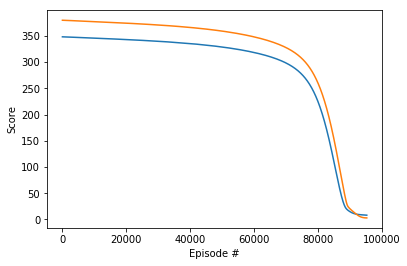

29563.675926685333


In [4]:
import time
start_time = time.time()
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
# device="cpu"
net = Net(6,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400, 1).to(torch.device(device))  
net.train()
X_train = X_train.float().to(device)
y_train = y_train.float().to(device)
X_test = X_test.float().to(device)
y_test = y_test.float().to(device)


try:
    net.load_state_dict(torch.load('yearly_model.pth'))   
except:
    print("can't load model")
# learning_rate = 0.0000001
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

loss_train_arr = []
loss_test_arr = []

prev_loss = 1000
curr_loss = 999
epoch = 0

# for epoch in range(2500):
while prev_loss >= curr_loss:
    
    #do the forward propagation
    out_train = net(X_train)
    out_test = net(X_test)

    # Out loss function
    loss_train = F.mse_loss(out_train.view(1, -1), y_train.float().view(1, -1))
    loss_train_arr.append(loss_train.data)
    loss_test = F.mse_loss(out_test.view(1, -1), y_test.float().view(1, -1)).data
    loss_test_arr.append(loss_test)
    prev_loss = curr_loss
    curr_loss = loss_test
    epoch = epoch + 1
    print(epoch, loss_test)

    # Our optimizer
    
    #optimizer = torch.optim.SGD(net.parameters(), lr=learning_rate, nesterov=True, momentum=0.9, dampening=0)

    #do back propagation
    opt.zero_grad()
    loss_train.backward()
    
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.00001)
    torch.nn.utils.clip_grad_norm_(net.parameters(), 0.00001)     

    opt.step()

torch.save(net.state_dict(),'yearly_model.pth')
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[200:])), loss_train_arr[200:])
plt.plot(np.arange(len(loss_test_arr[200:])), loss_test_arr[200:])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

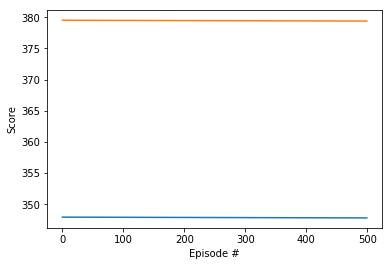

34564.109434604645


In [5]:
fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(loss_train_arr[2000:2500])), loss_train_arr[2000:2500])
plt.plot(np.arange(len(loss_test_arr[2000:2500])), loss_test_arr[2000:2500])
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()
print(time.time() - start_time)

# Test it!

In [6]:
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
net = Net(6,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400, 1).to(torch.device(device))  
try:
    net.load_state_dict(torch.load('yearly_model.pth'))
    net.eval()
except:
    print("can't load model")
learning_rate = 0.0000001
opt = optim.Adam(params=net.parameters(),lr=learning_rate)

X_test = X_test.float().to(device)  
out = net(X_test).data
out = out.cpu().data.numpy()
print(out)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(out)), out)
plt.plot(np.arange(len(out), y_test.cpu()))
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()

can't load model


RuntimeError: cuda runtime error (2) : out of memory at /opt/conda/conda-bld/pytorch_1533672544752/work/aten/src/THC/THCTensorCopy.cu:206

# Use it!

month     % FULL  Brent (eur/bbl)  JKM (Eur/mmbtu)  Coal (eur/t)  \
0       5  51.848790        62.457823         4.128929         56.25   
1       6  62.298875        61.770162         5.123222         60.65   
2       7  72.969960        61.452169         5.344051         62.90   
3       8  84.176452        60.652002         5.534134         64.30   
4       9  92.780125        59.866134         5.693672         67.95   
5      10  97.386129        59.135983         5.833405         70.10   
6      11  95.737292        57.992186         6.425174         69.85   
7      12  84.750645        56.923979         6.949096         70.40   
8       1  71.512097        55.957693         7.126921         71.15   
9       2  55.347845        55.751116         7.002975         71.95   
10      3  44.546089        55.544538         6.713766         72.60   
11      4  43.396833        55.329698         5.800694         72.80   
12      5  51.121290        55.106594         5.623038         73.25   
13      6  61.571375        54.900017         5.577590         73.55   
14      7  72.242460        54.685176         5.713932         73.85   
15      8  83.448952        54.462072         5.734589         73.75   
16      9  92.052625        54.238969         5.825483         74.15   
17     10  96.658629        53.999339         5.833746         74.25   
18     11  95.009792        53.759709         6.003140         74.30   
19     12  84.023145        53.569658         6.672451         74.40   
20      1  70.784597        53.387870         7.370683         75.55   
21      2  54.855893        53.197819         7.242605         76.80   
22      3  44.468080        53.024294         6.969922         77.85   
23      4  44.468080        52.850768         6.292348         77.70   

    CO2 (eur/t)  current TTF_forward  
0         24.53               16.633  
1         24.54               16.733  
2         24.54               16.792  
3         24.58               16.987  
4         24.60               17.562  
5         24.70               18.855  
6         24.77               21.230  
7         24.84               21.685  
8         24.92               21.740  
9         25.06               21.745  
10        25.36               21.445  
11        25.90               20.147  
12        26.44               18.920  
13        26.90               18.476  
14        27.51               18.515  
15        27.51               18.590  
16        27.51               19.350  
17        27.51               20.289  
18        27.51               21.049  
19        27.51               21.469  
20        27.51               21.849  
21        27.51               21.439  
22        27.51               20.544  
23        27.51               19.849

month     % FULL  Brent (eur/bbl)  JKM (Eur/mmbtu)  Coal (eur/t)  \
0       5  51.848790        62.457823         4.128929         56.25   
1       6  62.298875        61.770162         5.123222         60.65   
2       7  72.969960        61.452169         5.344051         62.90   
3       8  84.176452        60.652002         5.534134         64.30   
4       9  92.780125        59.866134         5.693672         67.95   
5      10  97.386129        59.135983         5.833405         70.10   
6      11  95.737292        57.992186         6.425174         69.85   
7      12  84.750645        56.923979         6.949096         70.40   
8       1  71.512097        55.957693         7.126921         71.15   
9       2  55.347845        55.751116         7.002975         71.95   
10      3  44.546089        55.544538         6.713766         72.60   
11      4  43.396833        55.329698         5.800694         72.80   
12      5  51.121290        55.106594         5.623038         73.25   
13      6  61.571375        54.900017         5.577590         73.55   
14      7  72.242460        54.685176         5.713932         73.85   
15      8  83.448952        54.462072         5.734589         73.75   
16      9  92.052625        54.238969         5.825483         74.15   
17     10  96.658629        53.999339         5.833746         74.25   
18     11  95.009792        53.759709         6.003140         74.30   
19     12  84.023145        53.569658         6.672451         74.40   
20      1  70.784597        53.387870         7.370683         75.55   
21      2  54.855893        53.197819         7.242605         76.80   
22      3  44.468080        53.024294         6.969922         77.85   
23      4  44.468080        52.850768         6.292348         77.70   

    CO2 (eur/t)  current TTF_forward  predicted TTF  market premium  
0         24.53               16.633      16.810825       -0.177825  
1         24.54               16.733      17.072147       -0.339147  
2         24.54               16.792      17.710060       -0.918060  
3         24.58               16.987      18.549850       -1.562850  
4         24.60               17.562      19.632236       -2.070236  
5         24.70               18.855      20.383926       -1.528926  
6         24.77               21.230      20.517433        0.712567  
7         24.84               21.685      20.349316        1.335684  
8         24.92               21.740      20.199724        1.540276  
9         25.06               21.745      18.942591        2.802409  
10        25.36               21.445      18.414392        3.030608  
11        25.90               20.147      18.030718        2.116282  
12        26.44               18.920      18.105864        0.814136  
13        26.90               18.476      18.416563        0.059437  
14        27.51               18.515      19.189995       -0.674995  
15        27.51               18.590      19.912424       -1.322424  
16        27.51               19.350      20.710285       -1.360285  
17        27.51               20.289      21.236767       -0.947767  
18        27.51               21.049      21.351847       -0.302847  
19        27.51               21.469      21.316437        0.152563  
20        27.51               21.849      21.327707        0.521293  
21        27.51               21.439      20.229040        1.209960  
22        27.51               20.544      19.734779        0.809221  
23        27.51               19.849      19.172302        0.676698

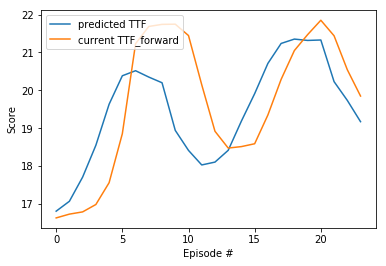

In [7]:
cases = pd.read_csv('Cases.csv',sep=";")
device = torch.device("cuda:1" if torch.cuda.is_available() else "cpu")
display(cases)
net = Net(6,6400,6400,6400,6400,6400,6400,6400,6400,6400,6400, 1).to(torch.device(device))  
net.load_state_dict(torch.load('yearly_model.pth'))
net.eval()

TTF_pred = []
market_premium = []


for i in range(0,cases.shape[0]):    
    columns = ['month','% FULL','Brent (eur/bbl)','JKM (Eur/mmbtu)','Coal (eur/t)','CO2 (eur/t)']
    X_use = pd.DataFrame(columns=columns)    
    X_use['month'] = [cases["month"].iloc[i]]
    X_use["% FULL"] = [cases["% FULL"].iloc[i]]
    X_use['Brent (eur/bbl)'] = [cases['Brent (eur/bbl)'].iloc[i]]
    X_use['Coal (eur/t)'] = [cases['Coal (eur/t)'].iloc[i]]
    X_use['CO2 (eur/t)'] = [cases['CO2 (eur/t)'].iloc[i]]
    X_use['JKM (Eur/mmbtu)'] = [cases['JKM (Eur/mmbtu)'].iloc[i]]

    X_use['% FULL']=scaler1.transform(X_use['% FULL'].values.reshape(-1, 1))
    X_use['Brent (eur/bbl)']=scaler2.transform(X_use['Brent (eur/bbl)'].values.reshape(-1, 1))
    X_use['Coal (eur/t)']=scaler3.transform(X_use['Coal (eur/t)'].values.reshape(-1, 1))
    X_use['CO2 (eur/t)']=scaler4.transform(X_use['CO2 (eur/t)'].values.reshape(-1, 1))
    X_use['month'] = scaler5.transform(X_use['month'].values.reshape(-1, 1))
    X_use['JKM (Eur/mmbtu)'] = scaler6.transform(X_use['JKM (Eur/mmbtu)'].values.reshape(-1, 1))

    X_use= torch.Tensor(X_use.astype(np.float32).values)
    X_use = X_use.float().to(device) 
    out = net(X_use).data
    out = out.cpu().data.numpy()
    TTF_pred.append(out[0][0])
    market_premium.append(cases["current TTF_forward"].iloc[i] - out[0][0])
    #print("predicted price: ",out[0][0])
    
cases["predicted TTF"] = TTF_pred
cases["market premium"] = market_premium
display(cases)

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(len(cases["predicted TTF"])), cases["predicted TTF"],label='predicted TTF')
plt.plot(np.arange(len(cases["current TTF_forward"])), cases["current TTF_forward"],label='current TTF_forward')
plt.legend(loc='upper left')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.show()